In [12]:
import sys; print(sys.version)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


<h1> Connecting the Drive (Training Dataset)

In [13]:
from google.colab import drive
drive.mount ('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [14]:
import os

dataset_folder_path = "/content/gdrive/MyDrive/face-matchmaker-bollywood/data"

actors = os.listdir(dataset_folder_path); print(actors)

['Vaani_Kapoor', 'Tusshar_Kapoor', 'Yami_Gautam', 'Vivek_Oberoi', 'Vicky_Kaushal', 'Varun_Dhawan', 'Vidya_Balan', 'Zareen_Khan', 'Tiger_Shroff', 'Uday_Chopra', 'Sonam_Kapoor', 'Shruti_Haasan', 'Tamannaah_Bhatia', 'Sonakshi_Sinha', 'Suniel_Shetty', 'Sidharth_Malhotra', 'Tabu', 'Sunny_Deol', 'Taapsee_Pannu', 'Sushant_Singh_Rajput', 'Salman_Khan', 'Sara_Ali_Khan', 'Shah_Rukh_Khan', 'R_Madhavan', 'Shraddha_Kapoor', 'Shilpa_Shetty', 'Sanjay_Dutt', 'Saif_Ali_Khan', 'Shreyas_Talpade', 'Shahid_Kapoor', 'Prachi_Desai', 'Randeep_Hooda', 'Richa_Chadda', 'Priyanka_Chopra', 'Ranbir_Kapoor', 'Ranveer_Singh', 'Rani_Mukerji', 'Riteish_Deshmukh', 'Preity_Zinta', 'Rajkummar_Rao', 'Nushrat_Bharucha', 'Nargis_Fakhri', 'Parineeti_Chopra', 'Naseeruddin_Shah', 'Manoj_Bajpayee', 'Nana_Patekar', 'Paresh_Rawal', 'Mrunal_Thakur', 'Prabhas', 'Pooja_Hegde', 'Kriti_Kharbanda', 'Katrina_Kaif', 'Kriti_Sanon', 'Madhuri_Dixit', 'Karisma_Kapoor', 'Kareena_Kapoor', 'Lara_Dutta', 'Kartik_Aaryan', 'Kiara_Advani', 'Kunal_Kh

In [15]:
import pickle # serialising and deserialising

filenames = list()

for actor in actors:
  for file in os.listdir(os.path.join(dataset_folder_path, actor)):
    filenames.append(os.path.join(dataset_folder_path, actor, file))

pickle.dump (filenames, open('filenames.pkl', 'wb'))

print(filenames)

# this filenames.pkl file will be having the path of each and every file of each and every actor (means all the data's path in one file)
# and this filenames.pkl we will use for feature extraction later

['/content/gdrive/MyDrive/face-matchmaker-bollywood/data/Vaani_Kapoor/Vaani_Kapoor.117.jpg', '/content/gdrive/MyDrive/face-matchmaker-bollywood/data/Vaani_Kapoor/Vaani_Kapoor.127.jpg', '/content/gdrive/MyDrive/face-matchmaker-bollywood/data/Vaani_Kapoor/Vaani_Kapoor.102.jpg', '/content/gdrive/MyDrive/face-matchmaker-bollywood/data/Vaani_Kapoor/Vaani_Kapoor.122.jpg', '/content/gdrive/MyDrive/face-matchmaker-bollywood/data/Vaani_Kapoor/Vaani_Kapoor.106.jpg', '/content/gdrive/MyDrive/face-matchmaker-bollywood/data/Vaani_Kapoor/Vaani_Kapoor.114.jpg', '/content/gdrive/MyDrive/face-matchmaker-bollywood/data/Vaani_Kapoor/Vaani_Kapoor.105.jpg', '/content/gdrive/MyDrive/face-matchmaker-bollywood/data/Vaani_Kapoor/Vaani_Kapoor.118.jpg', '/content/gdrive/MyDrive/face-matchmaker-bollywood/data/Vaani_Kapoor/Vaani_Kapoor.120.jpg', '/content/gdrive/MyDrive/face-matchmaker-bollywood/data/Vaani_Kapoor/Vaani_Kapoor.119.jpg', '/content/gdrive/MyDrive/face-matchmaker-bollywood/data/Vaani_Kapoor/Vaani_Kapo

<h1>Initialization

In [16]:
import tensorflow as tf, numpy as np, pickle
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing import image

import tqdm # progress-bar

In [17]:
filenames = pickle.load(open('filenames.pkl', 'rb'))

In [18]:
model = ResNet50 (include_top=False,input_shape=(224,224,3),pooling='avg')
print(model.summary())

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

<h1> Model Training/Feature Extraction

In [19]:
from keras.applications.efficientnet import preprocess_input

In [20]:
def feature_extractor (img_path, model):
    img = image.load_img(img_path, target_size=(224,224))
    img_arr = image.img_to_array(img)
    expanded_dims_img= np.expand_dims(img_arr, axis=0)
    preprocessed_img = preprocess_input(expanded_dims_img)

    res = model.predict(preprocessed_img).flatten()
    return res

In [21]:
from tqdm import tqdm # progress bar

In [22]:
features = list()
for item in tqdm(filenames):
    features.append(feature_extractor(item, model))

pickle.dump (features, open('embedding.pkl', 'wb'))

  0%|          | 0/8664 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


  0%|          | 1/8664 [00:01<4:36:56,  1.92s/it]

1/1 [==============================] - 0s 34ms/step


  0%|          | 2/8664 [00:02<2:04:18,  1.16it/s]

1/1 [==============================] - 0s 35ms/step


  0%|          | 3/8664 [00:02<1:14:35,  1.94it/s]

1/1 [==============================] - 0s 35ms/step


  0%|          | 4/8664 [00:02<51:40,  2.79it/s]  

1/1 [==============================] - 0s 40ms/step


  0%|          | 5/8664 [00:02<38:33,  3.74it/s]

1/1 [==============================] - 0s 31ms/step


  0%|          | 6/8664 [00:02<30:31,  4.73it/s]

1/1 [==============================] - 0s 35ms/step


  0%|          | 8/8664 [00:02<22:44,  6.34it/s]

1/1 [==============================] - 0s 38ms/step


  0%|          | 9/8664 [00:02<21:04,  6.84it/s]

1/1 [==============================] - 0s 37ms/step


  0%|          | 10/8664 [00:02<19:34,  7.37it/s]

1/1 [==============================] - 0s 60ms/step


  0%|          | 11/8664 [00:03<19:25,  7.43it/s]

1/1 [==============================] - 0s 42ms/step


  0%|          | 12/8664 [00:03<19:20,  7.46it/s]

1/1 [==============================] - 0s 35ms/step


  0%|          | 13/8664 [00:03<18:36,  7.75it/s]

1/1 [==============================] - 0s 35ms/step


  0%|          | 14/8664 [00:03<17:50,  8.08it/s]

1/1 [==============================] - 0s 34ms/step


  0%|          | 15/8664 [00:03<17:27,  8.26it/s]

1/1 [==============================] - 0s 36ms/step


  0%|          | 16/8664 [00:03<17:01,  8.46it/s]

1/1 [==============================] - 0s 35ms/step


  0%|          | 17/8664 [00:03<16:38,  8.66it/s]

1/1 [==============================] - 0s 35ms/step


  0%|          | 18/8664 [00:03<16:28,  8.75it/s]

1/1 [==============================] - 0s 38ms/step


  0%|          | 19/8664 [00:03<16:57,  8.49it/s]

1/1 [==============================] - 0s 34ms/step


  0%|          | 20/8664 [00:04<16:37,  8.67it/s]

1/1 [==============================] - 0s 34ms/step


  0%|          | 21/8664 [00:04<16:19,  8.83it/s]

1/1 [==============================] - 0s 36ms/step


  0%|          | 22/8664 [00:04<16:51,  8.54it/s]

1/1 [==============================] - 0s 39ms/step


  0%|          | 23/8664 [00:04<17:00,  8.47it/s]

1/1 [==============================] - 0s 36ms/step


  0%|          | 24/8664 [00:04<16:46,  8.59it/s]

1/1 [==============================] - 0s 36ms/step


  0%|          | 25/8664 [00:04<16:42,  8.62it/s]

1/1 [==============================] - 0s 40ms/step


  0%|          | 26/8664 [00:04<16:49,  8.56it/s]

1/1 [==============================] - 0s 37ms/step


  0%|          | 27/8664 [00:04<16:33,  8.70it/s]

1/1 [==============================] - 0s 33ms/step


  0%|          | 28/8664 [00:04<16:15,  8.85it/s]

1/1 [==============================] - 0s 35ms/step


  0%|          | 29/8664 [00:05<16:01,  8.98it/s]

1/1 [==============================] - 0s 25ms/step


  0%|          | 30/8664 [00:05<16:21,  8.80it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 32/8664 [00:05<14:12, 10.13it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 34/8664 [00:05<13:02, 11.03it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 36/8664 [00:05<12:00, 11.98it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 38/8664 [00:05<11:50, 12.15it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 40/8664 [00:06<11:45, 12.23it/s]

1/1 [==============================] - 0s 31ms/step


  0%|          | 42/8664 [00:06<11:39, 12.32it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 44/8664 [00:06<11:31, 12.46it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 46/8664 [00:06<11:23, 12.61it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 48/8664 [00:06<11:06, 12.93it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 50/8664 [00:06<11:21, 12.65it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 52/8664 [00:06<11:25, 12.57it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 54/8664 [00:07<11:26, 12.54it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 56/8664 [00:07<11:37, 12.33it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 58/8664 [00:07<11:35, 12.38it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 60/8664 [00:07<11:23, 12.58it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 62/8664 [00:07<11:20, 12.64it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 64/8664 [00:07<11:04, 12.94it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 66/8664 [00:08<11:06, 12.91it/s]

1/1 [==============================] - 0s 31ms/step


  1%|          | 68/8664 [00:08<11:22, 12.59it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 70/8664 [00:08<11:02, 12.97it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 72/8664 [00:08<11:05, 12.90it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 74/8664 [00:08<11:05, 12.90it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 76/8664 [00:08<11:13, 12.75it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 78/8664 [00:08<11:07, 12.86it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 80/8664 [00:09<11:07, 12.86it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 82/8664 [00:09<11:12, 12.77it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 84/8664 [00:09<11:02, 12.94it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 86/8664 [00:09<10:57, 13.05it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 88/8664 [00:09<10:52, 13.15it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 90/8664 [00:09<10:56, 13.07it/s]

1/1 [==============================] - 0s 32ms/step


  1%|          | 92/8664 [00:10<11:22, 12.56it/s]

1/1 [==============================] - 0s 34ms/step


  1%|          | 94/8664 [00:10<13:07, 10.88it/s]

1/1 [==============================] - 0s 37ms/step


  1%|          | 96/8664 [00:10<13:51, 10.31it/s]

1/1 [==============================] - 0s 37ms/step


  1%|          | 98/8664 [00:10<14:25,  9.90it/s]

1/1 [==============================] - 0s 31ms/step


  1%|          | 100/8664 [00:10<15:15,  9.36it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 102/8664 [00:11<14:08, 10.09it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 104/8664 [00:11<13:38, 10.45it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 106/8664 [00:11<12:59, 10.97it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 108/8664 [00:11<12:38, 11.28it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 110/8664 [00:12<20:37,  6.91it/s]

1/1 [==============================] - 0s 20ms/step


  1%|▏         | 111/8664 [00:12<28:46,  4.95it/s]

1/1 [==============================] - 0s 25ms/step


  1%|▏         | 112/8664 [00:13<33:23,  4.27it/s]

1/1 [==============================] - 0s 23ms/step


  1%|▏         | 113/8664 [00:13<40:50,  3.49it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 114/8664 [00:13<43:53,  3.25it/s]

1/1 [==============================] - 0s 24ms/step


  1%|▏         | 115/8664 [00:14<53:46,  2.65it/s]

1/1 [==============================] - 0s 23ms/step


  1%|▏         | 116/8664 [00:14<53:32,  2.66it/s]

1/1 [==============================] - 0s 42ms/step


  1%|▏         | 117/8664 [00:15<59:51,  2.38it/s]

1/1 [==============================] - 0s 31ms/step


  1%|▏         | 118/8664 [00:15<59:38,  2.39it/s]

1/1 [==============================] - 0s 32ms/step


  1%|▏         | 119/8664 [00:16<1:02:15,  2.29it/s]

1/1 [==============================] - 0s 35ms/step


  1%|▏         | 120/8664 [00:16<1:00:16,  2.36it/s]

1/1 [==============================] - 0s 32ms/step


  1%|▏         | 121/8664 [00:17<1:03:15,  2.25it/s]

1/1 [==============================] - 0s 34ms/step


  1%|▏         | 122/8664 [00:17<1:02:10,  2.29it/s]

1/1 [==============================] - 0s 24ms/step


  1%|▏         | 123/8664 [00:18<1:03:08,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 124/8664 [00:18<59:54,  2.38it/s]  

1/1 [==============================] - 0s 23ms/step


  1%|▏         | 125/8664 [00:19<1:09:14,  2.06it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 126/8664 [00:19<1:04:17,  2.21it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 127/8664 [00:19<1:00:46,  2.34it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▏         | 128/8664 [00:20<57:54,  2.46it/s]  

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 129/8664 [00:20<1:01:06,  2.33it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 130/8664 [00:21<1:02:23,  2.28it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 131/8664 [00:21<1:01:17,  2.32it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 132/8664 [00:21<1:01:07,  2.33it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 133/8664 [00:22<57:05,  2.49it/s]  

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 134/8664 [00:22<55:25,  2.56it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 135/8664 [00:23<58:24,  2.43it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 136/8664 [00:23<54:40,  2.60it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 137/8664 [00:23<59:33,  2.39it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 138/8664 [00:24<1:01:56,  2.29it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 139/8664 [00:24<57:36,  2.47it/s]  

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 140/8664 [00:25<54:50,  2.59it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 141/8664 [00:25<58:33,  2.43it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 142/8664 [00:25<54:37,  2.60it/s]

1/1 [==============================] - 0s 27ms/step


  2%|▏         | 143/8664 [00:26<1:05:03,  2.18it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 144/8664 [00:26<1:00:27,  2.35it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 145/8664 [00:27<58:51,  2.41it/s]  

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 146/8664 [00:27<56:52,  2.50it/s]

1/1 [==============================] - 0s 32ms/step


  2%|▏         | 147/8664 [00:28<59:53,  2.37it/s]

1/1 [==============================] - 0s 35ms/step


  2%|▏         | 148/8664 [00:28<1:03:07,  2.25it/s]

1/1 [==============================] - 0s 33ms/step


  2%|▏         | 149/8664 [00:29<1:06:21,  2.14it/s]

1/1 [==============================] - 0s 33ms/step


  2%|▏         | 150/8664 [00:29<1:02:46,  2.26it/s]

1/1 [==============================] - 0s 37ms/step


  2%|▏         | 151/8664 [00:29<1:03:45,  2.23it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 152/8664 [00:30<1:00:19,  2.35it/s]

1/1 [==============================] - 0s 29ms/step


  2%|▏         | 153/8664 [00:30<59:43,  2.38it/s]  

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 154/8664 [00:31<1:02:09,  2.28it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 155/8664 [00:31<59:12,  2.39it/s]  

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 156/8664 [00:31<1:00:26,  2.35it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 157/8664 [00:32<1:01:34,  2.30it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 158/8664 [00:32<1:03:01,  2.25it/s]

1/1 [==============================] - 0s 78ms/step


  2%|▏         | 159/8664 [00:33<1:09:45,  2.03it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 160/8664 [00:33<1:07:00,  2.12it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 161/8664 [00:34<59:07,  2.40it/s]  

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 163/8664 [00:34<37:12,  3.81it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 165/8664 [00:34<27:10,  5.21it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 167/8664 [00:34<21:42,  6.52it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 169/8664 [00:34<18:17,  7.74it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 171/8664 [00:35<16:02,  8.82it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 173/8664 [00:35<14:39,  9.65it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 175/8664 [00:35<14:00, 10.10it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 177/8664 [00:35<13:09, 10.76it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 179/8664 [00:35<12:46, 11.07it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 181/8664 [00:35<12:32, 11.28it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 183/8664 [00:36<11:57, 11.82it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 185/8664 [00:36<11:53, 11.89it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 187/8664 [00:36<11:34, 12.21it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 189/8664 [00:36<11:35, 12.18it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 191/8664 [00:36<11:41, 12.08it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 193/8664 [00:36<11:42, 12.06it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 195/8664 [00:37<11:42, 12.05it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 197/8664 [00:37<11:21, 12.42it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 199/8664 [00:37<11:29, 12.28it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 201/8664 [00:37<11:33, 12.20it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 203/8664 [00:37<11:42, 12.04it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 205/8664 [00:37<11:45, 11.99it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 207/8664 [00:38<11:23, 12.38it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 209/8664 [00:38<11:23, 12.37it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 211/8664 [00:38<11:20, 12.42it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 213/8664 [00:38<11:40, 12.07it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 215/8664 [00:38<11:50, 11.89it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 217/8664 [00:38<11:46, 11.96it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 219/8664 [00:39<11:57, 11.78it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 221/8664 [00:39<11:59, 11.74it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 223/8664 [00:39<11:38, 12.08it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 225/8664 [00:39<11:48, 11.92it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 227/8664 [00:39<11:43, 12.00it/s]

1/1 [==============================] - 0s 29ms/step


  3%|▎         | 229/8664 [00:39<11:34, 12.14it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 231/8664 [00:40<11:43, 11.99it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 233/8664 [00:40<11:32, 12.18it/s]

1/1 [==============================] - 0s 33ms/step


  3%|▎         | 235/8664 [00:40<12:50, 10.93it/s]

1/1 [==============================] - 0s 35ms/step


  3%|▎         | 237/8664 [00:40<13:47, 10.18it/s]

1/1 [==============================] - 0s 35ms/step


  3%|▎         | 239/8664 [00:40<14:38,  9.59it/s]

1/1 [==============================] - 0s 34ms/step


  3%|▎         | 240/8664 [00:41<15:33,  9.02it/s]

1/1 [==============================] - 0s 36ms/step


  3%|▎         | 241/8664 [00:41<15:52,  8.85it/s]

1/1 [==============================] - 0s 38ms/step


  3%|▎         | 242/8664 [00:41<16:06,  8.71it/s]

1/1 [==============================] - 0s 36ms/step


  3%|▎         | 243/8664 [00:41<16:12,  8.66it/s]

1/1 [==============================] - 0s 38ms/step


  3%|▎         | 244/8664 [00:41<16:25,  8.55it/s]

1/1 [==============================] - 0s 32ms/step


  3%|▎         | 245/8664 [00:41<15:59,  8.78it/s]

1/1 [==============================] - 0s 35ms/step


  3%|▎         | 246/8664 [00:41<16:02,  8.74it/s]

1/1 [==============================] - 0s 34ms/step


  3%|▎         | 247/8664 [00:41<15:51,  8.85it/s]

1/1 [==============================] - 0s 32ms/step


  3%|▎         | 248/8664 [00:41<15:51,  8.85it/s]

1/1 [==============================] - 0s 35ms/step


  3%|▎         | 249/8664 [00:42<15:56,  8.80it/s]

1/1 [==============================] - 0s 40ms/step


  3%|▎         | 250/8664 [00:42<16:25,  8.54it/s]

1/1 [==============================] - 0s 34ms/step


  3%|▎         | 251/8664 [00:42<16:31,  8.49it/s]

1/1 [==============================] - 0s 45ms/step


  3%|▎         | 252/8664 [00:42<16:17,  8.61it/s]

1/1 [==============================] - 0s 37ms/step


  3%|▎         | 253/8664 [00:42<16:45,  8.36it/s]

1/1 [==============================] - 0s 39ms/step


  3%|▎         | 254/8664 [00:42<16:44,  8.37it/s]

1/1 [==============================] - 0s 34ms/step


  3%|▎         | 255/8664 [00:42<16:40,  8.41it/s]

1/1 [==============================] - 0s 33ms/step


  3%|▎         | 256/8664 [00:42<16:27,  8.52it/s]

1/1 [==============================] - 0s 31ms/step


  3%|▎         | 257/8664 [00:43<16:40,  8.40it/s]

1/1 [==============================] - 0s 33ms/step


  3%|▎         | 258/8664 [00:43<16:34,  8.45it/s]

1/1 [==============================] - 0s 41ms/step


  3%|▎         | 259/8664 [00:43<16:33,  8.46it/s]

1/1 [==============================] - 0s 45ms/step


  3%|▎         | 260/8664 [00:43<17:26,  8.03it/s]

1/1 [==============================] - 0s 37ms/step


  3%|▎         | 261/8664 [00:43<17:21,  8.07it/s]

1/1 [==============================] - 0s 36ms/step


  3%|▎         | 262/8664 [00:43<16:53,  8.29it/s]

1/1 [==============================] - 0s 36ms/step


  3%|▎         | 263/8664 [00:44<30:46,  4.55it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 264/8664 [00:44<39:32,  3.54it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 265/8664 [00:44<46:33,  3.01it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 266/8664 [00:45<47:42,  2.93it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 267/8664 [00:45<49:28,  2.83it/s]

1/1 [==============================] - 0s 29ms/step


  3%|▎         | 268/8664 [00:46<53:36,  2.61it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 269/8664 [00:46<57:01,  2.45it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 270/8664 [00:46<55:40,  2.51it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 271/8664 [00:47<53:13,  2.63it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 272/8664 [00:47<56:45,  2.46it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 273/8664 [00:48<54:51,  2.55it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 274/8664 [00:48<54:34,  2.56it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 275/8664 [00:48<52:13,  2.68it/s]

1/1 [==============================] - 0s 32ms/step


  3%|▎         | 276/8664 [00:49<51:34,  2.71it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 277/8664 [00:49<53:55,  2.59it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 278/8664 [00:50<52:43,  2.65it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 279/8664 [00:50<51:03,  2.74it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 280/8664 [00:50<51:23,  2.72it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 281/8664 [00:51<53:13,  2.63it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 282/8664 [00:51<51:26,  2.72it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 283/8664 [00:51<50:54,  2.74it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 284/8664 [00:52<56:30,  2.47it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 285/8664 [00:52<56:10,  2.49it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 286/8664 [00:53<55:50,  2.50it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 287/8664 [00:53<58:27,  2.39it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 288/8664 [00:54<59:17,  2.35it/s]

1/1 [==============================] - 0s 34ms/step


  3%|▎         | 289/8664 [00:54<1:02:37,  2.23it/s]

1/1 [==============================] - 0s 32ms/step


  3%|▎         | 290/8664 [00:54<1:02:43,  2.22it/s]

1/1 [==============================] - 0s 37ms/step


  3%|▎         | 291/8664 [00:55<1:04:19,  2.17it/s]

1/1 [==============================] - 0s 32ms/step


  3%|▎         | 292/8664 [00:55<1:01:49,  2.26it/s]

1/1 [==============================] - 0s 32ms/step


  3%|▎         | 293/8664 [00:56<1:01:37,  2.26it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 294/8664 [00:56<1:06:54,  2.08it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 295/8664 [00:57<1:06:03,  2.11it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 296/8664 [00:57<1:05:05,  2.14it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 297/8664 [00:58<1:01:18,  2.27it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 298/8664 [00:58<58:06,  2.40it/s]  

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 299/8664 [00:58<54:06,  2.58it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 300/8664 [00:59<1:17:23,  1.80it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 301/8664 [01:00<1:10:37,  1.97it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 302/8664 [01:00<1:08:45,  2.03it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 303/8664 [01:00<1:02:05,  2.24it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 304/8664 [01:01<1:00:46,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 305/8664 [01:01<59:48,  2.33it/s]  

1/1 [==============================] - 0s 23ms/step


  4%|▎         | 306/8664 [01:02<56:21,  2.47it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▎         | 307/8664 [01:02<58:08,  2.40it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 308/8664 [01:03<59:34,  2.34it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▎         | 309/8664 [01:03<55:18,  2.52it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▎         | 310/8664 [01:03<53:22,  2.61it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▎         | 311/8664 [01:04<52:05,  2.67it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▎         | 312/8664 [01:04<56:28,  2.46it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▎         | 313/8664 [01:05<59:32,  2.34it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▎         | 314/8664 [01:05<56:18,  2.47it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▎         | 315/8664 [01:05<54:41,  2.54it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 316/8664 [01:06<55:24,  2.51it/s]

1/1 [==============================] - 0s 39ms/step


  4%|▎         | 317/8664 [01:06<1:00:17,  2.31it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▎         | 318/8664 [01:07<1:01:50,  2.25it/s]

1/1 [==============================] - 0s 31ms/step


  4%|▎         | 319/8664 [01:07<1:05:54,  2.11it/s]

1/1 [==============================] - 0s 31ms/step


  4%|▎         | 320/8664 [01:08<1:03:26,  2.19it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▎         | 321/8664 [01:08<57:41,  2.41it/s]  

1/1 [==============================] - 0s 36ms/step


  4%|▎         | 322/8664 [01:08<56:00,  2.48it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▎         | 323/8664 [01:09<57:30,  2.42it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▎         | 324/8664 [01:09<55:22,  2.51it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 325/8664 [01:09<54:52,  2.53it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 326/8664 [01:10<53:21,  2.60it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 327/8664 [01:10<1:02:55,  2.21it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 328/8664 [01:11<59:08,  2.35it/s]  

1/1 [==============================] - 0s 25ms/step


  4%|▍         | 329/8664 [01:11<57:48,  2.40it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 330/8664 [01:12<56:53,  2.44it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 331/8664 [01:12<59:55,  2.32it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 332/8664 [01:13<1:00:19,  2.30it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 333/8664 [01:13<57:31,  2.41it/s]  

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 334/8664 [01:13<1:00:11,  2.31it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 335/8664 [01:14<56:35,  2.45it/s]  

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 336/8664 [01:14<1:04:03,  2.17it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 337/8664 [01:15<1:00:18,  2.30it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 338/8664 [01:15<1:03:48,  2.17it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 339/8664 [01:16<1:01:06,  2.27it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 340/8664 [01:16<58:24,  2.38it/s]  

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 341/8664 [01:16<56:07,  2.47it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 342/8664 [01:17<54:08,  2.56it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 343/8664 [01:17<58:24,  2.37it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 344/8664 [01:18<59:41,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 345/8664 [01:18<58:52,  2.36it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 346/8664 [01:18<54:54,  2.52it/s]

1/1 [==============================] - 0s 32ms/step


  4%|▍         | 347/8664 [01:19<55:19,  2.51it/s]

1/1 [==============================] - 0s 42ms/step


  4%|▍         | 348/8664 [01:19<59:14,  2.34it/s]

1/1 [==============================] - 0s 31ms/step


  4%|▍         | 349/8664 [01:20<55:18,  2.51it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 350/8664 [01:20<56:10,  2.47it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 351/8664 [01:21<59:51,  2.31it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 352/8664 [01:21<59:37,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 353/8664 [01:21<1:00:35,  2.29it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 354/8664 [01:22<1:02:38,  2.21it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 355/8664 [01:22<1:01:29,  2.25it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 356/8664 [01:23<1:03:58,  2.16it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 357/8664 [01:23<1:03:08,  2.19it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 358/8664 [01:24<59:35,  2.32it/s]  

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 359/8664 [01:24<56:39,  2.44it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 360/8664 [01:24<53:06,  2.61it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 361/8664 [01:25<57:57,  2.39it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 362/8664 [01:25<58:35,  2.36it/s]

1/1 [==============================] - 0s 26ms/step


  4%|▍         | 363/8664 [01:26<1:05:22,  2.12it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 364/8664 [01:26<1:01:17,  2.26it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 365/8664 [01:27<1:01:49,  2.24it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 366/8664 [01:27<1:02:02,  2.23it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 367/8664 [01:28<1:00:46,  2.28it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 368/8664 [01:28<58:10,  2.38it/s]  

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 369/8664 [01:28<1:00:30,  2.28it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 370/8664 [01:29<1:02:35,  2.21it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 371/8664 [01:29<59:35,  2.32it/s]  

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 372/8664 [01:30<59:32,  2.32it/s]

1/1 [==============================] - 0s 26ms/step


  4%|▍         | 373/8664 [01:30<56:18,  2.45it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 374/8664 [01:31<1:02:31,  2.21it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 375/8664 [01:31<1:01:58,  2.23it/s]

1/1 [==============================] - 0s 31ms/step


  4%|▍         | 376/8664 [01:32<1:06:28,  2.08it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 377/8664 [01:32<1:02:22,  2.21it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▍         | 378/8664 [01:33<1:07:26,  2.05it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 379/8664 [01:33<1:04:08,  2.15it/s]

1/1 [==============================] - 0s 39ms/step


  4%|▍         | 380/8664 [01:33<1:05:28,  2.11it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▍         | 381/8664 [01:34<1:04:02,  2.16it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 382/8664 [01:34<1:02:10,  2.22it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 383/8664 [01:35<1:00:49,  2.27it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 384/8664 [01:35<59:54,  2.30it/s]  

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 385/8664 [01:36<1:00:35,  2.28it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 386/8664 [01:36<57:13,  2.41it/s]  

1/1 [==============================] - 0s 27ms/step


  4%|▍         | 387/8664 [01:36<54:21,  2.54it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 388/8664 [01:37<59:44,  2.31it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 389/8664 [01:37<59:57,  2.30it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 390/8664 [01:38<57:21,  2.40it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 391/8664 [01:38<54:01,  2.55it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 392/8664 [01:38<56:36,  2.44it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▍         | 393/8664 [01:39<59:13,  2.33it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 394/8664 [01:39<55:31,  2.48it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 395/8664 [01:40<53:08,  2.59it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 396/8664 [01:40<53:00,  2.60it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▍         | 397/8664 [01:40<50:17,  2.74it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▍         | 398/8664 [01:41<50:54,  2.71it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 399/8664 [01:41<54:44,  2.52it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 400/8664 [01:42<56:35,  2.43it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 401/8664 [01:42<58:34,  2.35it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 402/8664 [01:42<56:22,  2.44it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 403/8664 [01:43<1:02:33,  2.20it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 404/8664 [01:43<59:02,  2.33it/s]  

1/1 [==============================] - 0s 39ms/step


  5%|▍         | 405/8664 [01:44<1:00:22,  2.28it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▍         | 406/8664 [01:44<1:01:25,  2.24it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▍         | 407/8664 [01:45<59:42,  2.30it/s]  

1/1 [==============================] - 0s 34ms/step


  5%|▍         | 408/8664 [01:45<1:01:13,  2.25it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▍         | 409/8664 [01:46<1:03:43,  2.16it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▍         | 410/8664 [01:46<1:01:06,  2.25it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 411/8664 [01:46<59:12,  2.32it/s]  

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 412/8664 [01:47<1:05:07,  2.11it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 413/8664 [01:48<1:09:35,  1.98it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 414/8664 [01:48<1:09:24,  1.98it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 415/8664 [01:49<1:05:01,  2.11it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▍         | 416/8664 [01:49<1:05:02,  2.11it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 417/8664 [01:49<1:00:55,  2.26it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 418/8664 [01:50<1:00:23,  2.28it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 419/8664 [01:50<59:09,  2.32it/s]  

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 420/8664 [01:51<59:46,  2.30it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 421/8664 [01:51<56:46,  2.42it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 422/8664 [01:51<59:18,  2.32it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▍         | 423/8664 [01:52<1:00:12,  2.28it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 424/8664 [01:52<1:01:01,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 425/8664 [01:53<57:37,  2.38it/s]  

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 426/8664 [01:53<1:00:28,  2.27it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 427/8664 [01:54<55:51,  2.46it/s]  

1/1 [==============================] - 0s 24ms/step


  5%|▍         | 428/8664 [01:54<57:47,  2.38it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 429/8664 [01:54<59:03,  2.32it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 430/8664 [01:55<1:00:40,  2.26it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 431/8664 [01:55<1:02:01,  2.21it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 432/8664 [01:56<58:02,  2.36it/s]  

1/1 [==============================] - 0s 40ms/step


  5%|▍         | 433/8664 [01:56<56:27,  2.43it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▌         | 434/8664 [01:57<1:00:18,  2.27it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▌         | 435/8664 [01:57<1:03:41,  2.15it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▌         | 436/8664 [01:58<1:00:12,  2.28it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▌         | 437/8664 [01:58<56:27,  2.43it/s]  

1/1 [==============================] - 0s 34ms/step


  5%|▌         | 438/8664 [01:58<59:24,  2.31it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▌         | 439/8664 [01:59<57:27,  2.39it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▌         | 440/8664 [01:59<56:05,  2.44it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▌         | 441/8664 [02:00<59:30,  2.30it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▌         | 442/8664 [02:00<56:04,  2.44it/s]

1/1 [==============================] - 0s 25ms/step


  5%|▌         | 443/8664 [02:00<52:58,  2.59it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 444/8664 [02:01<55:51,  2.45it/s]

1/1 [==============================] - 0s 27ms/step


  5%|▌         | 445/8664 [02:01<1:00:11,  2.28it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▌         | 446/8664 [02:02<1:01:48,  2.22it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▌         | 447/8664 [02:02<1:02:10,  2.20it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▌         | 448/8664 [02:03<1:02:24,  2.19it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 449/8664 [02:03<58:32,  2.34it/s]  

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 450/8664 [02:04<59:13,  2.31it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▌         | 451/8664 [02:04<1:01:54,  2.21it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 452/8664 [02:04<58:52,  2.32it/s]  

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 453/8664 [02:05<56:43,  2.41it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▌         | 454/8664 [02:05<59:10,  2.31it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 455/8664 [02:06<1:00:14,  2.27it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 456/8664 [02:06<1:01:31,  2.22it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▌         | 457/8664 [02:07<1:01:41,  2.22it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▌         | 458/8664 [02:07<58:55,  2.32it/s]  

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 459/8664 [02:07<59:40,  2.29it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▌         | 460/8664 [02:08<58:53,  2.32it/s]

1/1 [==============================] - 0s 29ms/step


  5%|▌         | 461/8664 [02:08<57:32,  2.38it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▌         | 462/8664 [02:09<55:17,  2.47it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▌         | 463/8664 [02:09<53:10,  2.57it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▌         | 464/8664 [02:10<58:36,  2.33it/s]

1/1 [==============================] - 0s 31ms/step


  5%|▌         | 465/8664 [02:10<1:00:22,  2.26it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▌         | 466/8664 [02:10<1:00:14,  2.27it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▌         | 467/8664 [02:11<1:00:55,  2.24it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 468/8664 [02:11<59:31,  2.29it/s]  

1/1 [==============================] - 0s 23ms/step


  5%|▌         | 469/8664 [02:12<59:50,  2.28it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 470/8664 [02:12<55:54,  2.44it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 471/8664 [02:13<58:17,  2.34it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 472/8664 [02:13<55:25,  2.46it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 473/8664 [02:13<56:35,  2.41it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 474/8664 [02:14<54:32,  2.50it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▌         | 475/8664 [02:14<53:29,  2.55it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 476/8664 [02:15<55:19,  2.47it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 477/8664 [02:15<57:15,  2.38it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 478/8664 [02:15<56:58,  2.39it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 479/8664 [02:16<57:10,  2.39it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 480/8664 [02:16<59:44,  2.28it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 481/8664 [02:17<55:37,  2.45it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 482/8664 [02:17<53:10,  2.56it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 483/8664 [02:17<56:15,  2.42it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 484/8664 [02:18<58:44,  2.32it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 485/8664 [02:18<54:25,  2.50it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 486/8664 [02:19<57:30,  2.37it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 487/8664 [02:19<58:51,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 488/8664 [02:20<58:41,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 489/8664 [02:20<59:03,  2.31it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 490/8664 [02:20<55:51,  2.44it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 491/8664 [02:21<53:56,  2.53it/s]

1/1 [==============================] - 0s 32ms/step


  6%|▌         | 492/8664 [02:21<59:24,  2.29it/s]

1/1 [==============================] - 0s 32ms/step


  6%|▌         | 493/8664 [02:22<55:41,  2.45it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▌         | 494/8664 [02:22<58:29,  2.33it/s]

1/1 [==============================] - 0s 40ms/step


  6%|▌         | 495/8664 [02:23<1:00:19,  2.26it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▌         | 496/8664 [02:23<1:03:25,  2.15it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 497/8664 [02:24<1:00:18,  2.26it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 498/8664 [02:24<55:22,  2.46it/s]  

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 499/8664 [02:24<52:31,  2.59it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 500/8664 [02:25<50:11,  2.71it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 501/8664 [02:25<54:33,  2.49it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 502/8664 [02:25<55:38,  2.44it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 503/8664 [02:26<58:19,  2.33it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 504/8664 [02:26<58:38,  2.32it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▌         | 505/8664 [02:27<56:18,  2.41it/s]

1/1 [==============================] - 0s 25ms/step


  6%|▌         | 506/8664 [02:27<57:36,  2.36it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 507/8664 [02:28<1:00:16,  2.26it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 508/8664 [02:28<58:09,  2.34it/s]  

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 509/8664 [02:28<56:59,  2.39it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 510/8664 [02:29<54:11,  2.51it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 511/8664 [02:29<56:04,  2.42it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 512/8664 [02:30<1:05:50,  2.06it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 513/8664 [02:30<1:01:47,  2.20it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 514/8664 [02:31<58:41,  2.31it/s]  

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 515/8664 [02:31<57:27,  2.36it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 516/8664 [02:31<53:36,  2.53it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 517/8664 [02:32<52:30,  2.59it/s]

1/1 [==============================] - 0s 25ms/step


  6%|▌         | 518/8664 [02:32<54:12,  2.50it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 519/8664 [02:33<1:01:35,  2.20it/s]

1/1 [==============================] - 0s 25ms/step


  6%|▌         | 520/8664 [02:33<59:05,  2.30it/s]  

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 521/8664 [02:34<1:01:56,  2.19it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 522/8664 [02:34<58:32,  2.32it/s]  

1/1 [==============================] - 0s 35ms/step


  6%|▌         | 523/8664 [02:35<1:03:02,  2.15it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 524/8664 [02:35<59:15,  2.29it/s]  

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 525/8664 [02:35<1:01:01,  2.22it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 526/8664 [02:36<58:02,  2.34it/s]  

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 527/8664 [02:36<59:51,  2.27it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 528/8664 [02:37<1:00:00,  2.26it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 529/8664 [02:37<1:02:15,  2.18it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 530/8664 [02:38<1:02:44,  2.16it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 531/8664 [02:38<1:03:15,  2.14it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 532/8664 [02:39<1:00:43,  2.23it/s]

1/1 [==============================] - 0s 29ms/step


  6%|▌         | 533/8664 [02:39<57:16,  2.37it/s]  

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 534/8664 [02:39<1:01:46,  2.19it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 535/8664 [02:40<57:46,  2.34it/s]  

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 536/8664 [02:40<58:39,  2.31it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 537/8664 [02:41<55:20,  2.45it/s]

1/1 [==============================] - 0s 39ms/step


  6%|▌         | 538/8664 [02:41<53:31,  2.53it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 539/8664 [02:41<50:25,  2.69it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 540/8664 [02:42<56:07,  2.41it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 541/8664 [02:42<56:28,  2.40it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▋         | 542/8664 [02:43<56:55,  2.38it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▋         | 543/8664 [02:43<56:37,  2.39it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▋         | 544/8664 [02:43<55:53,  2.42it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▋         | 545/8664 [02:44<56:44,  2.38it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▋         | 546/8664 [02:44<59:38,  2.27it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▋         | 547/8664 [02:45<55:38,  2.43it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▋         | 548/8664 [02:45<57:13,  2.36it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▋         | 549/8664 [02:46<58:31,  2.31it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▋         | 550/8664 [02:46<53:56,  2.51it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▋         | 551/8664 [02:47<1:00:23,  2.24it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▋         | 552/8664 [02:47<1:01:21,  2.20it/s]

1/1 [==============================] - 0s 32ms/step


  6%|▋         | 553/8664 [02:47<1:01:48,  2.19it/s]

1/1 [==============================] - 0s 32ms/step


  6%|▋         | 554/8664 [02:48<1:03:39,  2.12it/s]

1/1 [==============================] - 0s 31ms/step


  6%|▋         | 555/8664 [02:48<58:30,  2.31it/s]  

1/1 [==============================] - 0s 23ms/step


  6%|▋         | 556/8664 [02:49<56:12,  2.40it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▋         | 557/8664 [02:49<55:05,  2.45it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▋         | 558/8664 [02:49<53:07,  2.54it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▋         | 559/8664 [02:50<53:03,  2.55it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▋         | 560/8664 [02:50<56:08,  2.41it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▋         | 561/8664 [02:51<56:56,  2.37it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▋         | 562/8664 [02:51<54:00,  2.50it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▋         | 563/8664 [02:52<1:01:44,  2.19it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 564/8664 [02:52<58:22,  2.31it/s]  

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 565/8664 [02:52<56:24,  2.39it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 566/8664 [02:53<54:39,  2.47it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 567/8664 [02:53<59:58,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 568/8664 [02:54<1:00:17,  2.24it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 569/8664 [02:54<1:01:53,  2.18it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 570/8664 [02:55<1:01:55,  2.18it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 571/8664 [02:55<58:03,  2.32it/s]  

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 572/8664 [02:56<58:43,  2.30it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 573/8664 [02:56<1:03:05,  2.14it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 574/8664 [02:57<1:02:05,  2.17it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 575/8664 [02:57<58:27,  2.31it/s]  

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 576/8664 [02:57<53:23,  2.52it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 577/8664 [02:58<51:16,  2.63it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 578/8664 [02:58<54:00,  2.49it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 579/8664 [02:59<58:20,  2.31it/s]

1/1 [==============================] - 0s 40ms/step


  7%|▋         | 580/8664 [02:59<56:42,  2.38it/s]

1/1 [==============================] - 0s 45ms/step


  7%|▋         | 581/8664 [02:59<57:02,  2.36it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 582/8664 [03:00<59:35,  2.26it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 583/8664 [03:00<1:02:05,  2.17it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 584/8664 [03:01<59:26,  2.27it/s]  

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 585/8664 [03:01<55:11,  2.44it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 586/8664 [03:02<57:48,  2.33it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 587/8664 [03:02<55:26,  2.43it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 588/8664 [03:02<58:09,  2.31it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 589/8664 [03:03<57:44,  2.33it/s]

1/1 [==============================] - 0s 26ms/step


  7%|▋         | 590/8664 [03:03<59:51,  2.25it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 591/8664 [03:04<1:00:54,  2.21it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 592/8664 [03:04<57:04,  2.36it/s]  

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 593/8664 [03:05<59:48,  2.25it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 594/8664 [03:05<55:26,  2.43it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 595/8664 [03:05<53:09,  2.53it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 596/8664 [03:06<55:43,  2.41it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 597/8664 [03:06<53:33,  2.51it/s]

1/1 [==============================] - 0s 28ms/step


  7%|▋         | 598/8664 [03:06<52:51,  2.54it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 599/8664 [03:07<51:42,  2.60it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 600/8664 [03:07<52:26,  2.56it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 601/8664 [03:08<51:38,  2.60it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 602/8664 [03:08<54:13,  2.48it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 603/8664 [03:09<58:50,  2.28it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 604/8664 [03:09<57:46,  2.32it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 605/8664 [03:09<58:53,  2.28it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 606/8664 [03:10<1:01:24,  2.19it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 607/8664 [03:10<1:02:57,  2.13it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 608/8664 [03:11<59:39,  2.25it/s]  

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 609/8664 [03:11<1:01:59,  2.17it/s]

1/1 [==============================] - 0s 31ms/step


  7%|▋         | 610/8664 [03:12<1:02:05,  2.16it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 611/8664 [03:12<58:36,  2.29it/s]  

1/1 [==============================] - 0s 31ms/step


  7%|▋         | 612/8664 [03:13<59:44,  2.25it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 613/8664 [03:13<58:22,  2.30it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 614/8664 [03:13<56:36,  2.37it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 615/8664 [03:14<57:51,  2.32it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 616/8664 [03:15<1:05:25,  2.05it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 617/8664 [03:15<1:06:54,  2.00it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 618/8664 [03:15<1:01:49,  2.17it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 619/8664 [03:16<56:43,  2.36it/s]  

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 620/8664 [03:16<54:52,  2.44it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 621/8664 [03:17<57:55,  2.31it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 622/8664 [03:17<58:46,  2.28it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 623/8664 [03:17<55:56,  2.40it/s]

1/1 [==============================] - 0s 26ms/step


  7%|▋         | 624/8664 [03:18<57:42,  2.32it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 625/8664 [03:18<54:01,  2.48it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 626/8664 [03:19<53:01,  2.53it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 627/8664 [03:19<53:43,  2.49it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 628/8664 [03:20<55:49,  2.40it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 629/8664 [03:20<52:35,  2.55it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 630/8664 [03:20<54:44,  2.45it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 631/8664 [03:21<52:40,  2.54it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 632/8664 [03:21<55:34,  2.41it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 633/8664 [03:22<54:53,  2.44it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 634/8664 [03:22<51:01,  2.62it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 635/8664 [03:22<56:31,  2.37it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 636/8664 [03:23<55:44,  2.40it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 637/8664 [03:23<56:08,  2.38it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 638/8664 [03:24<58:30,  2.29it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 639/8664 [03:24<57:51,  2.31it/s]

1/1 [==============================] - 0s 32ms/step


  7%|▋         | 640/8664 [03:24<56:43,  2.36it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 641/8664 [03:25<57:16,  2.33it/s]

1/1 [==============================] - 0s 32ms/step


  7%|▋         | 642/8664 [03:25<56:31,  2.37it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 643/8664 [03:26<58:44,  2.28it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 644/8664 [03:26<59:05,  2.26it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 645/8664 [03:27<1:02:12,  2.15it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 646/8664 [03:27<59:41,  2.24it/s]  

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 647/8664 [03:28<1:01:20,  2.18it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 648/8664 [03:28<1:01:58,  2.16it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 649/8664 [03:28<57:30,  2.32it/s]  

1/1 [==============================] - 0s 27ms/step


  8%|▊         | 650/8664 [03:29<59:24,  2.25it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 651/8664 [03:29<59:59,  2.23it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 652/8664 [03:30<59:49,  2.23it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 653/8664 [03:30<57:16,  2.33it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 654/8664 [03:31<57:01,  2.34it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 655/8664 [03:31<59:17,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 656/8664 [03:31<54:13,  2.46it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 657/8664 [03:32<56:04,  2.38it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 658/8664 [03:32<57:33,  2.32it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 659/8664 [03:33<56:23,  2.37it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 660/8664 [03:33<55:15,  2.41it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 661/8664 [03:34<1:00:16,  2.21it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 662/8664 [03:34<1:00:37,  2.20it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 663/8664 [03:35<1:01:24,  2.17it/s]

1/1 [==============================] - 0s 25ms/step


  8%|▊         | 664/8664 [03:35<1:10:32,  1.89it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 665/8664 [03:36<1:07:51,  1.96it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 666/8664 [03:36<1:02:16,  2.14it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 667/8664 [03:37<58:53,  2.26it/s]  

1/1 [==============================] - 0s 44ms/step


  8%|▊         | 668/8664 [03:37<1:04:10,  2.08it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 669/8664 [03:38<1:05:51,  2.02it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 670/8664 [03:38<1:07:35,  1.97it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 671/8664 [03:39<1:02:25,  2.13it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 672/8664 [03:39<1:01:10,  2.18it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 673/8664 [03:39<55:48,  2.39it/s]  

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 674/8664 [03:40<53:29,  2.49it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 675/8664 [03:40<59:57,  2.22it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 676/8664 [03:41<58:27,  2.28it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 677/8664 [03:41<1:00:01,  2.22it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 678/8664 [03:42<1:00:30,  2.20it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 679/8664 [03:42<59:31,  2.24it/s]  

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 680/8664 [03:43<1:04:03,  2.08it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 681/8664 [03:43<57:56,  2.30it/s]  

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 682/8664 [03:43<59:25,  2.24it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 683/8664 [03:44<59:39,  2.23it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 684/8664 [03:44<54:40,  2.43it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 685/8664 [03:45<57:55,  2.30it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 686/8664 [03:45<1:00:29,  2.20it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 687/8664 [03:46<1:01:33,  2.16it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 688/8664 [03:46<1:02:02,  2.14it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 689/8664 [03:47<59:14,  2.24it/s]  

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 690/8664 [03:47<56:15,  2.36it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 691/8664 [03:47<55:12,  2.41it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 692/8664 [03:48<55:25,  2.40it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 693/8664 [03:48<56:43,  2.34it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 694/8664 [03:49<58:50,  2.26it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 695/8664 [03:49<57:29,  2.31it/s]

1/1 [==============================] - 0s 42ms/step


  8%|▊         | 696/8664 [03:49<57:27,  2.31it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 697/8664 [03:50<1:00:29,  2.20it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 698/8664 [04:47<38:46:03, 17.52s/it]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 699/8664 [04:48<27:23:58, 12.38s/it]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 700/8664 [04:48<19:28:08,  8.80s/it]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 701/8664 [04:49<13:52:53,  6.28s/it]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 702/8664 [04:49<10:03:00,  4.54s/it]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 703/8664 [04:50<7:20:09,  3.32s/it] 

1/1 [==============================] - 0s 31ms/step


  8%|▊         | 704/8664 [04:50<5:27:54,  2.47s/it]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 705/8664 [04:50<4:05:04,  1.85s/it]

1/1 [==============================] - 0s 40ms/step


  8%|▊         | 706/8664 [04:51<3:09:02,  1.43s/it]

1/1 [==============================] - 0s 40ms/step


  8%|▊         | 707/8664 [04:51<2:30:58,  1.14s/it]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 708/8664 [04:52<1:59:42,  1.11it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 709/8664 [04:52<1:42:20,  1.30it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 710/8664 [04:53<1:32:23,  1.43it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 711/8664 [04:53<1:20:01,  1.66it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 712/8664 [04:53<1:10:48,  1.87it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 713/8664 [04:54<1:05:16,  2.03it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 714/8664 [04:54<1:01:08,  2.17it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 715/8664 [04:55<1:02:13,  2.13it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 716/8664 [04:55<1:09:41,  1.90it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 717/8664 [04:56<1:04:03,  2.07it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 718/8664 [04:56<1:01:05,  2.17it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 719/8664 [04:57<57:05,  2.32it/s]  

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 720/8664 [04:57<58:12,  2.27it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 721/8664 [04:57<56:48,  2.33it/s]

1/1 [==============================] - 0s 25ms/step


  8%|▊         | 722/8664 [04:58<56:23,  2.35it/s]

1/1 [==============================] - 0s 27ms/step


  8%|▊         | 723/8664 [04:58<58:31,  2.26it/s]

1/1 [==============================] - 0s 28ms/step


  8%|▊         | 724/8664 [04:59<58:15,  2.27it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 725/8664 [04:59<59:25,  2.23it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 726/8664 [05:00<1:02:54,  2.10it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 727/8664 [05:00<1:01:02,  2.17it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 728/8664 [05:01<56:55,  2.32it/s]  

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 729/8664 [05:01<57:57,  2.28it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 730/8664 [05:01<1:00:23,  2.19it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 731/8664 [05:02<57:05,  2.32it/s]  

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 732/8664 [05:02<58:40,  2.25it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 733/8664 [05:03<56:42,  2.33it/s]

1/1 [==============================] - 0s 31ms/step


  8%|▊         | 734/8664 [05:03<1:02:37,  2.11it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 735/8664 [05:04<1:01:14,  2.16it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 736/8664 [05:04<1:03:20,  2.09it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▊         | 737/8664 [05:05<1:02:47,  2.10it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▊         | 738/8664 [05:05<1:03:09,  2.09it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▊         | 739/8664 [05:06<57:24,  2.30it/s]  

1/1 [==============================] - 0s 22ms/step


  9%|▊         | 740/8664 [05:30<16:38:04,  7.56s/it]

1/1 [==============================] - 0s 25ms/step


  9%|▊         | 741/8664 [05:30<11:53:33,  5.40s/it]

1/1 [==============================] - 0s 23ms/step


  9%|▊         | 742/8664 [05:30<8:35:35,  3.91s/it] 

1/1 [==============================] - 0s 21ms/step


  9%|▊         | 743/8664 [05:31<6:17:51,  2.86s/it]

1/1 [==============================] - 0s 21ms/step


  9%|▊         | 744/8664 [05:31<4:42:59,  2.14s/it]

1/1 [==============================] - 0s 22ms/step


  9%|▊         | 745/8664 [05:32<3:34:40,  1.63s/it]

1/1 [==============================] - 0s 21ms/step


  9%|▊         | 746/8664 [05:32<2:45:49,  1.26s/it]

1/1 [==============================] - 0s 21ms/step


  9%|▊         | 747/8664 [05:33<2:08:40,  1.03it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▊         | 748/8664 [05:33<1:51:05,  1.19it/s]

1/1 [==============================] - 0s 25ms/step


  9%|▊         | 749/8664 [05:33<1:35:33,  1.38it/s]

1/1 [==============================] - 0s 29ms/step


  9%|▊         | 750/8664 [05:34<1:22:13,  1.60it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▊         | 751/8664 [05:34<1:14:25,  1.77it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▊         | 752/8664 [05:35<1:10:44,  1.86it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▊         | 753/8664 [05:35<1:07:22,  1.96it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▊         | 754/8664 [05:36<1:06:38,  1.98it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▊         | 755/8664 [05:36<1:04:45,  2.04it/s]

1/1 [==============================] - 0s 25ms/step


  9%|▊         | 756/8664 [05:37<59:57,  2.20it/s]  

1/1 [==============================] - 0s 24ms/step


  9%|▊         | 757/8664 [05:37<1:02:03,  2.12it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▊         | 758/8664 [05:37<59:06,  2.23it/s]  

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 759/8664 [05:38<58:23,  2.26it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 760/8664 [05:38<53:46,  2.45it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 761/8664 [05:39<56:13,  2.34it/s]

1/1 [==============================] - 0s 31ms/step


  9%|▉         | 762/8664 [05:39<59:41,  2.21it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▉         | 763/8664 [05:40<1:00:28,  2.18it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▉         | 764/8664 [05:40<59:09,  2.23it/s]  

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 765/8664 [05:41<1:01:17,  2.15it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 766/8664 [05:41<59:12,  2.22it/s]  

1/1 [==============================] - 0s 32ms/step


  9%|▉         | 767/8664 [05:41<55:37,  2.37it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 768/8664 [05:42<54:04,  2.43it/s]

1/1 [==============================] - 0s 27ms/step


  9%|▉         | 769/8664 [05:42<58:04,  2.27it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 770/8664 [05:43<58:11,  2.26it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 771/8664 [05:43<56:16,  2.34it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 772/8664 [05:43<53:25,  2.46it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 773/8664 [05:44<53:58,  2.44it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 774/8664 [05:44<56:10,  2.34it/s]

1/1 [==============================] - 0s 25ms/step


  9%|▉         | 775/8664 [05:45<59:14,  2.22it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 776/8664 [05:45<55:22,  2.37it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 777/8664 [05:46<54:43,  2.40it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 778/8664 [05:46<54:21,  2.42it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 779/8664 [05:46<50:41,  2.59it/s]

1/1 [==============================] - 0s 29ms/step


  9%|▉         | 780/8664 [05:47<55:23,  2.37it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 781/8664 [05:47<57:05,  2.30it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 782/8664 [05:48<58:21,  2.25it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 783/8664 [05:48<1:02:06,  2.11it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 784/8664 [05:49<58:06,  2.26it/s]  

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 785/8664 [05:49<58:15,  2.25it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 786/8664 [05:50<56:23,  2.33it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▉         | 787/8664 [05:50<56:29,  2.32it/s]

1/1 [==============================] - 0s 25ms/step


  9%|▉         | 788/8664 [05:50<56:12,  2.34it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 789/8664 [05:51<57:40,  2.28it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 790/8664 [05:51<54:12,  2.42it/s]

1/1 [==============================] - 0s 47ms/step


  9%|▉         | 791/8664 [05:52<57:19,  2.29it/s]

1/1 [==============================] - 0s 32ms/step


  9%|▉         | 792/8664 [05:52<54:24,  2.41it/s]

1/1 [==============================] - 0s 39ms/step


  9%|▉         | 793/8664 [05:53<58:04,  2.26it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▉         | 794/8664 [05:53<1:02:19,  2.10it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 795/8664 [05:54<1:02:25,  2.10it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 796/8664 [05:54<1:00:29,  2.17it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 797/8664 [05:54<55:52,  2.35it/s]  

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 798/8664 [05:55<57:09,  2.29it/s]

1/1 [==============================] - 0s 32ms/step


  9%|▉         | 799/8664 [05:55<53:56,  2.43it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 800/8664 [05:56<56:41,  2.31it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 801/8664 [05:56<55:20,  2.37it/s]

1/1 [==============================] - 0s 25ms/step


  9%|▉         | 802/8664 [05:57<59:14,  2.21it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▉         | 803/8664 [05:57<56:05,  2.34it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 804/8664 [05:57<54:06,  2.42it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 805/8664 [05:58<53:43,  2.44it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 806/8664 [05:58<56:00,  2.34it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 807/8664 [05:59<52:53,  2.48it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 808/8664 [05:59<52:58,  2.47it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 809/8664 [05:59<55:34,  2.36it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 810/8664 [06:00<57:19,  2.28it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 811/8664 [06:00<56:21,  2.32it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 812/8664 [06:01<55:04,  2.38it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 813/8664 [06:01<56:19,  2.32it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 814/8664 [06:02<54:08,  2.42it/s]

1/1 [==============================] - 0s 25ms/step


  9%|▉         | 815/8664 [06:02<58:49,  2.22it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 816/8664 [06:03<59:30,  2.20it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 817/8664 [06:03<54:21,  2.41it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 818/8664 [06:03<52:33,  2.49it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▉         | 819/8664 [06:04<1:02:55,  2.08it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 820/8664 [06:04<1:00:52,  2.15it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 821/8664 [06:05<57:54,  2.26it/s]  

1/1 [==============================] - 0s 43ms/step


  9%|▉         | 822/8664 [06:05<58:43,  2.23it/s]

1/1 [==============================] - 0s 39ms/step


  9%|▉         | 823/8664 [06:06<1:01:05,  2.14it/s]

1/1 [==============================] - 0s 39ms/step


 10%|▉         | 824/8664 [06:06<58:30,  2.23it/s]  

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 825/8664 [06:07<1:00:19,  2.17it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 826/8664 [06:07<58:14,  2.24it/s]  

1/1 [==============================] - 0s 24ms/step


 10%|▉         | 827/8664 [06:07<58:56,  2.22it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 828/8664 [06:08<58:06,  2.25it/s]

1/1 [==============================] - 0s 24ms/step


 10%|▉         | 829/8664 [06:08<57:19,  2.28it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 830/8664 [06:09<56:07,  2.33it/s]

1/1 [==============================] - 0s 25ms/step


 10%|▉         | 831/8664 [06:09<57:54,  2.25it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 832/8664 [06:10<56:00,  2.33it/s]

1/1 [==============================] - 0s 21ms/step


 10%|▉         | 833/8664 [06:10<58:39,  2.22it/s]

1/1 [==============================] - 0s 26ms/step


 10%|▉         | 834/8664 [06:10<53:42,  2.43it/s]

1/1 [==============================] - 0s 24ms/step


 10%|▉         | 835/8664 [06:11<56:09,  2.32it/s]

1/1 [==============================] - 0s 28ms/step


 10%|▉         | 836/8664 [06:11<56:01,  2.33it/s]

1/1 [==============================] - 0s 25ms/step


 10%|▉         | 837/8664 [06:12<53:49,  2.42it/s]

1/1 [==============================] - 0s 25ms/step


 10%|▉         | 838/8664 [06:12<52:21,  2.49it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 839/8664 [06:13<59:22,  2.20it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 840/8664 [06:13<59:24,  2.20it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 841/8664 [06:13<54:19,  2.40it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 842/8664 [06:14<52:42,  2.47it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 843/8664 [06:14<55:08,  2.36it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 844/8664 [06:15<56:44,  2.30it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 845/8664 [06:15<57:41,  2.26it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 846/8664 [06:16<1:01:32,  2.12it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 847/8664 [06:16<56:49,  2.29it/s]  

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 848/8664 [06:16<51:41,  2.52it/s]

1/1 [==============================] - 0s 37ms/step


 10%|▉         | 849/8664 [06:17<56:49,  2.29it/s]

1/1 [==============================] - 0s 34ms/step


 10%|▉         | 850/8664 [06:17<1:02:29,  2.08it/s]

1/1 [==============================] - 0s 33ms/step


 10%|▉         | 851/8664 [06:18<59:24,  2.19it/s]  

1/1 [==============================] - 0s 34ms/step


 10%|▉         | 852/8664 [06:18<1:01:05,  2.13it/s]

1/1 [==============================] - 0s 37ms/step


 10%|▉         | 853/8664 [06:19<1:01:43,  2.11it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 854/8664 [06:19<1:05:32,  1.99it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 855/8664 [06:20<59:10,  2.20it/s]  

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 856/8664 [06:20<56:36,  2.30it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 857/8664 [06:21<55:14,  2.36it/s]

1/1 [==============================] - 0s 24ms/step


 10%|▉         | 858/8664 [06:21<54:01,  2.41it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 859/8664 [06:21<58:00,  2.24it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 860/8664 [06:22<57:54,  2.25it/s]

1/1 [==============================] - 0s 26ms/step


 10%|▉         | 861/8664 [06:22<59:35,  2.18it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 862/8664 [06:23<55:51,  2.33it/s]

1/1 [==============================] - 0s 24ms/step


 10%|▉         | 863/8664 [06:23<56:34,  2.30it/s]

1/1 [==============================] - 0s 32ms/step


 10%|▉         | 864/8664 [06:24<53:00,  2.45it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 865/8664 [06:24<52:19,  2.48it/s]

1/1 [==============================] - 0s 21ms/step


 10%|▉         | 866/8664 [06:24<49:40,  2.62it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█         | 867/8664 [06:25<54:18,  2.39it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 868/8664 [06:25<52:36,  2.47it/s]

1/1 [==============================] - 0s 32ms/step


 10%|█         | 869/8664 [06:26<53:24,  2.43it/s]

1/1 [==============================] - 0s 26ms/step


 10%|█         | 870/8664 [06:26<55:40,  2.33it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 871/8664 [06:27<57:04,  2.28it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█         | 872/8664 [06:27<53:59,  2.41it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█         | 873/8664 [06:27<55:43,  2.33it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 874/8664 [06:28<53:34,  2.42it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 875/8664 [06:28<55:51,  2.32it/s]

1/1 [==============================] - 0s 24ms/step


 10%|█         | 876/8664 [06:29<59:27,  2.18it/s]

1/1 [==============================] - 0s 42ms/step


 10%|█         | 877/8664 [06:29<57:43,  2.25it/s]

1/1 [==============================] - 0s 38ms/step


 10%|█         | 878/8664 [06:30<1:00:58,  2.13it/s]

1/1 [==============================] - 0s 35ms/step


 10%|█         | 879/8664 [06:30<1:01:18,  2.12it/s]

1/1 [==============================] - 0s 32ms/step


 10%|█         | 880/8664 [06:31<59:35,  2.18it/s]  

1/1 [==============================] - 0s 34ms/step


 10%|█         | 881/8664 [06:31<57:11,  2.27it/s]

1/1 [==============================] - 0s 33ms/step


 10%|█         | 882/8664 [06:31<56:20,  2.30it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█         | 883/8664 [06:32<59:07,  2.19it/s]

1/1 [==============================] - 0s 24ms/step


 10%|█         | 884/8664 [06:32<53:41,  2.41it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█         | 885/8664 [06:33<52:08,  2.49it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█         | 886/8664 [06:33<49:48,  2.60it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 887/8664 [06:33<47:39,  2.72it/s]

1/1 [==============================] - 0s 24ms/step


 10%|█         | 888/8664 [06:34<52:10,  2.48it/s]

1/1 [==============================] - 0s 24ms/step


 10%|█         | 889/8664 [06:34<54:55,  2.36it/s]

1/1 [==============================] - 0s 25ms/step


 10%|█         | 890/8664 [06:35<51:32,  2.51it/s]

1/1 [==============================] - 0s 24ms/step


 10%|█         | 891/8664 [06:35<55:50,  2.32it/s]

1/1 [==============================] - 0s 25ms/step


 10%|█         | 892/8664 [06:36<56:01,  2.31it/s]

1/1 [==============================] - 0s 25ms/step


 10%|█         | 893/8664 [06:36<57:15,  2.26it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 894/8664 [06:36<57:20,  2.26it/s]

1/1 [==============================] - 0s 25ms/step


 10%|█         | 895/8664 [06:37<1:00:27,  2.14it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 896/8664 [06:37<56:41,  2.28it/s]  

1/1 [==============================] - 0s 24ms/step


 10%|█         | 897/8664 [06:38<57:38,  2.25it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█         | 898/8664 [06:38<57:07,  2.27it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█         | 899/8664 [06:39<54:26,  2.38it/s]

1/1 [==============================] - 0s 29ms/step


 10%|█         | 900/8664 [06:39<51:34,  2.51it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█         | 901/8664 [06:39<57:01,  2.27it/s]

1/1 [==============================] - 0s 31ms/step


 10%|█         | 902/8664 [06:40<58:24,  2.22it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█         | 903/8664 [06:40<56:13,  2.30it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 904/8664 [06:41<57:00,  2.27it/s]

1/1 [==============================] - 0s 25ms/step


 10%|█         | 905/8664 [06:41<53:53,  2.40it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 906/8664 [06:42<51:43,  2.50it/s]

1/1 [==============================] - 0s 37ms/step


 10%|█         | 907/8664 [06:42<57:51,  2.23it/s]

1/1 [==============================] - 0s 36ms/step


 10%|█         | 908/8664 [06:42<55:37,  2.32it/s]

1/1 [==============================] - 0s 36ms/step


 10%|█         | 909/8664 [06:43<57:51,  2.23it/s]

1/1 [==============================] - 0s 37ms/step


 11%|█         | 910/8664 [06:43<1:01:20,  2.11it/s]

1/1 [==============================] - 0s 35ms/step


 11%|█         | 911/8664 [06:44<1:02:59,  2.05it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 912/8664 [06:44<57:25,  2.25it/s]  

1/1 [==============================] - 0s 24ms/step


 11%|█         | 913/8664 [06:45<58:39,  2.20it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 914/8664 [06:45<57:01,  2.27it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 915/8664 [06:46<57:02,  2.26it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 916/8664 [06:46<54:16,  2.38it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 917/8664 [06:47<55:43,  2.32it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 918/8664 [06:47<51:39,  2.50it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 919/8664 [06:47<55:08,  2.34it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 920/8664 [06:48<55:41,  2.32it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 921/8664 [06:48<56:54,  2.27it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 922/8664 [06:49<58:11,  2.22it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 923/8664 [06:49<1:01:17,  2.10it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 924/8664 [06:50<57:27,  2.25it/s]  

1/1 [==============================] - 0s 25ms/step


 11%|█         | 925/8664 [06:50<1:02:36,  2.06it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 926/8664 [06:51<59:56,  2.15it/s]  

1/1 [==============================] - 0s 25ms/step


 11%|█         | 927/8664 [06:51<54:52,  2.35it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 928/8664 [06:51<52:41,  2.45it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 929/8664 [06:52<49:37,  2.60it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 930/8664 [06:52<52:38,  2.45it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 931/8664 [06:53<55:24,  2.33it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 932/8664 [06:53<58:20,  2.21it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 933/8664 [06:53<56:08,  2.30it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 934/8664 [06:54<57:27,  2.24it/s]

1/1 [==============================] - 0s 35ms/step


 11%|█         | 935/8664 [06:54<59:13,  2.18it/s]

1/1 [==============================] - 0s 34ms/step


 11%|█         | 936/8664 [06:55<58:28,  2.20it/s]

1/1 [==============================] - 0s 35ms/step


 11%|█         | 937/8664 [06:55<56:59,  2.26it/s]

1/1 [==============================] - 0s 33ms/step


 11%|█         | 938/8664 [06:56<56:04,  2.30it/s]

1/1 [==============================] - 0s 35ms/step


 11%|█         | 939/8664 [06:56<1:00:52,  2.11it/s]

1/1 [==============================] - 0s 27ms/step


 11%|█         | 940/8664 [06:57<1:02:35,  2.06it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 941/8664 [06:57<1:01:30,  2.09it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 942/8664 [06:58<1:01:26,  2.09it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 943/8664 [06:58<57:19,  2.25it/s]  

1/1 [==============================] - 0s 23ms/step


 11%|█         | 944/8664 [06:59<1:00:59,  2.11it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 945/8664 [06:59<1:00:53,  2.11it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 946/8664 [07:00<1:01:35,  2.09it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 947/8664 [07:00<58:53,  2.18it/s]  

1/1 [==============================] - 0s 30ms/step


 11%|█         | 948/8664 [07:00<57:41,  2.23it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 949/8664 [07:01<1:15:02,  1.71it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 950/8664 [07:02<1:08:17,  1.88it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 951/8664 [07:02<1:03:18,  2.03it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 952/8664 [07:03<1:03:39,  2.02it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 953/8664 [07:03<58:59,  2.18it/s]  

1/1 [==============================] - 0s 22ms/step


 11%|█         | 954/8664 [07:03<55:59,  2.30it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 955/8664 [07:04<58:33,  2.19it/s]

1/1 [==============================] - 0s 25ms/step


 11%|█         | 956/8664 [07:04<54:46,  2.35it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 957/8664 [07:05<54:19,  2.36it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 958/8664 [07:05<56:54,  2.26it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 959/8664 [07:06<55:22,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 960/8664 [07:06<51:25,  2.50it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 961/8664 [07:06<52:49,  2.43it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 962/8664 [07:07<51:51,  2.48it/s]

1/1 [==============================] - 0s 41ms/step


 11%|█         | 963/8664 [07:07<50:49,  2.53it/s]

1/1 [==============================] - 0s 38ms/step


 11%|█         | 964/8664 [07:08<51:30,  2.49it/s]

1/1 [==============================] - 0s 35ms/step


 11%|█         | 965/8664 [07:08<58:31,  2.19it/s]

1/1 [==============================] - 0s 34ms/step


 11%|█         | 966/8664 [07:09<56:09,  2.28it/s]

1/1 [==============================] - 0s 38ms/step


 11%|█         | 967/8664 [07:09<57:43,  2.22it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 968/8664 [07:09<54:08,  2.37it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 969/8664 [07:10<53:37,  2.39it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 970/8664 [07:10<51:00,  2.51it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 971/8664 [07:10<51:05,  2.51it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 972/8664 [07:11<53:44,  2.39it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 973/8664 [07:11<52:28,  2.44it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 974/8664 [07:12<56:46,  2.26it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█▏        | 975/8664 [07:12<54:17,  2.36it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█▏        | 976/8664 [07:13<51:42,  2.48it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█▏        | 977/8664 [07:13<55:10,  2.32it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█▏        | 978/8664 [07:13<52:52,  2.42it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█▏        | 979/8664 [07:14<51:16,  2.50it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█▏        | 980/8664 [07:14<49:15,  2.60it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█▏        | 981/8664 [07:15<52:18,  2.45it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█▏        | 982/8664 [07:15<53:47,  2.38it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█▏        | 983/8664 [07:16<56:33,  2.26it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█▏        | 984/8664 [07:16<57:53,  2.21it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█▏        | 985/8664 [07:16<54:08,  2.36it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█▏        | 986/8664 [07:17<56:21,  2.27it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█▏        | 987/8664 [07:17<55:30,  2.31it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█▏        | 988/8664 [07:18<53:13,  2.40it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█▏        | 989/8664 [07:18<52:32,  2.43it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█▏        | 990/8664 [07:19<53:56,  2.37it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█▏        | 991/8664 [07:19<52:13,  2.45it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█▏        | 992/8664 [07:19<49:15,  2.60it/s]

1/1 [==============================] - 0s 36ms/step


 11%|█▏        | 993/8664 [07:20<49:39,  2.57it/s]

1/1 [==============================] - 0s 34ms/step


 11%|█▏        | 994/8664 [07:20<55:00,  2.32it/s]

1/1 [==============================] - 0s 41ms/step


 11%|█▏        | 995/8664 [07:21<58:11,  2.20it/s]

1/1 [==============================] - 0s 35ms/step


 11%|█▏        | 996/8664 [07:21<57:52,  2.21it/s]

1/1 [==============================] - 0s 51ms/step


 12%|█▏        | 997/8664 [07:22<54:31,  2.34it/s]

1/1 [==============================] - 0s 38ms/step


 12%|█▏        | 998/8664 [07:22<53:38,  2.38it/s]

1/1 [==============================] - 0s 25ms/step


 12%|█▏        | 999/8664 [07:22<52:29,  2.43it/s]

1/1 [==============================] - 0s 25ms/step


 12%|█▏        | 1000/8664 [07:23<50:00,  2.55it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1001/8664 [07:23<57:33,  2.22it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1002/8664 [07:24<53:43,  2.38it/s]

1/1 [==============================] - 0s 27ms/step


 12%|█▏        | 1003/8664 [07:24<50:59,  2.50it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 1004/8664 [07:24<53:42,  2.38it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 1005/8664 [07:25<55:42,  2.29it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 1006/8664 [07:25<56:44,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1007/8664 [07:26<58:04,  2.20it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 1008/8664 [07:26<54:12,  2.35it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1009/8664 [07:27<50:51,  2.51it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1010/8664 [07:27<50:52,  2.51it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1011/8664 [07:27<54:38,  2.33it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1012/8664 [07:28<58:48,  2.17it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1013/8664 [07:28<56:40,  2.25it/s]

1/1 [==============================] - 0s 25ms/step


 12%|█▏        | 1014/8664 [07:29<1:00:30,  2.11it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 1015/8664 [07:29<57:52,  2.20it/s]  

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 1016/8664 [07:30<1:01:03,  2.09it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1017/8664 [07:30<1:02:54,  2.03it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1018/8664 [07:31<1:05:17,  1.95it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1019/8664 [07:31<1:07:16,  1.89it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1020/8664 [07:32<1:00:51,  2.09it/s]

1/1 [==============================] - 0s 33ms/step


 12%|█▏        | 1021/8664 [07:32<59:35,  2.14it/s]  

1/1 [==============================] - 0s 37ms/step


 12%|█▏        | 1022/8664 [07:33<1:01:20,  2.08it/s]

1/1 [==============================] - 0s 40ms/step


 12%|█▏        | 1023/8664 [07:33<1:02:02,  2.05it/s]

1/1 [==============================] - 0s 37ms/step


 12%|█▏        | 1024/8664 [07:34<1:06:48,  1.91it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1025/8664 [07:34<1:07:16,  1.89it/s]

1/1 [==============================] - 0s 27ms/step


 12%|█▏        | 1026/8664 [07:35<1:14:12,  1.72it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1027/8664 [07:36<1:12:52,  1.75it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1028/8664 [07:36<1:06:11,  1.92it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1029/8664 [07:37<1:04:26,  1.97it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1030/8664 [07:37<58:10,  2.19it/s]  

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1031/8664 [07:37<55:31,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1032/8664 [07:38<59:15,  2.15it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 1033/8664 [07:38<55:36,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1034/8664 [07:39<57:44,  2.20it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1035/8664 [07:39<52:57,  2.40it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1036/8664 [07:39<53:18,  2.38it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1037/8664 [07:40<54:01,  2.35it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 1038/8664 [07:40<52:03,  2.44it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1039/8664 [07:41<54:17,  2.34it/s]

1/1 [==============================] - 0s 25ms/step


 12%|█▏        | 1040/8664 [07:41<56:20,  2.26it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1041/8664 [07:42<54:38,  2.33it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1042/8664 [07:42<56:26,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1043/8664 [07:43<58:01,  2.19it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 1044/8664 [07:43<55:06,  2.30it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1045/8664 [07:43<55:23,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1046/8664 [07:44<53:37,  2.37it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█▏        | 1047/8664 [07:44<51:13,  2.48it/s]

1/1 [==============================] - 0s 40ms/step


 12%|█▏        | 1048/8664 [07:45<51:05,  2.48it/s]

1/1 [==============================] - 0s 35ms/step


 12%|█▏        | 1049/8664 [07:45<53:11,  2.39it/s]

1/1 [==============================] - 0s 33ms/step


 12%|█▏        | 1050/8664 [07:45<54:49,  2.31it/s]

1/1 [==============================] - 0s 36ms/step


 12%|█▏        | 1051/8664 [07:46<51:09,  2.48it/s]

1/1 [==============================] - 0s 34ms/step


 12%|█▏        | 1052/8664 [07:46<50:46,  2.50it/s]

1/1 [==============================] - 0s 40ms/step


 12%|█▏        | 1053/8664 [07:47<56:48,  2.23it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1054/8664 [07:47<53:35,  2.37it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1055/8664 [07:48<56:43,  2.24it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1056/8664 [07:48<55:28,  2.29it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1057/8664 [07:49<56:59,  2.22it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 1058/8664 [07:49<56:41,  2.24it/s]

1/1 [==============================] - 0s 30ms/step


 12%|█▏        | 1059/8664 [07:49<57:00,  2.22it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1060/8664 [07:50<56:59,  2.22it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1061/8664 [07:50<58:12,  2.18it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1062/8664 [07:51<54:37,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1063/8664 [07:51<52:13,  2.43it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1064/8664 [07:52<51:44,  2.45it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1065/8664 [07:52<55:19,  2.29it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1066/8664 [07:52<53:57,  2.35it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1067/8664 [07:53<50:42,  2.50it/s]

1/1 [==============================] - 0s 25ms/step


 12%|█▏        | 1068/8664 [07:53<51:01,  2.48it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1069/8664 [07:54<54:27,  2.32it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1070/8664 [07:54<58:35,  2.16it/s]

1/1 [==============================] - 0s 28ms/step


 12%|█▏        | 1071/8664 [07:55<55:37,  2.28it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1072/8664 [07:55<54:51,  2.31it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 1073/8664 [07:55<55:57,  2.26it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 1074/8664 [07:56<51:24,  2.46it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1075/8664 [07:56<54:51,  2.31it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1076/8664 [07:57<56:44,  2.23it/s]

1/1 [==============================] - 0s 33ms/step


 12%|█▏        | 1077/8664 [07:57<55:59,  2.26it/s]

1/1 [==============================] - 0s 35ms/step


 12%|█▏        | 1078/8664 [07:58<56:52,  2.22it/s]

1/1 [==============================] - 0s 34ms/step


 12%|█▏        | 1079/8664 [07:58<1:01:00,  2.07it/s]

1/1 [==============================] - 0s 38ms/step


 12%|█▏        | 1080/8664 [07:59<59:34,  2.12it/s]  

1/1 [==============================] - 0s 35ms/step


 12%|█▏        | 1081/8664 [07:59<1:00:24,  2.09it/s]

1/1 [==============================] - 0s 40ms/step


 12%|█▏        | 1082/8664 [08:00<57:04,  2.21it/s]  

1/1 [==============================] - 0s 21ms/step


 12%|█▎        | 1083/8664 [08:00<56:16,  2.25it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1084/8664 [08:00<52:15,  2.42it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1085/8664 [08:01<55:32,  2.27it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1086/8664 [08:01<56:57,  2.22it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1087/8664 [08:02<54:08,  2.33it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1088/8664 [08:02<56:14,  2.24it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1089/8664 [08:03<53:03,  2.38it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1090/8664 [08:03<52:25,  2.41it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1091/8664 [08:03<57:46,  2.18it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1092/8664 [08:04<58:34,  2.15it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1093/8664 [08:04<1:01:18,  2.06it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1094/8664 [08:05<1:00:05,  2.10it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1095/8664 [08:05<59:22,  2.12it/s]  

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1096/8664 [08:06<58:24,  2.16it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1097/8664 [08:06<57:41,  2.19it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1098/8664 [08:07<55:38,  2.27it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1099/8664 [08:07<52:23,  2.41it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1100/8664 [08:07<51:34,  2.44it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1101/8664 [08:08<55:12,  2.28it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1102/8664 [08:08<56:09,  2.24it/s]

1/1 [==============================] - 0s 34ms/step


 13%|█▎        | 1103/8664 [08:09<55:49,  2.26it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1104/8664 [08:09<1:02:42,  2.01it/s]

1/1 [==============================] - 0s 31ms/step


 13%|█▎        | 1105/8664 [08:10<1:04:54,  1.94it/s]

1/1 [==============================] - 0s 35ms/step


 13%|█▎        | 1106/8664 [08:11<1:03:36,  1.98it/s]

1/1 [==============================] - 0s 34ms/step


 13%|█▎        | 1107/8664 [08:11<1:00:54,  2.07it/s]

1/1 [==============================] - 0s 33ms/step


 13%|█▎        | 1108/8664 [08:11<59:08,  2.13it/s]  

1/1 [==============================] - 0s 36ms/step


 13%|█▎        | 1109/8664 [08:12<1:00:34,  2.08it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1110/8664 [08:12<1:01:52,  2.03it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█▎        | 1111/8664 [08:13<59:21,  2.12it/s]  

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1112/8664 [08:13<58:53,  2.14it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1113/8664 [08:14<57:19,  2.20it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1114/8664 [08:14<59:39,  2.11it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1115/8664 [08:15<54:57,  2.29it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1116/8664 [08:15<57:04,  2.20it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 1117/8664 [08:15<53:21,  2.36it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1118/8664 [08:16<54:26,  2.31it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1119/8664 [08:16<54:25,  2.31it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1120/8664 [08:17<51:27,  2.44it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1121/8664 [08:17<54:34,  2.30it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 1122/8664 [08:18<1:07:38,  1.86it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1123/8664 [08:18<1:02:36,  2.01it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1124/8664 [08:19<1:00:29,  2.08it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█▎        | 1125/8664 [08:19<54:59,  2.28it/s]  

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1126/8664 [08:20<55:50,  2.25it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1127/8664 [08:20<1:00:32,  2.07it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1128/8664 [08:21<59:51,  2.10it/s]  

1/1 [==============================] - 0s 33ms/step


 13%|█▎        | 1129/8664 [08:21<1:00:41,  2.07it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1130/8664 [08:22<1:01:06,  2.05it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1131/8664 [08:22<57:47,  2.17it/s]  

1/1 [==============================] - 0s 42ms/step


 13%|█▎        | 1132/8664 [08:23<1:01:19,  2.05it/s]

1/1 [==============================] - 0s 33ms/step


 13%|█▎        | 1133/8664 [08:23<1:01:10,  2.05it/s]

1/1 [==============================] - 0s 37ms/step


 13%|█▎        | 1134/8664 [08:24<1:01:37,  2.04it/s]

1/1 [==============================] - 0s 34ms/step


 13%|█▎        | 1135/8664 [08:24<57:27,  2.18it/s]  

1/1 [==============================] - 0s 39ms/step


 13%|█▎        | 1136/8664 [08:24<56:14,  2.23it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1137/8664 [08:25<54:05,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1138/8664 [08:25<51:39,  2.43it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1139/8664 [08:26<55:57,  2.24it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1140/8664 [08:26<54:26,  2.30it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1141/8664 [08:26<50:11,  2.50it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1142/8664 [08:27<52:40,  2.38it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█▎        | 1143/8664 [08:27<51:29,  2.43it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1144/8664 [08:28<51:02,  2.46it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1145/8664 [08:28<49:48,  2.52it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1146/8664 [08:28<47:39,  2.63it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 1147/8664 [08:29<50:05,  2.50it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1148/8664 [08:29<50:31,  2.48it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1149/8664 [08:30<50:31,  2.48it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 1150/8664 [08:30<53:41,  2.33it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1151/8664 [08:30<50:55,  2.46it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1152/8664 [08:31<49:13,  2.54it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1153/8664 [08:31<48:06,  2.60it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1154/8664 [08:32<46:10,  2.71it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1155/8664 [08:32<46:08,  2.71it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1156/8664 [08:32<47:18,  2.64it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1157/8664 [08:33<49:14,  2.54it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1158/8664 [08:33<53:41,  2.33it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1159/8664 [08:34<55:43,  2.24it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1160/8664 [08:34<53:37,  2.33it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1161/8664 [08:35<56:16,  2.22it/s]

1/1 [==============================] - 0s 32ms/step


 13%|█▎        | 1162/8664 [08:35<54:49,  2.28it/s]

1/1 [==============================] - 0s 42ms/step


 13%|█▎        | 1163/8664 [08:35<54:05,  2.31it/s]

1/1 [==============================] - 0s 34ms/step


 13%|█▎        | 1164/8664 [08:36<52:28,  2.38it/s]

1/1 [==============================] - 0s 37ms/step


 13%|█▎        | 1165/8664 [08:36<55:46,  2.24it/s]

1/1 [==============================] - 0s 36ms/step


 13%|█▎        | 1166/8664 [08:37<59:03,  2.12it/s]

1/1 [==============================] - 0s 36ms/step


 13%|█▎        | 1167/8664 [08:37<56:03,  2.23it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 1168/8664 [08:38<55:49,  2.24it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1169/8664 [08:38<55:18,  2.26it/s]

1/1 [==============================] - 0s 29ms/step


 14%|█▎        | 1170/8664 [08:39<55:51,  2.24it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▎        | 1171/8664 [08:39<53:33,  2.33it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▎        | 1172/8664 [08:39<54:17,  2.30it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▎        | 1173/8664 [08:40<55:05,  2.27it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▎        | 1174/8664 [08:40<51:58,  2.40it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▎        | 1175/8664 [08:41<53:02,  2.35it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▎        | 1176/8664 [08:41<51:33,  2.42it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▎        | 1177/8664 [08:41<51:55,  2.40it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▎        | 1178/8664 [08:42<53:08,  2.35it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▎        | 1179/8664 [08:42<53:45,  2.32it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▎        | 1180/8664 [08:43<55:23,  2.25it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▎        | 1181/8664 [08:43<55:49,  2.23it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▎        | 1182/8664 [08:44<53:34,  2.33it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▎        | 1183/8664 [08:44<52:14,  2.39it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▎        | 1184/8664 [08:44<52:09,  2.39it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▎        | 1185/8664 [08:45<51:46,  2.41it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▎        | 1186/8664 [08:45<53:38,  2.32it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▎        | 1187/8664 [08:46<50:55,  2.45it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▎        | 1188/8664 [08:46<53:09,  2.34it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▎        | 1189/8664 [08:47<52:31,  2.37it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▎        | 1190/8664 [08:47<55:30,  2.24it/s]

1/1 [==============================] - 0s 32ms/step


 14%|█▎        | 1191/8664 [08:48<56:06,  2.22it/s]

1/1 [==============================] - 0s 35ms/step


 14%|█▍        | 1192/8664 [08:49<1:18:22,  1.59it/s]

1/1 [==============================] - 0s 34ms/step


 14%|█▍        | 1193/8664 [08:49<1:09:20,  1.80it/s]

1/1 [==============================] - 0s 40ms/step


 14%|█▍        | 1194/8664 [08:49<1:03:20,  1.97it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1195/8664 [08:50<1:02:36,  1.99it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1196/8664 [08:50<57:43,  2.16it/s]  

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1197/8664 [08:51<54:27,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1198/8664 [08:51<55:01,  2.26it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 1199/8664 [08:52<55:24,  2.25it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█▍        | 1200/8664 [08:52<53:56,  2.31it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1201/8664 [08:52<51:51,  2.40it/s]

1/1 [==============================] - 0s 25ms/step


 14%|█▍        | 1202/8664 [08:53<49:45,  2.50it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1203/8664 [08:53<53:07,  2.34it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1204/8664 [08:54<56:39,  2.19it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1205/8664 [08:54<58:04,  2.14it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1206/8664 [08:55<54:23,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1207/8664 [08:55<55:14,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1208/8664 [08:55<52:42,  2.36it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1209/8664 [08:56<52:08,  2.38it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1210/8664 [08:56<53:39,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1211/8664 [08:57<51:23,  2.42it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1212/8664 [08:57<54:51,  2.26it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1213/8664 [08:58<51:42,  2.40it/s]

1/1 [==============================] - 0s 29ms/step


 14%|█▍        | 1214/8664 [08:58<50:36,  2.45it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1215/8664 [08:58<52:22,  2.37it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1216/8664 [08:59<52:36,  2.36it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 1217/8664 [08:59<51:50,  2.39it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 1218/8664 [09:00<51:10,  2.42it/s]

1/1 [==============================] - 0s 34ms/step


 14%|█▍        | 1219/8664 [09:00<51:40,  2.40it/s]

1/1 [==============================] - 0s 36ms/step


 14%|█▍        | 1220/8664 [09:00<49:02,  2.53it/s]

1/1 [==============================] - 0s 38ms/step


 14%|█▍        | 1221/8664 [09:01<47:55,  2.59it/s]

1/1 [==============================] - 0s 37ms/step


 14%|█▍        | 1222/8664 [09:01<53:44,  2.31it/s]

1/1 [==============================] - 0s 35ms/step


 14%|█▍        | 1223/8664 [09:02<53:33,  2.32it/s]

1/1 [==============================] - 0s 38ms/step


 14%|█▍        | 1224/8664 [09:02<52:19,  2.37it/s]

1/1 [==============================] - 0s 35ms/step


 14%|█▍        | 1225/8664 [09:02<51:06,  2.43it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1226/8664 [09:03<50:15,  2.47it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1227/8664 [09:03<53:51,  2.30it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1228/8664 [09:04<54:36,  2.27it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 1229/8664 [09:04<55:57,  2.21it/s]

1/1 [==============================] - 0s 25ms/step


 14%|█▍        | 1230/8664 [09:05<53:10,  2.33it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1231/8664 [09:05<49:52,  2.48it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1232/8664 [09:06<53:12,  2.33it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1233/8664 [09:06<50:23,  2.46it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 1234/8664 [09:06<47:26,  2.61it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█▍        | 1235/8664 [09:07<51:38,  2.40it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1236/8664 [09:07<48:29,  2.55it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1237/8664 [09:07<50:43,  2.44it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 1238/8664 [09:08<53:28,  2.31it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1239/8664 [09:08<50:56,  2.43it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 1240/8664 [09:09<54:17,  2.28it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 1241/8664 [09:09<56:20,  2.20it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1242/8664 [09:10<54:55,  2.25it/s]

1/1 [==============================] - 0s 25ms/step


 14%|█▍        | 1243/8664 [09:10<51:28,  2.40it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1244/8664 [09:11<54:32,  2.27it/s]

1/1 [==============================] - 0s 25ms/step


 14%|█▍        | 1245/8664 [09:11<54:47,  2.26it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 1246/8664 [09:11<50:45,  2.44it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1247/8664 [09:12<50:15,  2.46it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 1248/8664 [09:12<48:36,  2.54it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 1249/8664 [09:13<48:12,  2.56it/s]

1/1 [==============================] - 0s 37ms/step


 14%|█▍        | 1250/8664 [09:13<47:53,  2.58it/s]

1/1 [==============================] - 0s 37ms/step


 14%|█▍        | 1251/8664 [09:13<52:05,  2.37it/s]

1/1 [==============================] - 0s 36ms/step


 14%|█▍        | 1252/8664 [09:14<56:21,  2.19it/s]

1/1 [==============================] - 0s 33ms/step


 14%|█▍        | 1253/8664 [09:14<55:30,  2.23it/s]

1/1 [==============================] - 0s 36ms/step


 14%|█▍        | 1254/8664 [09:15<53:18,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1255/8664 [09:15<54:42,  2.26it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 1256/8664 [09:16<55:09,  2.24it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1257/8664 [09:16<53:50,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1258/8664 [09:17<56:27,  2.19it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▍        | 1259/8664 [09:17<58:14,  2.12it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█▍        | 1260/8664 [09:17<54:42,  2.26it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1261/8664 [09:18<51:37,  2.39it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1262/8664 [09:18<49:28,  2.49it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1263/8664 [09:19<50:12,  2.46it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▍        | 1264/8664 [09:19<51:11,  2.41it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1265/8664 [09:19<49:11,  2.51it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1266/8664 [09:20<49:03,  2.51it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▍        | 1267/8664 [09:20<51:53,  2.38it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1268/8664 [09:21<53:42,  2.30it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1269/8664 [09:21<52:39,  2.34it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1270/8664 [09:22<51:53,  2.38it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▍        | 1271/8664 [09:22<54:23,  2.27it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1272/8664 [09:23<56:13,  2.19it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1273/8664 [09:23<54:19,  2.27it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1274/8664 [09:23<52:26,  2.35it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1275/8664 [09:24<50:04,  2.46it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█▍        | 1276/8664 [09:24<49:30,  2.49it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▍        | 1277/8664 [09:24<48:06,  2.56it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1278/8664 [09:25<50:30,  2.44it/s]

1/1 [==============================] - 0s 38ms/step


 15%|█▍        | 1279/8664 [09:25<52:53,  2.33it/s]

1/1 [==============================] - 0s 32ms/step


 15%|█▍        | 1280/8664 [09:26<50:37,  2.43it/s]

1/1 [==============================] - 0s 37ms/step


 15%|█▍        | 1281/8664 [09:26<56:31,  2.18it/s]

1/1 [==============================] - 0s 36ms/step


 15%|█▍        | 1282/8664 [09:27<53:24,  2.30it/s]

1/1 [==============================] - 0s 33ms/step


 15%|█▍        | 1283/8664 [09:27<55:42,  2.21it/s]

1/1 [==============================] - 0s 37ms/step


 15%|█▍        | 1284/8664 [09:28<54:24,  2.26it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1285/8664 [09:28<51:46,  2.38it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1286/8664 [09:28<51:27,  2.39it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▍        | 1287/8664 [09:29<51:43,  2.38it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1288/8664 [09:29<49:12,  2.50it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█▍        | 1289/8664 [09:30<49:58,  2.46it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1290/8664 [09:30<52:45,  2.33it/s]

1/1 [==============================] - 0s 30ms/step


 15%|█▍        | 1291/8664 [09:31<54:02,  2.27it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▍        | 1292/8664 [09:31<50:55,  2.41it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▍        | 1293/8664 [09:31<47:59,  2.56it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▍        | 1294/8664 [09:32<51:25,  2.39it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1295/8664 [09:32<52:45,  2.33it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▍        | 1296/8664 [09:33<54:45,  2.24it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▍        | 1297/8664 [09:33<52:54,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1298/8664 [09:33<50:35,  2.43it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1299/8664 [09:34<49:07,  2.50it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 1300/8664 [09:34<48:45,  2.52it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▌        | 1301/8664 [09:35<51:29,  2.38it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 1302/8664 [09:35<53:21,  2.30it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 1303/8664 [09:36<54:23,  2.26it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 1304/8664 [09:36<55:37,  2.21it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 1305/8664 [09:36<50:52,  2.41it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▌        | 1306/8664 [09:37<48:48,  2.51it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▌        | 1307/8664 [09:37<48:12,  2.54it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 1308/8664 [09:38<48:22,  2.53it/s]

1/1 [==============================] - 0s 35ms/step


 15%|█▌        | 1309/8664 [09:38<53:24,  2.30it/s]

1/1 [==============================] - 0s 36ms/step


 15%|█▌        | 1310/8664 [09:39<55:53,  2.19it/s]

1/1 [==============================] - 0s 38ms/step


 15%|█▌        | 1311/8664 [09:39<56:55,  2.15it/s]

1/1 [==============================] - 0s 36ms/step


 15%|█▌        | 1312/8664 [09:40<1:05:00,  1.88it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 1313/8664 [09:40<1:01:48,  1.98it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 1314/8664 [09:41<1:00:08,  2.04it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 1315/8664 [09:41<53:31,  2.29it/s]  

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 1316/8664 [09:41<51:48,  2.36it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 1317/8664 [09:42<55:38,  2.20it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▌        | 1318/8664 [09:42<53:05,  2.31it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▌        | 1319/8664 [09:43<50:54,  2.40it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 1320/8664 [09:43<53:38,  2.28it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 1321/8664 [09:43<50:21,  2.43it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█▌        | 1322/8664 [09:44<51:29,  2.38it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 1323/8664 [09:44<49:12,  2.49it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 1324/8664 [09:45<47:09,  2.59it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█▌        | 1325/8664 [09:45<50:00,  2.45it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█▌        | 1326/8664 [09:46<53:44,  2.28it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▌        | 1327/8664 [09:46<50:44,  2.41it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▌        | 1328/8664 [09:46<50:53,  2.40it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▌        | 1329/8664 [09:47<54:55,  2.23it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▌        | 1330/8664 [09:47<53:37,  2.28it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 1331/8664 [09:48<54:55,  2.23it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 1332/8664 [09:48<58:23,  2.09it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 1333/8664 [09:49<1:00:32,  2.02it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▌        | 1334/8664 [09:49<55:40,  2.19it/s]  

1/1 [==============================] - 0s 26ms/step


 15%|█▌        | 1335/8664 [09:50<51:13,  2.38it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▌        | 1336/8664 [09:50<52:33,  2.32it/s]

1/1 [==============================] - 0s 36ms/step


 15%|█▌        | 1337/8664 [09:50<54:01,  2.26it/s]

1/1 [==============================] - 0s 34ms/step


 15%|█▌        | 1338/8664 [09:51<57:50,  2.11it/s]

1/1 [==============================] - 0s 36ms/step


 15%|█▌        | 1339/8664 [09:51<55:09,  2.21it/s]

1/1 [==============================] - 0s 35ms/step


 15%|█▌        | 1340/8664 [09:52<57:11,  2.13it/s]

1/1 [==============================] - 0s 33ms/step


 15%|█▌        | 1341/8664 [09:52<57:39,  2.12it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▌        | 1342/8664 [09:53<57:36,  2.12it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1343/8664 [09:53<59:03,  2.07it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▌        | 1344/8664 [09:54<54:10,  2.25it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 1345/8664 [09:54<51:43,  2.36it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1346/8664 [09:55<51:03,  2.39it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 1347/8664 [09:55<50:08,  2.43it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1348/8664 [09:55<49:06,  2.48it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1349/8664 [09:56<47:16,  2.58it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1350/8664 [09:56<50:36,  2.41it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1351/8664 [09:57<56:11,  2.17it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1352/8664 [09:57<56:15,  2.17it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1353/8664 [09:58<55:45,  2.19it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 1354/8664 [09:58<53:00,  2.30it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 1355/8664 [09:58<50:30,  2.41it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▌        | 1356/8664 [09:59<48:38,  2.50it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1357/8664 [09:59<46:30,  2.62it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1358/8664 [10:00<50:00,  2.43it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1359/8664 [10:00<52:02,  2.34it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1360/8664 [10:00<49:44,  2.45it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1361/8664 [10:01<46:44,  2.60it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1362/8664 [10:01<46:12,  2.63it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▌        | 1363/8664 [10:01<46:27,  2.62it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1364/8664 [10:02<46:38,  2.61it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1365/8664 [10:02<49:56,  2.44it/s]

1/1 [==============================] - 0s 29ms/step


 16%|█▌        | 1366/8664 [10:03<49:27,  2.46it/s]

1/1 [==============================] - 0s 49ms/step


 16%|█▌        | 1367/8664 [10:03<53:38,  2.27it/s]

1/1 [==============================] - 0s 34ms/step


 16%|█▌        | 1368/8664 [10:04<52:40,  2.31it/s]

1/1 [==============================] - 0s 32ms/step


 16%|█▌        | 1369/8664 [10:04<54:46,  2.22it/s]

1/1 [==============================] - 0s 35ms/step


 16%|█▌        | 1370/8664 [10:05<56:34,  2.15it/s]

1/1 [==============================] - 0s 36ms/step


 16%|█▌        | 1371/8664 [10:05<53:49,  2.26it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 1372/8664 [10:06<54:17,  2.24it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▌        | 1373/8664 [10:06<50:38,  2.40it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 1374/8664 [10:06<49:02,  2.48it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▌        | 1375/8664 [10:07<46:49,  2.59it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▌        | 1376/8664 [10:07<46:32,  2.61it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1377/8664 [10:08<1:00:33,  2.01it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1378/8664 [10:08<56:56,  2.13it/s]  

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 1379/8664 [10:08<53:11,  2.28it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1380/8664 [10:09<54:01,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1381/8664 [10:09<55:02,  2.20it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1382/8664 [10:10<58:24,  2.08it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 1383/8664 [10:10<54:21,  2.23it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 1384/8664 [10:11<54:51,  2.21it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1385/8664 [10:11<56:59,  2.13it/s]

1/1 [==============================] - 0s 27ms/step


 16%|█▌        | 1386/8664 [10:12<53:13,  2.28it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▌        | 1387/8664 [10:12<49:33,  2.45it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 1388/8664 [10:12<48:31,  2.50it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1389/8664 [10:13<51:13,  2.37it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1390/8664 [10:13<53:52,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1391/8664 [10:14<56:50,  2.13it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1392/8664 [10:14<57:11,  2.12it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1393/8664 [10:15<56:56,  2.13it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1394/8664 [10:15<54:12,  2.24it/s]

1/1 [==============================] - 0s 33ms/step


 16%|█▌        | 1395/8664 [10:16<56:33,  2.14it/s]

1/1 [==============================] - 0s 34ms/step


 16%|█▌        | 1396/8664 [10:16<57:56,  2.09it/s]

1/1 [==============================] - 0s 36ms/step


 16%|█▌        | 1397/8664 [10:17<56:21,  2.15it/s]

1/1 [==============================] - 0s 34ms/step


 16%|█▌        | 1398/8664 [10:17<52:17,  2.32it/s]

1/1 [==============================] - 0s 34ms/step


 16%|█▌        | 1399/8664 [10:17<51:33,  2.35it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1400/8664 [10:18<57:13,  2.12it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1401/8664 [10:18<51:02,  2.37it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1402/8664 [10:19<52:48,  2.29it/s]

1/1 [==============================] - 0s 20ms/step


 16%|█▌        | 1403/8664 [10:19<53:53,  2.25it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▌        | 1404/8664 [10:20<53:56,  2.24it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1405/8664 [10:20<49:37,  2.44it/s]

1/1 [==============================] - 0s 27ms/step


 16%|█▌        | 1406/8664 [10:20<47:07,  2.57it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1407/8664 [10:21<46:31,  2.60it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▋        | 1408/8664 [10:21<46:54,  2.58it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▋        | 1409/8664 [10:22<47:33,  2.54it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▋        | 1410/8664 [10:22<47:41,  2.54it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▋        | 1411/8664 [10:22<49:19,  2.45it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▋        | 1412/8664 [10:23<50:16,  2.40it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▋        | 1413/8664 [10:23<50:14,  2.41it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▋        | 1414/8664 [10:24<49:03,  2.46it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▋        | 1415/8664 [10:24<46:11,  2.62it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▋        | 1416/8664 [10:24<43:44,  2.76it/s]

1/1 [==============================] - 0s 26ms/step


 16%|█▋        | 1417/8664 [10:25<54:56,  2.20it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▋        | 1418/8664 [10:25<50:40,  2.38it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▋        | 1419/8664 [10:26<54:16,  2.22it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▋        | 1420/8664 [10:26<55:36,  2.17it/s]

1/1 [==============================] - 0s 35ms/step


 16%|█▋        | 1421/8664 [10:27<54:28,  2.22it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▋        | 1422/8664 [10:27<53:50,  2.24it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▋        | 1423/8664 [10:28<50:52,  2.37it/s]

1/1 [==============================] - 0s 35ms/step


 16%|█▋        | 1424/8664 [10:28<51:09,  2.36it/s]

1/1 [==============================] - 0s 35ms/step


 16%|█▋        | 1425/8664 [10:28<50:03,  2.41it/s]

1/1 [==============================] - 0s 34ms/step


 16%|█▋        | 1426/8664 [10:29<53:52,  2.24it/s]

1/1 [==============================] - 0s 40ms/step


 16%|█▋        | 1427/8664 [10:29<53:34,  2.25it/s]

1/1 [==============================] - 0s 37ms/step


 16%|█▋        | 1428/8664 [10:30<49:56,  2.41it/s]

1/1 [==============================] - 0s 36ms/step


 16%|█▋        | 1429/8664 [10:30<51:50,  2.33it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1430/8664 [10:30<50:01,  2.41it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 1431/8664 [10:31<48:46,  2.47it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1432/8664 [10:31<48:41,  2.48it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1433/8664 [10:32<51:01,  2.36it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1434/8664 [10:32<52:08,  2.31it/s]

1/1 [==============================] - 0s 26ms/step


 17%|█▋        | 1435/8664 [10:33<51:47,  2.33it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1436/8664 [10:33<49:57,  2.41it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1437/8664 [10:33<52:06,  2.31it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1438/8664 [10:34<53:31,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1439/8664 [10:34<50:56,  2.36it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1440/8664 [10:35<51:41,  2.33it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1441/8664 [10:35<53:36,  2.25it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1442/8664 [10:36<53:57,  2.23it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1443/8664 [10:36<49:43,  2.42it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1444/8664 [10:37<52:33,  2.29it/s]

1/1 [==============================] - 0s 27ms/step


 17%|█▋        | 1445/8664 [10:37<51:50,  2.32it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1446/8664 [10:37<53:12,  2.26it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1447/8664 [10:38<53:53,  2.23it/s]

1/1 [==============================] - 0s 26ms/step


 17%|█▋        | 1448/8664 [10:38<52:16,  2.30it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1449/8664 [10:39<56:30,  2.13it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1450/8664 [10:39<56:28,  2.13it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 1451/8664 [10:40<56:26,  2.13it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1452/8664 [10:40<56:39,  2.12it/s]

1/1 [==============================] - 0s 43ms/step


 17%|█▋        | 1453/8664 [10:41<56:03,  2.14it/s]

1/1 [==============================] - 0s 36ms/step


 17%|█▋        | 1454/8664 [10:41<54:30,  2.20it/s]

1/1 [==============================] - 0s 33ms/step


 17%|█▋        | 1455/8664 [10:42<53:42,  2.24it/s]

1/1 [==============================] - 0s 43ms/step


 17%|█▋        | 1456/8664 [10:42<56:14,  2.14it/s]

1/1 [==============================] - 0s 46ms/step


 17%|█▋        | 1457/8664 [10:43<57:36,  2.08it/s]

1/1 [==============================] - 0s 33ms/step


 17%|█▋        | 1458/8664 [10:43<53:51,  2.23it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1459/8664 [10:43<52:21,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1460/8664 [10:44<52:52,  2.27it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 1461/8664 [10:44<54:16,  2.21it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 1462/8664 [10:45<56:49,  2.11it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1463/8664 [10:45<56:40,  2.12it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 1464/8664 [10:46<56:14,  2.13it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 1465/8664 [10:46<53:19,  2.25it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 1466/8664 [10:47<54:51,  2.19it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1467/8664 [10:47<53:21,  2.25it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 1468/8664 [10:47<49:55,  2.40it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1469/8664 [10:48<52:25,  2.29it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1470/8664 [10:48<48:10,  2.49it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1471/8664 [10:49<51:53,  2.31it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1472/8664 [10:49<52:45,  2.27it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1473/8664 [10:50<49:51,  2.40it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1474/8664 [10:50<46:24,  2.58it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1475/8664 [10:50<44:51,  2.67it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1476/8664 [10:51<48:40,  2.46it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1477/8664 [10:51<48:15,  2.48it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 1478/8664 [10:51<49:27,  2.42it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 1479/8664 [10:52<51:16,  2.34it/s]

1/1 [==============================] - 0s 29ms/step


 17%|█▋        | 1480/8664 [10:52<52:28,  2.28it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1481/8664 [10:53<49:36,  2.41it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1482/8664 [10:53<51:00,  2.35it/s]

1/1 [==============================] - 0s 31ms/step


 17%|█▋        | 1483/8664 [10:54<54:25,  2.20it/s]

1/1 [==============================] - 0s 36ms/step


 17%|█▋        | 1484/8664 [10:54<54:52,  2.18it/s]

1/1 [==============================] - 0s 35ms/step


 17%|█▋        | 1485/8664 [10:55<51:33,  2.32it/s]

1/1 [==============================] - 0s 33ms/step


 17%|█▋        | 1486/8664 [10:55<53:37,  2.23it/s]

1/1 [==============================] - 0s 33ms/step


 17%|█▋        | 1487/8664 [10:56<57:10,  2.09it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1488/8664 [10:56<56:47,  2.11it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 1489/8664 [10:57<55:42,  2.15it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1490/8664 [10:57<55:49,  2.14it/s]

1/1 [==============================] - 0s 32ms/step


 17%|█▋        | 1491/8664 [10:57<53:18,  2.24it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1492/8664 [10:58<50:28,  2.37it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1493/8664 [10:58<54:46,  2.18it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 1494/8664 [10:59<52:00,  2.30it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 1495/8664 [10:59<55:20,  2.16it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1496/8664 [11:00<52:22,  2.28it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 1497/8664 [11:00<50:55,  2.35it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1498/8664 [11:00<51:25,  2.32it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1499/8664 [11:01<50:33,  2.36it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 1500/8664 [11:01<48:37,  2.46it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1501/8664 [11:02<50:37,  2.36it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1502/8664 [11:02<48:22,  2.47it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1503/8664 [11:03<52:17,  2.28it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 1504/8664 [11:03<56:27,  2.11it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1505/8664 [11:03<52:35,  2.27it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1506/8664 [11:04<50:34,  2.36it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1507/8664 [11:04<48:55,  2.44it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 1508/8664 [11:05<46:47,  2.55it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1509/8664 [11:05<46:47,  2.55it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 1510/8664 [11:05<47:05,  2.53it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 1511/8664 [11:06<48:49,  2.44it/s]

1/1 [==============================] - 0s 32ms/step


 17%|█▋        | 1512/8664 [11:06<51:33,  2.31it/s]

1/1 [==============================] - 0s 33ms/step


 17%|█▋        | 1513/8664 [11:07<55:52,  2.13it/s]

1/1 [==============================] - 0s 34ms/step


 17%|█▋        | 1514/8664 [11:07<54:34,  2.18it/s]

1/1 [==============================] - 0s 36ms/step


 17%|█▋        | 1515/8664 [11:08<52:37,  2.26it/s]

1/1 [==============================] - 0s 33ms/step


 17%|█▋        | 1516/8664 [11:08<53:53,  2.21it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1517/8664 [11:09<51:10,  2.33it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1518/8664 [11:09<53:32,  2.22it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1519/8664 [11:09<51:39,  2.31it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 1520/8664 [11:10<53:24,  2.23it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█▊        | 1521/8664 [11:10<53:20,  2.23it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 1522/8664 [11:11<50:27,  2.36it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1523/8664 [11:11<48:33,  2.45it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 1524/8664 [11:12<51:02,  2.33it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1525/8664 [11:12<48:17,  2.46it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 1526/8664 [11:12<51:52,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1527/8664 [11:13<52:40,  2.26it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1528/8664 [11:13<54:08,  2.20it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1529/8664 [11:14<54:41,  2.17it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1530/8664 [11:14<54:22,  2.19it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1531/8664 [11:15<51:21,  2.31it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 1532/8664 [11:15<47:13,  2.52it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1533/8664 [11:15<49:13,  2.41it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1534/8664 [11:16<47:22,  2.51it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 1535/8664 [11:16<45:47,  2.59it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 1536/8664 [11:17<48:43,  2.44it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1537/8664 [11:17<49:10,  2.42it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 1538/8664 [11:17<47:32,  2.50it/s]

1/1 [==============================] - 0s 32ms/step


 18%|█▊        | 1539/8664 [11:18<46:30,  2.55it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 1540/8664 [11:18<50:14,  2.36it/s]

1/1 [==============================] - 0s 35ms/step


 18%|█▊        | 1541/8664 [11:19<51:34,  2.30it/s]

1/1 [==============================] - 0s 35ms/step


 18%|█▊        | 1542/8664 [11:19<48:43,  2.44it/s]

1/1 [==============================] - 0s 35ms/step


 18%|█▊        | 1543/8664 [11:20<55:27,  2.14it/s]

1/1 [==============================] - 0s 36ms/step


 18%|█▊        | 1544/8664 [11:20<56:47,  2.09it/s]

1/1 [==============================] - 0s 35ms/step


 18%|█▊        | 1545/8664 [11:21<55:32,  2.14it/s]

1/1 [==============================] - 0s 37ms/step


 18%|█▊        | 1546/8664 [11:21<52:39,  2.25it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1547/8664 [11:21<49:50,  2.38it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1548/8664 [11:22<47:58,  2.47it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1549/8664 [11:22<49:25,  2.40it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1550/8664 [11:23<48:54,  2.42it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1551/8664 [11:23<47:12,  2.51it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 1552/8664 [11:23<46:37,  2.54it/s]

1/1 [==============================] - 0s 29ms/step


 18%|█▊        | 1553/8664 [11:24<47:54,  2.47it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1554/8664 [11:24<48:32,  2.44it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 1555/8664 [11:25<47:14,  2.51it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1556/8664 [11:25<51:31,  2.30it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1557/8664 [11:26<50:22,  2.35it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1558/8664 [11:26<49:01,  2.42it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 1559/8664 [11:26<50:26,  2.35it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1560/8664 [11:27<51:00,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1561/8664 [11:27<49:30,  2.39it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 1562/8664 [11:28<49:30,  2.39it/s]

1/1 [==============================] - 0s 31ms/step


 18%|█▊        | 1563/8664 [11:28<51:07,  2.31it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1564/8664 [11:29<56:52,  2.08it/s]

1/1 [==============================] - 0s 31ms/step


 18%|█▊        | 1565/8664 [11:29<52:42,  2.24it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1566/8664 [11:29<51:10,  2.31it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1567/8664 [11:30<52:29,  2.25it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1568/8664 [11:30<52:10,  2.27it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1569/8664 [11:31<48:55,  2.42it/s]

1/1 [==============================] - 0s 33ms/step


 18%|█▊        | 1570/8664 [11:31<47:17,  2.50it/s]

1/1 [==============================] - 0s 35ms/step


 18%|█▊        | 1571/8664 [11:31<46:07,  2.56it/s]

1/1 [==============================] - 0s 33ms/step


 18%|█▊        | 1572/8664 [11:32<48:57,  2.41it/s]

1/1 [==============================] - 0s 38ms/step


 18%|█▊        | 1573/8664 [11:32<49:04,  2.41it/s]

1/1 [==============================] - 0s 35ms/step


 18%|█▊        | 1574/8664 [11:33<48:57,  2.41it/s]

1/1 [==============================] - 0s 40ms/step


 18%|█▊        | 1575/8664 [11:33<47:35,  2.48it/s]

1/1 [==============================] - 0s 31ms/step


 18%|█▊        | 1576/8664 [11:34<50:52,  2.32it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1577/8664 [11:34<48:37,  2.43it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 1578/8664 [12:36<37:00:22, 18.80s/it]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1579/8664 [12:36<26:07:29, 13.27s/it]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 1580/8664 [12:37<18:38:23,  9.47s/it]

1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 1581/8664 [12:37<13:20:03,  6.78s/it]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 1582/8664 [12:38<9:36:26,  4.88s/it] 

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1583/8664 [12:38<6:56:14,  3.53s/it]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 1584/8664 [12:38<5:07:17,  2.60s/it]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1585/8664 [12:39<3:48:06,  1.93s/it]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1586/8664 [12:39<2:57:10,  1.50s/it]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 1587/8664 [12:40<2:21:35,  1.20s/it]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1588/8664 [12:40<1:55:20,  1.02it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 1589/8664 [12:41<1:37:27,  1.21it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 1590/8664 [12:41<1:25:38,  1.38it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 1591/8664 [12:42<1:16:38,  1.54it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1592/8664 [12:42<1:10:19,  1.68it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1593/8664 [12:43<1:02:45,  1.88it/s]

1/1 [==============================] - 0s 32ms/step


 18%|█▊        | 1594/8664 [12:43<59:43,  1.97it/s]  

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 1595/8664 [12:43<55:49,  2.11it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1596/8664 [12:44<51:26,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1597/8664 [12:44<49:48,  2.36it/s]

1/1 [==============================] - 0s 36ms/step


 18%|█▊        | 1598/8664 [12:45<57:43,  2.04it/s]

1/1 [==============================] - 0s 32ms/step


 18%|█▊        | 1599/8664 [12:45<58:06,  2.03it/s]

1/1 [==============================] - 0s 33ms/step


 18%|█▊        | 1600/8664 [12:46<58:37,  2.01it/s]

1/1 [==============================] - 0s 36ms/step


 18%|█▊        | 1601/8664 [12:46<58:28,  2.01it/s]

1/1 [==============================] - 0s 37ms/step


 18%|█▊        | 1602/8664 [12:47<56:13,  2.09it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▊        | 1603/8664 [12:47<54:51,  2.15it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▊        | 1604/8664 [12:48<54:22,  2.16it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▊        | 1605/8664 [12:48<55:20,  2.13it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▊        | 1606/8664 [12:49<54:06,  2.17it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▊        | 1607/8664 [12:49<54:40,  2.15it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▊        | 1608/8664 [12:50<57:17,  2.05it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▊        | 1609/8664 [12:50<57:33,  2.04it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▊        | 1610/8664 [12:51<57:59,  2.03it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▊        | 1611/8664 [12:51<52:39,  2.23it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▊        | 1612/8664 [12:51<50:01,  2.35it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▊        | 1613/8664 [12:52<48:36,  2.42it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▊        | 1614/8664 [12:52<51:07,  2.30it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▊        | 1615/8664 [12:53<52:06,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▊        | 1616/8664 [12:53<50:38,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▊        | 1617/8664 [12:53<48:19,  2.43it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▊        | 1618/8664 [12:54<52:14,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▊        | 1619/8664 [12:54<53:11,  2.21it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▊        | 1620/8664 [12:55<50:32,  2.32it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▊        | 1621/8664 [12:55<53:09,  2.21it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▊        | 1622/8664 [12:56<55:35,  2.11it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▊        | 1623/8664 [12:56<53:31,  2.19it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▊        | 1624/8664 [12:57<51:17,  2.29it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 1625/8664 [12:57<49:43,  2.36it/s]

1/1 [==============================] - 0s 33ms/step


 19%|█▉        | 1626/8664 [12:57<51:35,  2.27it/s]

1/1 [==============================] - 0s 39ms/step


 19%|█▉        | 1627/8664 [12:58<54:13,  2.16it/s]

1/1 [==============================] - 0s 38ms/step


 19%|█▉        | 1628/8664 [12:58<54:19,  2.16it/s]

1/1 [==============================] - 0s 35ms/step


 19%|█▉        | 1629/8664 [12:59<51:33,  2.27it/s]

1/1 [==============================] - 0s 36ms/step


 19%|█▉        | 1630/8664 [12:59<53:49,  2.18it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 1631/8664 [13:00<53:22,  2.20it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 1632/8664 [13:00<50:37,  2.31it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 1633/8664 [13:01<56:20,  2.08it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 1634/8664 [13:01<56:02,  2.09it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▉        | 1635/8664 [13:02<56:08,  2.09it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 1636/8664 [13:02<54:03,  2.17it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 1637/8664 [13:03<52:47,  2.22it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 1638/8664 [13:03<51:04,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 1639/8664 [13:03<48:43,  2.40it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▉        | 1640/8664 [13:04<48:06,  2.43it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 1641/8664 [13:04<47:28,  2.47it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 1642/8664 [13:05<54:01,  2.17it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 1643/8664 [13:05<50:30,  2.32it/s]

1/1 [==============================] - 0s 32ms/step


 19%|█▉        | 1644/8664 [13:06<1:01:12,  1.91it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 1645/8664 [13:06<57:20,  2.04it/s]  

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 1646/8664 [13:07<55:58,  2.09it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 1647/8664 [13:07<50:26,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 1648/8664 [13:07<49:33,  2.36it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 1649/8664 [13:08<48:51,  2.39it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▉        | 1650/8664 [13:08<47:32,  2.46it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 1651/8664 [13:09<47:51,  2.44it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 1652/8664 [13:09<46:32,  2.51it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 1653/8664 [13:09<47:57,  2.44it/s]

1/1 [==============================] - 0s 31ms/step


 19%|█▉        | 1654/8664 [13:10<47:53,  2.44it/s]

1/1 [==============================] - 0s 35ms/step


 19%|█▉        | 1655/8664 [13:10<46:21,  2.52it/s]

1/1 [==============================] - 0s 31ms/step


 19%|█▉        | 1656/8664 [13:11<47:13,  2.47it/s]

1/1 [==============================] - 0s 41ms/step


 19%|█▉        | 1657/8664 [13:11<50:11,  2.33it/s]

1/1 [==============================] - 0s 31ms/step


 19%|█▉        | 1658/8664 [13:11<47:36,  2.45it/s]

1/1 [==============================] - 0s 41ms/step


 19%|█▉        | 1659/8664 [13:12<51:07,  2.28it/s]

1/1 [==============================] - 0s 39ms/step


 19%|█▉        | 1660/8664 [13:12<50:01,  2.33it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 1661/8664 [13:13<51:29,  2.27it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 1662/8664 [13:13<48:49,  2.39it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 1663/8664 [13:14<47:41,  2.45it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 1664/8664 [13:14<50:02,  2.33it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 1665/8664 [13:14<49:21,  2.36it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 1666/8664 [13:15<50:16,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 1667/8664 [13:15<50:28,  2.31it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 1668/8664 [13:16<55:33,  2.10it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▉        | 1669/8664 [13:16<53:31,  2.18it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▉        | 1670/8664 [13:17<52:05,  2.24it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 1671/8664 [13:17<54:15,  2.15it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 1672/8664 [13:18<52:49,  2.21it/s]

1/1 [==============================] - 0s 31ms/step


 19%|█▉        | 1673/8664 [13:18<48:35,  2.40it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 1674/8664 [13:18<51:04,  2.28it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 1675/8664 [13:19<52:24,  2.22it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 1676/8664 [13:20<56:04,  2.08it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 1677/8664 [13:20<1:01:48,  1.88it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 1678/8664 [13:21<55:12,  2.11it/s]  

1/1 [==============================] - 0s 26ms/step


 19%|█▉        | 1679/8664 [13:21<51:20,  2.27it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 1680/8664 [13:21<54:16,  2.14it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 1681/8664 [13:22<54:03,  2.15it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 1682/8664 [13:22<50:43,  2.29it/s]

1/1 [==============================] - 0s 32ms/step


 19%|█▉        | 1683/8664 [13:23<52:17,  2.23it/s]

1/1 [==============================] - 0s 41ms/step


 19%|█▉        | 1684/8664 [14:12<29:18:37, 15.12s/it]

1/1 [==============================] - 0s 36ms/step


 19%|█▉        | 1685/8664 [14:12<20:45:35, 10.71s/it]

1/1 [==============================] - 0s 37ms/step


 19%|█▉        | 1686/8664 [14:13<14:46:46,  7.62s/it]

1/1 [==============================] - 0s 34ms/step


 19%|█▉        | 1687/8664 [14:13<10:37:40,  5.48s/it]

1/1 [==============================] - 0s 35ms/step


 19%|█▉        | 1688/8664 [14:14<7:50:26,  4.05s/it] 

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 1689/8664 [14:15<5:47:16,  2.99s/it]

1/1 [==============================] - 0s 21ms/step


 20%|█▉        | 1690/8664 [14:15<4:15:36,  2.20s/it]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 1691/8664 [14:15<3:15:46,  1.68s/it]

1/1 [==============================] - 0s 24ms/step


 20%|█▉        | 1692/8664 [14:16<2:32:55,  1.32s/it]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 1693/8664 [14:16<2:02:13,  1.05s/it]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 1694/8664 [14:17<1:45:00,  1.11it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 1695/8664 [14:17<1:30:58,  1.28it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 1696/8664 [14:18<1:16:47,  1.51it/s]

1/1 [==============================] - 0s 30ms/step


 20%|█▉        | 1697/8664 [14:18<1:07:48,  1.71it/s]

1/1 [==============================] - 0s 21ms/step


 20%|█▉        | 1698/8664 [14:19<59:23,  1.96it/s]  

1/1 [==============================] - 0s 25ms/step


 20%|█▉        | 1699/8664 [14:19<54:54,  2.11it/s]

1/1 [==============================] - 0s 21ms/step


 20%|█▉        | 1700/8664 [14:19<49:58,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 1701/8664 [14:20<49:39,  2.34it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 1702/8664 [14:20<48:15,  2.40it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 1703/8664 [14:20<48:41,  2.38it/s]

1/1 [==============================] - 0s 25ms/step


 20%|█▉        | 1704/8664 [14:21<47:17,  2.45it/s]

1/1 [==============================] - 0s 34ms/step


 20%|█▉        | 1705/8664 [14:21<46:10,  2.51it/s]

1/1 [==============================] - 0s 21ms/step


 20%|█▉        | 1706/8664 [14:22<43:51,  2.64it/s]

1/1 [==============================] - 0s 24ms/step


 20%|█▉        | 1707/8664 [14:22<47:06,  2.46it/s]

1/1 [==============================] - 0s 24ms/step


 20%|█▉        | 1708/8664 [14:23<51:30,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 1709/8664 [14:23<50:42,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 1710/8664 [14:23<52:50,  2.19it/s]

1/1 [==============================] - 0s 32ms/step


 20%|█▉        | 1711/8664 [14:24<54:29,  2.13it/s]

1/1 [==============================] - 0s 35ms/step


 20%|█▉        | 1712/8664 [14:24<52:42,  2.20it/s]

1/1 [==============================] - 0s 36ms/step


 20%|█▉        | 1713/8664 [14:25<55:53,  2.07it/s]

1/1 [==============================] - 0s 34ms/step


 20%|█▉        | 1714/8664 [14:25<54:29,  2.13it/s]

1/1 [==============================] - 0s 33ms/step


 20%|█▉        | 1715/8664 [14:26<57:05,  2.03it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 1716/8664 [14:26<56:23,  2.05it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 1717/8664 [14:27<53:24,  2.17it/s]

1/1 [==============================] - 0s 24ms/step


 20%|█▉        | 1718/8664 [14:27<48:19,  2.40it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 1719/8664 [14:28<51:48,  2.23it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 1720/8664 [14:28<55:42,  2.08it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 1721/8664 [14:29<54:28,  2.12it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 1722/8664 [14:29<52:30,  2.20it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 1723/8664 [14:30<53:21,  2.17it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 1724/8664 [14:30<51:18,  2.25it/s]

1/1 [==============================] - 0s 21ms/step


 20%|█▉        | 1725/8664 [14:31<56:38,  2.04it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 1726/8664 [14:31<52:55,  2.19it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 1727/8664 [14:32<58:37,  1.97it/s]

1/1 [==============================] - 0s 21ms/step


 20%|█▉        | 1728/8664 [14:32<58:04,  1.99it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 1729/8664 [14:32<52:56,  2.18it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 1730/8664 [14:33<54:33,  2.12it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 1731/8664 [14:33<51:34,  2.24it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 1732/8664 [14:34<50:03,  2.31it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 1733/8664 [14:34<46:58,  2.46it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 1734/8664 [14:35<49:23,  2.34it/s]

1/1 [==============================] - 0s 21ms/step


 20%|██        | 1735/8664 [14:35<50:31,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 1736/8664 [14:35<50:40,  2.28it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 1737/8664 [14:36<49:07,  2.35it/s]

1/1 [==============================] - 0s 41ms/step


 20%|██        | 1738/8664 [14:36<47:59,  2.41it/s]

1/1 [==============================] - 0s 35ms/step


 20%|██        | 1739/8664 [14:37<47:11,  2.45it/s]

1/1 [==============================] - 0s 35ms/step


 20%|██        | 1740/8664 [14:37<47:45,  2.42it/s]

1/1 [==============================] - 0s 32ms/step


 20%|██        | 1741/8664 [14:37<47:37,  2.42it/s]

1/1 [==============================] - 0s 32ms/step


 20%|██        | 1742/8664 [14:38<49:06,  2.35it/s]

1/1 [==============================] - 0s 37ms/step


 20%|██        | 1743/8664 [14:38<51:13,  2.25it/s]

1/1 [==============================] - 0s 21ms/step


 20%|██        | 1744/8664 [14:39<53:56,  2.14it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 1745/8664 [14:39<52:19,  2.20it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 1746/8664 [14:40<51:32,  2.24it/s]

1/1 [==============================] - 0s 24ms/step


 20%|██        | 1747/8664 [14:40<49:37,  2.32it/s]

1/1 [==============================] - 0s 25ms/step


 20%|██        | 1748/8664 [14:41<48:18,  2.39it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 1749/8664 [14:41<48:55,  2.36it/s]

1/1 [==============================] - 0s 21ms/step


 20%|██        | 1750/8664 [14:41<48:28,  2.38it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 1751/8664 [14:42<49:01,  2.35it/s]

1/1 [==============================] - 0s 25ms/step


 20%|██        | 1752/8664 [14:42<47:08,  2.44it/s]

1/1 [==============================] - 0s 24ms/step


 20%|██        | 1753/8664 [14:43<51:46,  2.22it/s]

1/1 [==============================] - 0s 24ms/step


 20%|██        | 1754/8664 [14:43<49:48,  2.31it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 1755/8664 [14:44<50:44,  2.27it/s]

1/1 [==============================] - 0s 24ms/step


 20%|██        | 1756/8664 [14:44<51:53,  2.22it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 1757/8664 [14:45<53:06,  2.17it/s]

1/1 [==============================] - 0s 24ms/step


 20%|██        | 1758/8664 [14:45<57:19,  2.01it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 1759/8664 [14:46<54:57,  2.09it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 1760/8664 [14:46<52:40,  2.18it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 1761/8664 [14:46<51:36,  2.23it/s]

1/1 [==============================] - 0s 27ms/step


 20%|██        | 1762/8664 [14:47<48:57,  2.35it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 1763/8664 [14:47<53:39,  2.14it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 1764/8664 [14:48<1:04:39,  1.78it/s]

1/1 [==============================] - 0s 21ms/step


 20%|██        | 1765/8664 [14:49<1:01:56,  1.86it/s]

1/1 [==============================] - 0s 35ms/step


 20%|██        | 1766/8664 [14:49<59:04,  1.95it/s]  

1/1 [==============================] - 0s 35ms/step


 20%|██        | 1767/8664 [14:50<58:29,  1.97it/s]

1/1 [==============================] - 0s 33ms/step


 20%|██        | 1768/8664 [14:50<55:58,  2.05it/s]

1/1 [==============================] - 0s 31ms/step


 20%|██        | 1769/8664 [14:51<56:39,  2.03it/s]

1/1 [==============================] - 0s 33ms/step


 20%|██        | 1770/8664 [14:51<57:41,  1.99it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 1771/8664 [14:51<53:51,  2.13it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 1772/8664 [14:52<51:10,  2.24it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 1773/8664 [14:52<53:58,  2.13it/s]

1/1 [==============================] - 0s 24ms/step


 20%|██        | 1774/8664 [14:53<55:07,  2.08it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 1775/8664 [14:53<55:12,  2.08it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 1776/8664 [14:54<51:11,  2.24it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 1777/8664 [14:54<52:02,  2.21it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 1778/8664 [14:55<52:52,  2.17it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 1779/8664 [14:55<49:09,  2.33it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██        | 1780/8664 [14:56<59:01,  1.94it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██        | 1781/8664 [14:56<1:00:55,  1.88it/s]

1/1 [==============================] - 0s 26ms/step


 21%|██        | 1782/8664 [14:57<59:30,  1.93it/s]  

1/1 [==============================] - 0s 24ms/step


 21%|██        | 1783/8664 [14:57<55:09,  2.08it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 1784/8664 [14:58<52:21,  2.19it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 1785/8664 [14:58<53:14,  2.15it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 1786/8664 [14:59<53:07,  2.16it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 1787/8664 [14:59<51:20,  2.23it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██        | 1788/8664 [14:59<51:03,  2.24it/s]

1/1 [==============================] - 0s 26ms/step


 21%|██        | 1789/8664 [15:00<47:10,  2.43it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██        | 1790/8664 [15:00<44:22,  2.58it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 1791/8664 [15:01<49:56,  2.29it/s]

1/1 [==============================] - 0s 33ms/step


 21%|██        | 1792/8664 [15:01<51:56,  2.21it/s]

1/1 [==============================] - 0s 37ms/step


 21%|██        | 1793/8664 [15:01<50:28,  2.27it/s]

1/1 [==============================] - 0s 35ms/step


 21%|██        | 1794/8664 [15:02<49:27,  2.32it/s]

1/1 [==============================] - 0s 33ms/step


 21%|██        | 1795/8664 [15:02<51:42,  2.21it/s]

1/1 [==============================] - 0s 42ms/step


 21%|██        | 1796/8664 [15:03<52:05,  2.20it/s]

1/1 [==============================] - 0s 36ms/step


 21%|██        | 1797/8664 [15:03<50:15,  2.28it/s]

1/1 [==============================] - 0s 37ms/step


 21%|██        | 1798/8664 [15:04<50:03,  2.29it/s]

1/1 [==============================] - 0s 28ms/step


 21%|██        | 1799/8664 [15:04<48:19,  2.37it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 1800/8664 [15:04<47:10,  2.43it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 1801/8664 [15:05<45:49,  2.50it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 1802/8664 [15:05<49:00,  2.33it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 1803/8664 [15:06<49:58,  2.29it/s]

1/1 [==============================] - 0s 27ms/step


 21%|██        | 1804/8664 [15:06<48:21,  2.36it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 1805/8664 [15:07<50:43,  2.25it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 1806/8664 [15:07<50:08,  2.28it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 1807/8664 [15:08<51:13,  2.23it/s]

1/1 [==============================] - 0s 27ms/step


 21%|██        | 1808/8664 [15:08<48:35,  2.35it/s]

1/1 [==============================] - 0s 26ms/step


 21%|██        | 1809/8664 [15:08<50:56,  2.24it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 1810/8664 [15:09<50:58,  2.24it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 1811/8664 [15:09<51:24,  2.22it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 1812/8664 [15:10<52:25,  2.18it/s]

1/1 [==============================] - 0s 29ms/step


 21%|██        | 1813/8664 [15:10<52:47,  2.16it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 1814/8664 [15:11<53:04,  2.15it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 1815/8664 [15:11<1:00:20,  1.89it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 1816/8664 [15:12<1:04:18,  1.77it/s]

1/1 [==============================] - 0s 26ms/step


 21%|██        | 1817/8664 [15:13<1:01:05,  1.87it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 1818/8664 [15:13<59:17,  1.92it/s]  

1/1 [==============================] - 0s 34ms/step


 21%|██        | 1819/8664 [15:13<55:24,  2.06it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 1820/8664 [15:14<51:45,  2.20it/s]

1/1 [==============================] - 0s 53ms/step


 21%|██        | 1821/8664 [15:14<54:38,  2.09it/s]

1/1 [==============================] - 0s 36ms/step


 21%|██        | 1822/8664 [15:15<55:10,  2.07it/s]

1/1 [==============================] - 0s 35ms/step


 21%|██        | 1823/8664 [15:15<56:07,  2.03it/s]

1/1 [==============================] - 0s 35ms/step


 21%|██        | 1824/8664 [15:16<58:26,  1.95it/s]

1/1 [==============================] - 0s 40ms/step


 21%|██        | 1825/8664 [15:16<56:06,  2.03it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 1826/8664 [15:17<53:07,  2.15it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██        | 1827/8664 [15:17<49:49,  2.29it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██        | 1828/8664 [15:18<47:52,  2.38it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 1829/8664 [15:18<50:56,  2.24it/s]

1/1 [==============================] - 0s 32ms/step


 21%|██        | 1830/8664 [15:19<51:59,  2.19it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 1831/8664 [15:19<48:26,  2.35it/s]

1/1 [==============================] - 0s 26ms/step


 21%|██        | 1832/8664 [15:19<51:13,  2.22it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 1833/8664 [15:20<51:22,  2.22it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██        | 1834/8664 [15:20<52:23,  2.17it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 1835/8664 [15:21<52:39,  2.16it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 1836/8664 [15:21<53:25,  2.13it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 1837/8664 [15:22<49:39,  2.29it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 1838/8664 [15:22<50:44,  2.24it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 1839/8664 [15:22<48:49,  2.33it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 1840/8664 [15:23<48:24,  2.35it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 1841/8664 [15:23<46:11,  2.46it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██▏       | 1842/8664 [15:24<45:22,  2.51it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██▏       | 1843/8664 [15:24<44:47,  2.54it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██▏       | 1844/8664 [15:24<47:48,  2.38it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██▏       | 1845/8664 [15:25<49:39,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██▏       | 1846/8664 [15:25<47:47,  2.38it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██▏       | 1847/8664 [15:26<49:34,  2.29it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██▏       | 1848/8664 [15:26<48:14,  2.36it/s]

1/1 [==============================] - 0s 35ms/step


 21%|██▏       | 1849/8664 [15:27<54:50,  2.07it/s]

1/1 [==============================] - 0s 38ms/step


 21%|██▏       | 1850/8664 [15:27<52:10,  2.18it/s]

1/1 [==============================] - 0s 56ms/step


 21%|██▏       | 1851/8664 [15:28<52:09,  2.18it/s]

1/1 [==============================] - 0s 33ms/step


 21%|██▏       | 1852/8664 [15:28<54:04,  2.10it/s]

1/1 [==============================] - 0s 48ms/step


 21%|██▏       | 1853/8664 [15:29<55:51,  2.03it/s]

1/1 [==============================] - 0s 31ms/step


 21%|██▏       | 1854/8664 [15:29<55:24,  2.05it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██▏       | 1855/8664 [15:30<55:50,  2.03it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██▏       | 1856/8664 [15:30<55:55,  2.03it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██▏       | 1857/8664 [15:31<53:25,  2.12it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██▏       | 1858/8664 [15:31<51:33,  2.20it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██▏       | 1859/8664 [15:31<48:36,  2.33it/s]

1/1 [==============================] - 0s 30ms/step


 21%|██▏       | 1860/8664 [15:32<46:28,  2.44it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██▏       | 1861/8664 [15:32<45:20,  2.50it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██▏       | 1862/8664 [15:33<46:38,  2.43it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 1863/8664 [15:33<51:27,  2.20it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 1864/8664 [15:34<52:16,  2.17it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 1865/8664 [15:34<52:39,  2.15it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 1866/8664 [15:35<53:17,  2.13it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 1867/8664 [15:35<51:27,  2.20it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 1868/8664 [15:35<51:41,  2.19it/s]

1/1 [==============================] - 0s 28ms/step


 22%|██▏       | 1869/8664 [15:36<50:19,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 1870/8664 [15:36<51:29,  2.20it/s]

1/1 [==============================] - 0s 33ms/step


 22%|██▏       | 1871/8664 [15:37<54:08,  2.09it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 1872/8664 [15:37<49:43,  2.28it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 1873/8664 [15:38<46:57,  2.41it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 1874/8664 [15:38<47:07,  2.40it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 1875/8664 [15:39<49:53,  2.27it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 1876/8664 [15:39<51:19,  2.20it/s]

1/1 [==============================] - 0s 31ms/step


 22%|██▏       | 1877/8664 [15:40<53:04,  2.13it/s]

1/1 [==============================] - 0s 37ms/step


 22%|██▏       | 1878/8664 [15:40<50:40,  2.23it/s]

1/1 [==============================] - 0s 37ms/step


 22%|██▏       | 1879/8664 [15:40<52:06,  2.17it/s]

1/1 [==============================] - 0s 32ms/step


 22%|██▏       | 1880/8664 [15:41<49:24,  2.29it/s]

1/1 [==============================] - 0s 34ms/step


 22%|██▏       | 1881/8664 [15:41<50:56,  2.22it/s]

1/1 [==============================] - 0s 41ms/step


 22%|██▏       | 1882/8664 [15:42<50:06,  2.26it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 1883/8664 [15:42<51:53,  2.18it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 1884/8664 [15:43<51:25,  2.20it/s]

1/1 [==============================] - 0s 34ms/step


 22%|██▏       | 1885/8664 [15:43<49:19,  2.29it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██▏       | 1886/8664 [15:43<47:07,  2.40it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 1887/8664 [15:44<44:15,  2.55it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 1888/8664 [15:44<45:05,  2.50it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 1889/8664 [15:45<43:16,  2.61it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 1890/8664 [15:45<43:02,  2.62it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 1891/8664 [15:45<46:23,  2.43it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 1892/8664 [15:46<49:35,  2.28it/s]

1/1 [==============================] - 0s 28ms/step


 22%|██▏       | 1893/8664 [15:46<47:43,  2.36it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 1894/8664 [15:47<44:46,  2.52it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 1895/8664 [15:47<44:38,  2.53it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 1896/8664 [15:47<44:04,  2.56it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 1897/8664 [15:48<46:59,  2.40it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 1898/8664 [15:48<47:30,  2.37it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 1899/8664 [15:49<46:16,  2.44it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 1900/8664 [15:49<44:21,  2.54it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 1901/8664 [15:49<42:43,  2.64it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 1902/8664 [15:50<42:31,  2.65it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 1903/8664 [15:50<43:23,  2.60it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 1904/8664 [15:51<42:59,  2.62it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 1905/8664 [15:51<46:47,  2.41it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 1906/8664 [15:51<45:59,  2.45it/s]

1/1 [==============================] - 0s 26ms/step


 22%|██▏       | 1907/8664 [15:52<47:16,  2.38it/s]

1/1 [==============================] - 0s 36ms/step


 22%|██▏       | 1908/8664 [15:52<50:52,  2.21it/s]

1/1 [==============================] - 0s 35ms/step


 22%|██▏       | 1909/8664 [15:53<47:01,  2.39it/s]

1/1 [==============================] - 0s 33ms/step


 22%|██▏       | 1910/8664 [15:53<44:22,  2.54it/s]

1/1 [==============================] - 0s 34ms/step


 22%|██▏       | 1911/8664 [15:53<42:52,  2.62it/s]

1/1 [==============================] - 0s 36ms/step


 22%|██▏       | 1912/8664 [15:54<45:44,  2.46it/s]

1/1 [==============================] - 0s 37ms/step


 22%|██▏       | 1913/8664 [15:54<48:10,  2.34it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 1914/8664 [15:55<48:34,  2.32it/s]

1/1 [==============================] - 0s 29ms/step


 22%|██▏       | 1915/8664 [15:55<51:41,  2.18it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 1916/8664 [15:56<48:14,  2.33it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 1917/8664 [15:56<46:08,  2.44it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 1918/8664 [15:56<46:22,  2.42it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 1919/8664 [15:57<45:04,  2.49it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 1920/8664 [15:57<43:58,  2.56it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 1921/8664 [15:58<42:56,  2.62it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██▏       | 1922/8664 [15:58<41:40,  2.70it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 1923/8664 [15:58<40:47,  2.75it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 1924/8664 [15:59<42:59,  2.61it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 1925/8664 [15:59<45:56,  2.44it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 1926/8664 [16:00<47:43,  2.35it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 1927/8664 [16:00<49:28,  2.27it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 1928/8664 [16:01<50:54,  2.21it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 1929/8664 [16:01<49:22,  2.27it/s]

1/1 [==============================] - 0s 33ms/step


 22%|██▏       | 1930/8664 [16:01<48:55,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 1931/8664 [16:02<49:53,  2.25it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 1932/8664 [16:02<50:42,  2.21it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 1933/8664 [16:03<48:44,  2.30it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 1934/8664 [16:03<45:36,  2.46it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 1935/8664 [16:03<46:10,  2.43it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 1936/8664 [16:04<43:19,  2.59it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 1937/8664 [16:04<45:22,  2.47it/s]

1/1 [==============================] - 0s 37ms/step


 22%|██▏       | 1938/8664 [16:05<44:24,  2.52it/s]

1/1 [==============================] - 0s 33ms/step


 22%|██▏       | 1939/8664 [16:05<44:27,  2.52it/s]

1/1 [==============================] - 0s 39ms/step


 22%|██▏       | 1940/8664 [16:05<43:26,  2.58it/s]

1/1 [==============================] - 0s 42ms/step


 22%|██▏       | 1941/8664 [16:06<43:49,  2.56it/s]

1/1 [==============================] - 0s 34ms/step


 22%|██▏       | 1942/8664 [16:06<45:11,  2.48it/s]

1/1 [==============================] - 0s 34ms/step


 22%|██▏       | 1943/8664 [16:07<46:57,  2.39it/s]

1/1 [==============================] - 0s 39ms/step


 22%|██▏       | 1944/8664 [16:07<51:40,  2.17it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 1945/8664 [16:08<50:03,  2.24it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 1946/8664 [16:08<49:48,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 1947/8664 [16:08<47:50,  2.34it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 1948/8664 [16:09<47:21,  2.36it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 1949/8664 [16:09<45:11,  2.48it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 1950/8664 [16:10<45:18,  2.47it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 1951/8664 [16:10<45:14,  2.47it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 1952/8664 [16:10<44:48,  2.50it/s]

1/1 [==============================] - 0s 25ms/step


 23%|██▎       | 1953/8664 [16:11<44:12,  2.53it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 1954/8664 [16:11<45:40,  2.45it/s]

1/1 [==============================] - 0s 33ms/step


 23%|██▎       | 1955/8664 [16:12<43:18,  2.58it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 1956/8664 [16:12<41:46,  2.68it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 1957/8664 [16:12<40:42,  2.75it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 1958/8664 [16:13<43:25,  2.57it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 1959/8664 [16:13<45:54,  2.43it/s]

1/1 [==============================] - 0s 45ms/step


 23%|██▎       | 1960/8664 [16:14<46:11,  2.42it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 1961/8664 [16:14<49:06,  2.28it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 1962/8664 [16:14<46:15,  2.41it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 1963/8664 [16:15<48:23,  2.31it/s]

1/1 [==============================] - 0s 25ms/step


 23%|██▎       | 1964/8664 [16:15<46:45,  2.39it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 1965/8664 [16:16<50:03,  2.23it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 1966/8664 [16:16<51:19,  2.18it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 1967/8664 [16:17<52:03,  2.14it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 1968/8664 [16:17<54:18,  2.05it/s]

1/1 [==============================] - 0s 49ms/step


 23%|██▎       | 1969/8664 [16:18<51:49,  2.15it/s]

1/1 [==============================] - 0s 33ms/step


 23%|██▎       | 1970/8664 [16:18<53:36,  2.08it/s]

1/1 [==============================] - 0s 34ms/step


 23%|██▎       | 1971/8664 [16:19<52:19,  2.13it/s]

1/1 [==============================] - 0s 37ms/step


 23%|██▎       | 1972/8664 [16:19<50:50,  2.19it/s]

1/1 [==============================] - 0s 32ms/step


 23%|██▎       | 1973/8664 [16:20<49:25,  2.26it/s]

1/1 [==============================] - 0s 34ms/step


 23%|██▎       | 1974/8664 [16:20<46:14,  2.41it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 1975/8664 [16:20<48:26,  2.30it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 1976/8664 [16:21<50:52,  2.19it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 1977/8664 [16:21<49:59,  2.23it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 1978/8664 [16:22<47:49,  2.33it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 1979/8664 [16:22<48:28,  2.30it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 1980/8664 [16:23<46:17,  2.41it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 1981/8664 [16:23<46:57,  2.37it/s]

1/1 [==============================] - 0s 25ms/step


 23%|██▎       | 1982/8664 [16:23<45:44,  2.43it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 1983/8664 [16:24<46:09,  2.41it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 1984/8664 [16:25<56:38,  1.97it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 1985/8664 [16:25<50:53,  2.19it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 1986/8664 [16:25<49:29,  2.25it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 1987/8664 [16:26<51:07,  2.18it/s]

1/1 [==============================] - 0s 26ms/step


 23%|██▎       | 1988/8664 [16:26<50:40,  2.20it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 1989/8664 [16:27<51:19,  2.17it/s]

1/1 [==============================] - 0s 25ms/step


 23%|██▎       | 1990/8664 [16:27<50:43,  2.19it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 1991/8664 [16:27<46:56,  2.37it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 1992/8664 [16:28<46:00,  2.42it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 1993/8664 [16:28<45:45,  2.43it/s]

1/1 [==============================] - 0s 25ms/step


 23%|██▎       | 1994/8664 [16:29<46:01,  2.42it/s]

1/1 [==============================] - 0s 25ms/step


 23%|██▎       | 1995/8664 [16:29<49:19,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 1996/8664 [16:30<51:04,  2.18it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 1997/8664 [16:30<48:20,  2.30it/s]

1/1 [==============================] - 0s 36ms/step


 23%|██▎       | 1998/8664 [16:30<46:54,  2.37it/s]

1/1 [==============================] - 0s 35ms/step


 23%|██▎       | 1999/8664 [16:31<47:15,  2.35it/s]

1/1 [==============================] - 0s 35ms/step


 23%|██▎       | 2000/8664 [16:31<48:17,  2.30it/s]

1/1 [==============================] - 0s 32ms/step


 23%|██▎       | 2001/8664 [16:32<48:05,  2.31it/s]

1/1 [==============================] - 0s 35ms/step


 23%|██▎       | 2002/8664 [16:32<47:20,  2.35it/s]

1/1 [==============================] - 0s 37ms/step


 23%|██▎       | 2003/8664 [16:33<48:40,  2.28it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 2004/8664 [16:33<45:29,  2.44it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2005/8664 [16:33<44:53,  2.47it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2006/8664 [16:34<43:21,  2.56it/s]

1/1 [==============================] - 0s 25ms/step


 23%|██▎       | 2007/8664 [16:34<42:20,  2.62it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2008/8664 [16:34<41:15,  2.69it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 2009/8664 [16:35<44:33,  2.49it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 2010/8664 [16:35<46:19,  2.39it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2011/8664 [16:36<45:58,  2.41it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 2012/8664 [16:36<48:04,  2.31it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2013/8664 [16:37<49:16,  2.25it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2014/8664 [16:37<49:55,  2.22it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2015/8664 [16:38<48:18,  2.29it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2016/8664 [16:38<46:48,  2.37it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2017/8664 [16:38<48:10,  2.30it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 2018/8664 [16:39<48:49,  2.27it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2019/8664 [16:39<49:59,  2.22it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2020/8664 [16:40<51:24,  2.15it/s]

1/1 [==============================] - 0s 25ms/step


 23%|██▎       | 2021/8664 [16:41<55:58,  1.98it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2022/8664 [16:41<54:06,  2.05it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2023/8664 [16:41<51:16,  2.16it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 2024/8664 [16:42<51:14,  2.16it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2025/8664 [16:42<51:24,  2.15it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2026/8664 [16:43<50:34,  2.19it/s]

1/1 [==============================] - 0s 35ms/step


 23%|██▎       | 2027/8664 [16:43<49:07,  2.25it/s]

1/1 [==============================] - 0s 34ms/step


 23%|██▎       | 2028/8664 [16:44<52:10,  2.12it/s]

1/1 [==============================] - 0s 36ms/step


 23%|██▎       | 2029/8664 [16:44<50:07,  2.21it/s]

1/1 [==============================] - 0s 48ms/step


 23%|██▎       | 2030/8664 [16:44<48:18,  2.29it/s]

1/1 [==============================] - 0s 39ms/step


 23%|██▎       | 2031/8664 [16:45<46:35,  2.37it/s]

1/1 [==============================] - 0s 33ms/step


 23%|██▎       | 2032/8664 [16:45<43:47,  2.52it/s]

1/1 [==============================] - 0s 40ms/step


 23%|██▎       | 2033/8664 [16:46<46:10,  2.39it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2034/8664 [16:46<44:03,  2.51it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2035/8664 [16:46<42:32,  2.60it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2036/8664 [16:47<44:40,  2.47it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▎       | 2037/8664 [16:47<44:33,  2.48it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▎       | 2038/8664 [16:48<44:39,  2.47it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▎       | 2039/8664 [16:48<42:20,  2.61it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▎       | 2040/8664 [16:48<41:38,  2.65it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▎       | 2041/8664 [16:49<45:18,  2.44it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▎       | 2042/8664 [16:49<47:31,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▎       | 2043/8664 [16:50<44:52,  2.46it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██▎       | 2044/8664 [16:50<46:59,  2.35it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██▎       | 2045/8664 [16:51<46:30,  2.37it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▎       | 2046/8664 [16:51<43:33,  2.53it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▎       | 2047/8664 [16:51<45:04,  2.45it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▎       | 2048/8664 [16:52<48:11,  2.29it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██▎       | 2049/8664 [16:52<46:40,  2.36it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▎       | 2050/8664 [16:53<43:45,  2.52it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▎       | 2051/8664 [16:53<42:36,  2.59it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▎       | 2052/8664 [16:53<45:56,  2.40it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▎       | 2053/8664 [16:54<49:11,  2.24it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▎       | 2054/8664 [16:54<50:24,  2.19it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██▎       | 2055/8664 [16:55<49:48,  2.21it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▎       | 2056/8664 [16:55<50:22,  2.19it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██▎       | 2057/8664 [16:56<48:08,  2.29it/s]

1/1 [==============================] - 0s 34ms/step


 24%|██▍       | 2058/8664 [16:56<49:27,  2.23it/s]

1/1 [==============================] - 0s 46ms/step


 24%|██▍       | 2059/8664 [16:57<47:49,  2.30it/s]

1/1 [==============================] - 0s 40ms/step


 24%|██▍       | 2060/8664 [16:57<46:37,  2.36it/s]

1/1 [==============================] - 0s 33ms/step


 24%|██▍       | 2061/8664 [16:57<46:56,  2.34it/s]

1/1 [==============================] - 0s 35ms/step


 24%|██▍       | 2062/8664 [16:58<49:10,  2.24it/s]

1/1 [==============================] - 0s 35ms/step


 24%|██▍       | 2063/8664 [16:58<50:57,  2.16it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2064/8664 [16:59<50:52,  2.16it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██▍       | 2065/8664 [16:59<50:35,  2.17it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2066/8664 [17:00<47:45,  2.30it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2067/8664 [17:00<49:26,  2.22it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2068/8664 [17:01<48:58,  2.24it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2069/8664 [17:01<50:15,  2.19it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2070/8664 [17:02<50:24,  2.18it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2071/8664 [17:02<51:06,  2.15it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2072/8664 [17:02<47:01,  2.34it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2073/8664 [17:03<51:23,  2.14it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2074/8664 [17:03<49:25,  2.22it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▍       | 2075/8664 [17:04<46:55,  2.34it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██▍       | 2076/8664 [17:04<49:42,  2.21it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██▍       | 2077/8664 [17:05<49:56,  2.20it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2078/8664 [17:05<48:17,  2.27it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2079/8664 [17:05<45:38,  2.40it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2080/8664 [17:06<47:09,  2.33it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2081/8664 [17:06<46:27,  2.36it/s]

1/1 [==============================] - 0s 29ms/step


 24%|██▍       | 2082/8664 [17:07<46:53,  2.34it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2083/8664 [17:07<47:32,  2.31it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██▍       | 2084/8664 [17:08<49:04,  2.23it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▍       | 2085/8664 [17:08<46:02,  2.38it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██▍       | 2086/8664 [17:08<44:06,  2.49it/s]

1/1 [==============================] - 0s 34ms/step


 24%|██▍       | 2087/8664 [17:09<46:53,  2.34it/s]

1/1 [==============================] - 0s 38ms/step


 24%|██▍       | 2088/8664 [17:09<50:51,  2.16it/s]

1/1 [==============================] - 0s 33ms/step


 24%|██▍       | 2089/8664 [17:10<52:34,  2.08it/s]

1/1 [==============================] - 0s 42ms/step


 24%|██▍       | 2090/8664 [17:10<50:30,  2.17it/s]

1/1 [==============================] - 0s 36ms/step


 24%|██▍       | 2091/8664 [17:11<52:56,  2.07it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2092/8664 [17:11<49:52,  2.20it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2093/8664 [17:12<49:57,  2.19it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2094/8664 [17:12<50:50,  2.15it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2095/8664 [17:13<49:57,  2.19it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2096/8664 [17:13<47:24,  2.31it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2097/8664 [17:14<48:10,  2.27it/s]

1/1 [==============================] - 0s 36ms/step


 24%|██▍       | 2098/8664 [17:14<47:05,  2.32it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██▍       | 2099/8664 [17:14<47:28,  2.30it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2100/8664 [17:15<44:49,  2.44it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2101/8664 [17:15<46:49,  2.34it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2102/8664 [17:16<44:19,  2.47it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2103/8664 [17:16<42:07,  2.60it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2104/8664 [17:16<43:39,  2.50it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▍       | 2105/8664 [17:17<43:11,  2.53it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2106/8664 [17:17<48:20,  2.26it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2107/8664 [17:18<48:20,  2.26it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2108/8664 [17:18<45:14,  2.41it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2109/8664 [17:18<42:34,  2.57it/s]

1/1 [==============================] - 0s 27ms/step


 24%|██▍       | 2110/8664 [17:19<45:16,  2.41it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▍       | 2111/8664 [17:19<48:10,  2.27it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2112/8664 [17:20<50:04,  2.18it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2113/8664 [17:20<51:39,  2.11it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██▍       | 2114/8664 [17:21<50:53,  2.15it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2115/8664 [17:21<46:58,  2.32it/s]

1/1 [==============================] - 0s 35ms/step


 24%|██▍       | 2116/8664 [17:22<46:11,  2.36it/s]

1/1 [==============================] - 0s 43ms/step


 24%|██▍       | 2117/8664 [17:22<49:11,  2.22it/s]

1/1 [==============================] - 0s 36ms/step


 24%|██▍       | 2118/8664 [17:23<50:47,  2.15it/s]

1/1 [==============================] - 0s 38ms/step


 24%|██▍       | 2119/8664 [17:23<49:42,  2.19it/s]

1/1 [==============================] - 0s 38ms/step


 24%|██▍       | 2120/8664 [17:23<48:06,  2.27it/s]

1/1 [==============================] - 0s 32ms/step


 24%|██▍       | 2121/8664 [17:24<49:13,  2.21it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██▍       | 2122/8664 [17:24<51:36,  2.11it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▍       | 2123/8664 [17:25<51:47,  2.10it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 2124/8664 [17:25<47:27,  2.30it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 2125/8664 [17:26<45:40,  2.39it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 2126/8664 [17:26<43:55,  2.48it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 2127/8664 [17:26<45:49,  2.38it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 2128/8664 [17:27<44:20,  2.46it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▍       | 2129/8664 [17:27<51:25,  2.12it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 2130/8664 [17:28<53:54,  2.02it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 2131/8664 [17:28<53:31,  2.03it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 2132/8664 [17:29<49:35,  2.20it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 2133/8664 [17:29<51:23,  2.12it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 2134/8664 [17:30<48:46,  2.23it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▍       | 2135/8664 [17:30<50:52,  2.14it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 2136/8664 [17:31<47:54,  2.27it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▍       | 2137/8664 [17:31<44:37,  2.44it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 2138/8664 [17:31<47:55,  2.27it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 2139/8664 [17:32<47:30,  2.29it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 2140/8664 [17:32<47:08,  2.31it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 2141/8664 [17:33<44:31,  2.44it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 2142/8664 [17:33<44:00,  2.47it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 2143/8664 [17:34<46:36,  2.33it/s]

1/1 [==============================] - 0s 39ms/step


 25%|██▍       | 2144/8664 [17:34<45:33,  2.38it/s]

1/1 [==============================] - 0s 33ms/step


 25%|██▍       | 2145/8664 [17:35<49:04,  2.21it/s]

1/1 [==============================] - 0s 37ms/step


 25%|██▍       | 2146/8664 [17:35<48:23,  2.25it/s]

1/1 [==============================] - 0s 35ms/step


 25%|██▍       | 2147/8664 [17:35<50:27,  2.15it/s]

1/1 [==============================] - 0s 35ms/step


 25%|██▍       | 2148/8664 [17:36<51:03,  2.13it/s]

1/1 [==============================] - 0s 40ms/step


 25%|██▍       | 2149/8664 [17:36<48:51,  2.22it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 2150/8664 [17:37<44:45,  2.43it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 2151/8664 [17:37<45:09,  2.40it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▍       | 2152/8664 [17:37<43:32,  2.49it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▍       | 2153/8664 [17:38<43:03,  2.52it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 2154/8664 [17:38<41:32,  2.61it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 2155/8664 [17:39<43:58,  2.47it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 2156/8664 [17:40<1:00:26,  1.79it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▍       | 2157/8664 [17:40<56:23,  1.92it/s]  

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 2158/8664 [17:40<50:51,  2.13it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 2159/8664 [17:41<49:19,  2.20it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 2160/8664 [17:41<50:29,  2.15it/s]

1/1 [==============================] - 0s 30ms/step


 25%|██▍       | 2161/8664 [17:42<45:38,  2.37it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 2162/8664 [17:42<48:23,  2.24it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▍       | 2163/8664 [17:42<47:42,  2.27it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██▍       | 2164/8664 [17:43<47:19,  2.29it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 2165/8664 [17:43<49:23,  2.19it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 2166/8664 [17:44<45:17,  2.39it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 2167/8664 [17:44<47:36,  2.27it/s]

1/1 [==============================] - 0s 27ms/step


 25%|██▌       | 2168/8664 [17:45<50:35,  2.14it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▌       | 2169/8664 [17:45<48:31,  2.23it/s]

1/1 [==============================] - 0s 27ms/step


 25%|██▌       | 2170/8664 [17:46<49:49,  2.17it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▌       | 2171/8664 [17:46<48:34,  2.23it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 2172/8664 [17:47<50:02,  2.16it/s]

1/1 [==============================] - 0s 34ms/step


 25%|██▌       | 2173/8664 [17:47<48:43,  2.22it/s]

1/1 [==============================] - 0s 36ms/step


 25%|██▌       | 2174/8664 [17:48<51:34,  2.10it/s]

1/1 [==============================] - 0s 35ms/step


 25%|██▌       | 2175/8664 [17:48<53:50,  2.01it/s]

1/1 [==============================] - 0s 35ms/step


 25%|██▌       | 2176/8664 [17:49<51:58,  2.08it/s]

1/1 [==============================] - 0s 32ms/step


 25%|██▌       | 2177/8664 [17:49<51:16,  2.11it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 2178/8664 [17:49<49:38,  2.18it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 2179/8664 [17:50<47:11,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 2180/8664 [17:50<45:32,  2.37it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 2181/8664 [17:51<43:07,  2.51it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 2182/8664 [17:51<45:18,  2.38it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 2183/8664 [17:51<43:27,  2.49it/s]

1/1 [==============================] - 0s 33ms/step


 25%|██▌       | 2184/8664 [17:52<44:35,  2.42it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 2185/8664 [17:52<47:46,  2.26it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██▌       | 2186/8664 [17:53<49:08,  2.20it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 2187/8664 [17:53<47:51,  2.26it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 2188/8664 [17:54<45:50,  2.35it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██▌       | 2189/8664 [17:54<50:10,  2.15it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 2190/8664 [17:55<46:29,  2.32it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 2191/8664 [17:55<47:05,  2.29it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 2192/8664 [17:55<44:46,  2.41it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 2193/8664 [17:56<48:04,  2.24it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▌       | 2194/8664 [17:56<43:58,  2.45it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 2195/8664 [17:57<46:16,  2.33it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 2196/8664 [17:57<46:04,  2.34it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 2197/8664 [17:58<47:27,  2.27it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 2198/8664 [17:58<49:06,  2.19it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██▌       | 2199/8664 [17:58<45:15,  2.38it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██▌       | 2200/8664 [17:59<42:44,  2.52it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 2201/8664 [17:59<42:30,  2.53it/s]

1/1 [==============================] - 0s 33ms/step


 25%|██▌       | 2202/8664 [18:00<43:38,  2.47it/s]

1/1 [==============================] - 0s 33ms/step


 25%|██▌       | 2203/8664 [18:00<47:18,  2.28it/s]

1/1 [==============================] - 0s 37ms/step


 25%|██▌       | 2204/8664 [18:01<49:09,  2.19it/s]

1/1 [==============================] - 0s 33ms/step


 25%|██▌       | 2205/8664 [18:01<47:48,  2.25it/s]

1/1 [==============================] - 0s 31ms/step


 25%|██▌       | 2206/8664 [18:01<50:04,  2.15it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 2207/8664 [18:02<48:10,  2.23it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 2208/8664 [18:02<52:05,  2.07it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▌       | 2209/8664 [18:03<50:49,  2.12it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2210/8664 [18:03<51:19,  2.10it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2211/8664 [18:04<48:30,  2.22it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2212/8664 [18:04<49:25,  2.18it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 2213/8664 [18:05<45:18,  2.37it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2214/8664 [18:05<44:11,  2.43it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 2215/8664 [18:05<42:06,  2.55it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 2216/8664 [18:06<43:47,  2.45it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 2217/8664 [18:06<42:04,  2.55it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2218/8664 [18:07<45:05,  2.38it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 2219/8664 [18:07<46:41,  2.30it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2220/8664 [18:07<45:51,  2.34it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2221/8664 [18:08<48:19,  2.22it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2222/8664 [18:08<47:09,  2.28it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2223/8664 [18:09<50:45,  2.12it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▌       | 2224/8664 [18:09<46:47,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 2225/8664 [18:10<43:53,  2.44it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 2226/8664 [18:10<43:55,  2.44it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▌       | 2227/8664 [18:11<46:34,  2.30it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 2228/8664 [18:11<47:35,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 2229/8664 [18:11<47:04,  2.28it/s]

1/1 [==============================] - 0s 34ms/step


 26%|██▌       | 2230/8664 [18:12<49:59,  2.14it/s]

1/1 [==============================] - 0s 35ms/step


 26%|██▌       | 2231/8664 [18:12<50:25,  2.13it/s]

1/1 [==============================] - 0s 37ms/step


 26%|██▌       | 2232/8664 [18:13<50:39,  2.12it/s]

1/1 [==============================] - 0s 32ms/step


 26%|██▌       | 2233/8664 [18:13<50:42,  2.11it/s]

1/1 [==============================] - 0s 32ms/step


 26%|██▌       | 2234/8664 [18:14<48:10,  2.22it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██▌       | 2235/8664 [18:14<47:39,  2.25it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 2236/8664 [18:15<47:17,  2.27it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 2237/8664 [18:15<45:33,  2.35it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2238/8664 [18:16<47:42,  2.24it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▌       | 2239/8664 [18:16<47:01,  2.28it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2240/8664 [18:16<48:02,  2.23it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2241/8664 [18:17<48:53,  2.19it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2242/8664 [18:17<49:06,  2.18it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2243/8664 [18:18<46:16,  2.31it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 2244/8664 [18:18<45:20,  2.36it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 2245/8664 [18:18<42:49,  2.50it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2246/8664 [18:19<40:58,  2.61it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2247/8664 [18:19<39:34,  2.70it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 2248/8664 [18:20<41:04,  2.60it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2249/8664 [18:20<43:53,  2.44it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 2250/8664 [18:21<46:35,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 2251/8664 [18:21<46:58,  2.28it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2252/8664 [18:21<44:03,  2.43it/s]

1/1 [==============================] - 0s 27ms/step


 26%|██▌       | 2253/8664 [18:22<43:33,  2.45it/s]

1/1 [==============================] - 0s 41ms/step


 26%|██▌       | 2254/8664 [18:22<46:53,  2.28it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▌       | 2255/8664 [18:23<46:40,  2.29it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2256/8664 [18:23<45:18,  2.36it/s]

1/1 [==============================] - 0s 35ms/step


 26%|██▌       | 2257/8664 [18:23<43:20,  2.46it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 2258/8664 [18:24<45:08,  2.37it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2259/8664 [18:24<42:39,  2.50it/s]

1/1 [==============================] - 0s 40ms/step


 26%|██▌       | 2260/8664 [18:25<43:15,  2.47it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██▌       | 2261/8664 [18:25<46:53,  2.28it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██▌       | 2262/8664 [18:26<48:12,  2.21it/s]

1/1 [==============================] - 0s 35ms/step


 26%|██▌       | 2263/8664 [18:26<46:01,  2.32it/s]

1/1 [==============================] - 0s 38ms/step


 26%|██▌       | 2264/8664 [18:27<48:51,  2.18it/s]

1/1 [==============================] - 0s 34ms/step


 26%|██▌       | 2265/8664 [18:27<46:26,  2.30it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2266/8664 [18:27<47:59,  2.22it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 2267/8664 [18:28<48:15,  2.21it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▌       | 2268/8664 [18:29<57:53,  1.84it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2269/8664 [18:29<55:29,  1.92it/s]

1/1 [==============================] - 0s 28ms/step


 26%|██▌       | 2270/8664 [18:30<54:37,  1.95it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2271/8664 [18:30<51:28,  2.07it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 2272/8664 [18:30<49:09,  2.17it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 2273/8664 [18:31<47:42,  2.23it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2274/8664 [18:31<49:36,  2.15it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▋       | 2275/8664 [18:32<46:09,  2.31it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▋       | 2276/8664 [18:32<44:13,  2.41it/s]

1/1 [==============================] - 0s 27ms/step


 26%|██▋       | 2277/8664 [18:32<43:06,  2.47it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▋       | 2278/8664 [18:33<45:17,  2.35it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▋       | 2279/8664 [18:33<42:35,  2.50it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▋       | 2280/8664 [18:34<42:23,  2.51it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▋       | 2281/8664 [18:34<45:06,  2.36it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▋       | 2282/8664 [18:35<46:38,  2.28it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▋       | 2283/8664 [18:35<47:40,  2.23it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▋       | 2284/8664 [18:36<47:40,  2.23it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▋       | 2285/8664 [18:36<48:02,  2.21it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▋       | 2286/8664 [18:37<49:49,  2.13it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▋       | 2287/8664 [18:37<47:56,  2.22it/s]

1/1 [==============================] - 0s 40ms/step


 26%|██▋       | 2288/8664 [18:37<48:13,  2.20it/s]

1/1 [==============================] - 0s 40ms/step


 26%|██▋       | 2289/8664 [18:38<47:37,  2.23it/s]

1/1 [==============================] - 0s 36ms/step


 26%|██▋       | 2290/8664 [18:38<46:48,  2.27it/s]

1/1 [==============================] - 0s 32ms/step


 26%|██▋       | 2291/8664 [18:39<45:12,  2.35it/s]

1/1 [==============================] - 0s 35ms/step


 26%|██▋       | 2292/8664 [18:39<47:21,  2.24it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██▋       | 2293/8664 [18:40<46:55,  2.26it/s]

1/1 [==============================] - 0s 37ms/step


 26%|██▋       | 2294/8664 [18:40<44:46,  2.37it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▋       | 2295/8664 [18:40<42:37,  2.49it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2296/8664 [18:41<42:49,  2.48it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 2297/8664 [18:41<47:08,  2.25it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 2298/8664 [18:42<44:23,  2.39it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 2299/8664 [18:42<42:31,  2.49it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2300/8664 [18:42<46:10,  2.30it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 2301/8664 [18:43<47:53,  2.21it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2302/8664 [18:43<47:47,  2.22it/s]

1/1 [==============================] - 0s 32ms/step


 27%|██▋       | 2303/8664 [18:44<49:39,  2.13it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 2304/8664 [18:44<50:31,  2.10it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 2305/8664 [18:45<47:42,  2.22it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 2306/8664 [18:45<45:18,  2.34it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 2307/8664 [18:46<44:51,  2.36it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 2308/8664 [18:46<45:36,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 2309/8664 [18:47<49:47,  2.13it/s]

1/1 [==============================] - 0s 36ms/step


 27%|██▋       | 2310/8664 [18:47<47:39,  2.22it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 2311/8664 [18:47<48:14,  2.19it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 2312/8664 [18:48<45:21,  2.33it/s]

1/1 [==============================] - 0s 25ms/step


 27%|██▋       | 2313/8664 [18:48<50:45,  2.09it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2314/8664 [18:49<52:33,  2.01it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2315/8664 [18:49<50:52,  2.08it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2316/8664 [18:50<52:11,  2.03it/s]

1/1 [==============================] - 0s 36ms/step


 27%|██▋       | 2317/8664 [18:50<48:33,  2.18it/s]

1/1 [==============================] - 0s 36ms/step


 27%|██▋       | 2318/8664 [18:51<46:21,  2.28it/s]

1/1 [==============================] - 0s 38ms/step


 27%|██▋       | 2319/8664 [18:51<44:25,  2.38it/s]

1/1 [==============================] - 0s 36ms/step


 27%|██▋       | 2320/8664 [18:52<47:06,  2.24it/s]

1/1 [==============================] - 0s 42ms/step


 27%|██▋       | 2321/8664 [18:52<49:33,  2.13it/s]

1/1 [==============================] - 0s 40ms/step


 27%|██▋       | 2322/8664 [18:53<50:06,  2.11it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2323/8664 [18:53<46:01,  2.30it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2324/8664 [18:53<44:29,  2.38it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2325/8664 [18:54<45:45,  2.31it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2326/8664 [18:54<42:47,  2.47it/s]

1/1 [==============================] - 0s 25ms/step


 27%|██▋       | 2327/8664 [18:55<42:00,  2.51it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2328/8664 [18:55<41:23,  2.55it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2329/8664 [18:55<43:38,  2.42it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 2330/8664 [18:56<41:57,  2.52it/s]

1/1 [==============================] - 0s 26ms/step


 27%|██▋       | 2331/8664 [18:56<44:21,  2.38it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 2332/8664 [18:57<46:07,  2.29it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2333/8664 [18:57<43:44,  2.41it/s]

1/1 [==============================] - 0s 25ms/step


 27%|██▋       | 2334/8664 [18:57<41:25,  2.55it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 2335/8664 [18:58<47:55,  2.20it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2336/8664 [18:58<46:19,  2.28it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 2337/8664 [18:59<48:53,  2.16it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2338/8664 [18:59<49:29,  2.13it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 2339/8664 [19:00<47:23,  2.22it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2340/8664 [19:00<47:31,  2.22it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2341/8664 [19:01<49:46,  2.12it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 2342/8664 [19:01<51:49,  2.03it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 2343/8664 [19:02<49:48,  2.11it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 2344/8664 [19:02<47:25,  2.22it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 2345/8664 [19:03<45:42,  2.30it/s]

1/1 [==============================] - 0s 36ms/step


 27%|██▋       | 2346/8664 [19:03<50:59,  2.06it/s]

1/1 [==============================] - 0s 34ms/step


 27%|██▋       | 2347/8664 [19:04<48:31,  2.17it/s]

1/1 [==============================] - 0s 38ms/step


 27%|██▋       | 2348/8664 [19:04<47:26,  2.22it/s]

1/1 [==============================] - 0s 35ms/step


 27%|██▋       | 2349/8664 [19:05<51:20,  2.05it/s]

1/1 [==============================] - 0s 35ms/step


 27%|██▋       | 2350/8664 [19:05<53:48,  1.96it/s]

1/1 [==============================] - 0s 38ms/step


 27%|██▋       | 2351/8664 [19:06<51:39,  2.04it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 2352/8664 [19:06<47:24,  2.22it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 2353/8664 [19:06<43:46,  2.40it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 2354/8664 [19:07<42:34,  2.47it/s]

1/1 [==============================] - 0s 26ms/step


 27%|██▋       | 2355/8664 [19:07<45:49,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 2356/8664 [19:08<44:05,  2.38it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 2357/8664 [19:08<42:24,  2.48it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 2358/8664 [19:08<45:21,  2.32it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 2359/8664 [19:09<46:53,  2.24it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 2360/8664 [19:09<46:01,  2.28it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 2361/8664 [19:10<47:53,  2.19it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2362/8664 [19:10<51:40,  2.03it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2363/8664 [19:11<48:37,  2.16it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 2364/8664 [19:11<48:22,  2.17it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 2365/8664 [19:12<48:30,  2.16it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2366/8664 [19:12<46:16,  2.27it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 2367/8664 [19:12<43:59,  2.39it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2368/8664 [19:13<42:19,  2.48it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 2369/8664 [19:13<45:48,  2.29it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 2370/8664 [19:14<45:42,  2.30it/s]

1/1 [==============================] - 0s 30ms/step


 27%|██▋       | 2371/8664 [19:14<46:22,  2.26it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 2372/8664 [19:15<44:38,  2.35it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 2373/8664 [19:15<45:54,  2.28it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 2374/8664 [19:15<43:21,  2.42it/s]

1/1 [==============================] - 0s 38ms/step


 27%|██▋       | 2375/8664 [19:16<49:46,  2.11it/s]

1/1 [==============================] - 0s 34ms/step


 27%|██▋       | 2376/8664 [19:16<49:06,  2.13it/s]

1/1 [==============================] - 0s 32ms/step


 27%|██▋       | 2377/8664 [19:17<47:51,  2.19it/s]

1/1 [==============================] - 0s 35ms/step


 27%|██▋       | 2378/8664 [19:17<45:59,  2.28it/s]

1/1 [==============================] - 0s 57ms/step


 27%|██▋       | 2379/8664 [19:18<44:46,  2.34it/s]

1/1 [==============================] - 0s 42ms/step


 27%|██▋       | 2380/8664 [19:18<44:34,  2.35it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 2381/8664 [19:19<45:53,  2.28it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2382/8664 [19:19<47:45,  2.19it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 2383/8664 [19:20<48:55,  2.14it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2384/8664 [19:20<45:47,  2.29it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2385/8664 [19:20<44:22,  2.36it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 2386/8664 [19:21<45:21,  2.31it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 2387/8664 [19:21<47:49,  2.19it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 2388/8664 [19:22<48:49,  2.14it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 2389/8664 [19:22<45:30,  2.30it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██▊       | 2390/8664 [19:23<51:56,  2.01it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 2391/8664 [19:23<45:58,  2.27it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 2392/8664 [19:24<44:48,  2.33it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 2393/8664 [19:24<44:55,  2.33it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2394/8664 [19:24<45:22,  2.30it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 2395/8664 [19:25<46:29,  2.25it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2396/8664 [19:25<44:31,  2.35it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 2397/8664 [19:26<43:49,  2.38it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2398/8664 [19:26<43:49,  2.38it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 2399/8664 [19:26<43:44,  2.39it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 2400/8664 [19:27<45:33,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 2401/8664 [19:27<42:14,  2.47it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 2402/8664 [19:28<41:37,  2.51it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 2403/8664 [19:28<43:26,  2.40it/s]

1/1 [==============================] - 0s 33ms/step


 28%|██▊       | 2404/8664 [19:29<47:31,  2.20it/s]

1/1 [==============================] - 0s 32ms/step


 28%|██▊       | 2405/8664 [19:29<46:20,  2.25it/s]

1/1 [==============================] - 0s 37ms/step


 28%|██▊       | 2406/8664 [19:29<44:42,  2.33it/s]

1/1 [==============================] - 0s 35ms/step


 28%|██▊       | 2407/8664 [19:30<42:31,  2.45it/s]

1/1 [==============================] - 0s 34ms/step


 28%|██▊       | 2408/8664 [19:30<44:32,  2.34it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 2409/8664 [19:32<1:09:03,  1.51it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 2410/8664 [19:32<59:23,  1.75it/s]  

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 2411/8664 [19:32<52:41,  1.98it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2412/8664 [19:33<51:23,  2.03it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2413/8664 [19:33<48:42,  2.14it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 2414/8664 [19:34<46:19,  2.25it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2415/8664 [19:34<43:15,  2.41it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2416/8664 [19:34<45:05,  2.31it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2417/8664 [19:35<44:39,  2.33it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 2418/8664 [19:35<44:45,  2.33it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 2419/8664 [19:36<48:11,  2.16it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 2420/8664 [19:36<49:42,  2.09it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 2421/8664 [19:37<50:36,  2.06it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 2422/8664 [19:37<47:15,  2.20it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 2423/8664 [19:38<48:02,  2.16it/s]

1/1 [==============================] - 0s 33ms/step


 28%|██▊       | 2424/8664 [19:38<49:17,  2.11it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 2425/8664 [19:39<50:50,  2.05it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 2426/8664 [19:39<46:54,  2.22it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2427/8664 [19:39<47:27,  2.19it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 2428/8664 [19:40<43:24,  2.39it/s]

1/1 [==============================] - 0s 31ms/step


 28%|██▊       | 2429/8664 [19:40<41:00,  2.53it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 2430/8664 [19:40<40:00,  2.60it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 2431/8664 [19:41<41:19,  2.51it/s]

1/1 [==============================] - 0s 31ms/step


 28%|██▊       | 2432/8664 [19:41<45:09,  2.30it/s]

1/1 [==============================] - 0s 36ms/step


 28%|██▊       | 2433/8664 [19:42<45:53,  2.26it/s]

1/1 [==============================] - 0s 46ms/step


 28%|██▊       | 2434/8664 [19:42<44:39,  2.33it/s]

1/1 [==============================] - 0s 32ms/step


 28%|██▊       | 2435/8664 [19:43<47:31,  2.18it/s]

1/1 [==============================] - 0s 38ms/step


 28%|██▊       | 2436/8664 [19:43<53:15,  1.95it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 2437/8664 [19:44<52:04,  1.99it/s]

1/1 [==============================] - 0s 36ms/step


 28%|██▊       | 2438/8664 [19:44<47:11,  2.20it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 2439/8664 [19:45<44:36,  2.33it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 2440/8664 [19:45<43:24,  2.39it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2441/8664 [19:45<40:58,  2.53it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██▊       | 2442/8664 [19:46<44:03,  2.35it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2443/8664 [19:46<46:26,  2.23it/s]

1/1 [==============================] - 0s 31ms/step


 28%|██▊       | 2444/8664 [19:47<46:29,  2.23it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 2445/8664 [19:47<46:38,  2.22it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2446/8664 [19:48<44:46,  2.31it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 2447/8664 [19:48<48:57,  2.12it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 2448/8664 [19:49<50:37,  2.05it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2449/8664 [19:49<46:05,  2.25it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2450/8664 [19:49<42:05,  2.46it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2451/8664 [19:50<41:42,  2.48it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 2452/8664 [19:50<43:49,  2.36it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 2453/8664 [19:51<42:53,  2.41it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2454/8664 [19:51<45:21,  2.28it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2455/8664 [19:52<43:54,  2.36it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2456/8664 [19:52<44:33,  2.32it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 2457/8664 [19:52<41:46,  2.48it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 2458/8664 [19:53<44:18,  2.33it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 2459/8664 [19:53<45:37,  2.27it/s]

1/1 [==============================] - 0s 37ms/step


 28%|██▊       | 2460/8664 [19:54<49:05,  2.11it/s]

1/1 [==============================] - 0s 35ms/step


 28%|██▊       | 2461/8664 [19:54<46:22,  2.23it/s]

1/1 [==============================] - 0s 34ms/step


 28%|██▊       | 2462/8664 [19:55<43:03,  2.40it/s]

1/1 [==============================] - 0s 37ms/step


 28%|██▊       | 2463/8664 [19:55<45:43,  2.26it/s]

1/1 [==============================] - 0s 33ms/step


 28%|██▊       | 2464/8664 [19:56<47:01,  2.20it/s]

1/1 [==============================] - 0s 38ms/step


 28%|██▊       | 2465/8664 [19:56<45:50,  2.25it/s]

1/1 [==============================] - 0s 31ms/step


 28%|██▊       | 2466/8664 [19:56<47:06,  2.19it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2467/8664 [19:57<47:07,  2.19it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2468/8664 [19:57<49:24,  2.09it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2469/8664 [19:58<52:12,  1.98it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██▊       | 2470/8664 [19:59<51:05,  2.02it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██▊       | 2471/8664 [19:59<55:19,  1.87it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▊       | 2472/8664 [19:59<49:08,  2.10it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▊       | 2473/8664 [20:00<48:17,  2.14it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▊       | 2474/8664 [20:00<44:22,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▊       | 2475/8664 [20:01<45:05,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▊       | 2476/8664 [20:01<42:18,  2.44it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▊       | 2477/8664 [20:01<39:53,  2.59it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▊       | 2478/8664 [20:02<38:50,  2.65it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██▊       | 2479/8664 [20:02<37:33,  2.74it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▊       | 2480/8664 [20:02<37:49,  2.73it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▊       | 2481/8664 [20:03<41:27,  2.49it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▊       | 2482/8664 [20:03<39:56,  2.58it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▊       | 2483/8664 [20:04<43:38,  2.36it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▊       | 2484/8664 [20:04<45:07,  2.28it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▊       | 2485/8664 [20:05<46:47,  2.20it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▊       | 2486/8664 [20:05<47:01,  2.19it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▊       | 2487/8664 [20:06<43:45,  2.35it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▊       | 2488/8664 [20:06<43:14,  2.38it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▊       | 2489/8664 [20:06<40:32,  2.54it/s]

1/1 [==============================] - 0s 36ms/step


 29%|██▊       | 2490/8664 [20:07<42:39,  2.41it/s]

1/1 [==============================] - 0s 34ms/step


 29%|██▉       | 2491/8664 [20:07<43:15,  2.38it/s]

1/1 [==============================] - 0s 37ms/step


 29%|██▉       | 2492/8664 [20:08<47:33,  2.16it/s]

1/1 [==============================] - 0s 32ms/step


 29%|██▉       | 2493/8664 [20:08<45:06,  2.28it/s]

1/1 [==============================] - 0s 35ms/step


 29%|██▉       | 2494/8664 [20:09<44:20,  2.32it/s]

1/1 [==============================] - 0s 37ms/step


 29%|██▉       | 2495/8664 [20:09<43:47,  2.35it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 2496/8664 [20:09<45:38,  2.25it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 2497/8664 [20:10<44:27,  2.31it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 2498/8664 [20:10<44:52,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 2499/8664 [20:11<46:37,  2.20it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 2500/8664 [20:11<48:00,  2.14it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 2501/8664 [20:12<44:53,  2.29it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 2502/8664 [20:12<44:23,  2.31it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 2503/8664 [20:12<41:58,  2.45it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 2504/8664 [20:13<39:33,  2.59it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 2505/8664 [20:13<42:48,  2.40it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 2506/8664 [20:14<45:03,  2.28it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▉       | 2507/8664 [20:14<45:49,  2.24it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 2508/8664 [20:15<46:36,  2.20it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▉       | 2509/8664 [20:15<49:07,  2.09it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 2510/8664 [20:16<48:53,  2.10it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 2511/8664 [20:16<44:36,  2.30it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██▉       | 2512/8664 [20:16<42:58,  2.39it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 2513/8664 [20:17<44:46,  2.29it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██▉       | 2514/8664 [20:17<42:21,  2.42it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 2515/8664 [20:18<41:05,  2.49it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██▉       | 2516/8664 [20:18<41:27,  2.47it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 2517/8664 [20:19<44:44,  2.29it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 2518/8664 [20:19<42:56,  2.39it/s]

1/1 [==============================] - 0s 32ms/step


 29%|██▉       | 2519/8664 [20:19<41:44,  2.45it/s]

1/1 [==============================] - 0s 33ms/step


 29%|██▉       | 2520/8664 [20:20<44:49,  2.28it/s]

1/1 [==============================] - 0s 34ms/step


 29%|██▉       | 2521/8664 [20:20<44:04,  2.32it/s]

1/1 [==============================] - 0s 35ms/step


 29%|██▉       | 2522/8664 [20:21<43:33,  2.35it/s]

1/1 [==============================] - 0s 36ms/step


 29%|██▉       | 2523/8664 [20:21<46:30,  2.20it/s]

1/1 [==============================] - 0s 41ms/step


 29%|██▉       | 2524/8664 [20:22<48:39,  2.10it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 2525/8664 [20:22<49:57,  2.05it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▉       | 2526/8664 [20:23<46:54,  2.18it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▉       | 2527/8664 [20:23<45:15,  2.26it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 2528/8664 [20:23<43:07,  2.37it/s]

1/1 [==============================] - 0s 29ms/step


 29%|██▉       | 2529/8664 [20:24<43:10,  2.37it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▉       | 2530/8664 [20:24<41:33,  2.46it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 2531/8664 [20:25<43:10,  2.37it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 2532/8664 [20:25<43:21,  2.36it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▉       | 2533/8664 [20:26<43:40,  2.34it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 2534/8664 [20:26<41:00,  2.49it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 2535/8664 [20:26<43:08,  2.37it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▉       | 2536/8664 [20:27<44:41,  2.28it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▉       | 2537/8664 [20:27<43:07,  2.37it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 2538/8664 [20:28<54:32,  1.87it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██▉       | 2539/8664 [20:28<49:49,  2.05it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 2540/8664 [20:29<48:20,  2.11it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▉       | 2541/8664 [20:29<49:07,  2.08it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 2542/8664 [20:30<48:27,  2.11it/s]

1/1 [==============================] - 0s 33ms/step


 29%|██▉       | 2543/8664 [20:30<48:14,  2.11it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▉       | 2544/8664 [20:31<43:35,  2.34it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 2545/8664 [20:31<42:08,  2.42it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▉       | 2546/8664 [20:31<42:16,  2.41it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▉       | 2547/8664 [20:32<43:35,  2.34it/s]

1/1 [==============================] - 0s 43ms/step


 29%|██▉       | 2548/8664 [20:32<46:04,  2.21it/s]

1/1 [==============================] - 0s 33ms/step


 29%|██▉       | 2549/8664 [20:33<47:14,  2.16it/s]

1/1 [==============================] - 0s 36ms/step


 29%|██▉       | 2550/8664 [20:33<50:10,  2.03it/s]

1/1 [==============================] - 0s 34ms/step


 29%|██▉       | 2551/8664 [20:34<52:53,  1.93it/s]

1/1 [==============================] - 0s 44ms/step


 29%|██▉       | 2552/8664 [20:34<49:38,  2.05it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 2553/8664 [20:35<46:14,  2.20it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▉       | 2554/8664 [20:35<44:11,  2.30it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 2555/8664 [20:36<43:51,  2.32it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 2556/8664 [20:36<45:34,  2.23it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 2557/8664 [20:37<46:09,  2.21it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 2558/8664 [20:37<43:35,  2.33it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 2559/8664 [20:37<44:36,  2.28it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 2560/8664 [20:38<42:36,  2.39it/s]

1/1 [==============================] - 0s 24ms/step


 30%|██▉       | 2561/8664 [20:38<40:39,  2.50it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 2562/8664 [20:39<42:24,  2.40it/s]

1/1 [==============================] - 0s 25ms/step


 30%|██▉       | 2563/8664 [20:39<41:45,  2.44it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 2564/8664 [20:39<42:52,  2.37it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 2565/8664 [20:40<44:30,  2.28it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██▉       | 2566/8664 [20:40<45:45,  2.22it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 2567/8664 [20:41<43:20,  2.34it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 2568/8664 [20:41<41:27,  2.45it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██▉       | 2569/8664 [20:42<44:32,  2.28it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 2570/8664 [20:42<45:04,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 2571/8664 [20:43<50:52,  2.00it/s]

1/1 [==============================] - 0s 24ms/step


 30%|██▉       | 2572/8664 [20:43<47:50,  2.12it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 2573/8664 [20:44<47:32,  2.14it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██▉       | 2574/8664 [20:44<47:03,  2.16it/s]

1/1 [==============================] - 0s 33ms/step


 30%|██▉       | 2575/8664 [20:45<49:14,  2.06it/s]

1/1 [==============================] - 0s 34ms/step


 30%|██▉       | 2576/8664 [20:45<47:42,  2.13it/s]

1/1 [==============================] - 0s 33ms/step


 30%|██▉       | 2577/8664 [20:45<49:55,  2.03it/s]

1/1 [==============================] - 0s 38ms/step


 30%|██▉       | 2578/8664 [20:46<47:58,  2.11it/s]

1/1 [==============================] - 0s 32ms/step


 30%|██▉       | 2579/8664 [20:46<45:19,  2.24it/s]

1/1 [==============================] - 0s 38ms/step


 30%|██▉       | 2580/8664 [20:47<45:36,  2.22it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██▉       | 2581/8664 [20:47<47:46,  2.12it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 2582/8664 [20:48<46:05,  2.20it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 2583/8664 [20:48<44:26,  2.28it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 2584/8664 [20:49<47:17,  2.14it/s]

1/1 [==============================] - 0s 25ms/step


 30%|██▉       | 2585/8664 [20:49<46:25,  2.18it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 2586/8664 [20:50<46:15,  2.19it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 2587/8664 [20:50<41:46,  2.42it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 2588/8664 [20:50<43:07,  2.35it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 2589/8664 [20:51<46:31,  2.18it/s]

1/1 [==============================] - 0s 25ms/step


 30%|██▉       | 2590/8664 [20:51<44:06,  2.30it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 2591/8664 [20:52<44:46,  2.26it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██▉       | 2592/8664 [20:52<42:22,  2.39it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██▉       | 2593/8664 [20:52<43:30,  2.33it/s]

1/1 [==============================] - 0s 24ms/step


 30%|██▉       | 2594/8664 [20:53<46:40,  2.17it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 2595/8664 [20:53<46:07,  2.19it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██▉       | 2596/8664 [20:54<43:41,  2.31it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 2597/8664 [20:54<42:25,  2.38it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 2598/8664 [20:55<44:12,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 2599/8664 [20:55<45:55,  2.20it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███       | 2600/8664 [20:56<47:05,  2.15it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 2601/8664 [20:56<48:32,  2.08it/s]

1/1 [==============================] - 0s 26ms/step


 30%|███       | 2602/8664 [20:57<47:48,  2.11it/s]

1/1 [==============================] - 0s 24ms/step


 30%|███       | 2603/8664 [20:57<47:38,  2.12it/s]

1/1 [==============================] - 0s 32ms/step


 30%|███       | 2604/8664 [20:58<47:27,  2.13it/s]

1/1 [==============================] - 0s 33ms/step


 30%|███       | 2605/8664 [20:58<48:18,  2.09it/s]

1/1 [==============================] - 0s 30ms/step


 30%|███       | 2606/8664 [20:59<49:02,  2.06it/s]

1/1 [==============================] - 0s 33ms/step


 30%|███       | 2607/8664 [20:59<47:00,  2.15it/s]

1/1 [==============================] - 0s 30ms/step


 30%|███       | 2608/8664 [21:00<49:01,  2.06it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 2609/8664 [21:00<49:42,  2.03it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 2610/8664 [21:00<47:04,  2.14it/s]

1/1 [==============================] - 0s 25ms/step


 30%|███       | 2611/8664 [21:01<44:45,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 2612/8664 [21:01<41:36,  2.42it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 2613/8664 [21:02<44:23,  2.27it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 2614/8664 [21:02<44:56,  2.24it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 2615/8664 [21:03<42:05,  2.40it/s]

1/1 [==============================] - 0s 21ms/step


 30%|███       | 2616/8664 [21:03<44:32,  2.26it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 2617/8664 [21:04<45:48,  2.20it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 2618/8664 [21:04<45:04,  2.24it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 2619/8664 [21:04<47:13,  2.13it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 2620/8664 [21:05<44:44,  2.25it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███       | 2621/8664 [21:05<46:59,  2.14it/s]

1/1 [==============================] - 0s 21ms/step


 30%|███       | 2622/8664 [21:06<45:08,  2.23it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 2623/8664 [21:06<46:10,  2.18it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███       | 2624/8664 [21:07<45:37,  2.21it/s]

1/1 [==============================] - 0s 21ms/step


 30%|███       | 2625/8664 [21:07<45:08,  2.23it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 2626/8664 [21:08<44:24,  2.27it/s]

1/1 [==============================] - 0s 21ms/step


 30%|███       | 2627/8664 [21:08<44:50,  2.24it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███       | 2628/8664 [21:08<43:23,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 2629/8664 [21:09<51:16,  1.96it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 2630/8664 [21:09<46:56,  2.14it/s]

1/1 [==============================] - 0s 34ms/step


 30%|███       | 2631/8664 [21:10<45:12,  2.22it/s]

1/1 [==============================] - 0s 38ms/step


 30%|███       | 2632/8664 [21:10<46:36,  2.16it/s]

1/1 [==============================] - 0s 35ms/step


 30%|███       | 2633/8664 [21:11<44:54,  2.24it/s]

1/1 [==============================] - 0s 36ms/step


 30%|███       | 2634/8664 [21:11<46:32,  2.16it/s]

1/1 [==============================] - 0s 32ms/step


 30%|███       | 2635/8664 [21:12<48:05,  2.09it/s]

1/1 [==============================] - 0s 34ms/step


 30%|███       | 2636/8664 [21:12<48:42,  2.06it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 2637/8664 [21:13<47:10,  2.13it/s]

1/1 [==============================] - 0s 24ms/step


 30%|███       | 2638/8664 [21:13<47:24,  2.12it/s]

1/1 [==============================] - 0s 24ms/step


 30%|███       | 2639/8664 [21:14<47:59,  2.09it/s]

1/1 [==============================] - 0s 24ms/step


 30%|███       | 2640/8664 [21:14<44:35,  2.25it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███       | 2641/8664 [21:14<43:38,  2.30it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███       | 2642/8664 [21:15<48:26,  2.07it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 2643/8664 [21:15<46:15,  2.17it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 2644/8664 [21:16<42:48,  2.34it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 2645/8664 [21:16<44:27,  2.26it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███       | 2646/8664 [21:17<43:48,  2.29it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 2647/8664 [21:17<42:09,  2.38it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 2648/8664 [21:18<43:58,  2.28it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███       | 2649/8664 [21:18<42:45,  2.34it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███       | 2650/8664 [21:18<41:14,  2.43it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███       | 2651/8664 [21:19<38:20,  2.61it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███       | 2652/8664 [21:19<41:37,  2.41it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███       | 2653/8664 [21:20<43:36,  2.30it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███       | 2654/8664 [21:20<43:41,  2.29it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███       | 2655/8664 [21:20<42:23,  2.36it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███       | 2656/8664 [21:21<43:52,  2.28it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 2657/8664 [21:21<42:25,  2.36it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███       | 2658/8664 [21:22<42:00,  2.38it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 2659/8664 [21:22<43:30,  2.30it/s]

1/1 [==============================] - 0s 36ms/step


 31%|███       | 2660/8664 [21:23<41:02,  2.44it/s]

1/1 [==============================] - 0s 33ms/step


 31%|███       | 2661/8664 [21:23<42:32,  2.35it/s]

1/1 [==============================] - 0s 35ms/step


 31%|███       | 2662/8664 [21:24<44:56,  2.23it/s]

1/1 [==============================] - 0s 32ms/step


 31%|███       | 2663/8664 [21:24<50:17,  1.99it/s]

1/1 [==============================] - 0s 34ms/step


 31%|███       | 2664/8664 [21:25<49:48,  2.01it/s]

1/1 [==============================] - 0s 37ms/step


 31%|███       | 2665/8664 [21:25<48:30,  2.06it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 2666/8664 [21:25<45:23,  2.20it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███       | 2667/8664 [21:26<43:01,  2.32it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███       | 2668/8664 [21:26<43:53,  2.28it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 2669/8664 [21:27<45:05,  2.22it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 2670/8664 [21:28<58:05,  1.72it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███       | 2671/8664 [21:28<54:43,  1.83it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 2672/8664 [21:29<57:54,  1.72it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 2673/8664 [21:29<54:23,  1.84it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 2674/8664 [21:30<49:03,  2.04it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 2675/8664 [21:30<46:30,  2.15it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 2676/8664 [21:31<46:13,  2.16it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███       | 2677/8664 [21:31<46:54,  2.13it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 2678/8664 [21:31<44:32,  2.24it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 2679/8664 [21:32<45:50,  2.18it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███       | 2680/8664 [21:32<43:33,  2.29it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 2681/8664 [21:33<42:54,  2.32it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 2682/8664 [21:33<44:52,  2.22it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 2683/8664 [21:34<43:40,  2.28it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 2684/8664 [21:34<44:33,  2.24it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███       | 2685/8664 [21:34<43:46,  2.28it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 2686/8664 [21:35<44:13,  2.25it/s]

1/1 [==============================] - 0s 33ms/step


 31%|███       | 2687/8664 [21:35<47:09,  2.11it/s]

1/1 [==============================] - 0s 35ms/step


 31%|███       | 2688/8664 [21:36<44:27,  2.24it/s]

1/1 [==============================] - 0s 35ms/step


 31%|███       | 2689/8664 [21:36<45:20,  2.20it/s]

1/1 [==============================] - 0s 31ms/step


 31%|███       | 2690/8664 [21:37<44:20,  2.25it/s]

1/1 [==============================] - 0s 33ms/step


 31%|███       | 2691/8664 [21:37<47:38,  2.09it/s]

1/1 [==============================] - 0s 33ms/step


 31%|███       | 2692/8664 [21:38<45:19,  2.20it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 2693/8664 [21:38<41:56,  2.37it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███       | 2694/8664 [21:38<40:24,  2.46it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 2695/8664 [21:39<42:53,  2.32it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 2696/8664 [21:39<43:14,  2.30it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███       | 2697/8664 [21:40<44:17,  2.25it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 2698/8664 [21:40<45:04,  2.21it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███       | 2699/8664 [21:41<47:31,  2.09it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 2700/8664 [21:41<44:50,  2.22it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 2701/8664 [21:42<42:26,  2.34it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 2702/8664 [21:42<41:47,  2.38it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 2703/8664 [21:42<43:28,  2.29it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███       | 2704/8664 [21:43<45:53,  2.16it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 2705/8664 [21:43<45:41,  2.17it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███       | 2706/8664 [21:44<49:00,  2.03it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 2707/8664 [21:44<45:08,  2.20it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███▏      | 2708/8664 [21:45<41:42,  2.38it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███▏      | 2709/8664 [21:45<44:14,  2.24it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███▏      | 2710/8664 [21:46<45:48,  2.17it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███▏      | 2711/8664 [21:46<43:53,  2.26it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███▏      | 2712/8664 [21:47<44:46,  2.22it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███▏      | 2713/8664 [21:47<42:23,  2.34it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███▏      | 2714/8664 [21:47<39:41,  2.50it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███▏      | 2715/8664 [21:48<38:34,  2.57it/s]

1/1 [==============================] - 0s 35ms/step


 31%|███▏      | 2716/8664 [21:48<39:43,  2.50it/s]

1/1 [==============================] - 0s 38ms/step


 31%|███▏      | 2717/8664 [21:49<40:21,  2.46it/s]

1/1 [==============================] - 0s 34ms/step


 31%|███▏      | 2718/8664 [21:49<40:42,  2.43it/s]

1/1 [==============================] - 0s 32ms/step


 31%|███▏      | 2719/8664 [21:49<41:12,  2.40it/s]

1/1 [==============================] - 0s 53ms/step


 31%|███▏      | 2720/8664 [21:50<44:27,  2.23it/s]

1/1 [==============================] - 0s 33ms/step


 31%|███▏      | 2721/8664 [21:50<45:40,  2.17it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███▏      | 2722/8664 [21:51<45:46,  2.16it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███▏      | 2723/8664 [21:51<42:31,  2.33it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███▏      | 2724/8664 [21:52<42:12,  2.35it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███▏      | 2725/8664 [21:52<42:50,  2.31it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███▏      | 2726/8664 [21:53<43:20,  2.28it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███▏      | 2727/8664 [21:53<42:06,  2.35it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███▏      | 2728/8664 [21:53<42:09,  2.35it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███▏      | 2729/8664 [21:54<41:21,  2.39it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 2730/8664 [21:54<41:42,  2.37it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 2731/8664 [21:55<39:07,  2.53it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 2732/8664 [21:55<40:51,  2.42it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 2733/8664 [21:55<44:13,  2.23it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 2734/8664 [21:56<41:50,  2.36it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 2735/8664 [21:56<41:14,  2.40it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 2736/8664 [21:57<41:31,  2.38it/s]

1/1 [==============================] - 0s 29ms/step


 32%|███▏      | 2737/8664 [21:57<40:13,  2.46it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 2738/8664 [21:58<41:31,  2.38it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 2739/8664 [21:58<46:35,  2.12it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 2740/8664 [21:59<48:04,  2.05it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 2741/8664 [21:59<45:19,  2.18it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 2742/8664 [21:59<43:26,  2.27it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 2743/8664 [22:00<43:35,  2.26it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 2744/8664 [22:00<44:09,  2.23it/s]

1/1 [==============================] - 0s 38ms/step


 32%|███▏      | 2745/8664 [22:01<59:58,  1.64it/s]

1/1 [==============================] - 0s 34ms/step


 32%|███▏      | 2746/8664 [22:02<55:48,  1.77it/s]

1/1 [==============================] - 0s 39ms/step


 32%|███▏      | 2747/8664 [22:02<51:41,  1.91it/s]

1/1 [==============================] - 0s 37ms/step


 32%|███▏      | 2748/8664 [22:03<48:10,  2.05it/s]

1/1 [==============================] - 0s 40ms/step


 32%|███▏      | 2749/8664 [22:03<53:46,  1.83it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 2750/8664 [22:04<49:11,  2.00it/s]

1/1 [==============================] - 0s 32ms/step


 32%|███▏      | 2751/8664 [22:04<52:02,  1.89it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 2752/8664 [22:05<46:38,  2.11it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 2753/8664 [22:05<44:16,  2.22it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 2754/8664 [22:06<48:46,  2.02it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 2755/8664 [22:06<46:04,  2.14it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 2756/8664 [22:06<44:08,  2.23it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 2757/8664 [22:07<44:29,  2.21it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 2758/8664 [22:07<42:47,  2.30it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 2759/8664 [22:08<44:19,  2.22it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 2760/8664 [22:08<46:17,  2.13it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 2761/8664 [22:09<45:08,  2.18it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 2762/8664 [22:09<41:48,  2.35it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 2763/8664 [22:09<39:27,  2.49it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 2764/8664 [22:10<37:35,  2.62it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 2765/8664 [22:10<36:41,  2.68it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 2766/8664 [22:10<36:22,  2.70it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 2767/8664 [22:11<39:01,  2.52it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 2768/8664 [22:11<40:42,  2.41it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 2769/8664 [22:12<40:22,  2.43it/s]

1/1 [==============================] - 0s 28ms/step


 32%|███▏      | 2770/8664 [22:12<39:20,  2.50it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 2771/8664 [22:13<39:37,  2.48it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 2772/8664 [22:13<42:09,  2.33it/s]

1/1 [==============================] - 0s 27ms/step


 32%|███▏      | 2773/8664 [22:13<40:10,  2.44it/s]

1/1 [==============================] - 0s 38ms/step


 32%|███▏      | 2774/8664 [22:14<39:12,  2.50it/s]

1/1 [==============================] - 0s 35ms/step


 32%|███▏      | 2775/8664 [22:14<44:23,  2.21it/s]

1/1 [==============================] - 0s 39ms/step


 32%|███▏      | 2776/8664 [22:15<43:53,  2.24it/s]

1/1 [==============================] - 0s 39ms/step


 32%|███▏      | 2777/8664 [22:15<46:12,  2.12it/s]

1/1 [==============================] - 0s 35ms/step


 32%|███▏      | 2778/8664 [22:16<46:26,  2.11it/s]

1/1 [==============================] - 0s 36ms/step


 32%|███▏      | 2779/8664 [22:16<44:18,  2.21it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 2780/8664 [22:17<44:37,  2.20it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 2781/8664 [22:17<45:46,  2.14it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 2782/8664 [22:18<44:59,  2.18it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 2783/8664 [22:18<45:41,  2.15it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 2784/8664 [22:18<42:40,  2.30it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 2785/8664 [22:19<41:29,  2.36it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 2786/8664 [22:19<42:33,  2.30it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 2787/8664 [22:20<44:50,  2.18it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 2788/8664 [22:20<43:05,  2.27it/s]

1/1 [==============================] - 0s 29ms/step


 32%|███▏      | 2789/8664 [22:21<42:40,  2.29it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 2790/8664 [22:21<43:18,  2.26it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 2791/8664 [22:22<44:00,  2.22it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 2792/8664 [22:22<42:01,  2.33it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 2793/8664 [22:22<40:03,  2.44it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 2794/8664 [22:23<43:29,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 2795/8664 [22:23<43:28,  2.25it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 2796/8664 [22:24<43:51,  2.23it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 2797/8664 [22:24<43:30,  2.25it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 2798/8664 [22:25<44:04,  2.22it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 2799/8664 [22:25<40:55,  2.39it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 2800/8664 [22:25<42:15,  2.31it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 2801/8664 [22:26<42:36,  2.29it/s]

1/1 [==============================] - 0s 35ms/step


 32%|███▏      | 2802/8664 [22:26<44:06,  2.22it/s]

1/1 [==============================] - 0s 33ms/step


 32%|███▏      | 2803/8664 [22:27<45:31,  2.15it/s]

1/1 [==============================] - 0s 43ms/step


 32%|███▏      | 2804/8664 [22:27<47:23,  2.06it/s]

1/1 [==============================] - 0s 49ms/step


 32%|███▏      | 2805/8664 [22:28<44:21,  2.20it/s]

1/1 [==============================] - 0s 34ms/step


 32%|███▏      | 2806/8664 [22:28<46:03,  2.12it/s]

1/1 [==============================] - 0s 41ms/step


 32%|███▏      | 2807/8664 [22:29<45:19,  2.15it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 2808/8664 [22:29<44:21,  2.20it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 2809/8664 [22:30<46:05,  2.12it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 2810/8664 [22:30<45:54,  2.13it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 2811/8664 [22:31<42:54,  2.27it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 2812/8664 [22:31<41:32,  2.35it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 2813/8664 [22:31<40:08,  2.43it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 2814/8664 [22:32<41:26,  2.35it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 2815/8664 [22:32<42:03,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 2816/8664 [22:33<41:23,  2.35it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 2817/8664 [22:33<39:16,  2.48it/s]

1/1 [==============================] - 0s 26ms/step


 33%|███▎      | 2818/8664 [22:33<39:19,  2.48it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 2819/8664 [22:34<41:14,  2.36it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 2820/8664 [22:35<53:18,  1.83it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 2821/8664 [22:35<51:59,  1.87it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 2822/8664 [22:36<1:06:34,  1.46it/s]

1/1 [==============================] - 0s 26ms/step


 33%|███▎      | 2823/8664 [22:37<1:00:18,  1.61it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 2824/8664 [22:37<52:03,  1.87it/s]  

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 2825/8664 [22:38<52:28,  1.85it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 2826/8664 [22:38<47:20,  2.06it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 2827/8664 [22:38<43:20,  2.24it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 2828/8664 [22:39<44:48,  2.17it/s]

1/1 [==============================] - 0s 36ms/step


 33%|███▎      | 2829/8664 [22:39<47:57,  2.03it/s]

1/1 [==============================] - 0s 33ms/step


 33%|███▎      | 2830/8664 [22:40<43:54,  2.21it/s]

1/1 [==============================] - 0s 36ms/step


 33%|███▎      | 2831/8664 [22:40<42:41,  2.28it/s]

1/1 [==============================] - 0s 38ms/step


 33%|███▎      | 2832/8664 [22:41<44:27,  2.19it/s]

1/1 [==============================] - 0s 43ms/step


 33%|███▎      | 2833/8664 [22:41<43:23,  2.24it/s]

1/1 [==============================] - 0s 37ms/step


 33%|███▎      | 2834/8664 [22:41<41:41,  2.33it/s]

1/1 [==============================] - 0s 37ms/step


 33%|███▎      | 2835/8664 [22:42<44:31,  2.18it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 2836/8664 [22:42<44:51,  2.17it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 2837/8664 [22:43<43:14,  2.25it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 2838/8664 [22:43<45:40,  2.13it/s]

1/1 [==============================] - 0s 27ms/step


 33%|███▎      | 2839/8664 [22:44<46:24,  2.09it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 2840/8664 [22:44<42:50,  2.27it/s]

1/1 [==============================] - 0s 27ms/step


 33%|███▎      | 2841/8664 [22:45<43:27,  2.23it/s]

1/1 [==============================] - 0s 33ms/step


 33%|███▎      | 2842/8664 [22:45<44:33,  2.18it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 2843/8664 [22:46<44:25,  2.18it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 2844/8664 [22:46<45:28,  2.13it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 2845/8664 [22:46<42:33,  2.28it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 2846/8664 [22:47<40:02,  2.42it/s]

1/1 [==============================] - 0s 29ms/step


 33%|███▎      | 2847/8664 [22:47<39:36,  2.45it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 2848/8664 [22:48<36:50,  2.63it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 2849/8664 [22:48<40:03,  2.42it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 2850/8664 [22:48<41:15,  2.35it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 2851/8664 [22:49<40:58,  2.36it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 2852/8664 [22:49<40:28,  2.39it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 2853/8664 [22:50<39:24,  2.46it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 2854/8664 [23:46<27:57:08, 17.32s/it]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 2855/8664 [23:47<19:45:24, 12.24s/it]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 2856/8664 [23:47<14:03:58,  8.72s/it]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 2857/8664 [23:48<10:02:28,  6.22s/it]

1/1 [==============================] - 0s 28ms/step


 33%|███▎      | 2858/8664 [23:48<7:15:30,  4.50s/it] 

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 2859/8664 [23:49<5:18:13,  3.29s/it]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 2860/8664 [23:50<4:26:24,  2.75s/it]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 2861/8664 [23:51<3:23:47,  2.11s/it]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 2862/8664 [23:51<2:40:45,  1.66s/it]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 2863/8664 [23:52<2:07:26,  1.32s/it]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 2864/8664 [23:52<1:42:52,  1.06s/it]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 2865/8664 [23:53<1:25:16,  1.13it/s]

1/1 [==============================] - 0s 42ms/step


 33%|███▎      | 2866/8664 [23:53<1:12:37,  1.33it/s]

1/1 [==============================] - 0s 37ms/step


 33%|███▎      | 2867/8664 [23:54<1:03:46,  1.51it/s]

1/1 [==============================] - 0s 34ms/step


 33%|███▎      | 2868/8664 [23:54<56:35,  1.71it/s]  

1/1 [==============================] - 0s 37ms/step


 33%|███▎      | 2869/8664 [23:55<51:51,  1.86it/s]

1/1 [==============================] - 0s 33ms/step


 33%|███▎      | 2870/8664 [23:55<49:05,  1.97it/s]

1/1 [==============================] - 0s 37ms/step


 33%|███▎      | 2871/8664 [23:56<48:56,  1.97it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 2872/8664 [23:56<48:11,  2.00it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 2873/8664 [23:57<48:10,  2.00it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 2874/8664 [23:57<46:32,  2.07it/s]

1/1 [==============================] - 0s 34ms/step


 33%|███▎      | 2875/8664 [23:57<46:24,  2.08it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 2876/8664 [23:58<46:55,  2.06it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 2877/8664 [23:58<45:01,  2.14it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 2878/8664 [23:59<43:35,  2.21it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 2879/8664 [23:59<43:03,  2.24it/s]

1/1 [==============================] - 0s 25ms/step


 33%|███▎      | 2880/8664 [24:00<41:50,  2.30it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 2881/8664 [24:00<44:17,  2.18it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 2882/8664 [24:01<44:14,  2.18it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 2883/8664 [24:01<46:22,  2.08it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 2884/8664 [24:02<42:56,  2.24it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 2885/8664 [24:02<43:19,  2.22it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 2886/8664 [24:02<43:40,  2.21it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 2887/8664 [24:03<44:09,  2.18it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 2888/8664 [24:03<42:03,  2.29it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 2889/8664 [24:04<40:20,  2.39it/s]

1/1 [==============================] - 0s 27ms/step


 33%|███▎      | 2890/8664 [24:04<39:59,  2.41it/s]

1/1 [==============================] - 0s 28ms/step


 33%|███▎      | 2891/8664 [24:05<42:28,  2.27it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 2892/8664 [24:05<43:32,  2.21it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 2893/8664 [24:06<44:48,  2.15it/s]

1/1 [==============================] - 0s 33ms/step


 33%|███▎      | 2894/8664 [24:06<47:29,  2.02it/s]

1/1 [==============================] - 0s 54ms/step


 33%|███▎      | 2895/8664 [24:07<48:58,  1.96it/s]

1/1 [==============================] - 0s 37ms/step


 33%|███▎      | 2896/8664 [24:07<48:59,  1.96it/s]

1/1 [==============================] - 0s 36ms/step


 33%|███▎      | 2897/8664 [24:08<51:49,  1.85it/s]

1/1 [==============================] - 0s 38ms/step


 33%|███▎      | 2898/8664 [24:08<51:52,  1.85it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 2899/8664 [24:09<48:51,  1.97it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 2900/8664 [24:13<2:38:26,  1.65s/it]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 2901/8664 [24:14<2:04:21,  1.29s/it]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 2902/8664 [24:14<1:38:05,  1.02s/it]

1/1 [==============================] - 0s 24ms/step


 34%|███▎      | 2903/8664 [24:15<1:27:24,  1.10it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███▎      | 2904/8664 [24:15<1:16:30,  1.25it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▎      | 2905/8664 [24:16<1:05:20,  1.47it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███▎      | 2906/8664 [24:16<59:30,  1.61it/s]  

1/1 [==============================] - 0s 24ms/step


 34%|███▎      | 2907/8664 [24:16<53:02,  1.81it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▎      | 2908/8664 [24:17<47:12,  2.03it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▎      | 2909/8664 [24:17<46:15,  2.07it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▎      | 2910/8664 [24:18<45:29,  2.11it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▎      | 2911/8664 [24:18<44:16,  2.17it/s]

1/1 [==============================] - 0s 35ms/step


 34%|███▎      | 2912/8664 [24:19<48:45,  1.97it/s]

1/1 [==============================] - 0s 35ms/step


 34%|███▎      | 2913/8664 [24:19<50:13,  1.91it/s]

1/1 [==============================] - 0s 36ms/step


 34%|███▎      | 2914/8664 [24:20<47:37,  2.01it/s]

1/1 [==============================] - 0s 37ms/step


 34%|███▎      | 2915/8664 [24:20<48:38,  1.97it/s]

1/1 [==============================] - 0s 37ms/step


 34%|███▎      | 2916/8664 [24:21<46:52,  2.04it/s]

1/1 [==============================] - 0s 39ms/step


 34%|███▎      | 2917/8664 [24:21<46:21,  2.07it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▎      | 2918/8664 [24:22<43:08,  2.22it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███▎      | 2919/8664 [24:22<45:45,  2.09it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▎      | 2920/8664 [24:22<41:30,  2.31it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███▎      | 2921/8664 [24:23<44:56,  2.13it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███▎      | 2922/8664 [24:23<45:01,  2.13it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▎      | 2923/8664 [24:24<44:33,  2.15it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▎      | 2924/8664 [24:24<45:17,  2.11it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 2925/8664 [24:25<45:58,  2.08it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 2926/8664 [24:25<43:22,  2.20it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 2927/8664 [24:26<40:03,  2.39it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 2928/8664 [24:26<42:44,  2.24it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 2929/8664 [24:26<40:42,  2.35it/s]

1/1 [==============================] - 0s 31ms/step


 34%|███▍      | 2930/8664 [24:27<44:53,  2.13it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 2931/8664 [24:28<47:36,  2.01it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 2932/8664 [24:28<43:53,  2.18it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 2933/8664 [24:28<44:50,  2.13it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 2934/8664 [24:29<41:26,  2.30it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 2935/8664 [24:29<43:35,  2.19it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 2936/8664 [24:30<41:56,  2.28it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 2937/8664 [24:30<41:36,  2.29it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███▍      | 2938/8664 [24:31<42:33,  2.24it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 2939/8664 [24:31<41:03,  2.32it/s]

1/1 [==============================] - 0s 35ms/step


 34%|███▍      | 2940/8664 [24:31<41:03,  2.32it/s]

1/1 [==============================] - 0s 35ms/step


 34%|███▍      | 2941/8664 [24:32<42:43,  2.23it/s]

1/1 [==============================] - 0s 39ms/step


 34%|███▍      | 2942/8664 [24:32<44:54,  2.12it/s]

1/1 [==============================] - 0s 37ms/step


 34%|███▍      | 2943/8664 [24:33<44:51,  2.13it/s]

1/1 [==============================] - 0s 32ms/step


 34%|███▍      | 2944/8664 [24:33<43:10,  2.21it/s]

1/1 [==============================] - 0s 33ms/step


 34%|███▍      | 2945/8664 [24:34<42:40,  2.23it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 2946/8664 [24:34<43:33,  2.19it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 2947/8664 [24:35<41:39,  2.29it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 2948/8664 [24:35<44:00,  2.17it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 2949/8664 [24:36<42:20,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 2950/8664 [24:36<42:28,  2.24it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 2951/8664 [24:37<45:09,  2.11it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 2952/8664 [24:37<44:44,  2.13it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 2953/8664 [24:37<42:55,  2.22it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 2954/8664 [24:38<43:46,  2.17it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 2955/8664 [24:38<44:20,  2.15it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 2956/8664 [24:39<41:10,  2.31it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███▍      | 2957/8664 [24:39<40:36,  2.34it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 2958/8664 [24:40<40:39,  2.34it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███▍      | 2959/8664 [24:40<42:12,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 2960/8664 [24:40<41:31,  2.29it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 2961/8664 [24:41<43:56,  2.16it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 2962/8664 [24:42<44:54,  2.12it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███▍      | 2963/8664 [24:42<45:10,  2.10it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███▍      | 2964/8664 [24:42<43:00,  2.21it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 2965/8664 [24:43<40:32,  2.34it/s]

1/1 [==============================] - 0s 33ms/step


 34%|███▍      | 2966/8664 [24:43<40:16,  2.36it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 2967/8664 [24:44<38:50,  2.44it/s]

1/1 [==============================] - 0s 36ms/step


 34%|███▍      | 2968/8664 [24:44<41:32,  2.29it/s]

1/1 [==============================] - 0s 33ms/step


 34%|███▍      | 2969/8664 [24:45<42:16,  2.25it/s]

1/1 [==============================] - 0s 36ms/step


 34%|███▍      | 2970/8664 [24:45<42:22,  2.24it/s]

1/1 [==============================] - 0s 36ms/step


 34%|███▍      | 2971/8664 [24:46<46:51,  2.02it/s]

1/1 [==============================] - 0s 37ms/step


 34%|███▍      | 2972/8664 [24:46<46:04,  2.06it/s]

1/1 [==============================] - 0s 41ms/step


 34%|███▍      | 2973/8664 [24:47<45:59,  2.06it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 2974/8664 [24:47<42:59,  2.21it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 2975/8664 [24:47<42:12,  2.25it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███▍      | 2976/8664 [24:48<41:16,  2.30it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███▍      | 2977/8664 [24:48<40:45,  2.33it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 2978/8664 [24:49<46:09,  2.05it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███▍      | 2979/8664 [24:49<42:30,  2.23it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 2980/8664 [24:50<40:23,  2.34it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 2981/8664 [24:50<41:54,  2.26it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 2982/8664 [24:50<40:46,  2.32it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███▍      | 2983/8664 [24:51<38:09,  2.48it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 2984/8664 [24:51<38:58,  2.43it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 2985/8664 [24:52<38:43,  2.44it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 2986/8664 [24:52<42:45,  2.21it/s]

1/1 [==============================] - 0s 28ms/step


 34%|███▍      | 2987/8664 [24:53<41:00,  2.31it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 2988/8664 [24:53<45:06,  2.10it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███▍      | 2989/8664 [24:53<42:51,  2.21it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▍      | 2990/8664 [24:54<43:14,  2.19it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███▍      | 2991/8664 [24:54<42:28,  2.23it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▍      | 2992/8664 [24:55<43:08,  2.19it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▍      | 2993/8664 [24:55<48:28,  1.95it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▍      | 2994/8664 [24:56<43:49,  2.16it/s]

1/1 [==============================] - 0s 25ms/step


 35%|███▍      | 2995/8664 [24:56<41:52,  2.26it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███▍      | 2996/8664 [24:57<42:54,  2.20it/s]

1/1 [==============================] - 0s 39ms/step


 35%|███▍      | 2997/8664 [24:57<41:50,  2.26it/s]

1/1 [==============================] - 0s 35ms/step


 35%|███▍      | 2998/8664 [24:58<43:51,  2.15it/s]

1/1 [==============================] - 0s 38ms/step


 35%|███▍      | 2999/8664 [24:58<42:17,  2.23it/s]

1/1 [==============================] - 0s 32ms/step


 35%|███▍      | 3000/8664 [24:58<39:04,  2.42it/s]

1/1 [==============================] - 0s 39ms/step


 35%|███▍      | 3001/8664 [24:59<41:33,  2.27it/s]

1/1 [==============================] - 0s 41ms/step


 35%|███▍      | 3002/8664 [24:59<43:16,  2.18it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▍      | 3003/8664 [25:00<44:50,  2.10it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▍      | 3004/8664 [25:00<41:33,  2.27it/s]

1/1 [==============================] - 0s 30ms/step


 35%|███▍      | 3005/8664 [25:01<41:50,  2.25it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███▍      | 3006/8664 [25:01<42:38,  2.21it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▍      | 3007/8664 [25:02<42:49,  2.20it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███▍      | 3008/8664 [25:02<41:26,  2.27it/s]

1/1 [==============================] - 0s 25ms/step


 35%|███▍      | 3009/8664 [25:02<39:33,  2.38it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▍      | 3010/8664 [25:03<41:09,  2.29it/s]

1/1 [==============================] - 0s 25ms/step


 35%|███▍      | 3011/8664 [25:03<42:39,  2.21it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▍      | 3012/8664 [25:04<41:06,  2.29it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▍      | 3013/8664 [25:04<39:36,  2.38it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▍      | 3014/8664 [25:05<40:56,  2.30it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▍      | 3015/8664 [25:05<40:06,  2.35it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▍      | 3016/8664 [25:05<38:04,  2.47it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███▍      | 3017/8664 [25:06<41:37,  2.26it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▍      | 3018/8664 [25:06<42:26,  2.22it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▍      | 3019/8664 [25:07<40:18,  2.33it/s]

1/1 [==============================] - 0s 25ms/step


 35%|███▍      | 3020/8664 [25:07<40:11,  2.34it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▍      | 3021/8664 [25:08<38:50,  2.42it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███▍      | 3022/8664 [25:08<37:27,  2.51it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▍      | 3023/8664 [25:08<37:32,  2.50it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▍      | 3024/8664 [25:09<39:21,  2.39it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▍      | 3025/8664 [25:09<41:03,  2.29it/s]

1/1 [==============================] - 0s 33ms/step


 35%|███▍      | 3026/8664 [25:10<44:14,  2.12it/s]

1/1 [==============================] - 0s 38ms/step


 35%|███▍      | 3027/8664 [25:10<46:35,  2.02it/s]

1/1 [==============================] - 0s 38ms/step


 35%|███▍      | 3028/8664 [25:11<45:13,  2.08it/s]

1/1 [==============================] - 0s 33ms/step


 35%|███▍      | 3029/8664 [25:11<49:28,  1.90it/s]

1/1 [==============================] - 0s 36ms/step


 35%|███▍      | 3030/8664 [25:12<50:20,  1.87it/s]

1/1 [==============================] - 0s 36ms/step


 35%|███▍      | 3031/8664 [25:12<45:57,  2.04it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▍      | 3032/8664 [25:13<47:32,  1.97it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 3033/8664 [25:13<45:01,  2.08it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███▌      | 3034/8664 [25:14<45:20,  2.07it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▌      | 3035/8664 [25:14<45:40,  2.05it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▌      | 3036/8664 [25:15<46:55,  2.00it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▌      | 3037/8664 [25:15<42:48,  2.19it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███▌      | 3038/8664 [25:16<42:59,  2.18it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▌      | 3039/8664 [25:16<45:49,  2.05it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▌      | 3040/8664 [25:17<45:48,  2.05it/s]

1/1 [==============================] - 0s 25ms/step


 35%|███▌      | 3041/8664 [25:17<41:59,  2.23it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 3042/8664 [25:18<42:48,  2.19it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▌      | 3043/8664 [25:18<43:48,  2.14it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███▌      | 3044/8664 [25:19<44:35,  2.10it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 3045/8664 [25:19<42:13,  2.22it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███▌      | 3046/8664 [25:19<42:08,  2.22it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███▌      | 3047/8664 [25:20<41:19,  2.27it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▌      | 3048/8664 [25:20<39:36,  2.36it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▌      | 3049/8664 [25:21<38:52,  2.41it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▌      | 3050/8664 [25:21<41:46,  2.24it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▌      | 3051/8664 [25:22<42:30,  2.20it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 3052/8664 [25:22<41:40,  2.24it/s]

1/1 [==============================] - 0s 38ms/step


 35%|███▌      | 3053/8664 [25:23<42:23,  2.21it/s]

1/1 [==============================] - 0s 48ms/step


 35%|███▌      | 3054/8664 [25:23<51:08,  1.83it/s]

1/1 [==============================] - 0s 34ms/step


 35%|███▌      | 3055/8664 [25:24<48:23,  1.93it/s]

1/1 [==============================] - 0s 35ms/step


 35%|███▌      | 3056/8664 [25:24<48:44,  1.92it/s]

1/1 [==============================] - 0s 39ms/step


 35%|███▌      | 3057/8664 [25:25<48:01,  1.95it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███▌      | 3058/8664 [25:25<45:19,  2.06it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 3059/8664 [25:26<43:31,  2.15it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███▌      | 3060/8664 [25:26<41:21,  2.26it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▌      | 3061/8664 [25:26<40:31,  2.30it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 3062/8664 [25:27<41:54,  2.23it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 3063/8664 [25:27<39:57,  2.34it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▌      | 3064/8664 [25:28<37:37,  2.48it/s]

1/1 [==============================] - 0s 25ms/step


 35%|███▌      | 3065/8664 [25:28<41:26,  2.25it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███▌      | 3066/8664 [25:29<39:31,  2.36it/s]

1/1 [==============================] - 0s 25ms/step


 35%|███▌      | 3067/8664 [25:29<38:40,  2.41it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 3068/8664 [25:29<37:23,  2.49it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 3069/8664 [25:30<39:17,  2.37it/s]

1/1 [==============================] - 0s 25ms/step


 35%|███▌      | 3070/8664 [25:30<37:15,  2.50it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███▌      | 3071/8664 [25:31<38:48,  2.40it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▌      | 3072/8664 [25:31<43:55,  2.12it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███▌      | 3073/8664 [25:32<46:37,  2.00it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███▌      | 3074/8664 [25:32<46:27,  2.01it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 3075/8664 [25:33<45:57,  2.03it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▌      | 3076/8664 [25:33<44:52,  2.08it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 3077/8664 [25:34<44:34,  2.09it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 3078/8664 [25:34<44:09,  2.11it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 3079/8664 [25:35<43:45,  2.13it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 3080/8664 [25:35<42:43,  2.18it/s]

1/1 [==============================] - 0s 34ms/step


 36%|███▌      | 3081/8664 [25:35<43:27,  2.14it/s]

1/1 [==============================] - 0s 34ms/step


 36%|███▌      | 3082/8664 [25:36<41:59,  2.22it/s]

1/1 [==============================] - 0s 40ms/step


 36%|███▌      | 3083/8664 [25:36<43:00,  2.16it/s]

1/1 [==============================] - 0s 36ms/step


 36%|███▌      | 3084/8664 [25:37<43:54,  2.12it/s]

1/1 [==============================] - 0s 37ms/step


 36%|███▌      | 3085/8664 [25:37<45:11,  2.06it/s]

1/1 [==============================] - 0s 33ms/step


 36%|███▌      | 3086/8664 [25:38<42:48,  2.17it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▌      | 3087/8664 [25:38<42:39,  2.18it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 3088/8664 [25:39<39:00,  2.38it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▌      | 3089/8664 [25:39<37:40,  2.47it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▌      | 3090/8664 [25:39<38:52,  2.39it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 3091/8664 [25:40<36:13,  2.56it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▌      | 3092/8664 [25:40<38:14,  2.43it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▌      | 3093/8664 [25:41<36:14,  2.56it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▌      | 3094/8664 [25:41<34:55,  2.66it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▌      | 3095/8664 [25:41<41:18,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 3096/8664 [25:42<38:29,  2.41it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▌      | 3097/8664 [25:42<39:29,  2.35it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███▌      | 3098/8664 [25:43<38:56,  2.38it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 3099/8664 [25:43<39:32,  2.35it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▌      | 3100/8664 [25:44<38:56,  2.38it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 3101/8664 [25:44<39:38,  2.34it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▌      | 3102/8664 [25:44<40:34,  2.28it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 3103/8664 [25:45<41:53,  2.21it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▌      | 3104/8664 [25:46<49:50,  1.86it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▌      | 3105/8664 [25:46<50:12,  1.85it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███▌      | 3106/8664 [25:47<49:25,  1.87it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▌      | 3107/8664 [25:47<48:29,  1.91it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▌      | 3108/8664 [25:48<42:40,  2.17it/s]

1/1 [==============================] - 0s 43ms/step


 36%|███▌      | 3109/8664 [25:48<40:00,  2.31it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███▌      | 3110/8664 [25:48<40:06,  2.31it/s]

1/1 [==============================] - 0s 34ms/step


 36%|███▌      | 3111/8664 [25:49<38:09,  2.43it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███▌      | 3112/8664 [25:49<36:00,  2.57it/s]

1/1 [==============================] - 0s 32ms/step


 36%|███▌      | 3113/8664 [25:50<39:51,  2.32it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███▌      | 3114/8664 [25:50<38:48,  2.38it/s]

1/1 [==============================] - 0s 38ms/step


 36%|███▌      | 3115/8664 [25:50<39:53,  2.32it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███▌      | 3116/8664 [25:51<39:55,  2.32it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▌      | 3117/8664 [25:51<40:26,  2.29it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███▌      | 3118/8664 [25:52<38:48,  2.38it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▌      | 3119/8664 [25:52<38:18,  2.41it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███▌      | 3120/8664 [25:52<36:30,  2.53it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▌      | 3121/8664 [25:53<37:23,  2.47it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▌      | 3122/8664 [25:53<38:28,  2.40it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 3123/8664 [25:54<40:05,  2.30it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▌      | 3124/8664 [25:54<37:41,  2.45it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▌      | 3125/8664 [25:55<39:10,  2.36it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▌      | 3126/8664 [25:55<37:07,  2.49it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 3127/8664 [25:56<42:46,  2.16it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▌      | 3128/8664 [25:56<41:58,  2.20it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 3129/8664 [25:56<37:54,  2.43it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 3130/8664 [25:57<38:18,  2.41it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███▌      | 3131/8664 [25:57<38:23,  2.40it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 3132/8664 [25:58<40:41,  2.27it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▌      | 3133/8664 [25:58<38:08,  2.42it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▌      | 3134/8664 [25:58<38:49,  2.37it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▌      | 3135/8664 [25:59<36:18,  2.54it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 3136/8664 [25:59<44:52,  2.05it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 3137/8664 [26:00<41:14,  2.23it/s]

1/1 [==============================] - 0s 29ms/step


 36%|███▌      | 3138/8664 [26:00<42:06,  2.19it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███▌      | 3139/8664 [26:01<41:35,  2.21it/s]

1/1 [==============================] - 0s 39ms/step


 36%|███▌      | 3140/8664 [26:01<40:36,  2.27it/s]

1/1 [==============================] - 0s 41ms/step


 36%|███▋      | 3141/8664 [26:02<38:23,  2.40it/s]

1/1 [==============================] - 0s 39ms/step


 36%|███▋      | 3142/8664 [26:02<39:48,  2.31it/s]

1/1 [==============================] - 0s 37ms/step


 36%|███▋      | 3143/8664 [26:02<38:03,  2.42it/s]

1/1 [==============================] - 0s 42ms/step


 36%|███▋      | 3144/8664 [26:03<40:34,  2.27it/s]

1/1 [==============================] - 0s 34ms/step


 36%|███▋      | 3145/8664 [26:03<42:58,  2.14it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▋      | 3146/8664 [26:04<43:13,  2.13it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▋      | 3147/8664 [26:04<39:33,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▋      | 3148/8664 [26:05<40:13,  2.29it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▋      | 3149/8664 [26:05<37:43,  2.44it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▋      | 3150/8664 [26:05<36:50,  2.49it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▋      | 3151/8664 [26:06<38:46,  2.37it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▋      | 3152/8664 [26:06<36:51,  2.49it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▋      | 3153/8664 [26:07<37:01,  2.48it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▋      | 3154/8664 [26:07<35:55,  2.56it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███▋      | 3155/8664 [26:07<37:52,  2.42it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▋      | 3156/8664 [26:08<40:45,  2.25it/s]

1/1 [==============================] - 0s 30ms/step


 36%|███▋      | 3157/8664 [26:08<38:19,  2.39it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▋      | 3158/8664 [26:09<39:14,  2.34it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▋      | 3159/8664 [26:09<40:46,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▋      | 3160/8664 [26:10<43:39,  2.10it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▋      | 3161/8664 [26:10<44:07,  2.08it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▋      | 3162/8664 [26:11<41:33,  2.21it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███▋      | 3163/8664 [26:11<42:18,  2.17it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 3164/8664 [26:12<40:15,  2.28it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███▋      | 3165/8664 [26:12<38:21,  2.39it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 3166/8664 [26:12<38:22,  2.39it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 3167/8664 [26:13<35:45,  2.56it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 3168/8664 [26:13<36:37,  2.50it/s]

1/1 [==============================] - 0s 30ms/step


 37%|███▋      | 3169/8664 [26:13<35:25,  2.59it/s]

1/1 [==============================] - 0s 34ms/step


 37%|███▋      | 3170/8664 [26:14<36:10,  2.53it/s]

1/1 [==============================] - 0s 35ms/step


 37%|███▋      | 3171/8664 [26:14<39:12,  2.34it/s]

1/1 [==============================] - 0s 41ms/step


 37%|███▋      | 3172/8664 [26:15<39:28,  2.32it/s]

1/1 [==============================] - 0s 37ms/step


 37%|███▋      | 3173/8664 [26:15<38:40,  2.37it/s]

1/1 [==============================] - 0s 32ms/step


 37%|███▋      | 3174/8664 [26:16<37:36,  2.43it/s]

1/1 [==============================] - 0s 35ms/step


 37%|███▋      | 3175/8664 [26:16<36:46,  2.49it/s]

1/1 [==============================] - 0s 37ms/step


 37%|███▋      | 3176/8664 [26:16<37:36,  2.43it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 3177/8664 [26:17<38:22,  2.38it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 3178/8664 [26:17<39:24,  2.32it/s]

1/1 [==============================] - 0s 25ms/step


 37%|███▋      | 3179/8664 [26:18<38:20,  2.38it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 3180/8664 [26:18<38:40,  2.36it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 3181/8664 [26:19<38:29,  2.37it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███▋      | 3182/8664 [26:19<36:49,  2.48it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 3183/8664 [26:19<39:18,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 3184/8664 [26:20<38:03,  2.40it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███▋      | 3185/8664 [26:20<40:20,  2.26it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 3186/8664 [26:21<40:30,  2.25it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███▋      | 3187/8664 [26:21<39:47,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 3188/8664 [26:22<40:08,  2.27it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 3189/8664 [26:22<39:47,  2.29it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 3190/8664 [26:22<40:34,  2.25it/s]

1/1 [==============================] - 0s 25ms/step


 37%|███▋      | 3191/8664 [26:23<39:28,  2.31it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 3192/8664 [26:23<42:21,  2.15it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 3193/8664 [26:24<42:42,  2.14it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 3194/8664 [26:24<45:53,  1.99it/s]

1/1 [==============================] - 0s 25ms/step


 37%|███▋      | 3195/8664 [26:25<45:06,  2.02it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 3196/8664 [26:25<45:03,  2.02it/s]

1/1 [==============================] - 0s 25ms/step


 37%|███▋      | 3197/8664 [26:26<43:59,  2.07it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 3198/8664 [26:26<41:02,  2.22it/s]

1/1 [==============================] - 0s 38ms/step


 37%|███▋      | 3199/8664 [26:27<39:49,  2.29it/s]

1/1 [==============================] - 0s 33ms/step


 37%|███▋      | 3200/8664 [26:27<38:24,  2.37it/s]

1/1 [==============================] - 0s 33ms/step


 37%|███▋      | 3201/8664 [26:28<40:23,  2.25it/s]

1/1 [==============================] - 0s 39ms/step


 37%|███▋      | 3202/8664 [26:28<39:08,  2.33it/s]

1/1 [==============================] - 0s 37ms/step


 37%|███▋      | 3203/8664 [26:28<38:36,  2.36it/s]

1/1 [==============================] - 0s 60ms/step


 37%|███▋      | 3204/8664 [26:29<41:38,  2.19it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 3205/8664 [26:29<40:44,  2.23it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 3206/8664 [26:30<45:09,  2.01it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███▋      | 3207/8664 [26:30<40:24,  2.25it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 3208/8664 [26:31<39:00,  2.33it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███▋      | 3209/8664 [26:31<36:22,  2.50it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 3210/8664 [26:31<38:28,  2.36it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 3211/8664 [26:32<36:08,  2.51it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███▋      | 3212/8664 [26:32<38:13,  2.38it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 3213/8664 [26:33<38:03,  2.39it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 3214/8664 [26:33<39:46,  2.28it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 3215/8664 [26:34<41:10,  2.21it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███▋      | 3216/8664 [26:34<38:08,  2.38it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 3217/8664 [26:34<37:18,  2.43it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 3218/8664 [26:35<39:37,  2.29it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 3219/8664 [26:35<41:58,  2.16it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 3220/8664 [26:36<41:32,  2.18it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 3221/8664 [26:36<39:17,  2.31it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 3222/8664 [26:37<38:07,  2.38it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 3223/8664 [26:37<36:59,  2.45it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 3224/8664 [26:37<38:03,  2.38it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 3225/8664 [26:38<39:33,  2.29it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███▋      | 3226/8664 [26:38<40:03,  2.26it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 3227/8664 [26:39<37:49,  2.40it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 3228/8664 [26:39<39:40,  2.28it/s]

1/1 [==============================] - 0s 33ms/step


 37%|███▋      | 3229/8664 [26:40<42:50,  2.11it/s]

1/1 [==============================] - 0s 35ms/step


 37%|███▋      | 3230/8664 [26:40<41:23,  2.19it/s]

1/1 [==============================] - 0s 39ms/step


 37%|███▋      | 3231/8664 [26:41<39:29,  2.29it/s]

1/1 [==============================] - 0s 32ms/step


 37%|███▋      | 3232/8664 [26:41<43:52,  2.06it/s]

1/1 [==============================] - 0s 37ms/step


 37%|███▋      | 3233/8664 [26:42<45:10,  2.00it/s]

1/1 [==============================] - 0s 35ms/step


 37%|███▋      | 3234/8664 [26:42<40:56,  2.21it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 3235/8664 [26:42<39:01,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 3236/8664 [26:43<39:33,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 3237/8664 [26:43<38:22,  2.36it/s]

1/1 [==============================] - 0s 25ms/step


 37%|███▋      | 3238/8664 [26:44<37:53,  2.39it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███▋      | 3239/8664 [26:44<39:25,  2.29it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███▋      | 3240/8664 [26:45<41:20,  2.19it/s]

1/1 [==============================] - 0s 28ms/step


 37%|███▋      | 3241/8664 [26:45<41:44,  2.17it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 3242/8664 [26:46<39:36,  2.28it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 3243/8664 [26:46<37:16,  2.42it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 3244/8664 [26:46<36:37,  2.47it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 3245/8664 [26:47<38:25,  2.35it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███▋      | 3246/8664 [26:47<36:40,  2.46it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 3247/8664 [26:47<36:01,  2.51it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 3248/8664 [26:48<37:55,  2.38it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███▊      | 3249/8664 [26:48<39:08,  2.31it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 3250/8664 [26:49<40:46,  2.21it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 3251/8664 [26:49<40:27,  2.23it/s]

1/1 [==============================] - 0s 25ms/step


 38%|███▊      | 3252/8664 [26:50<42:53,  2.10it/s]

1/1 [==============================] - 0s 25ms/step


 38%|███▊      | 3253/8664 [26:50<41:56,  2.15it/s]

1/1 [==============================] - 0s 26ms/step


 38%|███▊      | 3254/8664 [26:51<42:56,  2.10it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 3255/8664 [26:51<40:48,  2.21it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███▊      | 3256/8664 [26:52<38:36,  2.33it/s]

1/1 [==============================] - 0s 25ms/step


 38%|███▊      | 3257/8664 [26:52<37:55,  2.38it/s]

1/1 [==============================] - 0s 39ms/step


 38%|███▊      | 3258/8664 [26:52<38:41,  2.33it/s]

1/1 [==============================] - 0s 35ms/step


 38%|███▊      | 3259/8664 [26:53<40:14,  2.24it/s]

1/1 [==============================] - 0s 40ms/step


 38%|███▊      | 3260/8664 [26:53<38:35,  2.33it/s]

1/1 [==============================] - 0s 34ms/step


 38%|███▊      | 3261/8664 [26:54<42:40,  2.11it/s]

1/1 [==============================] - 0s 40ms/step


 38%|███▊      | 3262/8664 [26:54<42:54,  2.10it/s]

1/1 [==============================] - 0s 34ms/step


 38%|███▊      | 3263/8664 [26:55<42:50,  2.10it/s]

1/1 [==============================] - 0s 36ms/step


 38%|███▊      | 3264/8664 [26:55<40:38,  2.21it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███▊      | 3265/8664 [26:56<39:00,  2.31it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 3266/8664 [26:56<37:28,  2.40it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 3267/8664 [26:57<39:31,  2.28it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 3268/8664 [26:57<38:25,  2.34it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 3269/8664 [26:57<36:31,  2.46it/s]

1/1 [==============================] - 0s 25ms/step


 38%|███▊      | 3270/8664 [26:58<36:52,  2.44it/s]

1/1 [==============================] - 0s 26ms/step


 38%|███▊      | 3271/8664 [26:58<35:55,  2.50it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███▊      | 3272/8664 [26:58<33:50,  2.66it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███▊      | 3273/8664 [26:59<37:37,  2.39it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 3274/8664 [26:59<37:08,  2.42it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 3275/8664 [27:00<35:29,  2.53it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 3276/8664 [27:00<35:47,  2.51it/s]

1/1 [==============================] - 0s 30ms/step


 38%|███▊      | 3277/8664 [27:00<34:54,  2.57it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███▊      | 3278/8664 [27:01<37:57,  2.36it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 3279/8664 [27:01<40:43,  2.20it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 3280/8664 [27:02<38:49,  2.31it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███▊      | 3281/8664 [27:02<37:42,  2.38it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███▊      | 3282/8664 [27:03<38:00,  2.36it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 3283/8664 [27:03<39:47,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 3284/8664 [27:04<37:35,  2.39it/s]

1/1 [==============================] - 0s 26ms/step


 38%|███▊      | 3285/8664 [27:04<37:30,  2.39it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 3286/8664 [27:04<38:21,  2.34it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 3287/8664 [27:05<35:45,  2.51it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 3288/8664 [27:05<34:06,  2.63it/s]

1/1 [==============================] - 0s 35ms/step


 38%|███▊      | 3289/8664 [27:05<34:53,  2.57it/s]

1/1 [==============================] - 0s 41ms/step


 38%|███▊      | 3290/8664 [27:06<34:25,  2.60it/s]

1/1 [==============================] - 0s 37ms/step


 38%|███▊      | 3291/8664 [27:06<35:12,  2.54it/s]

1/1 [==============================] - 0s 50ms/step


 38%|███▊      | 3292/8664 [27:07<37:24,  2.39it/s]

1/1 [==============================] - 0s 34ms/step


 38%|███▊      | 3293/8664 [27:07<41:21,  2.16it/s]

1/1 [==============================] - 0s 47ms/step


 38%|███▊      | 3294/8664 [27:08<40:27,  2.21it/s]

1/1 [==============================] - 0s 27ms/step


 38%|███▊      | 3295/8664 [27:08<41:01,  2.18it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 3296/8664 [27:09<41:26,  2.16it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 3297/8664 [27:09<39:32,  2.26it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 3298/8664 [27:09<38:27,  2.33it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 3299/8664 [27:10<38:53,  2.30it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 3300/8664 [27:10<35:50,  2.49it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███▊      | 3301/8664 [27:11<37:40,  2.37it/s]

1/1 [==============================] - 0s 31ms/step


 38%|███▊      | 3302/8664 [27:11<36:49,  2.43it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 3303/8664 [27:11<34:17,  2.61it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 3304/8664 [27:12<33:28,  2.67it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 3305/8664 [27:12<35:30,  2.52it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 3306/8664 [27:13<34:05,  2.62it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 3307/8664 [27:13<34:37,  2.58it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 3308/8664 [27:14<38:44,  2.30it/s]

1/1 [==============================] - 0s 28ms/step


 38%|███▊      | 3309/8664 [27:14<36:58,  2.41it/s]

1/1 [==============================] - 0s 25ms/step


 38%|███▊      | 3310/8664 [27:14<37:49,  2.36it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 3311/8664 [27:15<36:38,  2.44it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 3312/8664 [27:15<35:07,  2.54it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 3313/8664 [27:15<36:03,  2.47it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 3314/8664 [27:16<37:46,  2.36it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███▊      | 3315/8664 [27:16<39:27,  2.26it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 3316/8664 [27:17<37:50,  2.36it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 3317/8664 [27:17<35:58,  2.48it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 3318/8664 [27:18<35:35,  2.50it/s]

1/1 [==============================] - 0s 27ms/step


 38%|███▊      | 3319/8664 [27:18<36:46,  2.42it/s]

1/1 [==============================] - 0s 36ms/step


 38%|███▊      | 3320/8664 [27:18<37:50,  2.35it/s]

1/1 [==============================] - 0s 38ms/step


 38%|███▊      | 3321/8664 [27:19<43:31,  2.05it/s]

1/1 [==============================] - 0s 34ms/step


 38%|███▊      | 3322/8664 [27:20<44:48,  1.99it/s]

1/1 [==============================] - 0s 35ms/step


 38%|███▊      | 3323/8664 [27:20<42:03,  2.12it/s]

1/1 [==============================] - 0s 34ms/step


 38%|███▊      | 3324/8664 [27:20<41:10,  2.16it/s]

1/1 [==============================] - 0s 25ms/step


 38%|███▊      | 3325/8664 [27:21<41:57,  2.12it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███▊      | 3326/8664 [27:22<43:38,  2.04it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 3327/8664 [27:22<40:49,  2.18it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 3328/8664 [27:22<37:30,  2.37it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 3329/8664 [27:23<36:33,  2.43it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 3330/8664 [27:23<39:48,  2.23it/s]

1/1 [==============================] - 0s 26ms/step


 38%|███▊      | 3331/8664 [27:24<42:03,  2.11it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 3332/8664 [27:24<42:20,  2.10it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 3333/8664 [27:25<40:17,  2.21it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 3334/8664 [27:25<37:23,  2.38it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 3335/8664 [27:25<34:35,  2.57it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▊      | 3336/8664 [27:26<34:25,  2.58it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▊      | 3337/8664 [27:26<34:29,  2.57it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▊      | 3338/8664 [27:26<33:20,  2.66it/s]

1/1 [==============================] - 0s 24ms/step


 39%|███▊      | 3339/8664 [27:27<34:30,  2.57it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▊      | 3340/8664 [27:27<37:35,  2.36it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▊      | 3341/8664 [27:28<36:24,  2.44it/s]

1/1 [==============================] - 0s 28ms/step


 39%|███▊      | 3342/8664 [27:28<39:57,  2.22it/s]

1/1 [==============================] - 0s 25ms/step


 39%|███▊      | 3343/8664 [27:29<40:24,  2.19it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▊      | 3344/8664 [27:29<40:16,  2.20it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▊      | 3345/8664 [27:29<38:08,  2.32it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▊      | 3346/8664 [27:30<39:11,  2.26it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▊      | 3347/8664 [27:30<39:19,  2.25it/s]

1/1 [==============================] - 0s 24ms/step


 39%|███▊      | 3348/8664 [27:31<40:20,  2.20it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▊      | 3349/8664 [27:31<39:46,  2.23it/s]

1/1 [==============================] - 0s 36ms/step


 39%|███▊      | 3350/8664 [27:32<39:14,  2.26it/s]

1/1 [==============================] - 0s 39ms/step


 39%|███▊      | 3351/8664 [27:32<42:36,  2.08it/s]

1/1 [==============================] - 0s 35ms/step


 39%|███▊      | 3352/8664 [27:33<43:15,  2.05it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███▊      | 3353/8664 [27:33<41:23,  2.14it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███▊      | 3354/8664 [27:34<41:43,  2.12it/s]

1/1 [==============================] - 0s 24ms/step


 39%|███▊      | 3355/8664 [27:34<38:14,  2.31it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▊      | 3356/8664 [27:34<36:56,  2.39it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▊      | 3357/8664 [27:35<38:18,  2.31it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▉      | 3358/8664 [27:35<38:31,  2.30it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 3359/8664 [27:36<37:35,  2.35it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 3360/8664 [27:36<36:25,  2.43it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 3361/8664 [27:37<35:34,  2.48it/s]

1/1 [==============================] - 0s 25ms/step


 39%|███▉      | 3362/8664 [27:37<36:16,  2.44it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 3363/8664 [27:37<36:43,  2.41it/s]

1/1 [==============================] - 0s 24ms/step


 39%|███▉      | 3364/8664 [27:38<38:00,  2.32it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▉      | 3365/8664 [27:38<39:10,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 3366/8664 [27:39<39:33,  2.23it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 3367/8664 [27:39<39:16,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 3368/8664 [27:40<39:27,  2.24it/s]

1/1 [==============================] - 0s 24ms/step


 39%|███▉      | 3369/8664 [27:40<40:33,  2.18it/s]

1/1 [==============================] - 0s 26ms/step


 39%|███▉      | 3370/8664 [27:41<41:53,  2.11it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▉      | 3371/8664 [27:41<42:30,  2.08it/s]

1/1 [==============================] - 0s 24ms/step


 39%|███▉      | 3372/8664 [27:42<43:29,  2.03it/s]

1/1 [==============================] - 0s 26ms/step


 39%|███▉      | 3373/8664 [27:42<42:28,  2.08it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 3374/8664 [27:43<40:36,  2.17it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▉      | 3375/8664 [27:43<41:58,  2.10it/s]

1/1 [==============================] - 0s 26ms/step


 39%|███▉      | 3376/8664 [27:43<39:03,  2.26it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███▉      | 3377/8664 [27:44<39:50,  2.21it/s]

1/1 [==============================] - 0s 35ms/step


 39%|███▉      | 3378/8664 [27:44<37:59,  2.32it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 3379/8664 [27:45<36:03,  2.44it/s]

1/1 [==============================] - 0s 35ms/step


 39%|███▉      | 3380/8664 [27:45<37:36,  2.34it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 3381/8664 [27:46<37:45,  2.33it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███▉      | 3382/8664 [27:46<37:54,  2.32it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▉      | 3383/8664 [27:46<39:58,  2.20it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███▉      | 3384/8664 [27:47<38:35,  2.28it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▉      | 3385/8664 [27:47<38:10,  2.30it/s]

1/1 [==============================] - 0s 30ms/step


 39%|███▉      | 3386/8664 [27:48<36:26,  2.41it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 3387/8664 [27:48<35:48,  2.46it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 3388/8664 [27:49<37:41,  2.33it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▉      | 3389/8664 [27:49<37:01,  2.37it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 3390/8664 [27:49<35:41,  2.46it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▉      | 3391/8664 [27:50<34:20,  2.56it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▉      | 3392/8664 [27:50<33:10,  2.65it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 3393/8664 [27:51<36:35,  2.40it/s]

1/1 [==============================] - 0s 25ms/step


 39%|███▉      | 3394/8664 [27:51<36:55,  2.38it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 3395/8664 [27:51<34:51,  2.52it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▉      | 3396/8664 [27:52<32:51,  2.67it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▉      | 3397/8664 [27:52<31:56,  2.75it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▉      | 3398/8664 [27:52<35:32,  2.47it/s]

1/1 [==============================] - 0s 24ms/step


 39%|███▉      | 3399/8664 [27:53<37:30,  2.34it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 3400/8664 [27:53<36:04,  2.43it/s]

1/1 [==============================] - 0s 25ms/step


 39%|███▉      | 3401/8664 [27:54<35:40,  2.46it/s]

1/1 [==============================] - 0s 24ms/step


 39%|███▉      | 3402/8664 [27:54<33:42,  2.60it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 3403/8664 [27:54<34:28,  2.54it/s]

1/1 [==============================] - 0s 25ms/step


 39%|███▉      | 3404/8664 [27:55<35:54,  2.44it/s]

1/1 [==============================] - 0s 29ms/step


 39%|███▉      | 3405/8664 [27:55<34:26,  2.54it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 3406/8664 [27:56<33:15,  2.64it/s]

1/1 [==============================] - 0s 25ms/step


 39%|███▉      | 3407/8664 [27:56<35:29,  2.47it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 3408/8664 [27:57<37:46,  2.32it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▉      | 3409/8664 [27:57<39:17,  2.23it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▉      | 3410/8664 [27:58<39:44,  2.20it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███▉      | 3411/8664 [27:58<40:51,  2.14it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███▉      | 3412/8664 [27:59<43:06,  2.03it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███▉      | 3413/8664 [27:59<43:20,  2.02it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▉      | 3414/8664 [28:00<42:45,  2.05it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 3415/8664 [28:00<41:29,  2.11it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 3416/8664 [28:00<38:26,  2.28it/s]

1/1 [==============================] - 0s 24ms/step


 39%|███▉      | 3417/8664 [28:01<39:33,  2.21it/s]

1/1 [==============================] - 0s 24ms/step


 39%|███▉      | 3418/8664 [28:01<38:52,  2.25it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▉      | 3419/8664 [28:02<37:04,  2.36it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▉      | 3420/8664 [28:02<38:28,  2.27it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▉      | 3421/8664 [28:03<37:45,  2.31it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 3422/8664 [28:03<41:26,  2.11it/s]

1/1 [==============================] - 0s 25ms/step


 40%|███▉      | 3423/8664 [28:03<38:26,  2.27it/s]

1/1 [==============================] - 0s 25ms/step


 40%|███▉      | 3424/8664 [28:04<41:25,  2.11it/s]

1/1 [==============================] - 0s 25ms/step


 40%|███▉      | 3425/8664 [28:04<40:20,  2.16it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███▉      | 3426/8664 [28:05<37:52,  2.30it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 3427/8664 [28:05<38:15,  2.28it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███▉      | 3428/8664 [28:06<36:45,  2.37it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 3429/8664 [28:06<40:20,  2.16it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 3430/8664 [28:07<37:39,  2.32it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███▉      | 3431/8664 [28:07<37:12,  2.34it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 3432/8664 [28:07<37:29,  2.33it/s]

1/1 [==============================] - 0s 21ms/step


 40%|███▉      | 3433/8664 [28:08<38:49,  2.25it/s]

1/1 [==============================] - 0s 21ms/step


 40%|███▉      | 3434/8664 [28:08<39:52,  2.19it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███▉      | 3435/8664 [28:09<37:01,  2.35it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 3436/8664 [28:09<38:54,  2.24it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 3437/8664 [28:10<36:42,  2.37it/s]

1/1 [==============================] - 0s 36ms/step


 40%|███▉      | 3438/8664 [28:10<47:56,  1.82it/s]

1/1 [==============================] - 0s 34ms/step


 40%|███▉      | 3439/8664 [28:11<46:42,  1.86it/s]

1/1 [==============================] - 0s 35ms/step


 40%|███▉      | 3440/8664 [28:11<46:36,  1.87it/s]

1/1 [==============================] - 0s 37ms/step


 40%|███▉      | 3441/8664 [28:12<44:48,  1.94it/s]

1/1 [==============================] - 0s 34ms/step


 40%|███▉      | 3442/8664 [28:12<42:23,  2.05it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███▉      | 3443/8664 [28:13<41:43,  2.09it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███▉      | 3444/8664 [28:13<38:59,  2.23it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███▉      | 3445/8664 [28:14<37:11,  2.34it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 3446/8664 [28:14<40:49,  2.13it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 3447/8664 [28:14<36:39,  2.37it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 3448/8664 [28:15<37:34,  2.31it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███▉      | 3449/8664 [28:16<46:21,  1.88it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 3450/8664 [28:16<44:49,  1.94it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 3451/8664 [28:17<44:09,  1.97it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███▉      | 3452/8664 [28:17<43:21,  2.00it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███▉      | 3453/8664 [28:18<44:36,  1.95it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███▉      | 3454/8664 [28:18<42:56,  2.02it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 3455/8664 [28:19<43:55,  1.98it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 3456/8664 [28:19<43:46,  1.98it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 3457/8664 [28:20<39:52,  2.18it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 3458/8664 [28:20<42:01,  2.06it/s]

1/1 [==============================] - 0s 21ms/step


 40%|███▉      | 3459/8664 [28:21<42:21,  2.05it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███▉      | 3460/8664 [28:21<44:32,  1.95it/s]

1/1 [==============================] - 0s 21ms/step


 40%|███▉      | 3461/8664 [28:22<40:56,  2.12it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 3462/8664 [28:22<41:10,  2.11it/s]

1/1 [==============================] - 0s 31ms/step


 40%|███▉      | 3463/8664 [28:23<44:35,  1.94it/s]

1/1 [==============================] - 0s 33ms/step


 40%|███▉      | 3464/8664 [28:23<44:00,  1.97it/s]

1/1 [==============================] - 0s 37ms/step


 40%|███▉      | 3465/8664 [28:24<43:55,  1.97it/s]

1/1 [==============================] - 0s 35ms/step


 40%|████      | 3466/8664 [28:24<40:01,  2.16it/s]

1/1 [==============================] - 0s 36ms/step


 40%|████      | 3467/8664 [28:24<42:09,  2.05it/s]

1/1 [==============================] - 0s 36ms/step


 40%|████      | 3468/8664 [28:25<42:40,  2.03it/s]

1/1 [==============================] - 0s 21ms/step


 40%|████      | 3469/8664 [28:25<42:06,  2.06it/s]

1/1 [==============================] - 0s 25ms/step


 40%|████      | 3470/8664 [28:26<39:36,  2.19it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 3471/8664 [28:26<39:45,  2.18it/s]

1/1 [==============================] - 0s 23ms/step


 40%|████      | 3472/8664 [28:27<38:20,  2.26it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 3473/8664 [28:27<37:59,  2.28it/s]

1/1 [==============================] - 0s 28ms/step


 40%|████      | 3474/8664 [28:28<37:38,  2.30it/s]

1/1 [==============================] - 0s 24ms/step


 40%|████      | 3475/8664 [28:28<37:53,  2.28it/s]

1/1 [==============================] - 0s 23ms/step


 40%|████      | 3476/8664 [28:29<39:35,  2.18it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 3477/8664 [28:29<38:03,  2.27it/s]

1/1 [==============================] - 0s 21ms/step


 40%|████      | 3478/8664 [28:30<43:06,  2.01it/s]

1/1 [==============================] - 0s 21ms/step


 40%|████      | 3479/8664 [28:30<39:43,  2.18it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 3480/8664 [28:30<36:35,  2.36it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 3481/8664 [28:31<35:29,  2.43it/s]

1/1 [==============================] - 0s 23ms/step


 40%|████      | 3482/8664 [28:31<35:14,  2.45it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 3483/8664 [28:31<35:10,  2.45it/s]

1/1 [==============================] - 0s 23ms/step


 40%|████      | 3484/8664 [28:32<33:36,  2.57it/s]

1/1 [==============================] - 0s 23ms/step


 40%|████      | 3485/8664 [28:32<32:49,  2.63it/s]

1/1 [==============================] - 0s 24ms/step


 40%|████      | 3486/8664 [28:33<36:03,  2.39it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 3487/8664 [28:33<39:11,  2.20it/s]

1/1 [==============================] - 0s 23ms/step


 40%|████      | 3488/8664 [28:34<38:16,  2.25it/s]

1/1 [==============================] - 0s 23ms/step


 40%|████      | 3489/8664 [28:34<37:04,  2.33it/s]

1/1 [==============================] - 0s 24ms/step


 40%|████      | 3490/8664 [28:35<38:26,  2.24it/s]

1/1 [==============================] - 0s 26ms/step


 40%|████      | 3491/8664 [28:35<35:52,  2.40it/s]

1/1 [==============================] - 0s 40ms/step


 40%|████      | 3492/8664 [28:35<37:54,  2.27it/s]

1/1 [==============================] - 0s 33ms/step


 40%|████      | 3493/8664 [28:36<39:41,  2.17it/s]

1/1 [==============================] - 0s 32ms/step


 40%|████      | 3494/8664 [28:36<37:31,  2.30it/s]

1/1 [==============================] - 0s 43ms/step


 40%|████      | 3495/8664 [28:37<37:29,  2.30it/s]

1/1 [==============================] - 0s 36ms/step


 40%|████      | 3496/8664 [28:37<40:40,  2.12it/s]

1/1 [==============================] - 0s 33ms/step


 40%|████      | 3497/8664 [28:38<42:10,  2.04it/s]

1/1 [==============================] - 0s 23ms/step


 40%|████      | 3498/8664 [28:38<40:21,  2.13it/s]

1/1 [==============================] - 0s 21ms/step


 40%|████      | 3499/8664 [28:39<39:39,  2.17it/s]

1/1 [==============================] - 0s 23ms/step


 40%|████      | 3500/8664 [28:39<38:58,  2.21it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 3501/8664 [28:40<38:55,  2.21it/s]

1/1 [==============================] - 0s 23ms/step


 40%|████      | 3502/8664 [28:40<38:46,  2.22it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 3503/8664 [28:40<35:36,  2.42it/s]

1/1 [==============================] - 0s 21ms/step


 40%|████      | 3504/8664 [28:41<37:42,  2.28it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 3505/8664 [28:41<38:26,  2.24it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 3506/8664 [28:42<37:41,  2.28it/s]

1/1 [==============================] - 0s 23ms/step


 40%|████      | 3507/8664 [28:42<37:56,  2.26it/s]

1/1 [==============================] - 0s 21ms/step


 40%|████      | 3508/8664 [28:43<38:54,  2.21it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 3509/8664 [28:43<37:31,  2.29it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 3510/8664 [28:43<38:09,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 3511/8664 [28:44<39:37,  2.17it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 3512/8664 [28:44<40:53,  2.10it/s]

1/1 [==============================] - 0s 27ms/step


 41%|████      | 3513/8664 [28:45<38:10,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 3514/8664 [28:45<36:43,  2.34it/s]

1/1 [==============================] - 0s 26ms/step


 41%|████      | 3515/8664 [28:46<36:27,  2.35it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████      | 3516/8664 [28:46<36:09,  2.37it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 3517/8664 [28:47<36:28,  2.35it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████      | 3518/8664 [28:47<36:06,  2.37it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 3519/8664 [28:47<37:03,  2.31it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████      | 3520/8664 [28:48<34:16,  2.50it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████      | 3521/8664 [28:48<34:16,  2.50it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████      | 3522/8664 [28:49<35:53,  2.39it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████      | 3523/8664 [28:49<38:51,  2.21it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████      | 3524/8664 [28:50<37:56,  2.26it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████      | 3525/8664 [28:50<39:59,  2.14it/s]

1/1 [==============================] - 0s 32ms/step


 41%|████      | 3526/8664 [28:51<40:32,  2.11it/s]

1/1 [==============================] - 0s 37ms/step


 41%|████      | 3527/8664 [28:51<39:06,  2.19it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 3528/8664 [28:51<39:25,  2.17it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 3529/8664 [28:52<37:44,  2.27it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 3530/8664 [28:53<45:01,  1.90it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 3531/8664 [28:53<41:34,  2.06it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████      | 3532/8664 [28:53<38:59,  2.19it/s]

1/1 [==============================] - 0s 27ms/step


 41%|████      | 3533/8664 [28:54<36:59,  2.31it/s]

1/1 [==============================] - 0s 27ms/step


 41%|████      | 3534/8664 [28:54<38:04,  2.25it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████      | 3535/8664 [28:55<37:30,  2.28it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 3536/8664 [28:55<39:11,  2.18it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 3537/8664 [28:56<38:26,  2.22it/s]

1/1 [==============================] - 0s 26ms/step


 41%|████      | 3538/8664 [28:56<39:55,  2.14it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████      | 3539/8664 [28:57<40:02,  2.13it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████      | 3540/8664 [28:57<39:24,  2.17it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 3541/8664 [28:57<39:15,  2.18it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████      | 3542/8664 [28:58<36:37,  2.33it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 3543/8664 [28:58<40:12,  2.12it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 3544/8664 [28:59<39:59,  2.13it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████      | 3545/8664 [28:59<39:00,  2.19it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 3546/8664 [29:00<38:58,  2.19it/s]

1/1 [==============================] - 0s 26ms/step


 41%|████      | 3547/8664 [29:00<39:03,  2.18it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████      | 3548/8664 [29:00<36:08,  2.36it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████      | 3549/8664 [29:01<37:49,  2.25it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████      | 3550/8664 [29:01<36:56,  2.31it/s]

1/1 [==============================] - 0s 40ms/step


 41%|████      | 3551/8664 [29:02<40:41,  2.09it/s]

1/1 [==============================] - 0s 38ms/step


 41%|████      | 3552/8664 [29:02<39:31,  2.16it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████      | 3553/8664 [29:03<40:22,  2.11it/s]

1/1 [==============================] - 0s 37ms/step


 41%|████      | 3554/8664 [29:03<41:32,  2.05it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████      | 3555/8664 [29:04<38:51,  2.19it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████      | 3556/8664 [29:04<40:32,  2.10it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████      | 3557/8664 [29:05<41:42,  2.04it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 3558/8664 [29:05<42:09,  2.02it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 3559/8664 [29:06<40:59,  2.08it/s]

1/1 [==============================] - 0s 27ms/step


 41%|████      | 3560/8664 [29:06<40:29,  2.10it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 3561/8664 [29:07<41:02,  2.07it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 3562/8664 [29:07<40:07,  2.12it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 3563/8664 [29:08<39:32,  2.15it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 3564/8664 [29:08<37:02,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 3565/8664 [29:08<35:53,  2.37it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████      | 3566/8664 [29:09<37:10,  2.29it/s]

1/1 [==============================] - 0s 28ms/step


 41%|████      | 3567/8664 [29:09<38:20,  2.22it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 3568/8664 [29:10<39:47,  2.13it/s]

1/1 [==============================] - 0s 31ms/step


 41%|████      | 3569/8664 [29:10<40:52,  2.08it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████      | 3570/8664 [29:11<40:46,  2.08it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 3571/8664 [29:11<37:42,  2.25it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 3572/8664 [29:12<36:04,  2.35it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 3573/8664 [29:12<37:56,  2.24it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████▏     | 3574/8664 [29:13<37:50,  2.24it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████▏     | 3575/8664 [29:13<35:07,  2.41it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████▏     | 3576/8664 [29:13<36:32,  2.32it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████▏     | 3577/8664 [29:14<35:34,  2.38it/s]

1/1 [==============================] - 0s 39ms/step


 41%|████▏     | 3578/8664 [29:14<37:01,  2.29it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████▏     | 3579/8664 [29:15<38:00,  2.23it/s]

1/1 [==============================] - 0s 38ms/step


 41%|████▏     | 3580/8664 [29:15<39:50,  2.13it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████▏     | 3581/8664 [29:16<40:55,  2.07it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████▏     | 3582/8664 [29:16<38:45,  2.19it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████▏     | 3583/8664 [29:17<39:24,  2.15it/s]

1/1 [==============================] - 0s 26ms/step


 41%|████▏     | 3584/8664 [29:17<40:32,  2.09it/s]

1/1 [==============================] - 0s 27ms/step


 41%|████▏     | 3585/8664 [29:18<40:27,  2.09it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████▏     | 3586/8664 [29:18<39:57,  2.12it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████▏     | 3587/8664 [29:19<39:00,  2.17it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████▏     | 3588/8664 [29:19<38:38,  2.19it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████▏     | 3589/8664 [29:19<38:34,  2.19it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████▏     | 3590/8664 [29:20<38:57,  2.17it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████▏     | 3591/8664 [29:20<41:28,  2.04it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████▏     | 3592/8664 [29:21<39:21,  2.15it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████▏     | 3593/8664 [29:21<39:35,  2.13it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████▏     | 3594/8664 [29:22<37:21,  2.26it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████▏     | 3595/8664 [29:22<38:30,  2.19it/s]

1/1 [==============================] - 0s 30ms/step


 42%|████▏     | 3596/8664 [29:23<39:18,  2.15it/s]

1/1 [==============================] - 0s 24ms/step


 42%|████▏     | 3597/8664 [29:23<39:17,  2.15it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 3598/8664 [29:24<38:13,  2.21it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 3599/8664 [29:24<36:24,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 3600/8664 [29:24<35:17,  2.39it/s]

1/1 [==============================] - 0s 25ms/step


 42%|████▏     | 3601/8664 [29:25<32:51,  2.57it/s]

1/1 [==============================] - 0s 26ms/step


 42%|████▏     | 3602/8664 [29:25<35:18,  2.39it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 3603/8664 [29:26<34:18,  2.46it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 3604/8664 [29:26<36:33,  2.31it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 3605/8664 [29:26<36:17,  2.32it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████▏     | 3606/8664 [29:27<39:14,  2.15it/s]

1/1 [==============================] - 0s 39ms/step


 42%|████▏     | 3607/8664 [29:27<39:44,  2.12it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████▏     | 3608/8664 [29:28<39:02,  2.16it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████▏     | 3609/8664 [29:28<39:16,  2.15it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████▏     | 3610/8664 [29:29<37:16,  2.26it/s]

1/1 [==============================] - 0s 38ms/step


 42%|████▏     | 3611/8664 [29:29<38:33,  2.18it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 3612/8664 [29:30<56:55,  1.48it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 3613/8664 [29:31<51:24,  1.64it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 3614/8664 [29:31<47:09,  1.78it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 3615/8664 [29:32<42:54,  1.96it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 3616/8664 [29:32<41:00,  2.05it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 3617/8664 [29:33<38:34,  2.18it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 3618/8664 [29:33<37:42,  2.23it/s]

1/1 [==============================] - 0s 24ms/step


 42%|████▏     | 3619/8664 [29:33<37:57,  2.22it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 3620/8664 [29:34<38:17,  2.20it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 3621/8664 [29:34<40:31,  2.07it/s]

1/1 [==============================] - 0s 24ms/step


 42%|████▏     | 3622/8664 [29:35<40:34,  2.07it/s]

1/1 [==============================] - 0s 26ms/step


 42%|████▏     | 3623/8664 [29:35<37:21,  2.25it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 3624/8664 [29:36<35:04,  2.39it/s]

1/1 [==============================] - 0s 26ms/step


 42%|████▏     | 3625/8664 [29:36<36:14,  2.32it/s]

1/1 [==============================] - 0s 21ms/step


 42%|████▏     | 3626/8664 [29:37<37:23,  2.25it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 3627/8664 [29:37<38:08,  2.20it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 3628/8664 [29:38<37:34,  2.23it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 3629/8664 [29:38<38:00,  2.21it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 3630/8664 [29:38<36:39,  2.29it/s]

1/1 [==============================] - 0s 24ms/step


 42%|████▏     | 3631/8664 [29:39<40:56,  2.05it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 3632/8664 [29:39<37:25,  2.24it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████▏     | 3633/8664 [29:40<38:16,  2.19it/s]

1/1 [==============================] - 0s 39ms/step


 42%|████▏     | 3634/8664 [29:40<37:00,  2.27it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████▏     | 3635/8664 [29:41<38:15,  2.19it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████▏     | 3636/8664 [29:41<39:05,  2.14it/s]

1/1 [==============================] - 0s 41ms/step


 42%|████▏     | 3637/8664 [29:42<40:32,  2.07it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████▏     | 3638/8664 [29:42<38:30,  2.18it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 3639/8664 [29:43<40:41,  2.06it/s]

1/1 [==============================] - 0s 25ms/step


 42%|████▏     | 3640/8664 [29:43<39:50,  2.10it/s]

1/1 [==============================] - 0s 24ms/step


 42%|████▏     | 3641/8664 [29:44<38:15,  2.19it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 3642/8664 [29:44<38:33,  2.17it/s]

1/1 [==============================] - 0s 24ms/step


 42%|████▏     | 3643/8664 [29:44<37:28,  2.23it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 3644/8664 [29:45<36:20,  2.30it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 3645/8664 [29:45<38:12,  2.19it/s]

1/1 [==============================] - 0s 21ms/step


 42%|████▏     | 3646/8664 [29:46<37:58,  2.20it/s]

1/1 [==============================] - 0s 24ms/step


 42%|████▏     | 3647/8664 [29:46<38:54,  2.15it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 3648/8664 [29:47<39:44,  2.10it/s]

1/1 [==============================] - 0s 25ms/step


 42%|████▏     | 3649/8664 [29:47<38:17,  2.18it/s]

1/1 [==============================] - 0s 26ms/step


 42%|████▏     | 3650/8664 [29:48<39:37,  2.11it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 3651/8664 [29:48<37:51,  2.21it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 3652/8664 [29:48<35:28,  2.35it/s]

1/1 [==============================] - 0s 24ms/step


 42%|████▏     | 3653/8664 [29:49<36:25,  2.29it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 3654/8664 [29:49<37:31,  2.23it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 3655/8664 [29:50<38:06,  2.19it/s]

1/1 [==============================] - 0s 21ms/step


 42%|████▏     | 3656/8664 [29:50<35:56,  2.32it/s]

1/1 [==============================] - 0s 24ms/step


 42%|████▏     | 3657/8664 [29:51<37:28,  2.23it/s]

1/1 [==============================] - 0s 25ms/step


 42%|████▏     | 3658/8664 [29:51<35:58,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 3659/8664 [29:52<36:51,  2.26it/s]

1/1 [==============================] - 0s 25ms/step


 42%|████▏     | 3660/8664 [29:52<37:01,  2.25it/s]

1/1 [==============================] - 0s 35ms/step


 42%|████▏     | 3661/8664 [29:53<38:25,  2.17it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████▏     | 3662/8664 [29:53<39:09,  2.13it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████▏     | 3663/8664 [29:54<40:12,  2.07it/s]

1/1 [==============================] - 0s 38ms/step


 42%|████▏     | 3664/8664 [29:54<40:23,  2.06it/s]

1/1 [==============================] - 0s 40ms/step


 42%|████▏     | 3665/8664 [29:54<37:37,  2.21it/s]

1/1 [==============================] - 0s 39ms/step


 42%|████▏     | 3666/8664 [29:55<39:26,  2.11it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████▏     | 3667/8664 [29:55<36:30,  2.28it/s]

1/1 [==============================] - 0s 24ms/step


 42%|████▏     | 3668/8664 [29:56<38:57,  2.14it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 3669/8664 [29:56<36:49,  2.26it/s]

1/1 [==============================] - 0s 27ms/step


 42%|████▏     | 3670/8664 [29:57<38:27,  2.16it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 3671/8664 [29:57<42:35,  1.95it/s]

1/1 [==============================] - 0s 21ms/step


 42%|████▏     | 3672/8664 [29:58<41:20,  2.01it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 3673/8664 [29:58<40:07,  2.07it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 3674/8664 [29:59<37:46,  2.20it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 3675/8664 [29:59<38:19,  2.17it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 3676/8664 [30:00<38:37,  2.15it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 3677/8664 [30:00<38:41,  2.15it/s]

1/1 [==============================] - 0s 25ms/step


 42%|████▏     | 3678/8664 [30:00<37:15,  2.23it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 3679/8664 [30:01<35:12,  2.36it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 3680/8664 [30:01<36:55,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 3681/8664 [30:02<36:26,  2.28it/s]

1/1 [==============================] - 0s 24ms/step


 42%|████▏     | 3682/8664 [30:02<37:07,  2.24it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████▎     | 3683/8664 [30:03<37:45,  2.20it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 3684/8664 [30:03<38:07,  2.18it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 3685/8664 [30:04<38:35,  2.15it/s]

1/1 [==============================] - 0s 28ms/step


 43%|████▎     | 3686/8664 [30:04<38:54,  2.13it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 3687/8664 [30:04<35:58,  2.31it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 3688/8664 [30:05<36:16,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 3689/8664 [30:05<35:08,  2.36it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████▎     | 3690/8664 [30:06<37:17,  2.22it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 3691/8664 [30:06<39:31,  2.10it/s]

1/1 [==============================] - 0s 37ms/step


 43%|████▎     | 3692/8664 [30:07<40:10,  2.06it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 3693/8664 [30:07<39:44,  2.08it/s]

1/1 [==============================] - 0s 37ms/step


 43%|████▎     | 3694/8664 [30:08<36:23,  2.28it/s]

1/1 [==============================] - 0s 37ms/step


 43%|████▎     | 3695/8664 [30:08<37:41,  2.20it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 3696/8664 [30:09<37:42,  2.20it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 3697/8664 [30:09<34:32,  2.40it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 3698/8664 [30:09<36:21,  2.28it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 3699/8664 [30:10<34:17,  2.41it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████▎     | 3700/8664 [30:10<36:20,  2.28it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████▎     | 3701/8664 [30:11<37:46,  2.19it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 3702/8664 [30:11<36:34,  2.26it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████▎     | 3703/8664 [30:12<35:06,  2.36it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 3704/8664 [30:12<40:48,  2.03it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 3705/8664 [30:13<40:42,  2.03it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 3706/8664 [30:13<36:50,  2.24it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 3707/8664 [30:13<34:32,  2.39it/s]

1/1 [==============================] - 0s 28ms/step


 43%|████▎     | 3708/8664 [30:14<35:50,  2.30it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 3709/8664 [30:14<36:36,  2.26it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████▎     | 3710/8664 [30:15<37:56,  2.18it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 3711/8664 [30:15<38:03,  2.17it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 3712/8664 [30:16<35:26,  2.33it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 3713/8664 [30:16<35:12,  2.34it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 3714/8664 [30:17<37:09,  2.22it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 3715/8664 [30:17<37:07,  2.22it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████▎     | 3716/8664 [30:18<37:51,  2.18it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████▎     | 3717/8664 [30:18<35:07,  2.35it/s]

1/1 [==============================] - 0s 39ms/step


 43%|████▎     | 3718/8664 [30:19<48:38,  1.69it/s]

1/1 [==============================] - 0s 36ms/step


 43%|████▎     | 3719/8664 [30:19<44:04,  1.87it/s]

1/1 [==============================] - 0s 38ms/step


 43%|████▎     | 3720/8664 [30:20<44:02,  1.87it/s]

1/1 [==============================] - 0s 36ms/step


 43%|████▎     | 3721/8664 [30:20<43:42,  1.88it/s]

1/1 [==============================] - 0s 39ms/step


 43%|████▎     | 3722/8664 [30:21<43:07,  1.91it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 3723/8664 [30:21<41:22,  1.99it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 3724/8664 [30:22<38:12,  2.15it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████▎     | 3725/8664 [30:22<39:03,  2.11it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████▎     | 3726/8664 [30:23<36:48,  2.24it/s]

1/1 [==============================] - 0s 27ms/step


 43%|████▎     | 3727/8664 [30:23<37:23,  2.20it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████▎     | 3728/8664 [30:23<36:00,  2.29it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████▎     | 3729/8664 [30:24<36:25,  2.26it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████▎     | 3730/8664 [30:24<35:16,  2.33it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████▎     | 3731/8664 [30:25<37:08,  2.21it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████▎     | 3732/8664 [30:25<37:26,  2.20it/s]

1/1 [==============================] - 0s 27ms/step


 43%|████▎     | 3733/8664 [30:26<36:01,  2.28it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 3734/8664 [30:26<35:47,  2.30it/s]

1/1 [==============================] - 0s 28ms/step


 43%|████▎     | 3735/8664 [30:27<39:07,  2.10it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████▎     | 3736/8664 [30:27<39:30,  2.08it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████▎     | 3737/8664 [30:28<37:33,  2.19it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████▎     | 3738/8664 [30:28<34:49,  2.36it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████▎     | 3739/8664 [30:28<37:53,  2.17it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 3740/8664 [30:29<41:42,  1.97it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 3741/8664 [30:29<37:51,  2.17it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 3742/8664 [30:30<34:44,  2.36it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████▎     | 3743/8664 [30:30<35:51,  2.29it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████▎     | 3744/8664 [30:31<33:31,  2.45it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████▎     | 3745/8664 [30:31<31:22,  2.61it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████▎     | 3746/8664 [30:31<33:40,  2.43it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████▎     | 3747/8664 [30:32<33:45,  2.43it/s]

1/1 [==============================] - 0s 38ms/step


 43%|████▎     | 3748/8664 [30:32<34:47,  2.36it/s]

1/1 [==============================] - 0s 36ms/step


 43%|████▎     | 3749/8664 [30:33<34:59,  2.34it/s]

1/1 [==============================] - 0s 38ms/step


 43%|████▎     | 3750/8664 [30:33<34:21,  2.38it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████▎     | 3751/8664 [30:33<34:05,  2.40it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 3752/8664 [30:34<33:56,  2.41it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████▎     | 3753/8664 [30:34<32:37,  2.51it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████▎     | 3754/8664 [30:35<33:00,  2.48it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████▎     | 3755/8664 [30:35<34:49,  2.35it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████▎     | 3756/8664 [30:35<33:48,  2.42it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 3757/8664 [30:36<32:41,  2.50it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████▎     | 3758/8664 [30:36<32:55,  2.48it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████▎     | 3759/8664 [30:37<33:07,  2.47it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 3760/8664 [30:37<35:16,  2.32it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████▎     | 3761/8664 [30:38<35:59,  2.27it/s]

1/1 [==============================] - 0s 27ms/step


 43%|████▎     | 3762/8664 [30:38<35:14,  2.32it/s]

1/1 [==============================] - 0s 28ms/step


 43%|████▎     | 3763/8664 [30:39<36:41,  2.23it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████▎     | 3764/8664 [30:39<34:29,  2.37it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████▎     | 3765/8664 [30:39<34:27,  2.37it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████▎     | 3766/8664 [30:40<34:52,  2.34it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 3767/8664 [30:40<35:30,  2.30it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████▎     | 3768/8664 [30:41<36:17,  2.25it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▎     | 3769/8664 [30:41<38:07,  2.14it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████▎     | 3770/8664 [30:42<41:37,  1.96it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████▎     | 3771/8664 [30:42<36:50,  2.21it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████▎     | 3772/8664 [30:43<37:27,  2.18it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▎     | 3773/8664 [30:43<38:08,  2.14it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████▎     | 3774/8664 [30:44<38:07,  2.14it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████▎     | 3775/8664 [30:44<37:30,  2.17it/s]

1/1 [==============================] - 0s 43ms/step


 44%|████▎     | 3776/8664 [30:44<38:28,  2.12it/s]

1/1 [==============================] - 0s 42ms/step


 44%|████▎     | 3777/8664 [30:45<37:48,  2.15it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████▎     | 3778/8664 [30:45<35:15,  2.31it/s]

1/1 [==============================] - 0s 48ms/step


 44%|████▎     | 3779/8664 [30:46<35:19,  2.30it/s]

1/1 [==============================] - 0s 34ms/step


 44%|████▎     | 3780/8664 [30:46<35:38,  2.28it/s]

1/1 [==============================] - 0s 44ms/step


 44%|████▎     | 3781/8664 [30:47<36:11,  2.25it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████▎     | 3782/8664 [30:47<34:49,  2.34it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▎     | 3783/8664 [30:47<33:18,  2.44it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████▎     | 3784/8664 [30:48<33:52,  2.40it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▎     | 3785/8664 [30:48<31:29,  2.58it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████▎     | 3786/8664 [30:49<32:22,  2.51it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████▎     | 3787/8664 [30:49<32:49,  2.48it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████▎     | 3788/8664 [30:49<32:02,  2.54it/s]

1/1 [==============================] - 0s 30ms/step


 44%|████▎     | 3789/8664 [30:50<30:16,  2.68it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████▎     | 3790/8664 [30:50<32:09,  2.53it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████▍     | 3791/8664 [30:51<33:59,  2.39it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████▍     | 3792/8664 [30:51<34:26,  2.36it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████▍     | 3793/8664 [30:52<35:43,  2.27it/s]

1/1 [==============================] - 0s 27ms/step


 44%|████▍     | 3794/8664 [30:52<35:50,  2.26it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████▍     | 3795/8664 [30:52<35:47,  2.27it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████▍     | 3796/8664 [30:53<35:04,  2.31it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▍     | 3797/8664 [30:53<33:20,  2.43it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▍     | 3798/8664 [30:54<34:23,  2.36it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████▍     | 3799/8664 [30:54<35:44,  2.27it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▍     | 3800/8664 [30:55<35:25,  2.29it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████▍     | 3801/8664 [30:55<36:28,  2.22it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████▍     | 3802/8664 [30:55<35:01,  2.31it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████▍     | 3803/8664 [30:56<37:42,  2.15it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████▍     | 3804/8664 [30:56<37:30,  2.16it/s]

1/1 [==============================] - 0s 29ms/step


 44%|████▍     | 3805/8664 [30:57<35:21,  2.29it/s]

1/1 [==============================] - 0s 41ms/step


 44%|████▍     | 3806/8664 [30:57<37:39,  2.15it/s]

1/1 [==============================] - 0s 41ms/step


 44%|████▍     | 3807/8664 [30:58<38:34,  2.10it/s]

1/1 [==============================] - 0s 36ms/step


 44%|████▍     | 3808/8664 [30:58<38:16,  2.11it/s]

1/1 [==============================] - 0s 41ms/step


 44%|████▍     | 3809/8664 [30:59<40:48,  1.98it/s]

1/1 [==============================] - 0s 34ms/step


 44%|████▍     | 3810/8664 [30:59<40:26,  2.00it/s]

1/1 [==============================] - 0s 39ms/step


 44%|████▍     | 3811/8664 [31:00<41:42,  1.94it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████▍     | 3812/8664 [31:00<38:05,  2.12it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▍     | 3813/8664 [31:01<36:23,  2.22it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████▍     | 3814/8664 [31:01<34:42,  2.33it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████▍     | 3815/8664 [31:01<33:23,  2.42it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▍     | 3816/8664 [31:02<34:11,  2.36it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▍     | 3817/8664 [31:02<33:01,  2.45it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████▍     | 3818/8664 [31:03<34:41,  2.33it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████▍     | 3819/8664 [31:03<33:00,  2.45it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▍     | 3820/8664 [31:04<33:24,  2.42it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████▍     | 3821/8664 [31:04<35:51,  2.25it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▍     | 3822/8664 [31:05<36:52,  2.19it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████▍     | 3823/8664 [31:05<35:47,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▍     | 3824/8664 [31:05<33:29,  2.41it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▍     | 3825/8664 [31:06<31:58,  2.52it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████▍     | 3826/8664 [31:06<31:29,  2.56it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████▍     | 3827/8664 [31:06<33:20,  2.42it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████▍     | 3828/8664 [31:07<32:39,  2.47it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████▍     | 3829/8664 [31:07<33:49,  2.38it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▍     | 3830/8664 [31:08<34:22,  2.34it/s]

1/1 [==============================] - 0s 27ms/step


 44%|████▍     | 3831/8664 [31:08<34:51,  2.31it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████▍     | 3832/8664 [31:09<35:36,  2.26it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████▍     | 3833/8664 [31:09<38:32,  2.09it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████▍     | 3834/8664 [31:10<38:52,  2.07it/s]

1/1 [==============================] - 0s 41ms/step


 44%|████▍     | 3835/8664 [31:10<40:25,  1.99it/s]

1/1 [==============================] - 0s 32ms/step


 44%|████▍     | 3836/8664 [31:11<36:31,  2.20it/s]

1/1 [==============================] - 0s 31ms/step


 44%|████▍     | 3837/8664 [31:11<37:24,  2.15it/s]

1/1 [==============================] - 0s 33ms/step


 44%|████▍     | 3838/8664 [31:12<38:02,  2.11it/s]

1/1 [==============================] - 0s 37ms/step


 44%|████▍     | 3839/8664 [31:12<37:41,  2.13it/s]

1/1 [==============================] - 0s 37ms/step


 44%|████▍     | 3840/8664 [31:12<36:10,  2.22it/s]

1/1 [==============================] - 0s 42ms/step


 44%|████▍     | 3841/8664 [31:13<33:56,  2.37it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▍     | 3842/8664 [31:13<33:13,  2.42it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▍     | 3843/8664 [31:14<32:54,  2.44it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████▍     | 3844/8664 [31:14<33:01,  2.43it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▍     | 3845/8664 [31:15<37:26,  2.15it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▍     | 3846/8664 [31:15<37:41,  2.13it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▍     | 3847/8664 [31:16<37:04,  2.17it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████▍     | 3848/8664 [31:16<37:03,  2.17it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████▍     | 3849/8664 [31:16<35:58,  2.23it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████▍     | 3850/8664 [31:17<34:30,  2.32it/s]

1/1 [==============================] - 0s 30ms/step


 44%|████▍     | 3851/8664 [31:17<33:27,  2.40it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▍     | 3852/8664 [31:18<34:02,  2.36it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▍     | 3853/8664 [31:18<34:43,  2.31it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▍     | 3854/8664 [31:18<33:57,  2.36it/s]

1/1 [==============================] - 0s 27ms/step


 44%|████▍     | 3855/8664 [31:19<33:35,  2.39it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▍     | 3856/8664 [31:19<37:39,  2.13it/s]

1/1 [==============================] - 0s 25ms/step


 45%|████▍     | 3857/8664 [31:20<38:15,  2.09it/s]

1/1 [==============================] - 0s 29ms/step


 45%|████▍     | 3858/8664 [31:20<36:11,  2.21it/s]

1/1 [==============================] - 0s 28ms/step


 45%|████▍     | 3859/8664 [31:21<35:27,  2.26it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▍     | 3860/8664 [31:21<36:28,  2.20it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▍     | 3861/8664 [31:22<36:07,  2.22it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▍     | 3862/8664 [31:22<36:15,  2.21it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▍     | 3863/8664 [31:23<37:06,  2.16it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▍     | 3864/8664 [31:23<35:28,  2.26it/s]

1/1 [==============================] - 0s 35ms/step


 45%|████▍     | 3865/8664 [31:24<37:07,  2.15it/s]

1/1 [==============================] - 0s 34ms/step


 45%|████▍     | 3866/8664 [31:24<38:35,  2.07it/s]

1/1 [==============================] - 0s 34ms/step


 45%|████▍     | 3867/8664 [31:25<41:06,  1.95it/s]

1/1 [==============================] - 0s 34ms/step


 45%|████▍     | 3868/8664 [31:25<37:17,  2.14it/s]

1/1 [==============================] - 0s 44ms/step


 45%|████▍     | 3869/8664 [31:26<38:11,  2.09it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▍     | 3870/8664 [31:26<37:28,  2.13it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▍     | 3871/8664 [31:26<35:37,  2.24it/s]

1/1 [==============================] - 0s 26ms/step


 45%|████▍     | 3872/8664 [31:27<39:51,  2.00it/s]

1/1 [==============================] - 0s 28ms/step


 45%|████▍     | 3873/8664 [31:28<39:59,  2.00it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▍     | 3874/8664 [31:28<39:12,  2.04it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▍     | 3875/8664 [31:28<38:23,  2.08it/s]

1/1 [==============================] - 0s 27ms/step


 45%|████▍     | 3876/8664 [31:29<38:18,  2.08it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▍     | 3877/8664 [31:29<38:56,  2.05it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▍     | 3878/8664 [31:30<36:26,  2.19it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▍     | 3879/8664 [31:30<34:21,  2.32it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▍     | 3880/8664 [31:31<32:02,  2.49it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▍     | 3881/8664 [31:31<33:17,  2.39it/s]

1/1 [==============================] - 0s 30ms/step


 45%|████▍     | 3882/8664 [31:32<39:35,  2.01it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▍     | 3883/8664 [31:32<38:06,  2.09it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▍     | 3884/8664 [31:33<39:30,  2.02it/s]

1/1 [==============================] - 0s 25ms/step


 45%|████▍     | 3885/8664 [31:33<35:41,  2.23it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▍     | 3886/8664 [31:33<36:44,  2.17it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▍     | 3887/8664 [31:34<34:11,  2.33it/s]

1/1 [==============================] - 0s 25ms/step


 45%|████▍     | 3888/8664 [31:34<36:09,  2.20it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▍     | 3889/8664 [31:35<35:10,  2.26it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▍     | 3890/8664 [31:35<38:29,  2.07it/s]

1/1 [==============================] - 0s 41ms/step


 45%|████▍     | 3891/8664 [31:36<42:13,  1.88it/s]

1/1 [==============================] - 0s 34ms/step


 45%|████▍     | 3892/8664 [31:36<41:23,  1.92it/s]

1/1 [==============================] - 0s 35ms/step


 45%|████▍     | 3893/8664 [31:37<40:54,  1.94it/s]

1/1 [==============================] - 0s 33ms/step


 45%|████▍     | 3894/8664 [31:37<37:07,  2.14it/s]

1/1 [==============================] - 0s 44ms/step


 45%|████▍     | 3895/8664 [31:38<38:43,  2.05it/s]

1/1 [==============================] - 0s 42ms/step


 45%|████▍     | 3896/8664 [31:38<38:55,  2.04it/s]

1/1 [==============================] - 0s 43ms/step


 45%|████▍     | 3897/8664 [31:39<39:02,  2.04it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▍     | 3898/8664 [31:39<36:44,  2.16it/s]

1/1 [==============================] - 0s 25ms/step


 45%|████▌     | 3899/8664 [31:40<37:47,  2.10it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▌     | 3900/8664 [31:40<37:03,  2.14it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▌     | 3901/8664 [31:41<37:11,  2.13it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▌     | 3902/8664 [31:41<36:59,  2.15it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▌     | 3903/8664 [31:42<34:52,  2.28it/s]

1/1 [==============================] - 0s 31ms/step


 45%|████▌     | 3904/8664 [31:42<34:32,  2.30it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▌     | 3905/8664 [31:42<32:06,  2.47it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▌     | 3906/8664 [31:43<32:54,  2.41it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▌     | 3907/8664 [31:43<31:12,  2.54it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▌     | 3908/8664 [31:43<30:30,  2.60it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▌     | 3909/8664 [31:44<32:55,  2.41it/s]

1/1 [==============================] - 0s 25ms/step


 45%|████▌     | 3910/8664 [31:44<34:22,  2.30it/s]

1/1 [==============================] - 0s 25ms/step


 45%|████▌     | 3911/8664 [31:45<36:53,  2.15it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▌     | 3912/8664 [31:45<34:08,  2.32it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▌     | 3913/8664 [31:46<33:56,  2.33it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▌     | 3914/8664 [31:46<35:51,  2.21it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▌     | 3915/8664 [31:47<36:46,  2.15it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▌     | 3916/8664 [31:47<36:50,  2.15it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▌     | 3917/8664 [31:48<36:14,  2.18it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▌     | 3918/8664 [31:48<37:10,  2.13it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▌     | 3919/8664 [31:49<36:54,  2.14it/s]

1/1 [==============================] - 0s 39ms/step


 45%|████▌     | 3920/8664 [31:49<36:04,  2.19it/s]

1/1 [==============================] - 0s 34ms/step


 45%|████▌     | 3921/8664 [31:49<36:29,  2.17it/s]

1/1 [==============================] - 0s 36ms/step


 45%|████▌     | 3922/8664 [31:50<34:46,  2.27it/s]

1/1 [==============================] - 0s 35ms/step


 45%|████▌     | 3923/8664 [31:50<35:43,  2.21it/s]

1/1 [==============================] - 0s 40ms/step


 45%|████▌     | 3924/8664 [31:51<37:30,  2.11it/s]

1/1 [==============================] - 0s 34ms/step


 45%|████▌     | 3925/8664 [31:51<34:56,  2.26it/s]

1/1 [==============================] - 0s 41ms/step


 45%|████▌     | 3926/8664 [31:52<36:05,  2.19it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▌     | 3927/8664 [31:52<38:10,  2.07it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▌     | 3928/8664 [31:53<37:55,  2.08it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▌     | 3929/8664 [31:53<37:52,  2.08it/s]

1/1 [==============================] - 0s 25ms/step


 45%|████▌     | 3930/8664 [31:54<37:43,  2.09it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▌     | 3931/8664 [31:54<37:44,  2.09it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▌     | 3932/8664 [31:55<37:05,  2.13it/s]

1/1 [==============================] - 0s 26ms/step


 45%|████▌     | 3933/8664 [31:55<35:26,  2.22it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▌     | 3934/8664 [31:56<36:56,  2.13it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▌     | 3935/8664 [31:56<33:30,  2.35it/s]

1/1 [==============================] - 0s 25ms/step


 45%|████▌     | 3936/8664 [31:56<32:00,  2.46it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▌     | 3937/8664 [31:57<31:16,  2.52it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▌     | 3938/8664 [31:57<32:23,  2.43it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▌     | 3939/8664 [31:58<36:36,  2.15it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▌     | 3940/8664 [31:58<34:19,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▌     | 3941/8664 [31:58<34:53,  2.26it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▌     | 3942/8664 [31:59<37:26,  2.10it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████▌     | 3943/8664 [31:59<36:40,  2.15it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 3944/8664 [32:00<35:11,  2.24it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████▌     | 3945/8664 [32:00<37:07,  2.12it/s]

1/1 [==============================] - 0s 28ms/step


 46%|████▌     | 3946/8664 [32:01<36:43,  2.14it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████▌     | 3947/8664 [32:01<35:12,  2.23it/s]

1/1 [==============================] - 0s 25ms/step


 46%|████▌     | 3948/8664 [32:02<35:10,  2.23it/s]

1/1 [==============================] - 0s 35ms/step


 46%|████▌     | 3949/8664 [32:02<35:28,  2.22it/s]

1/1 [==============================] - 0s 34ms/step


 46%|████▌     | 3950/8664 [32:03<35:08,  2.24it/s]

1/1 [==============================] - 0s 34ms/step


 46%|████▌     | 3951/8664 [32:03<35:56,  2.18it/s]

1/1 [==============================] - 0s 36ms/step


 46%|████▌     | 3952/8664 [32:04<35:21,  2.22it/s]

1/1 [==============================] - 0s 36ms/step


 46%|████▌     | 3953/8664 [32:04<41:13,  1.90it/s]

1/1 [==============================] - 0s 38ms/step


 46%|████▌     | 3954/8664 [32:05<39:38,  1.98it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████▌     | 3955/8664 [32:14<4:07:43,  3.16s/it]

1/1 [==============================] - 0s 24ms/step


 46%|████▌     | 3956/8664 [32:14<3:04:39,  2.35s/it]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 3957/8664 [32:17<3:15:21,  2.49s/it]

1/1 [==============================] - 0s 24ms/step


 46%|████▌     | 3958/8664 [32:18<2:27:43,  1.88s/it]

1/1 [==============================] - 0s 24ms/step


 46%|████▌     | 3959/8664 [32:18<1:53:18,  1.44s/it]

1/1 [==============================] - 0s 24ms/step


 46%|████▌     | 3960/8664 [32:19<1:28:54,  1.13s/it]

1/1 [==============================] - 0s 25ms/step


 46%|████▌     | 3961/8664 [32:19<1:12:45,  1.08it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 3962/8664 [32:19<1:00:13,  1.30it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 3963/8664 [32:20<52:59,  1.48it/s]  

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 3964/8664 [32:20<47:37,  1.64it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████▌     | 3965/8664 [32:21<44:54,  1.74it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 3966/8664 [32:22<47:32,  1.65it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 3967/8664 [32:22<42:44,  1.83it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 3968/8664 [32:22<38:58,  2.01it/s]

1/1 [==============================] - 0s 35ms/step


 46%|████▌     | 3969/8664 [32:23<37:23,  2.09it/s]

1/1 [==============================] - 0s 25ms/step


 46%|████▌     | 3970/8664 [32:23<36:53,  2.12it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 3971/8664 [32:24<36:31,  2.14it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████▌     | 3972/8664 [32:24<37:38,  2.08it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 3973/8664 [32:25<37:05,  2.11it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 3974/8664 [32:25<35:44,  2.19it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 3975/8664 [32:26<36:36,  2.13it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████▌     | 3976/8664 [32:26<36:42,  2.13it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 3977/8664 [32:26<34:46,  2.25it/s]

1/1 [==============================] - 0s 29ms/step


 46%|████▌     | 3978/8664 [32:27<34:26,  2.27it/s]

1/1 [==============================] - 0s 36ms/step


 46%|████▌     | 3979/8664 [32:27<37:07,  2.10it/s]

1/1 [==============================] - 0s 39ms/step


 46%|████▌     | 3980/8664 [32:28<36:27,  2.14it/s]

1/1 [==============================] - 0s 35ms/step


 46%|████▌     | 3981/8664 [32:28<38:00,  2.05it/s]

1/1 [==============================] - 0s 48ms/step


 46%|████▌     | 3982/8664 [32:29<39:08,  1.99it/s]

1/1 [==============================] - 0s 39ms/step


 46%|████▌     | 3983/8664 [32:29<40:08,  1.94it/s]

1/1 [==============================] - 0s 25ms/step


 46%|████▌     | 3984/8664 [32:30<37:38,  2.07it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 3985/8664 [32:30<38:20,  2.03it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 3986/8664 [32:31<36:58,  2.11it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 3987/8664 [32:31<36:12,  2.15it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 3988/8664 [32:32<36:26,  2.14it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 3989/8664 [32:32<35:58,  2.17it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 3990/8664 [32:33<34:32,  2.26it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████▌     | 3991/8664 [32:33<32:44,  2.38it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 3992/8664 [32:33<32:11,  2.42it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 3993/8664 [32:34<34:49,  2.24it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████▌     | 3994/8664 [32:34<33:23,  2.33it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 3995/8664 [32:35<32:30,  2.39it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 3996/8664 [32:35<34:41,  2.24it/s]

1/1 [==============================] - 0s 21ms/step


 46%|████▌     | 3997/8664 [32:36<34:47,  2.24it/s]

1/1 [==============================] - 0s 31ms/step


 46%|████▌     | 3998/8664 [32:36<34:28,  2.26it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████▌     | 3999/8664 [32:36<33:54,  2.29it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████▌     | 4000/8664 [32:37<33:52,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 4001/8664 [32:37<33:59,  2.29it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████▌     | 4002/8664 [32:38<37:31,  2.07it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 4003/8664 [32:38<36:59,  2.10it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 4004/8664 [32:39<35:52,  2.16it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 4005/8664 [32:39<34:56,  2.22it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 4006/8664 [32:40<34:43,  2.24it/s]

1/1 [==============================] - 0s 37ms/step


 46%|████▌     | 4007/8664 [32:41<44:07,  1.76it/s]

1/1 [==============================] - 0s 32ms/step


 46%|████▋     | 4008/8664 [32:41<43:13,  1.80it/s]

1/1 [==============================] - 0s 33ms/step


 46%|████▋     | 4009/8664 [32:41<39:51,  1.95it/s]

1/1 [==============================] - 0s 33ms/step


 46%|████▋     | 4010/8664 [32:42<37:35,  2.06it/s]

1/1 [==============================] - 0s 37ms/step


 46%|████▋     | 4011/8664 [32:42<35:29,  2.18it/s]

1/1 [==============================] - 0s 25ms/step


 46%|████▋     | 4012/8664 [32:43<40:08,  1.93it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████▋     | 4013/8664 [32:43<39:04,  1.98it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▋     | 4014/8664 [32:44<38:48,  2.00it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████▋     | 4015/8664 [32:44<36:50,  2.10it/s]

1/1 [==============================] - 0s 28ms/step


 46%|████▋     | 4016/8664 [32:45<37:30,  2.07it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▋     | 4017/8664 [32:45<40:54,  1.89it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▋     | 4018/8664 [32:46<38:31,  2.01it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▋     | 4019/8664 [32:46<39:33,  1.96it/s]

1/1 [==============================] - 0s 31ms/step


 46%|████▋     | 4020/8664 [32:47<43:23,  1.78it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▋     | 4021/8664 [32:48<40:49,  1.90it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▋     | 4022/8664 [32:48<39:24,  1.96it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▋     | 4023/8664 [32:48<36:56,  2.09it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▋     | 4024/8664 [32:49<36:01,  2.15it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▋     | 4025/8664 [32:49<35:01,  2.21it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▋     | 4026/8664 [32:50<38:35,  2.00it/s]

1/1 [==============================] - 0s 36ms/step


 46%|████▋     | 4027/8664 [32:50<37:33,  2.06it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▋     | 4028/8664 [32:51<36:28,  2.12it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 4029/8664 [32:51<34:32,  2.24it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 4030/8664 [32:52<36:18,  2.13it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 4031/8664 [32:52<33:58,  2.27it/s]

1/1 [==============================] - 0s 34ms/step


 47%|████▋     | 4032/8664 [32:53<33:58,  2.27it/s]

1/1 [==============================] - 0s 31ms/step


 47%|████▋     | 4033/8664 [32:53<35:12,  2.19it/s]

1/1 [==============================] - 0s 48ms/step


 47%|████▋     | 4034/8664 [32:53<33:47,  2.28it/s]

1/1 [==============================] - 0s 32ms/step


 47%|████▋     | 4035/8664 [32:54<34:05,  2.26it/s]

1/1 [==============================] - 0s 33ms/step


 47%|████▋     | 4036/8664 [32:54<33:41,  2.29it/s]

1/1 [==============================] - 0s 37ms/step


 47%|████▋     | 4037/8664 [32:55<33:14,  2.32it/s]

1/1 [==============================] - 0s 33ms/step


 47%|████▋     | 4038/8664 [32:55<32:13,  2.39it/s]

1/1 [==============================] - 0s 48ms/step


 47%|████▋     | 4039/8664 [32:55<32:08,  2.40it/s]

1/1 [==============================] - 0s 26ms/step


 47%|████▋     | 4040/8664 [32:56<33:25,  2.31it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 4041/8664 [32:56<35:31,  2.17it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 4042/8664 [32:57<36:03,  2.14it/s]

1/1 [==============================] - 0s 27ms/step


 47%|████▋     | 4043/8664 [32:58<38:00,  2.03it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████▋     | 4044/8664 [32:58<38:47,  1.99it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 4045/8664 [32:58<35:26,  2.17it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 4046/8664 [32:59<33:07,  2.32it/s]

1/1 [==============================] - 0s 29ms/step


 47%|████▋     | 4047/8664 [32:59<34:17,  2.24it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 4048/8664 [33:00<33:04,  2.33it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 4049/8664 [33:00<34:18,  2.24it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 4050/8664 [33:01<33:23,  2.30it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 4051/8664 [33:01<32:40,  2.35it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 4052/8664 [33:01<32:05,  2.40it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 4053/8664 [33:02<34:43,  2.21it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 4054/8664 [33:02<34:47,  2.21it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████▋     | 4055/8664 [33:03<36:23,  2.11it/s]

1/1 [==============================] - 0s 28ms/step


 47%|████▋     | 4056/8664 [33:03<37:27,  2.05it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████▋     | 4057/8664 [33:04<39:44,  1.93it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 4058/8664 [33:04<37:06,  2.07it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████▋     | 4059/8664 [33:05<37:41,  2.04it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 4060/8664 [33:05<34:17,  2.24it/s]

1/1 [==============================] - 0s 38ms/step


 47%|████▋     | 4061/8664 [33:06<32:53,  2.33it/s]

1/1 [==============================] - 0s 33ms/step


 47%|████▋     | 4062/8664 [33:06<32:27,  2.36it/s]

1/1 [==============================] - 0s 34ms/step


 47%|████▋     | 4063/8664 [33:07<34:23,  2.23it/s]

1/1 [==============================] - 0s 39ms/step


 47%|████▋     | 4064/8664 [33:07<37:39,  2.04it/s]

1/1 [==============================] - 0s 32ms/step


 47%|████▋     | 4065/8664 [33:08<37:48,  2.03it/s]

1/1 [==============================] - 0s 32ms/step


 47%|████▋     | 4066/8664 [33:08<39:36,  1.93it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 4067/8664 [33:09<40:33,  1.89it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 4068/8664 [33:09<39:27,  1.94it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 4069/8664 [33:10<38:36,  1.98it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 4070/8664 [33:10<36:24,  2.10it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 4071/8664 [33:11<35:56,  2.13it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 4072/8664 [33:11<33:00,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 4073/8664 [33:11<34:00,  2.25it/s]

1/1 [==============================] - 0s 35ms/step


 47%|████▋     | 4074/8664 [33:12<35:10,  2.17it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 4075/8664 [33:12<32:27,  2.36it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████▋     | 4076/8664 [33:13<35:01,  2.18it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 4077/8664 [33:13<37:10,  2.06it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 4078/8664 [33:14<34:16,  2.23it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████▋     | 4079/8664 [33:14<35:34,  2.15it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 4080/8664 [33:15<34:13,  2.23it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 4081/8664 [33:15<32:53,  2.32it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 4082/8664 [33:16<36:34,  2.09it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████▋     | 4083/8664 [33:16<36:17,  2.10it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 4084/8664 [33:16<33:42,  2.26it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 4085/8664 [33:17<32:53,  2.32it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 4086/8664 [33:17<31:38,  2.41it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 4087/8664 [33:18<32:59,  2.31it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 4088/8664 [33:18<35:14,  2.16it/s]

1/1 [==============================] - 0s 32ms/step


 47%|████▋     | 4089/8664 [33:19<37:52,  2.01it/s]

1/1 [==============================] - 0s 33ms/step


 47%|████▋     | 4090/8664 [33:19<37:49,  2.02it/s]

1/1 [==============================] - 0s 33ms/step


 47%|████▋     | 4091/8664 [33:20<34:22,  2.22it/s]

1/1 [==============================] - 0s 41ms/step


 47%|████▋     | 4092/8664 [33:20<35:46,  2.13it/s]

1/1 [==============================] - 0s 36ms/step


 47%|████▋     | 4093/8664 [33:21<36:56,  2.06it/s]

1/1 [==============================] - 0s 41ms/step


 47%|████▋     | 4094/8664 [33:21<37:05,  2.05it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 4095/8664 [33:22<34:47,  2.19it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████▋     | 4096/8664 [33:22<35:34,  2.14it/s]

1/1 [==============================] - 0s 26ms/step


 47%|████▋     | 4097/8664 [33:23<36:46,  2.07it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 4098/8664 [33:23<36:52,  2.06it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 4099/8664 [33:23<35:05,  2.17it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 4100/8664 [33:24<36:25,  2.09it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 4101/8664 [33:24<34:27,  2.21it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 4102/8664 [33:25<34:48,  2.18it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 4103/8664 [33:25<34:41,  2.19it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 4104/8664 [33:26<37:00,  2.05it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████▋     | 4105/8664 [33:26<35:22,  2.15it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 4106/8664 [33:27<35:23,  2.15it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 4107/8664 [33:27<33:37,  2.26it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 4108/8664 [33:27<32:18,  2.35it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 4109/8664 [33:28<31:19,  2.42it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 4110/8664 [33:28<32:38,  2.33it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 4111/8664 [33:29<33:51,  2.24it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 4112/8664 [33:29<32:36,  2.33it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 4113/8664 [33:30<34:26,  2.20it/s]

1/1 [==============================] - 0s 26ms/step


 47%|████▋     | 4114/8664 [33:30<33:32,  2.26it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 4115/8664 [33:31<32:43,  2.32it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 4116/8664 [33:31<32:36,  2.32it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 4117/8664 [33:32<36:02,  2.10it/s]

1/1 [==============================] - 0s 39ms/step


 48%|████▊     | 4118/8664 [33:32<38:05,  1.99it/s]

1/1 [==============================] - 0s 38ms/step


 48%|████▊     | 4119/8664 [33:33<39:38,  1.91it/s]

1/1 [==============================] - 0s 36ms/step


 48%|████▊     | 4120/8664 [33:33<36:26,  2.08it/s]

1/1 [==============================] - 0s 35ms/step


 48%|████▊     | 4121/8664 [33:34<37:04,  2.04it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 4122/8664 [33:34<36:22,  2.08it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████▊     | 4123/8664 [33:34<34:22,  2.20it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 4124/8664 [33:35<33:52,  2.23it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 4125/8664 [33:35<32:55,  2.30it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████▊     | 4126/8664 [33:36<33:24,  2.26it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 4127/8664 [33:36<33:36,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 4128/8664 [33:37<33:40,  2.24it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 4129/8664 [33:37<32:25,  2.33it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████▊     | 4130/8664 [33:37<33:10,  2.28it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████▊     | 4131/8664 [33:38<33:29,  2.26it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████▊     | 4132/8664 [33:38<32:00,  2.36it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 4133/8664 [33:39<33:29,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 4134/8664 [33:39<35:15,  2.14it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 4135/8664 [33:40<35:39,  2.12it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████▊     | 4136/8664 [33:40<35:57,  2.10it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 4137/8664 [33:41<36:55,  2.04it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 4138/8664 [33:41<35:18,  2.14it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████▊     | 4139/8664 [33:42<35:09,  2.14it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 4140/8664 [33:42<32:26,  2.32it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 4141/8664 [33:42<33:13,  2.27it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████▊     | 4142/8664 [33:43<35:53,  2.10it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 4143/8664 [33:43<33:35,  2.24it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 4144/8664 [33:44<33:41,  2.24it/s]

1/1 [==============================] - 0s 38ms/step


 48%|████▊     | 4145/8664 [33:44<35:00,  2.15it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 4146/8664 [33:45<35:09,  2.14it/s]

1/1 [==============================] - 0s 34ms/step


 48%|████▊     | 4147/8664 [33:45<34:52,  2.16it/s]

1/1 [==============================] - 0s 41ms/step


 48%|████▊     | 4148/8664 [33:46<33:16,  2.26it/s]

1/1 [==============================] - 0s 34ms/step


 48%|████▊     | 4149/8664 [33:46<34:39,  2.17it/s]

1/1 [==============================] - 0s 54ms/step


 48%|████▊     | 4150/8664 [33:47<34:29,  2.18it/s]

1/1 [==============================] - 0s 35ms/step


 48%|████▊     | 4151/8664 [33:47<36:14,  2.08it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 4152/8664 [33:48<35:50,  2.10it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 4153/8664 [33:48<32:45,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 4154/8664 [33:49<34:45,  2.16it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 4155/8664 [33:49<34:47,  2.16it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 4156/8664 [33:49<34:01,  2.21it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 4157/8664 [33:50<34:57,  2.15it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████▊     | 4158/8664 [33:50<33:00,  2.27it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 4159/8664 [33:51<31:35,  2.38it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████▊     | 4160/8664 [33:51<32:07,  2.34it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 4161/8664 [33:51<31:09,  2.41it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 4162/8664 [33:52<33:10,  2.26it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 4163/8664 [33:52<31:51,  2.35it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 4164/8664 [33:53<32:17,  2.32it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 4165/8664 [33:53<31:08,  2.41it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 4166/8664 [33:54<33:32,  2.23it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████▊     | 4167/8664 [33:54<32:12,  2.33it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████▊     | 4168/8664 [33:55<31:17,  2.40it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████▊     | 4169/8664 [33:55<30:18,  2.47it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 4170/8664 [33:55<31:58,  2.34it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 4171/8664 [33:56<34:22,  2.18it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 4172/8664 [33:56<33:24,  2.24it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 4173/8664 [33:57<34:14,  2.19it/s]

1/1 [==============================] - 0s 39ms/step


 48%|████▊     | 4174/8664 [33:57<35:37,  2.10it/s]

1/1 [==============================] - 0s 33ms/step


 48%|████▊     | 4175/8664 [33:58<35:56,  2.08it/s]

1/1 [==============================] - 0s 35ms/step


 48%|████▊     | 4176/8664 [33:58<34:26,  2.17it/s]

1/1 [==============================] - 0s 36ms/step


 48%|████▊     | 4177/8664 [33:59<35:39,  2.10it/s]

1/1 [==============================] - 0s 34ms/step


 48%|████▊     | 4178/8664 [33:59<34:21,  2.18it/s]

1/1 [==============================] - 0s 33ms/step


 48%|████▊     | 4179/8664 [34:00<37:02,  2.02it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 4180/8664 [34:00<37:15,  2.01it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████▊     | 4181/8664 [34:01<36:59,  2.02it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 4182/8664 [34:01<33:58,  2.20it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 4183/8664 [34:01<32:35,  2.29it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████▊     | 4184/8664 [34:02<35:58,  2.08it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 4185/8664 [34:03<35:34,  2.10it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████▊     | 4186/8664 [34:03<35:20,  2.11it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 4187/8664 [34:03<32:54,  2.27it/s]

1/1 [==============================] - 0s 21ms/step


 48%|████▊     | 4188/8664 [34:04<32:07,  2.32it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████▊     | 4189/8664 [34:04<34:00,  2.19it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 4190/8664 [34:05<34:23,  2.17it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 4191/8664 [34:06<57:05,  1.31it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████▊     | 4192/8664 [34:07<50:04,  1.49it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 4193/8664 [34:07<46:46,  1.59it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 4194/8664 [34:08<43:26,  1.72it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████▊     | 4195/8664 [34:08<41:04,  1.81it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████▊     | 4196/8664 [34:09<40:04,  1.86it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 4197/8664 [34:09<36:14,  2.05it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 4198/8664 [34:09<34:13,  2.18it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 4199/8664 [34:10<35:04,  2.12it/s]

1/1 [==============================] - 0s 41ms/step


 48%|████▊     | 4200/8664 [34:10<35:28,  2.10it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 4201/8664 [34:11<35:23,  2.10it/s]

1/1 [==============================] - 0s 32ms/step


 48%|████▊     | 4202/8664 [34:11<34:56,  2.13it/s]

1/1 [==============================] - 0s 33ms/step


 49%|████▊     | 4203/8664 [34:12<35:52,  2.07it/s]

1/1 [==============================] - 0s 34ms/step


 49%|████▊     | 4204/8664 [34:12<37:45,  1.97it/s]

1/1 [==============================] - 0s 34ms/step


 49%|████▊     | 4205/8664 [34:13<35:53,  2.07it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▊     | 4206/8664 [34:13<35:51,  2.07it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▊     | 4207/8664 [34:14<39:30,  1.88it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▊     | 4208/8664 [34:14<35:50,  2.07it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▊     | 4209/8664 [34:15<34:55,  2.13it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▊     | 4210/8664 [34:15<33:59,  2.18it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▊     | 4211/8664 [34:16<39:53,  1.86it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▊     | 4212/8664 [34:16<37:04,  2.00it/s]

1/1 [==============================] - 0s 28ms/step


 49%|████▊     | 4213/8664 [34:17<36:50,  2.01it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████▊     | 4214/8664 [34:17<35:32,  2.09it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▊     | 4215/8664 [34:18<34:50,  2.13it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▊     | 4216/8664 [34:18<33:39,  2.20it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▊     | 4217/8664 [34:19<34:47,  2.13it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▊     | 4218/8664 [34:19<32:16,  2.30it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▊     | 4219/8664 [34:19<33:14,  2.23it/s]

1/1 [==============================] - 0s 28ms/step


 49%|████▊     | 4220/8664 [34:20<32:48,  2.26it/s]

1/1 [==============================] - 0s 27ms/step


 49%|████▊     | 4221/8664 [34:21<36:18,  2.04it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▊     | 4222/8664 [34:21<34:45,  2.13it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▊     | 4223/8664 [34:21<32:41,  2.26it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████▉     | 4224/8664 [34:22<30:32,  2.42it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 4225/8664 [34:22<39:34,  1.87it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 4226/8664 [34:23<39:30,  1.87it/s]

1/1 [==============================] - 0s 37ms/step


 49%|████▉     | 4227/8664 [34:24<38:24,  1.93it/s]

1/1 [==============================] - 0s 34ms/step


 49%|████▉     | 4228/8664 [34:24<37:53,  1.95it/s]

1/1 [==============================] - 0s 38ms/step


 49%|████▉     | 4229/8664 [34:25<38:59,  1.90it/s]

1/1 [==============================] - 0s 32ms/step


 49%|████▉     | 4230/8664 [34:25<36:43,  2.01it/s]

1/1 [==============================] - 0s 34ms/step


 49%|████▉     | 4231/8664 [34:25<34:37,  2.13it/s]

1/1 [==============================] - 0s 48ms/step


 49%|████▉     | 4232/8664 [34:26<35:40,  2.07it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 4233/8664 [34:26<33:53,  2.18it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 4234/8664 [34:27<34:52,  2.12it/s]

1/1 [==============================] - 0s 26ms/step


 49%|████▉     | 4235/8664 [34:27<33:13,  2.22it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████▉     | 4236/8664 [34:28<34:18,  2.15it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 4237/8664 [34:28<31:40,  2.33it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████▉     | 4238/8664 [34:28<31:20,  2.35it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████▉     | 4239/8664 [34:29<31:33,  2.34it/s]

1/1 [==============================] - 0s 32ms/step


 49%|████▉     | 4240/8664 [34:30<38:05,  1.94it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 4241/8664 [34:30<37:31,  1.96it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████▉     | 4242/8664 [34:31<35:29,  2.08it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████▉     | 4243/8664 [34:31<35:11,  2.09it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████▉     | 4244/8664 [34:31<34:35,  2.13it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 4245/8664 [34:32<33:13,  2.22it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 4246/8664 [34:32<32:50,  2.24it/s]

1/1 [==============================] - 0s 30ms/step


 49%|████▉     | 4247/8664 [34:33<31:57,  2.30it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 4248/8664 [34:33<32:15,  2.28it/s]

1/1 [==============================] - 0s 21ms/step


 49%|████▉     | 4249/8664 [34:34<32:38,  2.25it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 4250/8664 [34:34<32:02,  2.30it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 4251/8664 [34:35<34:14,  2.15it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 4252/8664 [34:35<33:04,  2.22it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████▉     | 4253/8664 [34:35<34:04,  2.16it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 4254/8664 [34:36<31:46,  2.31it/s]

1/1 [==============================] - 0s 35ms/step


 49%|████▉     | 4255/8664 [34:36<33:10,  2.22it/s]

1/1 [==============================] - 0s 35ms/step


 49%|████▉     | 4256/8664 [34:37<35:10,  2.09it/s]

1/1 [==============================] - 0s 34ms/step


 49%|████▉     | 4257/8664 [34:37<35:38,  2.06it/s]

1/1 [==============================] - 0s 35ms/step


 49%|████▉     | 4258/8664 [34:38<36:42,  2.00it/s]

1/1 [==============================] - 0s 32ms/step


 49%|████▉     | 4259/8664 [34:38<34:50,  2.11it/s]

1/1 [==============================] - 0s 28ms/step


 49%|████▉     | 4260/8664 [34:39<36:36,  2.01it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 4261/8664 [34:39<34:32,  2.12it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 4262/8664 [34:40<31:36,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 4263/8664 [34:40<30:36,  2.40it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████▉     | 4264/8664 [34:40<29:49,  2.46it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████▉     | 4265/8664 [34:41<29:21,  2.50it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 4266/8664 [34:41<31:21,  2.34it/s]

1/1 [==============================] - 0s 21ms/step


 49%|████▉     | 4267/8664 [34:42<30:27,  2.41it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 4268/8664 [34:42<30:25,  2.41it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 4269/8664 [34:42<28:51,  2.54it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 4270/8664 [34:43<30:30,  2.40it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████▉     | 4271/8664 [34:43<29:58,  2.44it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 4272/8664 [34:44<30:50,  2.37it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 4273/8664 [34:44<31:28,  2.32it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 4274/8664 [34:45<32:42,  2.24it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 4275/8664 [34:45<32:10,  2.27it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 4276/8664 [34:45<31:01,  2.36it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 4277/8664 [34:46<30:37,  2.39it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 4278/8664 [34:46<29:46,  2.45it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 4279/8664 [34:47<29:14,  2.50it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████▉     | 4280/8664 [34:47<27:50,  2.62it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 4281/8664 [34:47<28:23,  2.57it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 4282/8664 [34:48<27:47,  2.63it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 4283/8664 [34:48<30:26,  2.40it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 4284/8664 [34:49<30:03,  2.43it/s]

1/1 [==============================] - 0s 39ms/step


 49%|████▉     | 4285/8664 [34:49<31:52,  2.29it/s]

1/1 [==============================] - 0s 32ms/step


 49%|████▉     | 4286/8664 [34:50<32:54,  2.22it/s]

1/1 [==============================] - 0s 38ms/step


 49%|████▉     | 4287/8664 [34:50<32:21,  2.25it/s]

1/1 [==============================] - 0s 35ms/step


 49%|████▉     | 4288/8664 [34:50<31:36,  2.31it/s]

1/1 [==============================] - 0s 40ms/step


 50%|████▉     | 4289/8664 [34:51<32:05,  2.27it/s]

1/1 [==============================] - 0s 34ms/step


 50%|████▉     | 4290/8664 [34:51<31:55,  2.28it/s]

1/1 [==============================] - 0s 34ms/step


 50%|████▉     | 4291/8664 [34:52<32:02,  2.27it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████▉     | 4292/8664 [34:52<33:37,  2.17it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 4293/8664 [34:53<34:25,  2.12it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 4294/8664 [34:53<35:39,  2.04it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████▉     | 4295/8664 [34:54<34:41,  2.10it/s]

1/1 [==============================] - 0s 25ms/step


 50%|████▉     | 4296/8664 [34:54<32:15,  2.26it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████▉     | 4297/8664 [34:55<30:25,  2.39it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 4298/8664 [34:55<31:27,  2.31it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████▉     | 4299/8664 [34:55<32:07,  2.26it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████▉     | 4300/8664 [34:56<30:25,  2.39it/s]

1/1 [==============================] - 0s 25ms/step


 50%|████▉     | 4301/8664 [34:56<32:30,  2.24it/s]

1/1 [==============================] - 0s 25ms/step


 50%|████▉     | 4302/8664 [34:57<31:21,  2.32it/s]

1/1 [==============================] - 0s 21ms/step


 50%|████▉     | 4303/8664 [34:57<31:03,  2.34it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████▉     | 4304/8664 [34:58<31:32,  2.30it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████▉     | 4305/8664 [34:58<30:27,  2.39it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████▉     | 4306/8664 [34:58<28:39,  2.53it/s]

1/1 [==============================] - 0s 26ms/step


 50%|████▉     | 4307/8664 [34:59<28:41,  2.53it/s]

1/1 [==============================] - 0s 26ms/step


 50%|████▉     | 4308/8664 [34:59<33:20,  2.18it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 4309/8664 [35:00<38:02,  1.91it/s]

1/1 [==============================] - 0s 29ms/step


 50%|████▉     | 4310/8664 [35:00<33:56,  2.14it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 4311/8664 [35:01<31:56,  2.27it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████▉     | 4312/8664 [35:01<29:41,  2.44it/s]

1/1 [==============================] - 0s 26ms/step


 50%|████▉     | 4313/8664 [35:01<28:18,  2.56it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████▉     | 4314/8664 [35:02<28:32,  2.54it/s]

1/1 [==============================] - 0s 43ms/step


 50%|████▉     | 4315/8664 [35:02<28:05,  2.58it/s]

1/1 [==============================] - 0s 38ms/step


 50%|████▉     | 4316/8664 [35:03<31:36,  2.29it/s]

1/1 [==============================] - 0s 39ms/step


 50%|████▉     | 4317/8664 [35:03<33:14,  2.18it/s]

1/1 [==============================] - 0s 41ms/step


 50%|████▉     | 4318/8664 [35:04<34:27,  2.10it/s]

1/1 [==============================] - 0s 39ms/step


 50%|████▉     | 4319/8664 [35:04<35:29,  2.04it/s]

1/1 [==============================] - 0s 34ms/step


 50%|████▉     | 4320/8664 [35:05<32:38,  2.22it/s]

1/1 [==============================] - 0s 33ms/step


 50%|████▉     | 4321/8664 [35:05<39:08,  1.85it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 4322/8664 [35:06<36:09,  2.00it/s]

1/1 [==============================] - 0s 21ms/step


 50%|████▉     | 4323/8664 [35:06<32:38,  2.22it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████▉     | 4324/8664 [35:07<31:44,  2.28it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████▉     | 4325/8664 [35:07<31:16,  2.31it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████▉     | 4326/8664 [35:07<31:32,  2.29it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████▉     | 4327/8664 [35:08<30:12,  2.39it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 4328/8664 [35:08<32:33,  2.22it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████▉     | 4329/8664 [35:09<32:51,  2.20it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 4330/8664 [35:09<31:17,  2.31it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 4331/8664 [35:09<30:02,  2.40it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 4332/8664 [35:10<29:41,  2.43it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████     | 4333/8664 [35:10<30:38,  2.36it/s]

1/1 [==============================] - 0s 21ms/step


 50%|█████     | 4334/8664 [35:11<29:56,  2.41it/s]

1/1 [==============================] - 0s 25ms/step


 50%|█████     | 4335/8664 [35:11<30:36,  2.36it/s]

1/1 [==============================] - 0s 25ms/step


 50%|█████     | 4336/8664 [35:12<32:18,  2.23it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 4337/8664 [35:12<31:48,  2.27it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████     | 4338/8664 [35:13<33:12,  2.17it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 4339/8664 [35:13<36:30,  1.97it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 4340/8664 [35:14<37:57,  1.90it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 4341/8664 [35:14<34:38,  2.08it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 4342/8664 [35:15<34:56,  2.06it/s]

1/1 [==============================] - 0s 36ms/step


 50%|█████     | 4343/8664 [35:15<33:01,  2.18it/s]

1/1 [==============================] - 0s 36ms/step


 50%|█████     | 4344/8664 [35:16<34:23,  2.09it/s]

1/1 [==============================] - 0s 41ms/step


 50%|█████     | 4345/8664 [35:16<35:58,  2.00it/s]

1/1 [==============================] - 0s 38ms/step


 50%|█████     | 4346/8664 [35:17<34:17,  2.10it/s]

1/1 [==============================] - 0s 34ms/step


 50%|█████     | 4347/8664 [35:17<34:50,  2.06it/s]

1/1 [==============================] - 0s 52ms/step


 50%|█████     | 4348/8664 [35:18<36:21,  1.98it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 4349/8664 [35:18<35:23,  2.03it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 4350/8664 [35:19<33:59,  2.11it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 4351/8664 [35:19<32:01,  2.25it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 4352/8664 [35:19<32:32,  2.21it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 4353/8664 [35:20<34:41,  2.07it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 4354/8664 [35:20<32:25,  2.21it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 4355/8664 [35:21<31:22,  2.29it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 4356/8664 [35:21<31:45,  2.26it/s]

1/1 [==============================] - 0s 21ms/step


 50%|█████     | 4357/8664 [35:22<32:56,  2.18it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 4358/8664 [35:22<33:50,  2.12it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 4359/8664 [35:23<34:51,  2.06it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 4360/8664 [35:23<34:27,  2.08it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 4361/8664 [35:24<32:03,  2.24it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 4362/8664 [35:24<33:02,  2.17it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 4363/8664 [35:24<32:24,  2.21it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 4364/8664 [35:25<30:41,  2.33it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 4365/8664 [35:25<30:29,  2.35it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 4366/8664 [35:26<31:51,  2.25it/s]

1/1 [==============================] - 0s 26ms/step


 50%|█████     | 4367/8664 [35:26<33:11,  2.16it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████     | 4368/8664 [35:27<33:23,  2.14it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 4369/8664 [35:27<33:51,  2.11it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 4370/8664 [35:28<31:14,  2.29it/s]

1/1 [==============================] - 0s 35ms/step


 50%|█████     | 4371/8664 [35:28<30:37,  2.34it/s]

1/1 [==============================] - 0s 33ms/step


 50%|█████     | 4372/8664 [35:28<31:46,  2.25it/s]

1/1 [==============================] - 0s 35ms/step


 50%|█████     | 4373/8664 [35:29<32:40,  2.19it/s]

1/1 [==============================] - 0s 38ms/step


 50%|█████     | 4374/8664 [35:29<33:09,  2.16it/s]

1/1 [==============================] - 0s 37ms/step


 50%|█████     | 4375/8664 [35:30<31:28,  2.27it/s]

1/1 [==============================] - 0s 34ms/step


 51%|█████     | 4376/8664 [35:30<32:48,  2.18it/s]

1/1 [==============================] - 0s 42ms/step


 51%|█████     | 4377/8664 [35:31<32:39,  2.19it/s]

1/1 [==============================] - 0s 27ms/step


 51%|█████     | 4378/8664 [35:31<31:57,  2.24it/s]

1/1 [==============================] - 0s 27ms/step


 51%|█████     | 4379/8664 [35:32<32:44,  2.18it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 4380/8664 [35:32<32:50,  2.17it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 4381/8664 [35:33<32:57,  2.17it/s]

1/1 [==============================] - 0s 31ms/step


 51%|█████     | 4382/8664 [35:33<33:39,  2.12it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 4383/8664 [35:34<33:11,  2.15it/s]

1/1 [==============================] - 0s 24ms/step


 51%|█████     | 4384/8664 [35:34<32:42,  2.18it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 4385/8664 [35:34<30:40,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 4386/8664 [35:35<29:22,  2.43it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 4387/8664 [35:35<31:24,  2.27it/s]

1/1 [==============================] - 0s 24ms/step


 51%|█████     | 4388/8664 [35:36<29:17,  2.43it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 4389/8664 [35:36<30:38,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 4390/8664 [35:37<31:51,  2.24it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 4391/8664 [35:37<31:07,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 4392/8664 [35:37<31:33,  2.26it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 4393/8664 [35:38<32:41,  2.18it/s]

1/1 [==============================] - 0s 25ms/step


 51%|█████     | 4394/8664 [35:38<32:59,  2.16it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 4395/8664 [35:39<32:46,  2.17it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 4396/8664 [35:39<31:54,  2.23it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 4397/8664 [35:40<29:31,  2.41it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 4398/8664 [35:40<31:09,  2.28it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 4399/8664 [35:41<32:49,  2.17it/s]

1/1 [==============================] - 0s 36ms/step


 51%|█████     | 4400/8664 [35:41<34:34,  2.06it/s]

1/1 [==============================] - 0s 36ms/step


 51%|█████     | 4401/8664 [35:42<33:09,  2.14it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████     | 4402/8664 [35:42<33:26,  2.12it/s]

1/1 [==============================] - 0s 34ms/step


 51%|█████     | 4403/8664 [35:42<32:21,  2.19it/s]

1/1 [==============================] - 0s 33ms/step


 51%|█████     | 4404/8664 [35:43<30:00,  2.37it/s]

1/1 [==============================] - 0s 37ms/step


 51%|█████     | 4405/8664 [35:43<33:23,  2.13it/s]

1/1 [==============================] - 0s 39ms/step


 51%|█████     | 4406/8664 [35:44<32:50,  2.16it/s]

1/1 [==============================] - 0s 21ms/step


 51%|█████     | 4407/8664 [35:44<32:58,  2.15it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 4408/8664 [35:45<30:38,  2.31it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 4409/8664 [35:45<29:44,  2.38it/s]

1/1 [==============================] - 0s 24ms/step


 51%|█████     | 4410/8664 [35:46<31:52,  2.22it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 4411/8664 [35:46<32:20,  2.19it/s]

1/1 [==============================] - 0s 24ms/step


 51%|█████     | 4412/8664 [35:46<32:40,  2.17it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 4413/8664 [35:47<32:21,  2.19it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 4414/8664 [35:47<30:57,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 4415/8664 [35:48<31:32,  2.25it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 4416/8664 [35:48<30:40,  2.31it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 4417/8664 [35:49<30:17,  2.34it/s]

1/1 [==============================] - 0s 24ms/step


 51%|█████     | 4418/8664 [35:49<28:19,  2.50it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 4419/8664 [35:49<27:45,  2.55it/s]

1/1 [==============================] - 0s 25ms/step


 51%|█████     | 4420/8664 [35:50<27:06,  2.61it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 4421/8664 [35:50<26:17,  2.69it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 4422/8664 [35:51<28:37,  2.47it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 4423/8664 [35:53<1:03:45,  1.11it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 4424/8664 [35:53<52:24,  1.35it/s]  

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 4425/8664 [35:53<45:02,  1.57it/s]

1/1 [==============================] - 0s 21ms/step


 51%|█████     | 4426/8664 [35:54<41:16,  1.71it/s]

1/1 [==============================] - 0s 31ms/step


 51%|█████     | 4427/8664 [35:54<38:52,  1.82it/s]

1/1 [==============================] - 0s 38ms/step


 51%|█████     | 4428/8664 [35:55<35:04,  2.01it/s]

1/1 [==============================] - 0s 38ms/step


 51%|█████     | 4429/8664 [35:55<34:47,  2.03it/s]

1/1 [==============================] - 0s 41ms/step


 51%|█████     | 4430/8664 [35:56<33:00,  2.14it/s]

1/1 [==============================] - 0s 33ms/step


 51%|█████     | 4431/8664 [35:56<31:17,  2.25it/s]

1/1 [==============================] - 0s 33ms/step


 51%|█████     | 4432/8664 [35:56<31:27,  2.24it/s]

1/1 [==============================] - 0s 41ms/step


 51%|█████     | 4433/8664 [35:57<32:58,  2.14it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 4434/8664 [35:57<31:03,  2.27it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 4435/8664 [35:58<30:24,  2.32it/s]

1/1 [==============================] - 0s 27ms/step


 51%|█████     | 4436/8664 [35:58<32:14,  2.19it/s]

1/1 [==============================] - 0s 29ms/step


 51%|█████     | 4437/8664 [35:59<32:48,  2.15it/s]

1/1 [==============================] - 0s 24ms/step


 51%|█████     | 4438/8664 [35:59<34:08,  2.06it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 4439/8664 [36:00<32:32,  2.16it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 4440/8664 [36:00<30:55,  2.28it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████▏    | 4441/8664 [36:00<29:55,  2.35it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████▏    | 4442/8664 [36:01<30:53,  2.28it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████▏    | 4443/8664 [36:01<29:19,  2.40it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████▏    | 4444/8664 [36:02<32:22,  2.17it/s]

1/1 [==============================] - 0s 27ms/step


 51%|█████▏    | 4445/8664 [36:02<30:06,  2.34it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████▏    | 4446/8664 [36:03<30:09,  2.33it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████▏    | 4447/8664 [36:03<29:59,  2.34it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████▏    | 4448/8664 [36:03<28:20,  2.48it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████▏    | 4449/8664 [36:04<27:20,  2.57it/s]

1/1 [==============================] - 0s 25ms/step


 51%|█████▏    | 4450/8664 [36:04<26:41,  2.63it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████▏    | 4451/8664 [36:05<27:56,  2.51it/s]

1/1 [==============================] - 0s 25ms/step


 51%|█████▏    | 4452/8664 [36:05<29:11,  2.41it/s]

1/1 [==============================] - 0s 21ms/step


 51%|█████▏    | 4453/8664 [36:05<27:59,  2.51it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████▏    | 4454/8664 [36:06<29:48,  2.35it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████▏    | 4455/8664 [36:06<31:01,  2.26it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████▏    | 4456/8664 [36:07<30:56,  2.27it/s]

1/1 [==============================] - 0s 36ms/step


 51%|█████▏    | 4457/8664 [36:07<30:57,  2.26it/s]

1/1 [==============================] - 0s 33ms/step


 51%|█████▏    | 4458/8664 [36:08<31:37,  2.22it/s]

1/1 [==============================] - 0s 38ms/step


 51%|█████▏    | 4459/8664 [36:08<32:26,  2.16it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████▏    | 4460/8664 [36:08<30:17,  2.31it/s]

1/1 [==============================] - 0s 34ms/step


 51%|█████▏    | 4461/8664 [36:09<28:53,  2.43it/s]

1/1 [==============================] - 0s 35ms/step


 52%|█████▏    | 4462/8664 [36:09<31:03,  2.25it/s]

1/1 [==============================] - 0s 35ms/step


 52%|█████▏    | 4463/8664 [36:10<31:51,  2.20it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 4464/8664 [36:10<32:13,  2.17it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 4465/8664 [36:11<32:01,  2.18it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 4466/8664 [36:11<31:48,  2.20it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 4467/8664 [36:12<32:55,  2.12it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 4468/8664 [36:12<31:03,  2.25it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 4469/8664 [36:13<31:23,  2.23it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 4470/8664 [36:13<28:40,  2.44it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 4471/8664 [36:13<28:04,  2.49it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 4472/8664 [36:14<30:43,  2.27it/s]

1/1 [==============================] - 0s 25ms/step


 52%|█████▏    | 4473/8664 [36:14<31:20,  2.23it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 4474/8664 [36:15<30:18,  2.30it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 4475/8664 [36:15<30:20,  2.30it/s]

1/1 [==============================] - 0s 25ms/step


 52%|█████▏    | 4476/8664 [36:16<30:17,  2.30it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 4477/8664 [36:16<34:33,  2.02it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 4478/8664 [36:17<31:54,  2.19it/s]

1/1 [==============================] - 0s 24ms/step


 52%|█████▏    | 4479/8664 [36:17<29:20,  2.38it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 4480/8664 [36:17<29:26,  2.37it/s]

1/1 [==============================] - 0s 31ms/step


 52%|█████▏    | 4481/8664 [36:18<30:43,  2.27it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 4482/8664 [36:18<29:41,  2.35it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 4483/8664 [36:19<28:24,  2.45it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 4484/8664 [36:19<29:22,  2.37it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 4485/8664 [36:19<29:55,  2.33it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 4486/8664 [36:20<29:51,  2.33it/s]

1/1 [==============================] - 0s 36ms/step


 52%|█████▏    | 4487/8664 [36:20<29:02,  2.40it/s]

1/1 [==============================] - 0s 36ms/step


 52%|█████▏    | 4488/8664 [36:21<28:41,  2.43it/s]

1/1 [==============================] - 0s 32ms/step


 52%|█████▏    | 4489/8664 [36:21<28:02,  2.48it/s]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 4490/8664 [36:22<29:38,  2.35it/s]

1/1 [==============================] - 0s 39ms/step


 52%|█████▏    | 4491/8664 [36:22<33:09,  2.10it/s]

1/1 [==============================] - 0s 35ms/step


 52%|█████▏    | 4492/8664 [36:23<32:38,  2.13it/s]

1/1 [==============================] - 0s 24ms/step


 52%|█████▏    | 4493/8664 [36:23<32:39,  2.13it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 4494/8664 [36:24<34:06,  2.04it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 4495/8664 [36:24<33:08,  2.10it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 4496/8664 [36:24<31:50,  2.18it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 4497/8664 [36:25<30:31,  2.28it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 4498/8664 [36:25<28:03,  2.47it/s]

1/1 [==============================] - 0s 25ms/step


 52%|█████▏    | 4499/8664 [36:26<28:14,  2.46it/s]

1/1 [==============================] - 0s 28ms/step


 52%|█████▏    | 4500/8664 [36:26<27:29,  2.52it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 4501/8664 [36:26<28:58,  2.40it/s]

1/1 [==============================] - 0s 24ms/step


 52%|█████▏    | 4502/8664 [36:27<30:14,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 4503/8664 [36:27<29:09,  2.38it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 4504/8664 [36:28<27:57,  2.48it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 4505/8664 [36:28<26:23,  2.63it/s]

1/1 [==============================] - 0s 24ms/step


 52%|█████▏    | 4506/8664 [36:28<28:14,  2.45it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 4507/8664 [36:29<31:14,  2.22it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 4508/8664 [36:29<29:08,  2.38it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 4509/8664 [36:30<27:29,  2.52it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 4510/8664 [36:30<29:16,  2.36it/s]

1/1 [==============================] - 0s 24ms/step


 52%|█████▏    | 4511/8664 [36:31<29:19,  2.36it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 4512/8664 [36:31<28:39,  2.41it/s]

1/1 [==============================] - 0s 25ms/step


 52%|█████▏    | 4513/8664 [36:31<26:37,  2.60it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 4514/8664 [36:32<27:12,  2.54it/s]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 4515/8664 [36:32<29:04,  2.38it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 4516/8664 [36:33<28:24,  2.43it/s]

1/1 [==============================] - 0s 40ms/step


 52%|█████▏    | 4517/8664 [36:33<28:22,  2.44it/s]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 4518/8664 [36:33<27:39,  2.50it/s]

1/1 [==============================] - 0s 38ms/step


 52%|█████▏    | 4519/8664 [36:34<31:26,  2.20it/s]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 4520/8664 [36:34<29:34,  2.34it/s]

1/1 [==============================] - 0s 36ms/step


 52%|█████▏    | 4521/8664 [36:35<31:13,  2.21it/s]

1/1 [==============================] - 0s 40ms/step


 52%|█████▏    | 4522/8664 [36:35<29:18,  2.36it/s]

1/1 [==============================] - 0s 35ms/step


 52%|█████▏    | 4523/8664 [36:36<29:12,  2.36it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 4524/8664 [36:36<30:22,  2.27it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 4525/8664 [36:36<28:14,  2.44it/s]

1/1 [==============================] - 0s 24ms/step


 52%|█████▏    | 4526/8664 [36:37<27:46,  2.48it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 4527/8664 [36:37<29:47,  2.31it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 4528/8664 [36:38<28:41,  2.40it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 4529/8664 [36:38<29:23,  2.34it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 4530/8664 [36:39<27:55,  2.47it/s]

1/1 [==============================] - 0s 24ms/step


 52%|█████▏    | 4531/8664 [36:39<28:43,  2.40it/s]

1/1 [==============================] - 0s 24ms/step


 52%|█████▏    | 4532/8664 [36:39<28:31,  2.41it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 4533/8664 [36:40<27:45,  2.48it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 4534/8664 [36:40<26:58,  2.55it/s]

1/1 [==============================] - 0s 25ms/step


 52%|█████▏    | 4535/8664 [36:40<26:13,  2.62it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 4536/8664 [36:41<28:04,  2.45it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 4537/8664 [36:41<27:23,  2.51it/s]

1/1 [==============================] - 0s 24ms/step


 52%|█████▏    | 4538/8664 [36:42<26:52,  2.56it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 4539/8664 [36:42<30:03,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 4540/8664 [36:43<29:02,  2.37it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 4541/8664 [36:43<27:53,  2.46it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 4542/8664 [36:43<28:37,  2.40it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 4543/8664 [36:44<30:00,  2.29it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 4544/8664 [36:44<29:09,  2.35it/s]

1/1 [==============================] - 0s 27ms/step


 52%|█████▏    | 4545/8664 [36:45<28:16,  2.43it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 4546/8664 [36:45<30:12,  2.27it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 4547/8664 [36:46<28:38,  2.40it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 4548/8664 [36:46<28:00,  2.45it/s]

1/1 [==============================] - 0s 32ms/step


 53%|█████▎    | 4549/8664 [36:46<30:53,  2.22it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 4550/8664 [36:47<28:52,  2.37it/s]

1/1 [==============================] - 0s 32ms/step


 53%|█████▎    | 4551/8664 [36:47<29:44,  2.31it/s]

1/1 [==============================] - 0s 31ms/step


 53%|█████▎    | 4552/8664 [36:48<29:27,  2.33it/s]

1/1 [==============================] - 0s 38ms/step


 53%|█████▎    | 4553/8664 [36:48<30:30,  2.25it/s]

1/1 [==============================] - 0s 32ms/step


 53%|█████▎    | 4554/8664 [36:49<31:23,  2.18it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 4555/8664 [36:49<31:53,  2.15it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 4556/8664 [36:50<31:25,  2.18it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 4557/8664 [36:50<31:59,  2.14it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 4558/8664 [36:51<31:33,  2.17it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 4559/8664 [36:51<34:42,  1.97it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 4560/8664 [36:52<31:18,  2.18it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████▎    | 4561/8664 [36:52<30:11,  2.27it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████▎    | 4562/8664 [36:52<32:50,  2.08it/s]

1/1 [==============================] - 0s 28ms/step


 53%|█████▎    | 4563/8664 [36:53<32:05,  2.13it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 4564/8664 [36:53<31:22,  2.18it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 4565/8664 [36:54<28:53,  2.37it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 4566/8664 [36:54<27:06,  2.52it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 4567/8664 [36:54<26:12,  2.61it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 4568/8664 [36:55<25:15,  2.70it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 4569/8664 [36:55<27:37,  2.47it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 4570/8664 [36:56<28:10,  2.42it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 4571/8664 [36:56<29:31,  2.31it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 4572/8664 [36:57<29:52,  2.28it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 4573/8664 [36:57<30:53,  2.21it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 4574/8664 [36:57<28:18,  2.41it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 4575/8664 [36:58<26:50,  2.54it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 4576/8664 [36:58<26:24,  2.58it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 4577/8664 [36:59<26:27,  2.57it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 4578/8664 [36:59<26:39,  2.55it/s]

1/1 [==============================] - 0s 38ms/step


 53%|█████▎    | 4579/8664 [36:59<28:41,  2.37it/s]

1/1 [==============================] - 0s 32ms/step


 53%|█████▎    | 4580/8664 [37:00<29:47,  2.28it/s]

1/1 [==============================] - 0s 37ms/step


 53%|█████▎    | 4581/8664 [37:00<31:26,  2.16it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 4582/8664 [37:01<31:28,  2.16it/s]

1/1 [==============================] - 0s 38ms/step


 53%|█████▎    | 4583/8664 [37:01<35:11,  1.93it/s]

1/1 [==============================] - 0s 26ms/step


 53%|█████▎    | 4584/8664 [37:02<34:25,  1.98it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████▎    | 4585/8664 [37:03<39:20,  1.73it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 4586/8664 [37:03<40:47,  1.67it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 4587/8664 [37:04<36:28,  1.86it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 4588/8664 [37:04<36:53,  1.84it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 4589/8664 [37:05<35:19,  1.92it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 4590/8664 [37:05<32:46,  2.07it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 4591/8664 [37:06<30:13,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 4592/8664 [37:06<30:18,  2.24it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████▎    | 4593/8664 [37:06<30:09,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 4594/8664 [37:07<30:59,  2.19it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 4595/8664 [37:07<29:20,  2.31it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 4596/8664 [37:08<29:01,  2.34it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 4597/8664 [37:08<28:06,  2.41it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 4598/8664 [37:09<30:39,  2.21it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 4599/8664 [37:09<28:44,  2.36it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 4600/8664 [37:09<27:04,  2.50it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 4601/8664 [37:10<28:12,  2.40it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████▎    | 4602/8664 [37:10<27:04,  2.50it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████▎    | 4603/8664 [37:11<27:57,  2.42it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 4604/8664 [37:11<26:51,  2.52it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 4605/8664 [37:11<27:19,  2.48it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 4606/8664 [37:12<26:10,  2.58it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 4607/8664 [37:12<28:50,  2.34it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 4608/8664 [37:13<30:15,  2.23it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 4609/8664 [37:13<32:15,  2.10it/s]

1/1 [==============================] - 0s 31ms/step


 53%|█████▎    | 4610/8664 [37:14<32:51,  2.06it/s]

1/1 [==============================] - 0s 37ms/step


 53%|█████▎    | 4611/8664 [37:14<31:21,  2.15it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 4612/8664 [37:15<32:06,  2.10it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████▎    | 4613/8664 [37:15<29:30,  2.29it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 4614/8664 [37:15<29:40,  2.27it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 4615/8664 [37:16<28:57,  2.33it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 4616/8664 [37:16<29:51,  2.26it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 4617/8664 [37:17<28:07,  2.40it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 4618/8664 [37:17<29:07,  2.31it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 4619/8664 [37:18<28:11,  2.39it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 4620/8664 [37:18<30:08,  2.24it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 4621/8664 [37:19<30:34,  2.20it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 4622/8664 [37:19<30:06,  2.24it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 4623/8664 [37:19<29:52,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 4624/8664 [37:20<30:27,  2.21it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 4625/8664 [37:20<31:18,  2.15it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 4626/8664 [37:21<32:31,  2.07it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 4627/8664 [37:21<29:02,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 4628/8664 [37:22<27:24,  2.45it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 4629/8664 [37:22<27:11,  2.47it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 4630/8664 [37:22<27:45,  2.42it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 4631/8664 [37:23<28:47,  2.33it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 4632/8664 [37:23<28:03,  2.39it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 4633/8664 [37:24<31:28,  2.13it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 4634/8664 [37:24<30:48,  2.18it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 4635/8664 [37:25<30:04,  2.23it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████▎    | 4636/8664 [37:25<32:01,  2.10it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████▎    | 4637/8664 [37:26<32:01,  2.10it/s]

1/1 [==============================] - 0s 30ms/step


 54%|█████▎    | 4638/8664 [37:26<32:04,  2.09it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████▎    | 4639/8664 [37:27<31:34,  2.12it/s]

1/1 [==============================] - 0s 36ms/step


 54%|█████▎    | 4640/8664 [37:27<29:22,  2.28it/s]

1/1 [==============================] - 0s 38ms/step


 54%|█████▎    | 4641/8664 [37:28<31:01,  2.16it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▎    | 4642/8664 [37:28<31:09,  2.15it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▎    | 4643/8664 [37:28<30:04,  2.23it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▎    | 4644/8664 [37:29<30:30,  2.20it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▎    | 4645/8664 [37:29<28:56,  2.32it/s]

1/1 [==============================] - 0s 21ms/step


 54%|█████▎    | 4646/8664 [37:30<30:17,  2.21it/s]

1/1 [==============================] - 0s 21ms/step


 54%|█████▎    | 4647/8664 [37:30<29:49,  2.25it/s]

1/1 [==============================] - 0s 21ms/step


 54%|█████▎    | 4648/8664 [37:31<30:24,  2.20it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▎    | 4649/8664 [37:31<28:55,  2.31it/s]

1/1 [==============================] - 0s 21ms/step


 54%|█████▎    | 4650/8664 [37:32<30:38,  2.18it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▎    | 4651/8664 [37:32<30:31,  2.19it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▎    | 4652/8664 [37:32<29:48,  2.24it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▎    | 4653/8664 [37:33<28:46,  2.32it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▎    | 4654/8664 [37:33<29:10,  2.29it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▎    | 4655/8664 [37:34<27:11,  2.46it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▎    | 4656/8664 [37:34<28:55,  2.31it/s]

1/1 [==============================] - 0s 21ms/step


 54%|█████▍    | 4657/8664 [37:35<27:54,  2.39it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▍    | 4658/8664 [37:35<27:03,  2.47it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 4659/8664 [37:35<26:20,  2.53it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 4660/8664 [37:36<28:37,  2.33it/s]

1/1 [==============================] - 0s 27ms/step


 54%|█████▍    | 4661/8664 [37:36<27:04,  2.46it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▍    | 4662/8664 [37:37<28:35,  2.33it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 4663/8664 [37:37<29:25,  2.27it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 4664/8664 [37:38<29:51,  2.23it/s]

1/1 [==============================] - 0s 38ms/step


 54%|█████▍    | 4665/8664 [37:38<30:15,  2.20it/s]

1/1 [==============================] - 0s 37ms/step


 54%|█████▍    | 4666/8664 [37:39<31:34,  2.11it/s]

1/1 [==============================] - 0s 35ms/step


 54%|█████▍    | 4667/8664 [37:39<30:31,  2.18it/s]

1/1 [==============================] - 0s 37ms/step


 54%|█████▍    | 4668/8664 [37:39<31:48,  2.09it/s]

1/1 [==============================] - 0s 36ms/step


 54%|█████▍    | 4669/8664 [37:40<30:13,  2.20it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████▍    | 4670/8664 [37:40<28:40,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 4671/8664 [37:41<26:37,  2.50it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 4672/8664 [37:41<26:04,  2.55it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 4673/8664 [37:41<28:55,  2.30it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 4674/8664 [37:42<28:57,  2.30it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 4675/8664 [37:42<28:01,  2.37it/s]

1/1 [==============================] - 0s 21ms/step


 54%|█████▍    | 4676/8664 [37:43<27:54,  2.38it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 4677/8664 [37:43<27:09,  2.45it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▍    | 4678/8664 [37:44<30:06,  2.21it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▍    | 4679/8664 [37:44<30:08,  2.20it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 4680/8664 [37:45<28:29,  2.33it/s]

1/1 [==============================] - 0s 21ms/step


 54%|█████▍    | 4681/8664 [37:45<26:07,  2.54it/s]

1/1 [==============================] - 0s 21ms/step


 54%|█████▍    | 4682/8664 [37:45<27:28,  2.42it/s]

1/1 [==============================] - 0s 27ms/step


 54%|█████▍    | 4683/8664 [37:46<27:35,  2.41it/s]

1/1 [==============================] - 0s 27ms/step


 54%|█████▍    | 4684/8664 [37:46<26:50,  2.47it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████▍    | 4685/8664 [37:47<35:29,  1.87it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▍    | 4686/8664 [37:47<32:33,  2.04it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▍    | 4687/8664 [37:48<32:20,  2.05it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████▍    | 4688/8664 [37:48<33:00,  2.01it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▍    | 4689/8664 [37:49<31:41,  2.09it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▍    | 4690/8664 [37:49<28:53,  2.29it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████▍    | 4691/8664 [37:49<28:30,  2.32it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▍    | 4692/8664 [37:50<28:50,  2.29it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▍    | 4693/8664 [37:50<28:51,  2.29it/s]

1/1 [==============================] - 0s 46ms/step


 54%|█████▍    | 4694/8664 [37:51<28:23,  2.33it/s]

1/1 [==============================] - 0s 37ms/step


 54%|█████▍    | 4695/8664 [37:51<29:57,  2.21it/s]

1/1 [==============================] - 0s 37ms/step


 54%|█████▍    | 4696/8664 [37:52<29:22,  2.25it/s]

1/1 [==============================] - 0s 44ms/step


 54%|█████▍    | 4697/8664 [37:52<30:48,  2.15it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████▍    | 4698/8664 [37:53<28:31,  2.32it/s]

1/1 [==============================] - 0s 36ms/step


 54%|█████▍    | 4699/8664 [37:53<28:23,  2.33it/s]

1/1 [==============================] - 0s 35ms/step


 54%|█████▍    | 4700/8664 [37:53<29:23,  2.25it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▍    | 4701/8664 [37:54<29:59,  2.20it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 4702/8664 [37:54<28:22,  2.33it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▍    | 4703/8664 [37:55<30:08,  2.19it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▍    | 4704/8664 [37:55<30:21,  2.17it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▍    | 4705/8664 [37:56<30:20,  2.18it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████▍    | 4706/8664 [37:56<30:22,  2.17it/s]

1/1 [==============================] - 0s 30ms/step


 54%|█████▍    | 4707/8664 [37:57<31:23,  2.10it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 4708/8664 [37:57<31:23,  2.10it/s]

1/1 [==============================] - 0s 27ms/step


 54%|█████▍    | 4709/8664 [37:58<31:35,  2.09it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████▍    | 4710/8664 [37:58<29:36,  2.23it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████▍    | 4711/8664 [37:58<28:19,  2.33it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▍    | 4712/8664 [37:59<30:00,  2.20it/s]

1/1 [==============================] - 0s 29ms/step


 54%|█████▍    | 4713/8664 [37:59<28:55,  2.28it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▍    | 4714/8664 [38:00<27:27,  2.40it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▍    | 4715/8664 [38:00<26:26,  2.49it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████▍    | 4716/8664 [38:01<26:12,  2.51it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████▍    | 4717/8664 [38:01<25:15,  2.60it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▍    | 4718/8664 [38:01<26:59,  2.44it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▍    | 4719/8664 [38:02<25:35,  2.57it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▍    | 4720/8664 [38:02<26:18,  2.50it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▍    | 4721/8664 [38:03<26:33,  2.47it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▍    | 4722/8664 [38:03<25:41,  2.56it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▍    | 4723/8664 [38:03<25:21,  2.59it/s]

1/1 [==============================] - 0s 39ms/step


 55%|█████▍    | 4724/8664 [38:04<27:03,  2.43it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████▍    | 4725/8664 [38:04<27:22,  2.40it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████▍    | 4726/8664 [38:05<28:32,  2.30it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████▍    | 4727/8664 [38:05<27:53,  2.35it/s]

1/1 [==============================] - 0s 41ms/step


 55%|█████▍    | 4728/8664 [38:05<28:18,  2.32it/s]

1/1 [==============================] - 0s 39ms/step


 55%|█████▍    | 4729/8664 [38:06<29:38,  2.21it/s]

1/1 [==============================] - 0s 38ms/step


 55%|█████▍    | 4730/8664 [38:07<30:43,  2.13it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▍    | 4731/8664 [38:07<29:07,  2.25it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▍    | 4732/8664 [38:07<28:59,  2.26it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▍    | 4733/8664 [38:08<27:52,  2.35it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▍    | 4734/8664 [38:08<28:37,  2.29it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▍    | 4735/8664 [38:09<27:52,  2.35it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▍    | 4736/8664 [38:09<26:57,  2.43it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▍    | 4737/8664 [38:09<28:07,  2.33it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▍    | 4738/8664 [38:10<28:54,  2.26it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▍    | 4739/8664 [38:10<30:56,  2.11it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▍    | 4740/8664 [38:11<30:46,  2.13it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▍    | 4741/8664 [38:11<29:59,  2.18it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▍    | 4742/8664 [38:12<30:28,  2.14it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▍    | 4743/8664 [38:12<28:58,  2.26it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▍    | 4744/8664 [38:13<29:11,  2.24it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▍    | 4745/8664 [38:13<30:05,  2.17it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▍    | 4746/8664 [38:14<29:32,  2.21it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▍    | 4747/8664 [38:14<28:16,  2.31it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▍    | 4748/8664 [38:14<28:38,  2.28it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▍    | 4749/8664 [38:15<30:58,  2.11it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▍    | 4750/8664 [38:15<29:01,  2.25it/s]

1/1 [==============================] - 0s 31ms/step


 55%|█████▍    | 4751/8664 [38:16<28:11,  2.31it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▍    | 4752/8664 [38:16<27:05,  2.41it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▍    | 4753/8664 [38:17<26:29,  2.46it/s]

1/1 [==============================] - 0s 42ms/step


 55%|█████▍    | 4754/8664 [38:17<26:48,  2.43it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████▍    | 4755/8664 [38:17<29:04,  2.24it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████▍    | 4756/8664 [38:18<30:42,  2.12it/s]

1/1 [==============================] - 0s 39ms/step


 55%|█████▍    | 4757/8664 [38:18<30:38,  2.12it/s]

1/1 [==============================] - 0s 37ms/step


 55%|█████▍    | 4758/8664 [38:19<29:27,  2.21it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████▍    | 4759/8664 [38:19<30:57,  2.10it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▍    | 4760/8664 [38:20<30:26,  2.14it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▍    | 4761/8664 [38:20<28:40,  2.27it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▍    | 4762/8664 [38:21<28:51,  2.25it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▍    | 4763/8664 [38:21<28:28,  2.28it/s]

1/1 [==============================] - 0s 27ms/step


 55%|█████▍    | 4764/8664 [38:22<27:44,  2.34it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████▍    | 4765/8664 [38:22<27:19,  2.38it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▌    | 4766/8664 [38:41<6:22:48,  5.89s/it]

1/1 [==============================] - 0s 24ms/step


 55%|█████▌    | 4767/8664 [38:41<4:35:57,  4.25s/it]

1/1 [==============================] - 0s 22ms/step


 55%|█████▌    | 4768/8664 [38:41<3:22:16,  3.12s/it]

1/1 [==============================] - 0s 36ms/step


 55%|█████▌    | 4769/8664 [38:42<2:28:45,  2.29s/it]

1/1 [==============================] - 0s 36ms/step


 55%|█████▌    | 4770/8664 [38:42<1:52:31,  1.73s/it]

1/1 [==============================] - 0s 34ms/step


 55%|█████▌    | 4771/8664 [38:43<1:26:16,  1.33s/it]

1/1 [==============================] - 0s 38ms/step


 55%|█████▌    | 4772/8664 [38:43<1:08:29,  1.06s/it]

1/1 [==============================] - 0s 35ms/step


 55%|█████▌    | 4773/8664 [38:44<56:48,  1.14it/s]  

1/1 [==============================] - 0s 42ms/step


 55%|█████▌    | 4774/8664 [38:44<47:09,  1.37it/s]

1/1 [==============================] - 0s 38ms/step


 55%|█████▌    | 4775/8664 [38:44<40:42,  1.59it/s]

1/1 [==============================] - 0s 37ms/step


 55%|█████▌    | 4776/8664 [38:45<36:28,  1.78it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▌    | 4777/8664 [38:45<32:57,  1.97it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▌    | 4778/8664 [38:46<33:05,  1.96it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▌    | 4779/8664 [38:46<31:14,  2.07it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▌    | 4780/8664 [38:46<29:35,  2.19it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▌    | 4781/8664 [38:52<2:09:53,  2.01s/it]

1/1 [==============================] - 0s 24ms/step


 55%|█████▌    | 4782/8664 [38:52<1:38:42,  1.53s/it]

1/1 [==============================] - 0s 23ms/step


 55%|█████▌    | 4783/8664 [38:53<1:18:02,  1.21s/it]

1/1 [==============================] - 0s 23ms/step


 55%|█████▌    | 4784/8664 [38:53<1:01:14,  1.06it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▌    | 4785/8664 [38:54<50:15,  1.29it/s]  

1/1 [==============================] - 0s 24ms/step


 55%|█████▌    | 4786/8664 [38:54<42:29,  1.52it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▌    | 4787/8664 [38:54<38:54,  1.66it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████▌    | 4788/8664 [38:55<37:54,  1.70it/s]

1/1 [==============================] - 0s 35ms/step


 55%|█████▌    | 4789/8664 [38:55<33:57,  1.90it/s]

1/1 [==============================] - 0s 40ms/step


 55%|█████▌    | 4790/8664 [38:56<37:13,  1.73it/s]

1/1 [==============================] - 0s 46ms/step


 55%|█████▌    | 4791/8664 [38:57<35:45,  1.81it/s]

1/1 [==============================] - 0s 35ms/step


 55%|█████▌    | 4792/8664 [38:57<32:36,  1.98it/s]

1/1 [==============================] - 0s 37ms/step


 55%|█████▌    | 4793/8664 [38:57<31:26,  2.05it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▌    | 4794/8664 [38:58<30:54,  2.09it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▌    | 4795/8664 [38:58<30:29,  2.11it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▌    | 4796/8664 [38:59<27:58,  2.30it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▌    | 4797/8664 [38:59<29:08,  2.21it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▌    | 4798/8664 [39:00<28:42,  2.24it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▌    | 4799/8664 [39:00<27:50,  2.31it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▌    | 4800/8664 [39:00<28:04,  2.29it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▌    | 4801/8664 [39:01<29:14,  2.20it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▌    | 4802/8664 [39:01<27:21,  2.35it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▌    | 4803/8664 [39:02<27:32,  2.34it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▌    | 4804/8664 [39:02<27:09,  2.37it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▌    | 4805/8664 [39:03<26:24,  2.44it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▌    | 4806/8664 [39:03<29:27,  2.18it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▌    | 4807/8664 [39:04<29:47,  2.16it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▌    | 4808/8664 [39:04<28:16,  2.27it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 4809/8664 [39:04<27:23,  2.35it/s]

1/1 [==============================] - 0s 26ms/step


 56%|█████▌    | 4810/8664 [39:05<28:19,  2.27it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 4811/8664 [39:05<29:29,  2.18it/s]

1/1 [==============================] - 0s 29ms/step


 56%|█████▌    | 4812/8664 [39:06<29:02,  2.21it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 4813/8664 [39:06<27:28,  2.34it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 4814/8664 [39:07<28:07,  2.28it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 4815/8664 [39:07<28:55,  2.22it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 4816/8664 [39:08<27:28,  2.33it/s]

1/1 [==============================] - 0s 38ms/step


 56%|█████▌    | 4817/8664 [39:08<27:48,  2.31it/s]

1/1 [==============================] - 0s 38ms/step


 56%|█████▌    | 4818/8664 [39:08<28:50,  2.22it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████▌    | 4819/8664 [39:09<27:37,  2.32it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████▌    | 4820/8664 [39:09<28:50,  2.22it/s]

1/1 [==============================] - 0s 40ms/step


 56%|█████▌    | 4821/8664 [39:10<28:11,  2.27it/s]

1/1 [==============================] - 0s 36ms/step


 56%|█████▌    | 4822/8664 [39:10<30:17,  2.11it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 4823/8664 [39:11<28:58,  2.21it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 4824/8664 [39:11<28:17,  2.26it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 4825/8664 [39:11<26:05,  2.45it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 4826/8664 [39:12<26:38,  2.40it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 4827/8664 [39:12<25:23,  2.52it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 4828/8664 [39:13<26:49,  2.38it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 4829/8664 [39:13<25:53,  2.47it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 4830/8664 [39:14<26:28,  2.41it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 4831/8664 [39:14<26:54,  2.37it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 4832/8664 [39:14<24:53,  2.57it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 4833/8664 [39:15<26:38,  2.40it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 4834/8664 [39:15<30:08,  2.12it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 4835/8664 [39:16<31:16,  2.04it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 4836/8664 [39:16<30:19,  2.10it/s]

1/1 [==============================] - 0s 26ms/step


 56%|█████▌    | 4837/8664 [39:17<28:41,  2.22it/s]

1/1 [==============================] - 0s 32ms/step


 56%|█████▌    | 4838/8664 [39:17<26:44,  2.38it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 4839/8664 [39:18<27:53,  2.29it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 4840/8664 [39:18<28:35,  2.23it/s]

1/1 [==============================] - 0s 27ms/step


 56%|█████▌    | 4841/8664 [39:18<29:14,  2.18it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████▌    | 4842/8664 [39:19<27:24,  2.32it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████▌    | 4843/8664 [39:19<26:08,  2.44it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 4844/8664 [39:20<24:50,  2.56it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 4845/8664 [39:20<26:27,  2.41it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 4846/8664 [39:20<27:19,  2.33it/s]

1/1 [==============================] - 0s 36ms/step


 56%|█████▌    | 4847/8664 [39:21<25:44,  2.47it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████▌    | 4848/8664 [39:21<27:51,  2.28it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████▌    | 4849/8664 [39:22<26:09,  2.43it/s]

1/1 [==============================] - 0s 40ms/step


 56%|█████▌    | 4850/8664 [39:22<28:04,  2.26it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████▌    | 4851/8664 [39:23<28:54,  2.20it/s]

1/1 [==============================] - 0s 38ms/step


 56%|█████▌    | 4852/8664 [39:23<27:23,  2.32it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████▌    | 4853/8664 [39:23<25:53,  2.45it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 4854/8664 [39:24<27:14,  2.33it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 4855/8664 [39:24<26:44,  2.37it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 4856/8664 [39:25<26:30,  2.39it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 4857/8664 [39:25<27:24,  2.31it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 4858/8664 [39:26<26:34,  2.39it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 4859/8664 [39:26<27:52,  2.27it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 4860/8664 [39:27<27:50,  2.28it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 4861/8664 [39:27<28:52,  2.20it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 4862/8664 [39:28<30:19,  2.09it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 4863/8664 [39:28<29:12,  2.17it/s]

1/1 [==============================] - 0s 32ms/step


 56%|█████▌    | 4864/8664 [39:28<27:47,  2.28it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 4865/8664 [39:29<32:36,  1.94it/s]

1/1 [==============================] - 0s 31ms/step


 56%|█████▌    | 4866/8664 [39:29<29:10,  2.17it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████▌    | 4867/8664 [39:30<26:50,  2.36it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████▌    | 4868/8664 [39:30<25:31,  2.48it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 4869/8664 [39:30<25:06,  2.52it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 4870/8664 [39:31<26:35,  2.38it/s]

1/1 [==============================] - 0s 31ms/step


 56%|█████▌    | 4871/8664 [39:31<27:58,  2.26it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 4872/8664 [39:32<27:44,  2.28it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████▌    | 4873/8664 [39:32<27:24,  2.30it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▋    | 4874/8664 [39:33<28:53,  2.19it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▋    | 4875/8664 [39:33<29:32,  2.14it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▋    | 4876/8664 [39:34<28:30,  2.21it/s]

1/1 [==============================] - 0s 38ms/step


 56%|█████▋    | 4877/8664 [39:34<28:01,  2.25it/s]

1/1 [==============================] - 0s 37ms/step


 56%|█████▋    | 4878/8664 [39:35<28:28,  2.22it/s]

1/1 [==============================] - 0s 37ms/step


 56%|█████▋    | 4879/8664 [39:35<27:56,  2.26it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████▋    | 4880/8664 [39:35<27:10,  2.32it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████▋    | 4881/8664 [39:36<27:50,  2.26it/s]

1/1 [==============================] - 0s 38ms/step


 56%|█████▋    | 4882/8664 [39:36<27:01,  2.33it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████▋    | 4883/8664 [39:37<26:14,  2.40it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████▋    | 4884/8664 [39:37<25:37,  2.46it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▋    | 4885/8664 [39:38<28:08,  2.24it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▋    | 4886/8664 [39:38<28:44,  2.19it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▋    | 4887/8664 [39:38<27:22,  2.30it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▋    | 4888/8664 [39:39<26:14,  2.40it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▋    | 4889/8664 [39:39<27:53,  2.26it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▋    | 4890/8664 [39:40<25:48,  2.44it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▋    | 4891/8664 [39:40<25:51,  2.43it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▋    | 4892/8664 [39:40<25:10,  2.50it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▋    | 4893/8664 [39:41<26:44,  2.35it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▋    | 4894/8664 [39:42<30:08,  2.09it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▋    | 4895/8664 [39:42<27:36,  2.28it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 4896/8664 [39:42<28:19,  2.22it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 4897/8664 [39:43<29:27,  2.13it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 4898/8664 [39:43<27:20,  2.30it/s]

1/1 [==============================] - 0s 25ms/step


 57%|█████▋    | 4899/8664 [39:44<25:45,  2.44it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 4900/8664 [39:44<24:46,  2.53it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 4901/8664 [39:44<25:52,  2.42it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 4902/8664 [39:45<24:33,  2.55it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 4903/8664 [39:45<26:46,  2.34it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 4904/8664 [39:46<24:57,  2.51it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 4905/8664 [39:46<25:51,  2.42it/s]

1/1 [==============================] - 0s 25ms/step


 57%|█████▋    | 4906/8664 [39:46<26:33,  2.36it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 4907/8664 [39:47<24:59,  2.51it/s]

1/1 [==============================] - 0s 34ms/step


 57%|█████▋    | 4908/8664 [39:47<23:47,  2.63it/s]

1/1 [==============================] - 0s 31ms/step


 57%|█████▋    | 4909/8664 [39:48<24:14,  2.58it/s]

1/1 [==============================] - 0s 32ms/step


 57%|█████▋    | 4910/8664 [39:48<23:22,  2.68it/s]

1/1 [==============================] - 0s 47ms/step


 57%|█████▋    | 4911/8664 [39:49<27:54,  2.24it/s]

1/1 [==============================] - 0s 36ms/step


 57%|█████▋    | 4912/8664 [39:49<27:05,  2.31it/s]

1/1 [==============================] - 0s 33ms/step


 57%|█████▋    | 4913/8664 [39:49<28:16,  2.21it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 4914/8664 [39:50<28:32,  2.19it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 4915/8664 [39:50<25:50,  2.42it/s]

1/1 [==============================] - 0s 25ms/step


 57%|█████▋    | 4916/8664 [39:51<26:51,  2.33it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 4917/8664 [39:51<27:30,  2.27it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 4918/8664 [39:51<25:51,  2.41it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 4919/8664 [39:52<27:34,  2.26it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 4920/8664 [39:52<26:31,  2.35it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 4921/8664 [39:53<25:19,  2.46it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 4922/8664 [39:53<26:38,  2.34it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 4923/8664 [39:54<27:31,  2.26it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 4924/8664 [39:54<27:59,  2.23it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 4925/8664 [39:55<28:45,  2.17it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 4926/8664 [39:55<29:49,  2.09it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 4927/8664 [39:56<30:16,  2.06it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 4928/8664 [39:56<28:48,  2.16it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 4929/8664 [39:57<29:10,  2.13it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 4930/8664 [39:57<28:41,  2.17it/s]

1/1 [==============================] - 0s 25ms/step


 57%|█████▋    | 4931/8664 [39:57<27:35,  2.26it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 4932/8664 [39:58<27:20,  2.27it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 4933/8664 [39:58<25:24,  2.45it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 4934/8664 [39:59<26:37,  2.34it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 4935/8664 [39:59<25:37,  2.43it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 4936/8664 [39:59<26:02,  2.39it/s]

1/1 [==============================] - 0s 38ms/step


 57%|█████▋    | 4937/8664 [40:00<25:32,  2.43it/s]

1/1 [==============================] - 0s 33ms/step


 57%|█████▋    | 4938/8664 [40:00<27:02,  2.30it/s]

1/1 [==============================] - 0s 35ms/step


 57%|█████▋    | 4939/8664 [40:01<26:24,  2.35it/s]

1/1 [==============================] - 0s 34ms/step


 57%|█████▋    | 4940/8664 [40:01<27:32,  2.25it/s]

1/1 [==============================] - 0s 38ms/step


 57%|█████▋    | 4941/8664 [40:02<28:43,  2.16it/s]

1/1 [==============================] - 0s 41ms/step


 57%|█████▋    | 4942/8664 [40:02<28:33,  2.17it/s]

1/1 [==============================] - 0s 34ms/step


 57%|█████▋    | 4943/8664 [40:03<27:58,  2.22it/s]

1/1 [==============================] - 0s 21ms/step


 57%|█████▋    | 4944/8664 [40:03<27:21,  2.27it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 4945/8664 [40:03<25:49,  2.40it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 4946/8664 [40:04<26:43,  2.32it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 4947/8664 [40:04<25:21,  2.44it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 4948/8664 [40:05<25:19,  2.45it/s]

1/1 [==============================] - 0s 25ms/step


 57%|█████▋    | 4949/8664 [40:05<24:45,  2.50it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 4950/8664 [40:05<24:26,  2.53it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 4951/8664 [40:06<27:23,  2.26it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 4952/8664 [40:06<26:05,  2.37it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 4953/8664 [40:07<27:00,  2.29it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 4954/8664 [40:07<26:04,  2.37it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 4955/8664 [40:08<26:25,  2.34it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 4956/8664 [40:08<27:40,  2.23it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 4957/8664 [40:08<26:17,  2.35it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 4958/8664 [40:09<30:07,  2.05it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 4959/8664 [40:10<28:15,  2.19it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 4960/8664 [40:10<28:59,  2.13it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 4961/8664 [40:11<30:14,  2.04it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 4962/8664 [40:11<28:29,  2.17it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 4963/8664 [40:11<27:51,  2.21it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 4964/8664 [40:12<27:25,  2.25it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 4965/8664 [40:12<29:18,  2.10it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 4966/8664 [40:13<28:22,  2.17it/s]

1/1 [==============================] - 0s 36ms/step


 57%|█████▋    | 4967/8664 [40:13<28:41,  2.15it/s]

1/1 [==============================] - 0s 33ms/step


 57%|█████▋    | 4968/8664 [40:14<28:45,  2.14it/s]

1/1 [==============================] - 0s 36ms/step


 57%|█████▋    | 4969/8664 [40:14<29:23,  2.10it/s]

1/1 [==============================] - 0s 37ms/step


 57%|█████▋    | 4970/8664 [40:15<30:06,  2.04it/s]

1/1 [==============================] - 0s 35ms/step


 57%|█████▋    | 4971/8664 [40:15<28:50,  2.13it/s]

1/1 [==============================] - 0s 34ms/step


 57%|█████▋    | 4972/8664 [40:16<27:40,  2.22it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 4973/8664 [40:16<28:36,  2.15it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 4974/8664 [40:17<29:28,  2.09it/s]

1/1 [==============================] - 0s 25ms/step


 57%|█████▋    | 4975/8664 [40:17<26:58,  2.28it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 4976/8664 [40:17<25:19,  2.43it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 4977/8664 [40:18<26:14,  2.34it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 4978/8664 [40:18<25:05,  2.45it/s]

1/1 [==============================] - 0s 34ms/step


 57%|█████▋    | 4979/8664 [40:19<26:10,  2.35it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 4980/8664 [40:19<24:20,  2.52it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 4981/8664 [40:19<25:53,  2.37it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 4982/8664 [40:20<26:41,  2.30it/s]

1/1 [==============================] - 0s 24ms/step


 58%|█████▊    | 4983/8664 [40:20<25:25,  2.41it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 4984/8664 [40:21<26:46,  2.29it/s]

1/1 [==============================] - 0s 24ms/step


 58%|█████▊    | 4985/8664 [40:21<28:00,  2.19it/s]

1/1 [==============================] - 0s 24ms/step


 58%|█████▊    | 4986/8664 [40:22<25:32,  2.40it/s]

1/1 [==============================] - 0s 24ms/step


 58%|█████▊    | 4987/8664 [40:22<24:44,  2.48it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 4988/8664 [40:22<25:55,  2.36it/s]

1/1 [==============================] - 0s 26ms/step


 58%|█████▊    | 4989/8664 [40:23<26:19,  2.33it/s]

1/1 [==============================] - 0s 25ms/step


 58%|█████▊    | 4990/8664 [40:23<24:34,  2.49it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 4991/8664 [40:24<25:49,  2.37it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 4992/8664 [40:24<28:52,  2.12it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 4993/8664 [40:25<28:18,  2.16it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 4994/8664 [40:25<28:21,  2.16it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 4995/8664 [40:25<26:44,  2.29it/s]

1/1 [==============================] - 0s 34ms/step


 58%|█████▊    | 4996/8664 [40:26<26:52,  2.27it/s]

1/1 [==============================] - 0s 32ms/step


 58%|█████▊    | 4997/8664 [40:26<27:32,  2.22it/s]

1/1 [==============================] - 0s 35ms/step


 58%|█████▊    | 4998/8664 [40:27<28:47,  2.12it/s]

1/1 [==============================] - 0s 34ms/step


 58%|█████▊    | 4999/8664 [40:27<26:40,  2.29it/s]

1/1 [==============================] - 0s 36ms/step


 58%|█████▊    | 5000/8664 [40:28<27:12,  2.24it/s]

1/1 [==============================] - 0s 41ms/step


 58%|█████▊    | 5001/8664 [40:28<29:20,  2.08it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 5002/8664 [40:29<28:59,  2.10it/s]

1/1 [==============================] - 0s 24ms/step


 58%|█████▊    | 5003/8664 [40:29<27:16,  2.24it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 5004/8664 [40:29<25:25,  2.40it/s]

1/1 [==============================] - 0s 21ms/step


 58%|█████▊    | 5005/8664 [40:30<24:45,  2.46it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 5006/8664 [40:30<26:09,  2.33it/s]

1/1 [==============================] - 0s 26ms/step


 58%|█████▊    | 5007/8664 [40:31<26:56,  2.26it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 5008/8664 [40:31<28:34,  2.13it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 5009/8664 [40:32<27:23,  2.22it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 5010/8664 [40:32<26:25,  2.30it/s]

1/1 [==============================] - 0s 24ms/step


 58%|█████▊    | 5011/8664 [40:33<24:59,  2.44it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 5012/8664 [40:33<27:02,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 5013/8664 [40:33<25:24,  2.39it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 5014/8664 [40:34<24:52,  2.45it/s]

1/1 [==============================] - 0s 24ms/step


 58%|█████▊    | 5015/8664 [40:34<25:46,  2.36it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 5016/8664 [40:35<26:33,  2.29it/s]

1/1 [==============================] - 0s 29ms/step


 58%|█████▊    | 5017/8664 [40:35<26:35,  2.29it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 5018/8664 [40:36<25:20,  2.40it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 5019/8664 [40:36<25:21,  2.39it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 5020/8664 [40:36<23:55,  2.54it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 5021/8664 [40:37<24:41,  2.46it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 5022/8664 [40:37<25:58,  2.34it/s]

1/1 [==============================] - 0s 24ms/step


 58%|█████▊    | 5023/8664 [40:38<24:49,  2.44it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 5024/8664 [40:38<24:16,  2.50it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 5025/8664 [40:39<28:20,  2.14it/s]

1/1 [==============================] - 0s 34ms/step


 58%|█████▊    | 5026/8664 [40:39<27:59,  2.17it/s]

1/1 [==============================] - 0s 35ms/step


 58%|█████▊    | 5027/8664 [40:39<28:29,  2.13it/s]

1/1 [==============================] - 0s 32ms/step


 58%|█████▊    | 5028/8664 [40:40<28:36,  2.12it/s]

1/1 [==============================] - 0s 42ms/step


 58%|█████▊    | 5029/8664 [40:40<27:14,  2.22it/s]

1/1 [==============================] - 0s 33ms/step


 58%|█████▊    | 5030/8664 [40:41<27:03,  2.24it/s]

1/1 [==============================] - 0s 36ms/step


 58%|█████▊    | 5031/8664 [40:41<26:55,  2.25it/s]

1/1 [==============================] - 0s 37ms/step


 58%|█████▊    | 5032/8664 [40:42<25:36,  2.36it/s]

1/1 [==============================] - 0s 25ms/step


 58%|█████▊    | 5033/8664 [40:42<26:50,  2.25it/s]

1/1 [==============================] - 0s 21ms/step


 58%|█████▊    | 5034/8664 [40:43<27:04,  2.23it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 5035/8664 [40:43<26:13,  2.31it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 5036/8664 [40:43<24:45,  2.44it/s]

1/1 [==============================] - 0s 24ms/step


 58%|█████▊    | 5037/8664 [40:44<26:21,  2.29it/s]

1/1 [==============================] - 0s 24ms/step


 58%|█████▊    | 5038/8664 [40:44<24:55,  2.42it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 5039/8664 [40:45<25:50,  2.34it/s]

1/1 [==============================] - 0s 26ms/step


 58%|█████▊    | 5040/8664 [40:45<24:37,  2.45it/s]

1/1 [==============================] - 0s 27ms/step


 58%|█████▊    | 5041/8664 [40:45<26:00,  2.32it/s]

1/1 [==============================] - 0s 25ms/step


 58%|█████▊    | 5042/8664 [40:46<25:08,  2.40it/s]

1/1 [==============================] - 0s 24ms/step


 58%|█████▊    | 5043/8664 [40:46<24:46,  2.44it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 5044/8664 [40:47<24:37,  2.45it/s]

1/1 [==============================] - 0s 24ms/step


 58%|█████▊    | 5045/8664 [40:47<24:19,  2.48it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 5046/8664 [40:48<25:17,  2.38it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 5047/8664 [40:48<26:04,  2.31it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 5048/8664 [40:48<26:57,  2.24it/s]

1/1 [==============================] - 0s 26ms/step


 58%|█████▊    | 5049/8664 [40:49<25:57,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 5050/8664 [40:49<26:29,  2.27it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 5051/8664 [40:50<27:09,  2.22it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 5052/8664 [40:50<27:04,  2.22it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 5053/8664 [40:51<27:56,  2.15it/s]

1/1 [==============================] - 0s 34ms/step


 58%|█████▊    | 5054/8664 [40:51<26:27,  2.27it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 5055/8664 [40:52<25:26,  2.36it/s]

1/1 [==============================] - 0s 36ms/step


 58%|█████▊    | 5056/8664 [40:52<26:39,  2.26it/s]

1/1 [==============================] - 0s 36ms/step


 58%|█████▊    | 5057/8664 [40:52<27:40,  2.17it/s]

1/1 [==============================] - 0s 35ms/step


 58%|█████▊    | 5058/8664 [40:53<28:15,  2.13it/s]

1/1 [==============================] - 0s 35ms/step


 58%|█████▊    | 5059/8664 [40:53<27:50,  2.16it/s]

1/1 [==============================] - 0s 32ms/step


 58%|█████▊    | 5060/8664 [40:54<28:04,  2.14it/s]

1/1 [==============================] - 0s 32ms/step


 58%|█████▊    | 5061/8664 [40:54<27:29,  2.18it/s]

1/1 [==============================] - 0s 35ms/step


 58%|█████▊    | 5062/8664 [40:55<27:11,  2.21it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 5063/8664 [40:55<24:43,  2.43it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 5064/8664 [40:55<23:30,  2.55it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 5065/8664 [40:56<24:31,  2.45it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 5066/8664 [40:56<25:45,  2.33it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 5067/8664 [40:57<24:44,  2.42it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 5068/8664 [40:57<24:06,  2.49it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▊    | 5069/8664 [40:58<25:59,  2.31it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▊    | 5070/8664 [40:58<23:57,  2.50it/s]

1/1 [==============================] - 0s 29ms/step


 59%|█████▊    | 5071/8664 [40:58<22:55,  2.61it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▊    | 5072/8664 [40:59<25:06,  2.38it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▊    | 5073/8664 [40:59<23:22,  2.56it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▊    | 5074/8664 [41:00<25:12,  2.37it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▊    | 5075/8664 [41:00<26:04,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▊    | 5076/8664 [41:01<25:51,  2.31it/s]

1/1 [==============================] - 0s 27ms/step


 59%|█████▊    | 5077/8664 [41:01<24:58,  2.39it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▊    | 5078/8664 [41:01<24:34,  2.43it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████▊    | 5079/8664 [41:02<23:56,  2.50it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▊    | 5080/8664 [41:02<24:18,  2.46it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▊    | 5081/8664 [41:03<24:29,  2.44it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▊    | 5082/8664 [41:03<23:16,  2.57it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▊    | 5083/8664 [41:03<24:50,  2.40it/s]

1/1 [==============================] - 0s 21ms/step


 59%|█████▊    | 5084/8664 [41:04<25:43,  2.32it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▊    | 5085/8664 [41:04<25:50,  2.31it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▊    | 5086/8664 [41:05<25:24,  2.35it/s]

1/1 [==============================] - 0s 40ms/step


 59%|█████▊    | 5087/8664 [41:05<27:05,  2.20it/s]

1/1 [==============================] - 0s 40ms/step


 59%|█████▊    | 5088/8664 [41:06<29:02,  2.05it/s]

1/1 [==============================] - 0s 35ms/step


 59%|█████▊    | 5089/8664 [41:06<28:18,  2.10it/s]

1/1 [==============================] - 0s 35ms/step


 59%|█████▊    | 5090/8664 [41:07<27:37,  2.16it/s]

1/1 [==============================] - 0s 33ms/step


 59%|█████▉    | 5091/8664 [41:07<28:13,  2.11it/s]

1/1 [==============================] - 0s 33ms/step


 59%|█████▉    | 5092/8664 [41:08<28:45,  2.07it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▉    | 5093/8664 [41:08<28:38,  2.08it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 5094/8664 [41:09<28:39,  2.08it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 5095/8664 [41:09<28:02,  2.12it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 5096/8664 [41:10<33:54,  1.75it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 5097/8664 [41:10<30:40,  1.94it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 5098/8664 [41:11<29:27,  2.02it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████▉    | 5099/8664 [41:11<27:43,  2.14it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 5100/8664 [41:11<25:50,  2.30it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 5101/8664 [41:12<25:14,  2.35it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▉    | 5102/8664 [41:12<25:58,  2.28it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 5103/8664 [41:13<25:46,  2.30it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 5104/8664 [41:13<25:13,  2.35it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 5105/8664 [41:14<24:40,  2.40it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 5106/8664 [41:14<24:54,  2.38it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▉    | 5107/8664 [41:14<26:37,  2.23it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 5108/8664 [41:15<25:21,  2.34it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████▉    | 5109/8664 [41:15<25:14,  2.35it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 5110/8664 [41:16<24:39,  2.40it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 5111/8664 [41:16<23:31,  2.52it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 5112/8664 [41:16<22:55,  2.58it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 5113/8664 [41:17<22:09,  2.67it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 5114/8664 [41:17<23:51,  2.48it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 5115/8664 [41:18<23:19,  2.54it/s]

1/1 [==============================] - 0s 34ms/step


 59%|█████▉    | 5116/8664 [41:18<25:35,  2.31it/s]

1/1 [==============================] - 0s 32ms/step


 59%|█████▉    | 5117/8664 [41:19<27:24,  2.16it/s]

1/1 [==============================] - 0s 37ms/step


 59%|█████▉    | 5118/8664 [41:19<26:36,  2.22it/s]

1/1 [==============================] - 0s 37ms/step


 59%|█████▉    | 5119/8664 [41:19<26:11,  2.26it/s]

1/1 [==============================] - 0s 40ms/step


 59%|█████▉    | 5120/8664 [41:20<26:06,  2.26it/s]

1/1 [==============================] - 0s 33ms/step


 59%|█████▉    | 5121/8664 [41:20<24:55,  2.37it/s]

1/1 [==============================] - 0s 44ms/step


 59%|█████▉    | 5122/8664 [41:21<27:36,  2.14it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▉    | 5123/8664 [41:21<27:10,  2.17it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 5124/8664 [41:22<26:36,  2.22it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 5125/8664 [41:22<26:20,  2.24it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 5126/8664 [41:23<25:07,  2.35it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▉    | 5127/8664 [41:23<25:18,  2.33it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 5128/8664 [41:23<24:31,  2.40it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 5129/8664 [41:24<23:59,  2.45it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 5130/8664 [41:24<24:27,  2.41it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 5131/8664 [41:25<25:50,  2.28it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 5132/8664 [41:25<24:36,  2.39it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 5133/8664 [41:25<23:57,  2.46it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 5134/8664 [41:26<23:35,  2.49it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 5135/8664 [41:26<25:11,  2.34it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 5136/8664 [41:27<24:27,  2.40it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 5137/8664 [41:27<23:19,  2.52it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 5138/8664 [41:27<23:36,  2.49it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 5139/8664 [41:28<24:55,  2.36it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 5140/8664 [41:28<25:28,  2.31it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▉    | 5141/8664 [41:29<24:22,  2.41it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████▉    | 5142/8664 [41:29<23:26,  2.50it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 5143/8664 [41:29<22:07,  2.65it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▉    | 5144/8664 [41:30<23:08,  2.54it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 5145/8664 [41:30<23:11,  2.53it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 5146/8664 [41:31<26:08,  2.24it/s]

1/1 [==============================] - 0s 33ms/step


 59%|█████▉    | 5147/8664 [41:31<25:30,  2.30it/s]

1/1 [==============================] - 0s 34ms/step


 59%|█████▉    | 5148/8664 [41:32<25:46,  2.27it/s]

1/1 [==============================] - 0s 35ms/step


 59%|█████▉    | 5149/8664 [41:32<25:40,  2.28it/s]

1/1 [==============================] - 0s 35ms/step


 59%|█████▉    | 5150/8664 [41:33<25:39,  2.28it/s]

1/1 [==============================] - 0s 36ms/step


 59%|█████▉    | 5151/8664 [41:33<23:59,  2.44it/s]

1/1 [==============================] - 0s 37ms/step


 59%|█████▉    | 5152/8664 [41:34<27:09,  2.15it/s]

1/1 [==============================] - 0s 37ms/step


 59%|█████▉    | 5153/8664 [41:34<26:04,  2.24it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 5154/8664 [41:34<26:54,  2.17it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 5155/8664 [41:35<25:07,  2.33it/s]

1/1 [==============================] - 0s 22ms/step


 60%|█████▉    | 5156/8664 [41:35<25:36,  2.28it/s]

1/1 [==============================] - 0s 22ms/step


 60%|█████▉    | 5157/8664 [41:36<24:31,  2.38it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████▉    | 5158/8664 [41:36<26:06,  2.24it/s]

1/1 [==============================] - 0s 22ms/step


 60%|█████▉    | 5159/8664 [41:37<26:16,  2.22it/s]

1/1 [==============================] - 0s 22ms/step


 60%|█████▉    | 5160/8664 [41:37<26:21,  2.22it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████▉    | 5161/8664 [41:37<25:03,  2.33it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████▉    | 5162/8664 [41:38<23:37,  2.47it/s]

1/1 [==============================] - 0s 25ms/step


 60%|█████▉    | 5163/8664 [41:38<24:43,  2.36it/s]

1/1 [==============================] - 0s 22ms/step


 60%|█████▉    | 5164/8664 [41:39<26:11,  2.23it/s]

1/1 [==============================] - 0s 22ms/step


 60%|█████▉    | 5165/8664 [41:39<26:37,  2.19it/s]

1/1 [==============================] - 0s 26ms/step


 60%|█████▉    | 5166/8664 [41:40<26:20,  2.21it/s]

1/1 [==============================] - 0s 22ms/step


 60%|█████▉    | 5167/8664 [41:40<25:17,  2.30it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████▉    | 5168/8664 [41:40<25:44,  2.26it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████▉    | 5169/8664 [41:41<25:15,  2.31it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████▉    | 5170/8664 [41:41<26:11,  2.22it/s]

1/1 [==============================] - 0s 22ms/step


 60%|█████▉    | 5171/8664 [41:42<24:20,  2.39it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████▉    | 5172/8664 [41:42<26:03,  2.23it/s]

1/1 [==============================] - 0s 22ms/step


 60%|█████▉    | 5173/8664 [41:43<26:09,  2.22it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████▉    | 5174/8664 [41:43<24:55,  2.33it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████▉    | 5175/8664 [41:44<25:11,  2.31it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████▉    | 5176/8664 [41:44<24:37,  2.36it/s]

1/1 [==============================] - 0s 34ms/step


 60%|█████▉    | 5177/8664 [41:44<25:27,  2.28it/s]

1/1 [==============================] - 0s 33ms/step


 60%|█████▉    | 5178/8664 [41:45<23:50,  2.44it/s]

1/1 [==============================] - 0s 34ms/step


 60%|█████▉    | 5179/8664 [41:45<22:42,  2.56it/s]

1/1 [==============================] - 0s 39ms/step


 60%|█████▉    | 5180/8664 [41:46<26:52,  2.16it/s]

1/1 [==============================] - 0s 34ms/step


 60%|█████▉    | 5181/8664 [41:46<25:58,  2.23it/s]

1/1 [==============================] - 0s 37ms/step


 60%|█████▉    | 5182/8664 [41:47<26:37,  2.18it/s]

1/1 [==============================] - 0s 33ms/step


 60%|█████▉    | 5183/8664 [41:47<25:54,  2.24it/s]

1/1 [==============================] - 0s 22ms/step


 60%|█████▉    | 5184/8664 [41:48<26:19,  2.20it/s]

1/1 [==============================] - 0s 22ms/step


 60%|█████▉    | 5185/8664 [41:48<27:02,  2.14it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████▉    | 5186/8664 [41:48<25:52,  2.24it/s]

1/1 [==============================] - 0s 27ms/step


 60%|█████▉    | 5187/8664 [41:49<25:50,  2.24it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████▉    | 5188/8664 [41:49<28:29,  2.03it/s]

1/1 [==============================] - 0s 22ms/step


 60%|█████▉    | 5189/8664 [41:50<26:15,  2.21it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████▉    | 5190/8664 [41:50<26:16,  2.20it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████▉    | 5191/8664 [41:51<24:28,  2.37it/s]

1/1 [==============================] - 0s 27ms/step


 60%|█████▉    | 5192/8664 [41:51<22:50,  2.53it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████▉    | 5193/8664 [41:51<23:54,  2.42it/s]

1/1 [==============================] - 0s 22ms/step


 60%|█████▉    | 5194/8664 [41:52<23:57,  2.41it/s]

1/1 [==============================] - 0s 25ms/step


 60%|█████▉    | 5195/8664 [41:52<23:33,  2.45it/s]

1/1 [==============================] - 0s 22ms/step


 60%|█████▉    | 5196/8664 [41:53<24:41,  2.34it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████▉    | 5197/8664 [41:53<25:08,  2.30it/s]

1/1 [==============================] - 0s 22ms/step


 60%|█████▉    | 5198/8664 [41:54<27:17,  2.12it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████    | 5199/8664 [41:54<27:18,  2.11it/s]

1/1 [==============================] - 0s 28ms/step


 60%|██████    | 5200/8664 [41:55<24:52,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


 60%|██████    | 5201/8664 [41:55<25:01,  2.31it/s]

1/1 [==============================] - 0s 22ms/step


 60%|██████    | 5202/8664 [41:55<23:59,  2.41it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████    | 5203/8664 [41:56<24:11,  2.38it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████    | 5204/8664 [41:56<22:45,  2.53it/s]

1/1 [==============================] - 0s 25ms/step


 60%|██████    | 5205/8664 [41:57<23:59,  2.40it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████    | 5206/8664 [41:57<25:07,  2.29it/s]

1/1 [==============================] - 0s 32ms/step


 60%|██████    | 5207/8664 [41:57<25:14,  2.28it/s]

1/1 [==============================] - 0s 33ms/step


 60%|██████    | 5208/8664 [41:58<24:11,  2.38it/s]

1/1 [==============================] - 0s 32ms/step


 60%|██████    | 5209/8664 [41:58<24:06,  2.39it/s]

1/1 [==============================] - 0s 33ms/step


 60%|██████    | 5210/8664 [41:59<24:15,  2.37it/s]

1/1 [==============================] - 0s 35ms/step


 60%|██████    | 5211/8664 [41:59<26:18,  2.19it/s]

1/1 [==============================] - 0s 37ms/step


 60%|██████    | 5212/8664 [42:00<28:55,  1.99it/s]

1/1 [==============================] - 0s 25ms/step


 60%|██████    | 5213/8664 [42:00<28:22,  2.03it/s]

1/1 [==============================] - 0s 22ms/step


 60%|██████    | 5214/8664 [42:01<27:38,  2.08it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████    | 5215/8664 [42:01<27:13,  2.11it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████    | 5216/8664 [42:02<28:31,  2.02it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████    | 5217/8664 [42:02<26:31,  2.17it/s]

1/1 [==============================] - 0s 21ms/step


 60%|██████    | 5218/8664 [42:03<25:01,  2.30it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████    | 5219/8664 [42:03<25:10,  2.28it/s]

1/1 [==============================] - 0s 25ms/step


 60%|██████    | 5220/8664 [42:03<25:24,  2.26it/s]

1/1 [==============================] - 0s 22ms/step


 60%|██████    | 5221/8664 [42:04<25:25,  2.26it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████    | 5222/8664 [42:04<24:41,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


 60%|██████    | 5223/8664 [42:05<24:08,  2.38it/s]

1/1 [==============================] - 0s 22ms/step


 60%|██████    | 5224/8664 [42:05<25:28,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


 60%|██████    | 5225/8664 [42:06<23:59,  2.39it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████    | 5226/8664 [42:06<23:58,  2.39it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████    | 5227/8664 [42:06<22:23,  2.56it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████    | 5228/8664 [42:07<22:30,  2.54it/s]

1/1 [==============================] - 0s 21ms/step


 60%|██████    | 5229/8664 [42:07<24:46,  2.31it/s]

1/1 [==============================] - 0s 22ms/step


 60%|██████    | 5230/8664 [42:08<23:37,  2.42it/s]

1/1 [==============================] - 0s 22ms/step


 60%|██████    | 5231/8664 [42:08<24:54,  2.30it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████    | 5232/8664 [42:08<23:56,  2.39it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████    | 5233/8664 [42:09<23:52,  2.39it/s]

1/1 [==============================] - 0s 22ms/step


 60%|██████    | 5234/8664 [42:09<22:53,  2.50it/s]

1/1 [==============================] - 0s 22ms/step


 60%|██████    | 5235/8664 [42:10<23:35,  2.42it/s]

1/1 [==============================] - 0s 22ms/step


 60%|██████    | 5236/8664 [42:10<23:12,  2.46it/s]

1/1 [==============================] - 0s 35ms/step


 60%|██████    | 5237/8664 [42:11<24:34,  2.32it/s]

1/1 [==============================] - 0s 39ms/step


 60%|██████    | 5238/8664 [42:11<25:00,  2.28it/s]

1/1 [==============================] - 0s 38ms/step


 60%|██████    | 5239/8664 [42:11<23:26,  2.44it/s]

1/1 [==============================] - 0s 37ms/step


 60%|██████    | 5240/8664 [42:12<23:01,  2.48it/s]

1/1 [==============================] - 0s 39ms/step


 60%|██████    | 5241/8664 [42:12<22:29,  2.54it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████    | 5242/8664 [42:13<24:50,  2.30it/s]

1/1 [==============================] - 0s 36ms/step


 61%|██████    | 5243/8664 [42:13<26:18,  2.17it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 5244/8664 [42:14<26:23,  2.16it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████    | 5245/8664 [42:14<26:26,  2.15it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████    | 5246/8664 [42:14<24:58,  2.28it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████    | 5247/8664 [42:15<23:45,  2.40it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████    | 5248/8664 [42:15<22:37,  2.52it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████    | 5249/8664 [42:16<24:17,  2.34it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████    | 5250/8664 [42:16<24:16,  2.34it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████    | 5251/8664 [42:16<23:43,  2.40it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████    | 5252/8664 [42:17<25:23,  2.24it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 5253/8664 [42:17<24:19,  2.34it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 5254/8664 [42:18<25:03,  2.27it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 5255/8664 [42:18<24:39,  2.30it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████    | 5256/8664 [42:19<25:18,  2.24it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████    | 5257/8664 [42:19<25:48,  2.20it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████    | 5258/8664 [42:20<26:11,  2.17it/s]

1/1 [==============================] - 0s 33ms/step


 61%|██████    | 5259/8664 [42:20<24:14,  2.34it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████    | 5260/8664 [42:21<24:40,  2.30it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████    | 5261/8664 [42:21<23:15,  2.44it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 5262/8664 [42:21<23:55,  2.37it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████    | 5263/8664 [42:22<23:04,  2.46it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████    | 5264/8664 [42:22<25:32,  2.22it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████    | 5265/8664 [42:23<24:22,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 5266/8664 [42:23<23:11,  2.44it/s]

1/1 [==============================] - 0s 32ms/step


 61%|██████    | 5267/8664 [42:23<24:52,  2.28it/s]

1/1 [==============================] - 0s 32ms/step


 61%|██████    | 5268/8664 [42:24<23:50,  2.37it/s]

1/1 [==============================] - 0s 36ms/step


 61%|██████    | 5269/8664 [42:24<23:30,  2.41it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████    | 5270/8664 [42:25<25:15,  2.24it/s]

1/1 [==============================] - 0s 32ms/step


 61%|██████    | 5271/8664 [42:25<25:20,  2.23it/s]

1/1 [==============================] - 0s 44ms/step


 61%|██████    | 5272/8664 [42:26<26:00,  2.17it/s]

1/1 [==============================] - 0s 41ms/step


 61%|██████    | 5273/8664 [42:26<24:59,  2.26it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████    | 5274/8664 [42:27<23:54,  2.36it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████    | 5275/8664 [42:27<24:48,  2.28it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 5276/8664 [42:27<24:27,  2.31it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████    | 5277/8664 [42:28<23:59,  2.35it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████    | 5278/8664 [42:28<23:42,  2.38it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 5279/8664 [42:29<24:01,  2.35it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████    | 5280/8664 [42:29<25:46,  2.19it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 5281/8664 [42:30<24:58,  2.26it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████    | 5282/8664 [42:30<24:02,  2.34it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████    | 5283/8664 [42:30<25:02,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 5284/8664 [42:31<24:03,  2.34it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████    | 5285/8664 [42:31<24:47,  2.27it/s]

1/1 [==============================] - 0s 21ms/step


 61%|██████    | 5286/8664 [42:32<22:41,  2.48it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 5287/8664 [42:32<23:02,  2.44it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 5288/8664 [42:32<23:08,  2.43it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████    | 5289/8664 [42:33<22:26,  2.51it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████    | 5290/8664 [42:33<23:28,  2.40it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 5291/8664 [42:34<24:42,  2.28it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████    | 5292/8664 [42:34<28:12,  1.99it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 5293/8664 [42:35<26:14,  2.14it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████    | 5294/8664 [42:35<25:47,  2.18it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 5295/8664 [42:36<23:08,  2.43it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 5296/8664 [42:36<23:02,  2.44it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████    | 5297/8664 [42:36<22:11,  2.53it/s]

1/1 [==============================] - 0s 33ms/step


 61%|██████    | 5298/8664 [42:37<22:23,  2.51it/s]

1/1 [==============================] - 0s 32ms/step


 61%|██████    | 5299/8664 [42:37<22:59,  2.44it/s]

1/1 [==============================] - 0s 34ms/step


 61%|██████    | 5300/8664 [42:38<22:10,  2.53it/s]

1/1 [==============================] - 0s 32ms/step


 61%|██████    | 5301/8664 [42:38<21:52,  2.56it/s]

1/1 [==============================] - 0s 32ms/step


 61%|██████    | 5302/8664 [42:38<22:34,  2.48it/s]

1/1 [==============================] - 0s 38ms/step


 61%|██████    | 5303/8664 [42:39<24:07,  2.32it/s]

1/1 [==============================] - 0s 36ms/step


 61%|██████    | 5304/8664 [42:39<26:06,  2.14it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 5305/8664 [42:40<23:49,  2.35it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████    | 5306/8664 [42:40<24:23,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████▏   | 5307/8664 [42:41<24:28,  2.29it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████▏   | 5308/8664 [42:41<25:08,  2.22it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████▏   | 5309/8664 [42:42<24:07,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████▏   | 5310/8664 [42:42<23:22,  2.39it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████▏   | 5311/8664 [42:42<22:46,  2.45it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████▏   | 5312/8664 [42:43<22:24,  2.49it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████▏   | 5313/8664 [42:43<23:39,  2.36it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████▏   | 5314/8664 [42:44<24:12,  2.31it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████▏   | 5315/8664 [42:44<23:02,  2.42it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████▏   | 5316/8664 [42:44<24:20,  2.29it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████▏   | 5317/8664 [42:45<23:43,  2.35it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████▏   | 5318/8664 [42:45<25:14,  2.21it/s]

1/1 [==============================] - 0s 21ms/step


 61%|██████▏   | 5319/8664 [42:46<25:40,  2.17it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████▏   | 5320/8664 [42:46<24:54,  2.24it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████▏   | 5321/8664 [42:47<23:24,  2.38it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████▏   | 5322/8664 [42:47<25:01,  2.23it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████▏   | 5323/8664 [42:48<25:56,  2.15it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████▏   | 5324/8664 [42:48<26:08,  2.13it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████▏   | 5325/8664 [42:49<25:48,  2.16it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████▏   | 5326/8664 [42:49<23:57,  2.32it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████▏   | 5327/8664 [42:49<23:48,  2.34it/s]

1/1 [==============================] - 0s 36ms/step


 61%|██████▏   | 5328/8664 [42:50<24:51,  2.24it/s]

1/1 [==============================] - 0s 33ms/step


 62%|██████▏   | 5329/8664 [42:50<22:48,  2.44it/s]

1/1 [==============================] - 0s 33ms/step


 62%|██████▏   | 5330/8664 [42:51<24:13,  2.29it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████▏   | 5331/8664 [42:51<25:27,  2.18it/s]

1/1 [==============================] - 0s 39ms/step


 62%|██████▏   | 5332/8664 [42:52<26:07,  2.13it/s]

1/1 [==============================] - 0s 36ms/step


 62%|██████▏   | 5333/8664 [42:52<26:34,  2.09it/s]

1/1 [==============================] - 0s 39ms/step


 62%|██████▏   | 5334/8664 [42:53<25:07,  2.21it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████▏   | 5335/8664 [42:53<23:53,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 5336/8664 [42:53<25:54,  2.14it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 5337/8664 [42:54<24:41,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 5338/8664 [42:54<24:36,  2.25it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 5339/8664 [42:55<24:56,  2.22it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████▏   | 5340/8664 [42:55<23:12,  2.39it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 5341/8664 [42:56<23:39,  2.34it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 5342/8664 [42:56<23:45,  2.33it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 5343/8664 [42:56<24:27,  2.26it/s]

1/1 [==============================] - 0s 32ms/step


 62%|██████▏   | 5344/8664 [42:57<24:43,  2.24it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 5345/8664 [42:57<22:58,  2.41it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████▏   | 5346/8664 [42:58<22:24,  2.47it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 5347/8664 [42:58<25:50,  2.14it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████▏   | 5348/8664 [42:59<24:42,  2.24it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████▏   | 5349/8664 [42:59<23:45,  2.33it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 5350/8664 [42:59<21:49,  2.53it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 5351/8664 [43:00<21:23,  2.58it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 5352/8664 [43:00<23:06,  2.39it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 5353/8664 [43:01<23:46,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 5354/8664 [43:01<22:39,  2.44it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 5355/8664 [43:02<23:30,  2.35it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 5356/8664 [43:02<22:45,  2.42it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 5357/8664 [43:02<22:24,  2.46it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████▏   | 5358/8664 [43:03<21:35,  2.55it/s]

1/1 [==============================] - 0s 42ms/step


 62%|██████▏   | 5359/8664 [43:03<22:20,  2.47it/s]

1/1 [==============================] - 0s 36ms/step


 62%|██████▏   | 5360/8664 [43:04<23:55,  2.30it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████▏   | 5361/8664 [43:04<24:44,  2.23it/s]

1/1 [==============================] - 0s 33ms/step


 62%|██████▏   | 5362/8664 [43:05<24:34,  2.24it/s]

1/1 [==============================] - 0s 36ms/step


 62%|██████▏   | 5363/8664 [43:05<24:50,  2.22it/s]

1/1 [==============================] - 0s 35ms/step


 62%|██████▏   | 5364/8664 [43:05<24:04,  2.28it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 5365/8664 [43:06<23:35,  2.33it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 5366/8664 [43:06<21:41,  2.53it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 5367/8664 [43:07<22:18,  2.46it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 5368/8664 [43:07<22:52,  2.40it/s]

1/1 [==============================] - 0s 21ms/step


 62%|██████▏   | 5369/8664 [43:08<25:34,  2.15it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 5370/8664 [43:08<25:14,  2.18it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 5371/8664 [43:08<23:03,  2.38it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 5372/8664 [43:09<24:13,  2.26it/s]

1/1 [==============================] - 0s 30ms/step


 62%|██████▏   | 5373/8664 [43:09<23:41,  2.31it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 5374/8664 [43:10<23:55,  2.29it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████▏   | 5375/8664 [43:10<26:14,  2.09it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 5376/8664 [43:11<25:05,  2.18it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████▏   | 5377/8664 [43:11<25:05,  2.18it/s]

1/1 [==============================] - 0s 21ms/step


 62%|██████▏   | 5378/8664 [43:12<25:45,  2.13it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 5379/8664 [43:12<24:27,  2.24it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 5380/8664 [43:12<23:06,  2.37it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 5381/8664 [43:13<22:31,  2.43it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 5382/8664 [43:13<23:16,  2.35it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 5383/8664 [43:14<22:23,  2.44it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████▏   | 5384/8664 [43:14<23:19,  2.34it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 5385/8664 [43:14<21:33,  2.54it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 5386/8664 [43:15<20:57,  2.61it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 5387/8664 [43:15<22:29,  2.43it/s]

1/1 [==============================] - 0s 32ms/step


 62%|██████▏   | 5388/8664 [43:16<23:35,  2.32it/s]

1/1 [==============================] - 0s 31ms/step


 62%|██████▏   | 5389/8664 [43:16<24:31,  2.23it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████▏   | 5390/8664 [43:17<25:15,  2.16it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████▏   | 5391/8664 [43:17<23:54,  2.28it/s]

1/1 [==============================] - 0s 35ms/step


 62%|██████▏   | 5392/8664 [43:17<23:04,  2.36it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████▏   | 5393/8664 [43:18<24:32,  2.22it/s]

1/1 [==============================] - 0s 38ms/step


 62%|██████▏   | 5394/8664 [43:18<23:05,  2.36it/s]

1/1 [==============================] - 0s 36ms/step


 62%|██████▏   | 5395/8664 [43:19<22:57,  2.37it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████▏   | 5396/8664 [43:19<23:48,  2.29it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████▏   | 5397/8664 [43:20<24:06,  2.26it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████▏   | 5398/8664 [43:20<23:06,  2.35it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████▏   | 5399/8664 [43:20<21:51,  2.49it/s]

1/1 [==============================] - 0s 29ms/step


 62%|██████▏   | 5400/8664 [43:21<21:20,  2.55it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 5401/8664 [43:21<20:44,  2.62it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 5402/8664 [43:22<22:22,  2.43it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 5403/8664 [43:22<22:55,  2.37it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 5404/8664 [43:23<23:02,  2.36it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 5405/8664 [43:23<24:09,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 5406/8664 [43:23<23:39,  2.30it/s]

1/1 [==============================] - 0s 21ms/step


 62%|██████▏   | 5407/8664 [43:24<24:25,  2.22it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 5408/8664 [43:24<23:41,  2.29it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 5409/8664 [43:25<23:58,  2.26it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████▏   | 5410/8664 [43:25<22:59,  2.36it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████▏   | 5411/8664 [43:26<24:15,  2.24it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 5412/8664 [43:26<23:58,  2.26it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 5413/8664 [43:26<23:22,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 5414/8664 [43:27<22:16,  2.43it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▎   | 5415/8664 [43:27<22:26,  2.41it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 5416/8664 [43:28<22:58,  2.36it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 5417/8664 [43:28<22:43,  2.38it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 5418/8664 [43:29<23:24,  2.31it/s]

1/1 [==============================] - 0s 38ms/step


 63%|██████▎   | 5419/8664 [43:29<24:18,  2.23it/s]

1/1 [==============================] - 0s 31ms/step


 63%|██████▎   | 5420/8664 [43:30<24:06,  2.24it/s]

1/1 [==============================] - 0s 37ms/step


 63%|██████▎   | 5421/8664 [43:30<24:15,  2.23it/s]

1/1 [==============================] - 0s 38ms/step


 63%|██████▎   | 5422/8664 [43:30<23:03,  2.34it/s]

1/1 [==============================] - 0s 32ms/step


 63%|██████▎   | 5423/8664 [43:31<23:53,  2.26it/s]

1/1 [==============================] - 0s 33ms/step


 63%|██████▎   | 5424/8664 [43:31<25:53,  2.09it/s]

1/1 [==============================] - 0s 40ms/step


 63%|██████▎   | 5425/8664 [43:32<25:26,  2.12it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 5426/8664 [43:32<25:18,  2.13it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 5427/8664 [43:33<25:13,  2.14it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 5428/8664 [43:33<23:09,  2.33it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 5429/8664 [43:33<21:49,  2.47it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████▎   | 5430/8664 [43:34<20:43,  2.60it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 5431/8664 [43:34<21:46,  2.47it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 5432/8664 [43:35<24:34,  2.19it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 5433/8664 [43:35<23:17,  2.31it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 5434/8664 [43:36<24:38,  2.19it/s]

1/1 [==============================] - 0s 21ms/step


 63%|██████▎   | 5435/8664 [43:36<24:43,  2.18it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 5436/8664 [43:37<23:35,  2.28it/s]

1/1 [==============================] - 0s 21ms/step


 63%|██████▎   | 5437/8664 [43:37<24:02,  2.24it/s]

1/1 [==============================] - 0s 21ms/step


 63%|██████▎   | 5438/8664 [43:37<22:59,  2.34it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 5439/8664 [43:38<21:36,  2.49it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 5440/8664 [43:38<23:48,  2.26it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 5441/8664 [43:39<22:40,  2.37it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 5442/8664 [43:39<22:19,  2.41it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 5443/8664 [43:39<21:33,  2.49it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 5444/8664 [43:40<21:05,  2.54it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 5445/8664 [43:40<22:26,  2.39it/s]

1/1 [==============================] - 0s 21ms/step


 63%|██████▎   | 5446/8664 [43:41<21:43,  2.47it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 5447/8664 [43:41<20:03,  2.67it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 5448/8664 [43:41<21:34,  2.49it/s]

1/1 [==============================] - 0s 37ms/step


 63%|██████▎   | 5449/8664 [43:42<23:10,  2.31it/s]

1/1 [==============================] - 0s 32ms/step


 63%|██████▎   | 5450/8664 [43:42<22:14,  2.41it/s]

1/1 [==============================] - 0s 32ms/step


 63%|██████▎   | 5451/8664 [43:43<21:38,  2.47it/s]

1/1 [==============================] - 0s 35ms/step


 63%|██████▎   | 5452/8664 [43:43<22:38,  2.36it/s]

1/1 [==============================] - 0s 33ms/step


 63%|██████▎   | 5453/8664 [43:44<23:04,  2.32it/s]

1/1 [==============================] - 0s 31ms/step


 63%|██████▎   | 5454/8664 [43:44<22:31,  2.38it/s]

1/1 [==============================] - 0s 35ms/step


 63%|██████▎   | 5455/8664 [43:45<24:28,  2.19it/s]

1/1 [==============================] - 0s 41ms/step


 63%|██████▎   | 5456/8664 [43:45<24:09,  2.21it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 5457/8664 [43:45<24:10,  2.21it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 5458/8664 [43:46<23:50,  2.24it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████▎   | 5459/8664 [43:46<22:31,  2.37it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████▎   | 5460/8664 [43:47<23:01,  2.32it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████▎   | 5461/8664 [43:47<21:52,  2.44it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 5462/8664 [43:48<22:58,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 5463/8664 [43:48<23:16,  2.29it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 5464/8664 [43:48<22:08,  2.41it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████▎   | 5465/8664 [43:49<23:42,  2.25it/s]

1/1 [==============================] - 0s 31ms/step


 63%|██████▎   | 5466/8664 [43:49<22:22,  2.38it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 5467/8664 [43:50<21:55,  2.43it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 5468/8664 [43:50<21:21,  2.49it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 5469/8664 [43:50<22:14,  2.39it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 5470/8664 [43:51<23:01,  2.31it/s]

1/1 [==============================] - 0s 32ms/step


 63%|██████▎   | 5471/8664 [43:51<21:41,  2.45it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████▎   | 5472/8664 [43:52<21:48,  2.44it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 5473/8664 [43:52<21:07,  2.52it/s]

1/1 [==============================] - 0s 21ms/step


 63%|██████▎   | 5474/8664 [43:52<20:43,  2.57it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 5475/8664 [43:53<21:01,  2.53it/s]

1/1 [==============================] - 0s 30ms/step


 63%|██████▎   | 5476/8664 [43:53<22:14,  2.39it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 5477/8664 [43:54<21:00,  2.53it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 5478/8664 [43:54<19:28,  2.73it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 5479/8664 [43:54<19:06,  2.78it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 5480/8664 [43:55<20:33,  2.58it/s]

1/1 [==============================] - 0s 32ms/step


 63%|██████▎   | 5481/8664 [43:55<22:29,  2.36it/s]

1/1 [==============================] - 0s 32ms/step


 63%|██████▎   | 5482/8664 [43:56<24:12,  2.19it/s]

1/1 [==============================] - 0s 34ms/step


 63%|██████▎   | 5483/8664 [43:56<23:41,  2.24it/s]

1/1 [==============================] - 0s 38ms/step


 63%|██████▎   | 5484/8664 [43:57<24:15,  2.19it/s]

1/1 [==============================] - 0s 34ms/step


 63%|██████▎   | 5485/8664 [43:57<23:27,  2.26it/s]

1/1 [==============================] - 0s 49ms/step


 63%|██████▎   | 5486/8664 [43:57<21:49,  2.43it/s]

1/1 [==============================] - 0s 33ms/step


 63%|██████▎   | 5487/8664 [43:58<20:42,  2.56it/s]

1/1 [==============================] - 0s 39ms/step


 63%|██████▎   | 5488/8664 [43:58<22:16,  2.38it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 5489/8664 [43:59<21:07,  2.51it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 5490/8664 [43:59<20:28,  2.58it/s]

1/1 [==============================] - 0s 21ms/step


 63%|██████▎   | 5491/8664 [43:59<21:46,  2.43it/s]

1/1 [==============================] - 0s 21ms/step


 63%|██████▎   | 5492/8664 [44:00<23:15,  2.27it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 5493/8664 [44:00<23:58,  2.20it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 5494/8664 [44:01<24:15,  2.18it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 5495/8664 [44:01<24:19,  2.17it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 5496/8664 [44:02<23:07,  2.28it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 5497/8664 [44:02<24:15,  2.18it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 5498/8664 [44:03<24:45,  2.13it/s]

1/1 [==============================] - 0s 21ms/step


 63%|██████▎   | 5499/8664 [44:03<24:38,  2.14it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 5500/8664 [44:04<23:39,  2.23it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 5501/8664 [44:04<22:26,  2.35it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▎   | 5502/8664 [44:04<22:15,  2.37it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▎   | 5503/8664 [44:05<20:52,  2.52it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▎   | 5504/8664 [44:05<20:59,  2.51it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▎   | 5505/8664 [44:06<23:32,  2.24it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▎   | 5506/8664 [44:06<24:37,  2.14it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▎   | 5507/8664 [44:07<24:48,  2.12it/s]

1/1 [==============================] - 0s 21ms/step


 64%|██████▎   | 5508/8664 [44:07<22:30,  2.34it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▎   | 5509/8664 [44:07<21:46,  2.42it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▎   | 5510/8664 [44:08<20:38,  2.55it/s]

1/1 [==============================] - 0s 27ms/step


 64%|██████▎   | 5511/8664 [44:08<21:58,  2.39it/s]

1/1 [==============================] - 0s 34ms/step


 64%|██████▎   | 5512/8664 [44:09<21:14,  2.47it/s]

1/1 [==============================] - 0s 32ms/step


 64%|██████▎   | 5513/8664 [44:09<22:28,  2.34it/s]

1/1 [==============================] - 0s 37ms/step


 64%|██████▎   | 5514/8664 [44:09<22:08,  2.37it/s]

1/1 [==============================] - 0s 39ms/step


 64%|██████▎   | 5515/8664 [44:10<23:35,  2.23it/s]

1/1 [==============================] - 0s 41ms/step


 64%|██████▎   | 5516/8664 [44:10<22:03,  2.38it/s]

1/1 [==============================] - 0s 39ms/step


 64%|██████▎   | 5517/8664 [44:11<22:07,  2.37it/s]

1/1 [==============================] - 0s 33ms/step


 64%|██████▎   | 5518/8664 [44:11<23:15,  2.25it/s]

1/1 [==============================] - 0s 25ms/step


 64%|██████▎   | 5519/8664 [44:12<24:35,  2.13it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▎   | 5520/8664 [44:12<23:34,  2.22it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▎   | 5521/8664 [44:13<24:20,  2.15it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▎   | 5522/8664 [44:13<24:20,  2.15it/s]

1/1 [==============================] - 0s 21ms/step


 64%|██████▎   | 5523/8664 [44:14<23:02,  2.27it/s]

1/1 [==============================] - 0s 21ms/step


 64%|██████▍   | 5524/8664 [44:14<21:38,  2.42it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 5525/8664 [44:14<20:48,  2.51it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▍   | 5526/8664 [44:15<19:50,  2.64it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▍   | 5527/8664 [44:15<21:32,  2.43it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▍   | 5528/8664 [44:16<22:30,  2.32it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 5529/8664 [44:16<22:57,  2.28it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▍   | 5530/8664 [44:16<21:42,  2.41it/s]

1/1 [==============================] - 0s 26ms/step


 64%|██████▍   | 5531/8664 [44:17<22:42,  2.30it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 5532/8664 [44:17<21:08,  2.47it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▍   | 5533/8664 [44:18<20:36,  2.53it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▍   | 5534/8664 [44:18<19:03,  2.74it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▍   | 5535/8664 [44:18<19:05,  2.73it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 5536/8664 [44:19<19:16,  2.71it/s]

1/1 [==============================] - 0s 25ms/step


 64%|██████▍   | 5537/8664 [44:19<21:50,  2.39it/s]

1/1 [==============================] - 0s 25ms/step


 64%|██████▍   | 5538/8664 [44:20<22:25,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▍   | 5539/8664 [44:20<23:36,  2.21it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▍   | 5540/8664 [44:20<22:16,  2.34it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▍   | 5541/8664 [44:21<21:19,  2.44it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 5542/8664 [44:21<22:35,  2.30it/s]

1/1 [==============================] - 0s 35ms/step


 64%|██████▍   | 5543/8664 [44:22<22:10,  2.35it/s]

1/1 [==============================] - 0s 38ms/step


 64%|██████▍   | 5544/8664 [44:22<23:06,  2.25it/s]

1/1 [==============================] - 0s 39ms/step


 64%|██████▍   | 5545/8664 [44:23<24:59,  2.08it/s]

1/1 [==============================] - 0s 37ms/step


 64%|██████▍   | 5546/8664 [44:23<26:12,  1.98it/s]

1/1 [==============================] - 0s 32ms/step


 64%|██████▍   | 5547/8664 [44:24<23:42,  2.19it/s]

1/1 [==============================] - 0s 34ms/step


 64%|██████▍   | 5548/8664 [44:24<24:33,  2.11it/s]

1/1 [==============================] - 0s 36ms/step


 64%|██████▍   | 5549/8664 [44:25<22:23,  2.32it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 5550/8664 [44:25<24:20,  2.13it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 5551/8664 [44:25<22:23,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▍   | 5552/8664 [44:26<22:14,  2.33it/s]

1/1 [==============================] - 0s 21ms/step


 64%|██████▍   | 5553/8664 [44:26<23:02,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▍   | 5554/8664 [44:27<22:51,  2.27it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 5555/8664 [44:27<22:16,  2.33it/s]

1/1 [==============================] - 0s 21ms/step


 64%|██████▍   | 5556/8664 [44:28<21:58,  2.36it/s]

1/1 [==============================] - 0s 21ms/step


 64%|██████▍   | 5557/8664 [44:28<22:03,  2.35it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▍   | 5558/8664 [44:28<21:04,  2.46it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 5559/8664 [44:29<19:55,  2.60it/s]

1/1 [==============================] - 0s 25ms/step


 64%|██████▍   | 5560/8664 [44:29<21:29,  2.41it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▍   | 5561/8664 [44:30<22:04,  2.34it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 5562/8664 [44:30<22:53,  2.26it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 5563/8664 [44:31<23:04,  2.24it/s]

1/1 [==============================] - 0s 21ms/step


 64%|██████▍   | 5564/8664 [44:31<22:16,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▍   | 5565/8664 [44:31<22:33,  2.29it/s]

1/1 [==============================] - 0s 21ms/step


 64%|██████▍   | 5566/8664 [44:32<21:30,  2.40it/s]

1/1 [==============================] - 0s 29ms/step


 64%|██████▍   | 5567/8664 [44:32<21:36,  2.39it/s]

1/1 [==============================] - 0s 21ms/step


 64%|██████▍   | 5568/8664 [44:33<20:34,  2.51it/s]

1/1 [==============================] - 0s 21ms/step


 64%|██████▍   | 5569/8664 [44:33<21:35,  2.39it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▍   | 5570/8664 [44:33<20:59,  2.46it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▍   | 5571/8664 [44:34<20:10,  2.56it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 5572/8664 [44:34<21:57,  2.35it/s]

1/1 [==============================] - 0s 39ms/step


 64%|██████▍   | 5573/8664 [44:35<22:52,  2.25it/s]

1/1 [==============================] - 0s 35ms/step


 64%|██████▍   | 5574/8664 [44:35<22:48,  2.26it/s]

1/1 [==============================] - 0s 37ms/step


 64%|██████▍   | 5575/8664 [44:36<22:19,  2.31it/s]

1/1 [==============================] - 0s 34ms/step


 64%|██████▍   | 5576/8664 [44:36<22:11,  2.32it/s]

1/1 [==============================] - 0s 31ms/step


 64%|██████▍   | 5577/8664 [44:37<22:57,  2.24it/s]

1/1 [==============================] - 0s 34ms/step


 64%|██████▍   | 5578/8664 [44:37<24:43,  2.08it/s]

1/1 [==============================] - 0s 36ms/step


 64%|██████▍   | 5579/8664 [44:38<23:58,  2.14it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▍   | 5580/8664 [44:38<23:07,  2.22it/s]

1/1 [==============================] - 0s 21ms/step


 64%|██████▍   | 5581/8664 [44:38<24:20,  2.11it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▍   | 5582/8664 [44:39<24:34,  2.09it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▍   | 5583/8664 [44:39<24:22,  2.11it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▍   | 5584/8664 [44:40<22:31,  2.28it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▍   | 5585/8664 [44:40<23:28,  2.19it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▍   | 5586/8664 [44:41<22:19,  2.30it/s]

1/1 [==============================] - 0s 21ms/step


 64%|██████▍   | 5587/8664 [44:41<23:09,  2.21it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▍   | 5588/8664 [44:42<21:57,  2.34it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▍   | 5589/8664 [44:42<21:25,  2.39it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▍   | 5590/8664 [44:42<22:24,  2.29it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████▍   | 5591/8664 [44:43<22:47,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▍   | 5592/8664 [44:43<21:47,  2.35it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▍   | 5593/8664 [44:44<21:27,  2.39it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▍   | 5594/8664 [44:44<22:45,  2.25it/s]

1/1 [==============================] - 0s 28ms/step


 65%|██████▍   | 5595/8664 [44:45<23:26,  2.18it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▍   | 5596/8664 [44:45<23:30,  2.17it/s]

1/1 [==============================] - 0s 26ms/step


 65%|██████▍   | 5597/8664 [44:46<22:49,  2.24it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████▍   | 5598/8664 [44:46<21:53,  2.33it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▍   | 5599/8664 [44:46<22:19,  2.29it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████▍   | 5600/8664 [44:47<21:22,  2.39it/s]

1/1 [==============================] - 0s 21ms/step


 65%|██████▍   | 5601/8664 [44:47<20:16,  2.52it/s]

1/1 [==============================] - 0s 21ms/step


 65%|██████▍   | 5602/8664 [44:48<21:38,  2.36it/s]

1/1 [==============================] - 0s 41ms/step


 65%|██████▍   | 5603/8664 [44:48<21:58,  2.32it/s]

1/1 [==============================] - 0s 31ms/step


 65%|██████▍   | 5604/8664 [44:48<21:12,  2.40it/s]

1/1 [==============================] - 0s 32ms/step


 65%|██████▍   | 5605/8664 [44:49<22:36,  2.25it/s]

1/1 [==============================] - 0s 32ms/step


 65%|██████▍   | 5606/8664 [44:49<21:49,  2.34it/s]

1/1 [==============================] - 0s 32ms/step


 65%|██████▍   | 5607/8664 [44:50<21:09,  2.41it/s]

1/1 [==============================] - 0s 34ms/step


 65%|██████▍   | 5608/8664 [44:50<21:27,  2.37it/s]

1/1 [==============================] - 0s 36ms/step


 65%|██████▍   | 5609/8664 [44:51<22:01,  2.31it/s]

1/1 [==============================] - 0s 33ms/step


 65%|██████▍   | 5610/8664 [44:51<21:29,  2.37it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▍   | 5611/8664 [44:52<23:16,  2.19it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▍   | 5612/8664 [44:52<21:51,  2.33it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████▍   | 5613/8664 [44:52<21:05,  2.41it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████▍   | 5614/8664 [44:53<23:20,  2.18it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████▍   | 5615/8664 [44:53<23:39,  2.15it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▍   | 5616/8664 [44:54<23:51,  2.13it/s]

1/1 [==============================] - 0s 25ms/step


 65%|██████▍   | 5617/8664 [44:54<22:38,  2.24it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████▍   | 5618/8664 [44:55<21:09,  2.40it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▍   | 5619/8664 [44:55<20:41,  2.45it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▍   | 5620/8664 [44:55<22:40,  2.24it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▍   | 5621/8664 [44:56<23:04,  2.20it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▍   | 5622/8664 [44:56<21:02,  2.41it/s]

1/1 [==============================] - 0s 27ms/step


 65%|██████▍   | 5623/8664 [44:57<23:24,  2.16it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▍   | 5624/8664 [44:57<22:51,  2.22it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▍   | 5625/8664 [44:58<25:43,  1.97it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▍   | 5626/8664 [44:58<25:24,  1.99it/s]

1/1 [==============================] - 0s 25ms/step


 65%|██████▍   | 5627/8664 [44:59<25:15,  2.00it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████▍   | 5628/8664 [44:59<23:26,  2.16it/s]

1/1 [==============================] - 0s 21ms/step


 65%|██████▍   | 5629/8664 [45:00<21:58,  2.30it/s]

1/1 [==============================] - 0s 21ms/step


 65%|██████▍   | 5630/8664 [45:00<22:26,  2.25it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████▍   | 5631/8664 [45:01<22:09,  2.28it/s]

1/1 [==============================] - 0s 25ms/step


 65%|██████▌   | 5632/8664 [45:01<22:06,  2.29it/s]

1/1 [==============================] - 0s 35ms/step


 65%|██████▌   | 5633/8664 [45:01<22:18,  2.27it/s]

1/1 [==============================] - 0s 33ms/step


 65%|██████▌   | 5634/8664 [45:02<23:31,  2.15it/s]

1/1 [==============================] - 0s 32ms/step


 65%|██████▌   | 5635/8664 [45:02<22:38,  2.23it/s]

1/1 [==============================] - 0s 33ms/step


 65%|██████▌   | 5636/8664 [45:03<23:16,  2.17it/s]

1/1 [==============================] - 0s 32ms/step


 65%|██████▌   | 5637/8664 [45:03<22:01,  2.29it/s]

1/1 [==============================] - 0s 32ms/step


 65%|██████▌   | 5638/8664 [45:04<21:01,  2.40it/s]

1/1 [==============================] - 0s 47ms/step


 65%|██████▌   | 5639/8664 [45:04<20:49,  2.42it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████▌   | 5640/8664 [45:04<21:36,  2.33it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████▌   | 5641/8664 [45:05<22:13,  2.27it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▌   | 5642/8664 [45:05<21:03,  2.39it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████▌   | 5643/8664 [45:06<21:36,  2.33it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████▌   | 5644/8664 [45:06<22:50,  2.20it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▌   | 5645/8664 [45:07<22:04,  2.28it/s]

1/1 [==============================] - 0s 30ms/step


 65%|██████▌   | 5646/8664 [45:07<21:35,  2.33it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▌   | 5647/8664 [45:07<20:31,  2.45it/s]

1/1 [==============================] - 0s 25ms/step


 65%|██████▌   | 5648/8664 [45:08<21:12,  2.37it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▌   | 5649/8664 [45:08<20:25,  2.46it/s]

1/1 [==============================] - 0s 21ms/step


 65%|██████▌   | 5650/8664 [45:09<20:30,  2.45it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▌   | 5651/8664 [45:09<20:17,  2.47it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▌   | 5652/8664 [45:10<21:11,  2.37it/s]

1/1 [==============================] - 0s 21ms/step


 65%|██████▌   | 5653/8664 [45:10<20:00,  2.51it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▌   | 5654/8664 [45:10<22:04,  2.27it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▌   | 5655/8664 [45:11<22:08,  2.26it/s]

1/1 [==============================] - 0s 21ms/step


 65%|██████▌   | 5656/8664 [45:11<21:43,  2.31it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▌   | 5657/8664 [45:12<22:30,  2.23it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▌   | 5658/8664 [45:12<21:34,  2.32it/s]

1/1 [==============================] - 0s 26ms/step


 65%|██████▌   | 5659/8664 [45:13<26:00,  1.93it/s]

1/1 [==============================] - 0s 25ms/step


 65%|██████▌   | 5660/8664 [45:13<24:05,  2.08it/s]

1/1 [==============================] - 0s 26ms/step


 65%|██████▌   | 5661/8664 [45:14<22:40,  2.21it/s]

1/1 [==============================] - 0s 28ms/step


 65%|██████▌   | 5662/8664 [45:14<23:13,  2.15it/s]

1/1 [==============================] - 0s 44ms/step


 65%|██████▌   | 5663/8664 [45:15<22:33,  2.22it/s]

1/1 [==============================] - 0s 35ms/step


 65%|██████▌   | 5664/8664 [45:15<22:58,  2.18it/s]

1/1 [==============================] - 0s 36ms/step


 65%|██████▌   | 5665/8664 [45:15<21:27,  2.33it/s]

1/1 [==============================] - 0s 37ms/step


 65%|██████▌   | 5666/8664 [45:16<20:49,  2.40it/s]

1/1 [==============================] - 0s 40ms/step


 65%|██████▌   | 5667/8664 [45:16<21:37,  2.31it/s]

1/1 [==============================] - 0s 38ms/step


 65%|██████▌   | 5668/8664 [45:17<22:30,  2.22it/s]

1/1 [==============================] - 0s 40ms/step


 65%|██████▌   | 5669/8664 [45:17<23:53,  2.09it/s]

1/1 [==============================] - 0s 39ms/step


 65%|██████▌   | 5670/8664 [45:18<22:01,  2.27it/s]

1/1 [==============================] - 0s 25ms/step


 65%|██████▌   | 5671/8664 [45:18<22:21,  2.23it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████▌   | 5672/8664 [45:18<20:58,  2.38it/s]

1/1 [==============================] - 0s 26ms/step


 65%|██████▌   | 5673/8664 [45:19<21:32,  2.31it/s]

1/1 [==============================] - 0s 25ms/step


 65%|██████▌   | 5674/8664 [45:19<21:05,  2.36it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 5675/8664 [45:20<21:42,  2.29it/s]

1/1 [==============================] - 0s 27ms/step


 66%|██████▌   | 5676/8664 [45:20<22:17,  2.23it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 5677/8664 [45:21<26:15,  1.90it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 5678/8664 [45:21<24:19,  2.05it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 5679/8664 [45:22<24:51,  2.00it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 5680/8664 [45:22<24:25,  2.04it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 5681/8664 [45:23<23:59,  2.07it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 5682/8664 [45:23<24:17,  2.05it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 5683/8664 [45:24<24:43,  2.01it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 5684/8664 [45:24<24:13,  2.05it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 5685/8664 [45:25<21:53,  2.27it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 5686/8664 [45:25<23:14,  2.13it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 5687/8664 [45:26<22:27,  2.21it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 5688/8664 [45:26<22:20,  2.22it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 5689/8664 [45:26<21:19,  2.33it/s]

1/1 [==============================] - 0s 28ms/step


 66%|██████▌   | 5690/8664 [45:27<21:24,  2.31it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 5691/8664 [45:27<21:54,  2.26it/s]

1/1 [==============================] - 0s 36ms/step


 66%|██████▌   | 5692/8664 [45:28<20:53,  2.37it/s]

1/1 [==============================] - 0s 36ms/step


 66%|██████▌   | 5693/8664 [45:28<22:28,  2.20it/s]

1/1 [==============================] - 0s 45ms/step


 66%|██████▌   | 5694/8664 [45:29<23:06,  2.14it/s]

1/1 [==============================] - 0s 44ms/step


 66%|██████▌   | 5695/8664 [45:29<23:55,  2.07it/s]

1/1 [==============================] - 0s 41ms/step


 66%|██████▌   | 5696/8664 [45:30<24:00,  2.06it/s]

1/1 [==============================] - 0s 36ms/step


 66%|██████▌   | 5697/8664 [45:30<24:28,  2.02it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 5698/8664 [45:31<24:57,  1.98it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 5699/8664 [45:31<22:58,  2.15it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▌   | 5700/8664 [45:32<23:36,  2.09it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 5701/8664 [45:32<23:10,  2.13it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 5702/8664 [45:33<23:12,  2.13it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 5703/8664 [45:33<23:06,  2.14it/s]

1/1 [==============================] - 0s 27ms/step


 66%|██████▌   | 5704/8664 [45:33<22:22,  2.20it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 5705/8664 [45:34<22:42,  2.17it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 5706/8664 [45:34<21:16,  2.32it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 5707/8664 [45:35<21:16,  2.32it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▌   | 5708/8664 [45:35<22:50,  2.16it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▌   | 5709/8664 [45:36<22:15,  2.21it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 5710/8664 [45:36<23:03,  2.14it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 5711/8664 [45:37<22:01,  2.23it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 5712/8664 [45:37<22:21,  2.20it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 5713/8664 [45:38<22:05,  2.23it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 5714/8664 [45:38<20:24,  2.41it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 5715/8664 [45:38<19:32,  2.52it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 5716/8664 [45:39<20:30,  2.40it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 5717/8664 [45:39<21:32,  2.28it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▌   | 5718/8664 [45:40<22:19,  2.20it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 5719/8664 [45:40<22:06,  2.22it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 5720/8664 [45:41<21:51,  2.25it/s]

1/1 [==============================] - 0s 51ms/step


 66%|██████▌   | 5721/8664 [45:41<21:40,  2.26it/s]

1/1 [==============================] - 0s 42ms/step


 66%|██████▌   | 5722/8664 [45:42<23:18,  2.10it/s]

1/1 [==============================] - 0s 40ms/step


 66%|██████▌   | 5723/8664 [45:42<22:07,  2.22it/s]

1/1 [==============================] - 0s 39ms/step


 66%|██████▌   | 5724/8664 [45:42<22:47,  2.15it/s]

1/1 [==============================] - 0s 46ms/step


 66%|██████▌   | 5725/8664 [45:43<23:27,  2.09it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████▌   | 5726/8664 [45:43<22:28,  2.18it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 5727/8664 [45:44<23:11,  2.11it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 5728/8664 [45:44<21:57,  2.23it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 5729/8664 [45:45<21:27,  2.28it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 5730/8664 [45:45<21:35,  2.26it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 5731/8664 [45:45<20:39,  2.37it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 5732/8664 [45:46<21:00,  2.33it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 5733/8664 [45:46<19:29,  2.51it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▌   | 5734/8664 [45:47<19:55,  2.45it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 5735/8664 [45:47<19:16,  2.53it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 5736/8664 [45:47<19:37,  2.49it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 5737/8664 [45:48<20:52,  2.34it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 5738/8664 [45:48<21:15,  2.29it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 5739/8664 [45:49<22:32,  2.16it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▋   | 5740/8664 [45:49<21:29,  2.27it/s]

1/1 [==============================] - 0s 36ms/step


 66%|██████▋   | 5741/8664 [45:50<21:16,  2.29it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▋   | 5742/8664 [45:50<22:15,  2.19it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▋   | 5743/8664 [45:51<22:57,  2.12it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▋   | 5744/8664 [45:51<21:34,  2.26it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▋   | 5745/8664 [45:52<21:49,  2.23it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▋   | 5746/8664 [45:52<22:30,  2.16it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▋   | 5747/8664 [45:52<21:50,  2.23it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▋   | 5748/8664 [45:53<21:50,  2.22it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▋   | 5749/8664 [45:53<22:13,  2.19it/s]

1/1 [==============================] - 0s 35ms/step


 66%|██████▋   | 5750/8664 [45:54<24:25,  1.99it/s]

1/1 [==============================] - 0s 37ms/step


 66%|██████▋   | 5751/8664 [45:54<23:41,  2.05it/s]

1/1 [==============================] - 0s 37ms/step


 66%|██████▋   | 5752/8664 [45:55<22:55,  2.12it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████▋   | 5753/8664 [45:55<21:45,  2.23it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▋   | 5754/8664 [45:56<22:33,  2.15it/s]

1/1 [==============================] - 0s 36ms/step


 66%|██████▋   | 5755/8664 [45:56<23:12,  2.09it/s]

1/1 [==============================] - 0s 35ms/step


 66%|██████▋   | 5756/8664 [45:57<22:07,  2.19it/s]

1/1 [==============================] - 0s 32ms/step


 66%|██████▋   | 5757/8664 [45:57<23:15,  2.08it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████▋   | 5758/8664 [45:58<22:51,  2.12it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▋   | 5759/8664 [45:58<22:30,  2.15it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▋   | 5760/8664 [45:59<22:28,  2.15it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▋   | 5761/8664 [45:59<22:34,  2.14it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 5762/8664 [46:00<22:08,  2.18it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 5763/8664 [46:00<23:03,  2.10it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 5764/8664 [46:00<21:10,  2.28it/s]

1/1 [==============================] - 0s 27ms/step


 67%|██████▋   | 5765/8664 [46:01<21:33,  2.24it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 5766/8664 [46:01<20:26,  2.36it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████▋   | 5767/8664 [46:02<20:15,  2.38it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 5768/8664 [46:02<18:56,  2.55it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 5769/8664 [46:02<19:52,  2.43it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 5770/8664 [46:03<18:45,  2.57it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 5771/8664 [46:03<21:04,  2.29it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 5772/8664 [46:04<20:04,  2.40it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 5773/8664 [46:04<19:47,  2.43it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████▋   | 5774/8664 [46:04<19:03,  2.53it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 5775/8664 [46:05<18:31,  2.60it/s]

1/1 [==============================] - 0s 28ms/step


 67%|██████▋   | 5776/8664 [46:05<18:20,  2.62it/s]

1/1 [==============================] - 0s 27ms/step


 67%|██████▋   | 5777/8664 [46:06<20:44,  2.32it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████▋   | 5778/8664 [46:06<20:40,  2.33it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 5779/8664 [46:07<21:11,  2.27it/s]

1/1 [==============================] - 0s 40ms/step


 67%|██████▋   | 5780/8664 [46:07<21:29,  2.24it/s]

1/1 [==============================] - 0s 33ms/step


 67%|██████▋   | 5781/8664 [46:08<22:20,  2.15it/s]

1/1 [==============================] - 0s 40ms/step


 67%|██████▋   | 5782/8664 [46:08<22:52,  2.10it/s]

1/1 [==============================] - 0s 38ms/step


 67%|██████▋   | 5783/8664 [46:09<23:34,  2.04it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████▋   | 5784/8664 [46:09<23:13,  2.07it/s]

1/1 [==============================] - 0s 43ms/step


 67%|██████▋   | 5785/8664 [46:09<22:04,  2.17it/s]

1/1 [==============================] - 0s 34ms/step


 67%|██████▋   | 5786/8664 [46:10<22:25,  2.14it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 5787/8664 [46:10<23:05,  2.08it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 5788/8664 [46:11<22:26,  2.14it/s]

1/1 [==============================] - 0s 34ms/step


 67%|██████▋   | 5789/8664 [46:11<21:47,  2.20it/s]

1/1 [==============================] - 0s 28ms/step


 67%|██████▋   | 5790/8664 [46:12<20:03,  2.39it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████▋   | 5791/8664 [46:12<20:39,  2.32it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 5792/8664 [46:13<21:09,  2.26it/s]

1/1 [==============================] - 0s 22ms/step


 67%|██████▋   | 5793/8664 [46:13<20:22,  2.35it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 5794/8664 [46:13<19:50,  2.41it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 5795/8664 [46:14<19:30,  2.45it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 5796/8664 [46:14<20:46,  2.30it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 5797/8664 [46:15<21:53,  2.18it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 5798/8664 [46:15<21:47,  2.19it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 5799/8664 [46:16<21:43,  2.20it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████▋   | 5800/8664 [46:16<21:52,  2.18it/s]

1/1 [==============================] - 0s 27ms/step


 67%|██████▋   | 5801/8664 [46:17<22:10,  2.15it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 5802/8664 [46:17<20:26,  2.33it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 5803/8664 [46:17<20:05,  2.37it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 5804/8664 [46:18<18:58,  2.51it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 5805/8664 [46:18<20:33,  2.32it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 5806/8664 [46:19<19:33,  2.44it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 5807/8664 [46:19<18:27,  2.58it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 5808/8664 [46:19<18:14,  2.61it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 5809/8664 [46:20<19:10,  2.48it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████▋   | 5810/8664 [46:20<20:39,  2.30it/s]

1/1 [==============================] - 0s 33ms/step


 67%|██████▋   | 5811/8664 [46:21<20:15,  2.35it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████▋   | 5812/8664 [46:21<22:28,  2.12it/s]

1/1 [==============================] - 0s 34ms/step


 67%|██████▋   | 5813/8664 [46:22<22:48,  2.08it/s]

1/1 [==============================] - 0s 33ms/step


 67%|██████▋   | 5814/8664 [46:22<22:55,  2.07it/s]

1/1 [==============================] - 0s 34ms/step


 67%|██████▋   | 5815/8664 [46:23<23:44,  2.00it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 5816/8664 [46:23<23:34,  2.01it/s]

1/1 [==============================] - 0s 22ms/step


 67%|██████▋   | 5817/8664 [46:24<22:48,  2.08it/s]

1/1 [==============================] - 0s 27ms/step


 67%|██████▋   | 5818/8664 [46:24<22:12,  2.14it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 5819/8664 [46:25<21:54,  2.16it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████▋   | 5820/8664 [46:25<20:52,  2.27it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 5821/8664 [46:25<19:13,  2.46it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 5822/8664 [46:26<20:32,  2.31it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████▋   | 5823/8664 [46:26<20:58,  2.26it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 5824/8664 [46:27<21:58,  2.15it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 5825/8664 [46:27<21:10,  2.23it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 5826/8664 [46:28<21:28,  2.20it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 5827/8664 [46:28<20:36,  2.29it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████▋   | 5828/8664 [46:29<22:08,  2.14it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 5829/8664 [46:29<21:07,  2.24it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 5830/8664 [46:30<21:54,  2.16it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 5831/8664 [46:30<21:50,  2.16it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 5832/8664 [46:30<22:35,  2.09it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 5833/8664 [46:31<23:08,  2.04it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 5834/8664 [46:31<22:51,  2.06it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 5835/8664 [46:32<22:45,  2.07it/s]

1/1 [==============================] - 0s 27ms/step


 67%|██████▋   | 5836/8664 [46:32<22:25,  2.10it/s]

1/1 [==============================] - 0s 27ms/step


 67%|██████▋   | 5837/8664 [46:33<21:25,  2.20it/s]

1/1 [==============================] - 0s 36ms/step


 67%|██████▋   | 5838/8664 [46:33<22:11,  2.12it/s]

1/1 [==============================] - 0s 32ms/step


 67%|██████▋   | 5839/8664 [46:34<22:11,  2.12it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████▋   | 5840/8664 [46:34<21:19,  2.21it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████▋   | 5841/8664 [46:35<21:55,  2.15it/s]

1/1 [==============================] - 0s 36ms/step


 67%|██████▋   | 5842/8664 [46:35<21:37,  2.18it/s]

1/1 [==============================] - 0s 36ms/step


 67%|██████▋   | 5843/8664 [46:36<21:49,  2.15it/s]

1/1 [==============================] - 0s 39ms/step


 67%|██████▋   | 5844/8664 [46:36<22:27,  2.09it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 5845/8664 [46:37<20:55,  2.25it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 5846/8664 [46:37<19:16,  2.44it/s]

1/1 [==============================] - 0s 32ms/step


 67%|██████▋   | 5847/8664 [46:37<18:39,  2.52it/s]

1/1 [==============================] - 0s 22ms/step


 67%|██████▋   | 5848/8664 [46:38<18:57,  2.48it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 5849/8664 [46:38<19:37,  2.39it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 5850/8664 [46:39<20:39,  2.27it/s]

1/1 [==============================] - 0s 27ms/step


 68%|██████▊   | 5851/8664 [46:39<21:06,  2.22it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 5852/8664 [46:40<21:27,  2.18it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 5853/8664 [46:40<20:30,  2.28it/s]

1/1 [==============================] - 0s 25ms/step


 68%|██████▊   | 5854/8664 [46:40<20:53,  2.24it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 5855/8664 [46:41<20:01,  2.34it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 5856/8664 [46:41<19:09,  2.44it/s]

1/1 [==============================] - 0s 26ms/step


 68%|██████▊   | 5857/8664 [46:42<19:48,  2.36it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 5858/8664 [46:42<21:00,  2.23it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 5859/8664 [46:43<21:19,  2.19it/s]

1/1 [==============================] - 0s 25ms/step


 68%|██████▊   | 5860/8664 [46:43<21:26,  2.18it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 5861/8664 [46:43<19:58,  2.34it/s]

1/1 [==============================] - 0s 25ms/step


 68%|██████▊   | 5862/8664 [46:44<18:30,  2.52it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 5863/8664 [46:44<19:55,  2.34it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 5864/8664 [46:45<20:16,  2.30it/s]

1/1 [==============================] - 0s 25ms/step


 68%|██████▊   | 5865/8664 [46:45<19:27,  2.40it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 5866/8664 [46:46<20:21,  2.29it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 5867/8664 [46:46<20:25,  2.28it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 5868/8664 [46:46<18:39,  2.50it/s]

1/1 [==============================] - 0s 45ms/step


 68%|██████▊   | 5869/8664 [46:47<19:20,  2.41it/s]

1/1 [==============================] - 0s 40ms/step


 68%|██████▊   | 5870/8664 [46:47<19:22,  2.40it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████▊   | 5871/8664 [46:48<20:24,  2.28it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████▊   | 5872/8664 [46:48<20:49,  2.23it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 5873/8664 [46:49<21:08,  2.20it/s]

1/1 [==============================] - 0s 32ms/step


 68%|██████▊   | 5874/8664 [46:49<20:45,  2.24it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 5875/8664 [46:50<21:47,  2.13it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 5876/8664 [46:50<20:23,  2.28it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 5877/8664 [46:50<20:59,  2.21it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 5878/8664 [46:51<19:43,  2.35it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 5879/8664 [46:51<19:52,  2.34it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 5880/8664 [46:52<20:27,  2.27it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 5881/8664 [46:52<20:23,  2.27it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 5882/8664 [46:53<20:47,  2.23it/s]

1/1 [==============================] - 0s 27ms/step


 68%|██████▊   | 5883/8664 [46:53<20:59,  2.21it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 5884/8664 [46:53<19:32,  2.37it/s]

1/1 [==============================] - 0s 25ms/step


 68%|██████▊   | 5885/8664 [46:54<19:14,  2.41it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 5886/8664 [46:54<18:16,  2.53it/s]

1/1 [==============================] - 0s 25ms/step


 68%|██████▊   | 5887/8664 [46:54<17:24,  2.66it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 5888/8664 [46:55<18:42,  2.47it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 5889/8664 [46:55<19:35,  2.36it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 5890/8664 [46:56<20:06,  2.30it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 5891/8664 [46:56<18:52,  2.45it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 5892/8664 [46:57<19:39,  2.35it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 5893/8664 [46:57<19:06,  2.42it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 5894/8664 [46:58<20:53,  2.21it/s]

1/1 [==============================] - 0s 25ms/step


 68%|██████▊   | 5895/8664 [46:58<21:17,  2.17it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 5896/8664 [46:58<20:22,  2.27it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 5897/8664 [46:59<18:51,  2.44it/s]

1/1 [==============================] - 0s 25ms/step


 68%|██████▊   | 5898/8664 [46:59<18:09,  2.54it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 5899/8664 [46:59<17:16,  2.67it/s]

1/1 [==============================] - 0s 39ms/step


 68%|██████▊   | 5900/8664 [47:00<18:10,  2.53it/s]

1/1 [==============================] - 0s 39ms/step


 68%|██████▊   | 5901/8664 [47:00<18:02,  2.55it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 5902/8664 [47:01<19:13,  2.39it/s]

1/1 [==============================] - 0s 39ms/step


 68%|██████▊   | 5903/8664 [47:01<20:33,  2.24it/s]

1/1 [==============================] - 0s 38ms/step


 68%|██████▊   | 5904/8664 [47:02<21:16,  2.16it/s]

1/1 [==============================] - 0s 41ms/step


 68%|██████▊   | 5905/8664 [47:02<20:12,  2.27it/s]

1/1 [==============================] - 0s 39ms/step


 68%|██████▊   | 5906/8664 [47:03<20:37,  2.23it/s]

1/1 [==============================] - 0s 25ms/step


 68%|██████▊   | 5907/8664 [47:03<18:34,  2.47it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 5908/8664 [47:03<19:44,  2.33it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 5909/8664 [47:04<20:59,  2.19it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 5910/8664 [47:04<20:26,  2.24it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 5911/8664 [47:05<19:27,  2.36it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 5912/8664 [47:05<18:45,  2.45it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 5913/8664 [47:06<18:23,  2.49it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 5914/8664 [47:06<19:27,  2.36it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 5915/8664 [47:06<18:22,  2.49it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 5916/8664 [47:07<18:00,  2.54it/s]

1/1 [==============================] - 0s 25ms/step


 68%|██████▊   | 5917/8664 [47:07<18:11,  2.52it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 5918/8664 [47:08<18:45,  2.44it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 5919/8664 [47:08<18:23,  2.49it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 5920/8664 [47:08<19:12,  2.38it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 5921/8664 [47:09<19:34,  2.34it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 5922/8664 [47:09<18:56,  2.41it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 5923/8664 [47:10<20:44,  2.20it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 5924/8664 [47:10<20:28,  2.23it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 5925/8664 [47:11<18:30,  2.47it/s]

1/1 [==============================] - 0s 35ms/step


 68%|██████▊   | 5926/8664 [47:11<19:13,  2.37it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 5927/8664 [47:11<19:56,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 5928/8664 [47:12<19:00,  2.40it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 5929/8664 [47:12<21:14,  2.15it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 5930/8664 [47:13<20:09,  2.26it/s]

1/1 [==============================] - 0s 32ms/step


 68%|██████▊   | 5931/8664 [47:13<19:25,  2.34it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 5932/8664 [47:14<18:25,  2.47it/s]

1/1 [==============================] - 0s 36ms/step


 68%|██████▊   | 5933/8664 [47:14<19:29,  2.34it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████▊   | 5934/8664 [47:15<22:11,  2.05it/s]

1/1 [==============================] - 0s 37ms/step


 69%|██████▊   | 5935/8664 [47:15<20:43,  2.19it/s]

1/1 [==============================] - 0s 39ms/step


 69%|██████▊   | 5936/8664 [47:15<20:13,  2.25it/s]

1/1 [==============================] - 0s 38ms/step


 69%|██████▊   | 5937/8664 [47:16<20:58,  2.17it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▊   | 5938/8664 [47:16<21:52,  2.08it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▊   | 5939/8664 [47:17<22:24,  2.03it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▊   | 5940/8664 [47:17<20:38,  2.20it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▊   | 5941/8664 [47:18<20:50,  2.18it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▊   | 5942/8664 [47:18<19:55,  2.28it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▊   | 5943/8664 [47:19<20:32,  2.21it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████▊   | 5944/8664 [47:19<18:55,  2.39it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▊   | 5945/8664 [47:19<17:51,  2.54it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▊   | 5946/8664 [47:20<18:41,  2.42it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████▊   | 5947/8664 [47:20<19:01,  2.38it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▊   | 5948/8664 [47:21<19:19,  2.34it/s]

1/1 [==============================] - 0s 31ms/step


 69%|██████▊   | 5949/8664 [47:21<20:30,  2.21it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▊   | 5950/8664 [47:22<19:29,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▊   | 5951/8664 [47:22<19:36,  2.31it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▊   | 5952/8664 [47:23<20:11,  2.24it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▊   | 5953/8664 [47:23<18:36,  2.43it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████▊   | 5954/8664 [47:23<17:38,  2.56it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████▊   | 5955/8664 [47:24<18:50,  2.40it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▊   | 5956/8664 [47:24<18:58,  2.38it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▉   | 5957/8664 [47:25<19:25,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▉   | 5958/8664 [47:25<20:25,  2.21it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▉   | 5959/8664 [47:26<20:27,  2.20it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▉   | 5960/8664 [47:26<19:13,  2.34it/s]

1/1 [==============================] - 0s 35ms/step


 69%|██████▉   | 5961/8664 [47:26<20:27,  2.20it/s]

1/1 [==============================] - 0s 34ms/step


 69%|██████▉   | 5962/8664 [47:27<21:38,  2.08it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████▉   | 5963/8664 [47:27<21:47,  2.07it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████▉   | 5964/8664 [47:28<21:40,  2.08it/s]

1/1 [==============================] - 0s 38ms/step


 69%|██████▉   | 5965/8664 [47:28<20:31,  2.19it/s]

1/1 [==============================] - 0s 42ms/step


 69%|██████▉   | 5966/8664 [47:29<21:06,  2.13it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████▉   | 5967/8664 [47:29<21:45,  2.07it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████▉   | 5968/8664 [47:30<20:51,  2.15it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 5969/8664 [47:30<20:39,  2.17it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████▉   | 5970/8664 [47:31<20:59,  2.14it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▉   | 5971/8664 [47:31<21:19,  2.10it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▉   | 5972/8664 [47:32<19:59,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▉   | 5973/8664 [47:32<18:56,  2.37it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 5974/8664 [47:32<19:38,  2.28it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████▉   | 5975/8664 [47:33<20:08,  2.22it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▉   | 5976/8664 [47:33<19:55,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▉   | 5977/8664 [47:34<20:24,  2.19it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 5978/8664 [47:34<21:35,  2.07it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▉   | 5979/8664 [47:35<19:17,  2.32it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████▉   | 5980/8664 [47:35<20:14,  2.21it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 5981/8664 [47:36<20:44,  2.16it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████▉   | 5982/8664 [47:36<21:11,  2.11it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▉   | 5983/8664 [47:37<20:41,  2.16it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▉   | 5984/8664 [47:37<20:20,  2.20it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▉   | 5985/8664 [47:37<19:08,  2.33it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 5986/8664 [47:38<18:19,  2.43it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████▉   | 5987/8664 [47:38<19:06,  2.33it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████▉   | 5988/8664 [47:39<18:15,  2.44it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 5989/8664 [47:39<17:51,  2.50it/s]

1/1 [==============================] - 0s 33ms/step


 69%|██████▉   | 5990/8664 [47:39<17:36,  2.53it/s]

1/1 [==============================] - 0s 37ms/step


 69%|██████▉   | 5991/8664 [47:40<19:20,  2.30it/s]

1/1 [==============================] - 0s 37ms/step


 69%|██████▉   | 5992/8664 [47:40<20:39,  2.16it/s]

1/1 [==============================] - 0s 36ms/step


 69%|██████▉   | 5993/8664 [47:41<19:35,  2.27it/s]

1/1 [==============================] - 0s 38ms/step


 69%|██████▉   | 5994/8664 [47:41<18:47,  2.37it/s]

1/1 [==============================] - 0s 48ms/step


 69%|██████▉   | 5995/8664 [47:42<19:47,  2.25it/s]

1/1 [==============================] - 0s 35ms/step


 69%|██████▉   | 5996/8664 [47:42<19:10,  2.32it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████▉   | 5997/8664 [47:42<17:48,  2.50it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████▉   | 5998/8664 [47:43<18:56,  2.35it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▉   | 5999/8664 [47:43<18:29,  2.40it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 6000/8664 [47:44<17:52,  2.48it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▉   | 6001/8664 [47:44<17:33,  2.53it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▉   | 6002/8664 [47:44<18:24,  2.41it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 6003/8664 [47:45<18:15,  2.43it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████▉   | 6004/8664 [47:45<17:28,  2.54it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▉   | 6005/8664 [47:46<16:59,  2.61it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████▉   | 6006/8664 [47:46<18:25,  2.40it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████▉   | 6007/8664 [47:46<18:14,  2.43it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████▉   | 6008/8664 [47:47<17:21,  2.55it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▉   | 6009/8664 [47:47<18:08,  2.44it/s]

1/1 [==============================] - 0s 31ms/step


 69%|██████▉   | 6010/8664 [47:48<19:09,  2.31it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████▉   | 6011/8664 [47:48<19:54,  2.22it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▉   | 6012/8664 [47:49<18:42,  2.36it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████▉   | 6013/8664 [47:49<18:47,  2.35it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▉   | 6014/8664 [47:50<19:17,  2.29it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████▉   | 6015/8664 [47:50<20:54,  2.11it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████▉   | 6016/8664 [47:51<20:38,  2.14it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 6017/8664 [47:51<20:53,  2.11it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 6018/8664 [47:51<20:50,  2.12it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 6019/8664 [47:52<18:46,  2.35it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████▉   | 6020/8664 [47:52<18:23,  2.40it/s]

1/1 [==============================] - 0s 38ms/step


 69%|██████▉   | 6021/8664 [47:53<17:56,  2.46it/s]

1/1 [==============================] - 0s 40ms/step


 70%|██████▉   | 6022/8664 [47:53<19:30,  2.26it/s]

1/1 [==============================] - 0s 37ms/step


 70%|██████▉   | 6023/8664 [47:54<19:47,  2.22it/s]

1/1 [==============================] - 0s 41ms/step


 70%|██████▉   | 6024/8664 [47:54<21:30,  2.05it/s]

1/1 [==============================] - 0s 35ms/step


 70%|██████▉   | 6025/8664 [47:55<20:05,  2.19it/s]

1/1 [==============================] - 0s 37ms/step


 70%|██████▉   | 6026/8664 [47:55<21:06,  2.08it/s]

1/1 [==============================] - 0s 38ms/step


 70%|██████▉   | 6027/8664 [47:55<19:57,  2.20it/s]

1/1 [==============================] - 0s 22ms/step


 70%|██████▉   | 6028/8664 [47:56<18:26,  2.38it/s]

1/1 [==============================] - 0s 27ms/step


 70%|██████▉   | 6029/8664 [47:56<18:03,  2.43it/s]

1/1 [==============================] - 0s 23ms/step


 70%|██████▉   | 6030/8664 [47:57<17:17,  2.54it/s]

1/1 [==============================] - 0s 23ms/step


 70%|██████▉   | 6031/8664 [47:57<17:00,  2.58it/s]

1/1 [==============================] - 0s 23ms/step


 70%|██████▉   | 6032/8664 [47:57<17:50,  2.46it/s]

1/1 [==============================] - 0s 23ms/step


 70%|██████▉   | 6033/8664 [47:58<18:39,  2.35it/s]

1/1 [==============================] - 0s 24ms/step


 70%|██████▉   | 6034/8664 [47:58<19:03,  2.30it/s]

1/1 [==============================] - 0s 24ms/step


 70%|██████▉   | 6035/8664 [47:59<18:10,  2.41it/s]

1/1 [==============================] - 0s 27ms/step


 70%|██████▉   | 6036/8664 [47:59<17:35,  2.49it/s]

1/1 [==============================] - 0s 23ms/step


 70%|██████▉   | 6037/8664 [47:59<17:27,  2.51it/s]

1/1 [==============================] - 0s 22ms/step


 70%|██████▉   | 6038/8664 [48:00<16:34,  2.64it/s]

1/1 [==============================] - 0s 23ms/step


 70%|██████▉   | 6039/8664 [48:00<17:46,  2.46it/s]

1/1 [==============================] - 0s 22ms/step


 70%|██████▉   | 6040/8664 [48:01<17:23,  2.51it/s]

1/1 [==============================] - 0s 23ms/step


 70%|██████▉   | 6041/8664 [48:01<17:09,  2.55it/s]

1/1 [==============================] - 0s 22ms/step


 70%|██████▉   | 6042/8664 [48:01<17:55,  2.44it/s]

1/1 [==============================] - 0s 23ms/step


 70%|██████▉   | 6043/8664 [48:02<16:46,  2.60it/s]

1/1 [==============================] - 0s 25ms/step


 70%|██████▉   | 6044/8664 [48:02<17:21,  2.52it/s]

1/1 [==============================] - 0s 22ms/step


 70%|██████▉   | 6045/8664 [48:03<18:10,  2.40it/s]

1/1 [==============================] - 0s 24ms/step


 70%|██████▉   | 6046/8664 [48:03<17:57,  2.43it/s]

1/1 [==============================] - 0s 24ms/step


 70%|██████▉   | 6047/8664 [48:04<18:39,  2.34it/s]

1/1 [==============================] - 0s 22ms/step


 70%|██████▉   | 6048/8664 [48:04<18:16,  2.39it/s]

1/1 [==============================] - 0s 23ms/step


 70%|██████▉   | 6049/8664 [48:04<17:36,  2.48it/s]

1/1 [==============================] - 0s 23ms/step


 70%|██████▉   | 6050/8664 [48:05<19:13,  2.27it/s]

1/1 [==============================] - 0s 23ms/step


 70%|██████▉   | 6051/8664 [48:05<20:23,  2.14it/s]

1/1 [==============================] - 0s 37ms/step


 70%|██████▉   | 6052/8664 [48:06<18:59,  2.29it/s]

1/1 [==============================] - 0s 33ms/step


 70%|██████▉   | 6053/8664 [48:06<18:00,  2.42it/s]

1/1 [==============================] - 0s 33ms/step


 70%|██████▉   | 6054/8664 [48:06<17:58,  2.42it/s]

1/1 [==============================] - 0s 46ms/step


 70%|██████▉   | 6055/8664 [48:07<19:12,  2.26it/s]

1/1 [==============================] - 0s 31ms/step


 70%|██████▉   | 6056/8664 [48:07<19:31,  2.23it/s]

1/1 [==============================] - 0s 32ms/step


 70%|██████▉   | 6057/8664 [48:08<19:43,  2.20it/s]

1/1 [==============================] - 0s 35ms/step


 70%|██████▉   | 6058/8664 [48:08<19:28,  2.23it/s]

1/1 [==============================] - 0s 38ms/step


 70%|██████▉   | 6059/8664 [48:09<18:41,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


 70%|██████▉   | 6060/8664 [48:09<18:23,  2.36it/s]

1/1 [==============================] - 0s 23ms/step


 70%|██████▉   | 6061/8664 [48:10<18:00,  2.41it/s]

1/1 [==============================] - 0s 22ms/step


 70%|██████▉   | 6062/8664 [48:10<17:14,  2.52it/s]

1/1 [==============================] - 0s 24ms/step


 70%|██████▉   | 6063/8664 [48:10<18:08,  2.39it/s]

1/1 [==============================] - 0s 22ms/step


 70%|██████▉   | 6064/8664 [48:11<17:33,  2.47it/s]

1/1 [==============================] - 0s 22ms/step


 70%|███████   | 6065/8664 [48:11<17:01,  2.54it/s]

1/1 [==============================] - 0s 22ms/step


 70%|███████   | 6066/8664 [48:12<18:09,  2.38it/s]

1/1 [==============================] - 0s 25ms/step


 70%|███████   | 6067/8664 [48:12<17:34,  2.46it/s]

1/1 [==============================] - 0s 26ms/step


 70%|███████   | 6068/8664 [48:12<16:38,  2.60it/s]

1/1 [==============================] - 0s 27ms/step


 70%|███████   | 6069/8664 [48:13<16:34,  2.61it/s]

1/1 [==============================] - 0s 23ms/step


 70%|███████   | 6070/8664 [48:13<18:10,  2.38it/s]

1/1 [==============================] - 0s 22ms/step


 70%|███████   | 6071/8664 [48:14<18:33,  2.33it/s]

1/1 [==============================] - 0s 24ms/step


 70%|███████   | 6072/8664 [48:14<18:42,  2.31it/s]

1/1 [==============================] - 0s 22ms/step


 70%|███████   | 6073/8664 [48:14<18:02,  2.39it/s]

1/1 [==============================] - 0s 24ms/step


 70%|███████   | 6074/8664 [48:15<17:45,  2.43it/s]

1/1 [==============================] - 0s 24ms/step


 70%|███████   | 6075/8664 [48:15<18:14,  2.37it/s]

1/1 [==============================] - 0s 22ms/step


 70%|███████   | 6076/8664 [48:16<19:04,  2.26it/s]

1/1 [==============================] - 0s 26ms/step


 70%|███████   | 6077/8664 [48:16<18:31,  2.33it/s]

1/1 [==============================] - 0s 22ms/step


 70%|███████   | 6078/8664 [48:17<17:42,  2.43it/s]

1/1 [==============================] - 0s 22ms/step


 70%|███████   | 6079/8664 [48:17<18:29,  2.33it/s]

1/1 [==============================] - 0s 23ms/step


 70%|███████   | 6080/8664 [48:17<17:18,  2.49it/s]

1/1 [==============================] - 0s 21ms/step


 70%|███████   | 6081/8664 [48:18<18:40,  2.31it/s]

1/1 [==============================] - 0s 23ms/step


 70%|███████   | 6082/8664 [48:18<17:54,  2.40it/s]

1/1 [==============================] - 0s 23ms/step


 70%|███████   | 6083/8664 [48:19<20:21,  2.11it/s]

1/1 [==============================] - 0s 35ms/step


 70%|███████   | 6084/8664 [48:19<20:16,  2.12it/s]

1/1 [==============================] - 0s 35ms/step


 70%|███████   | 6085/8664 [48:20<20:25,  2.10it/s]

1/1 [==============================] - 0s 37ms/step


 70%|███████   | 6086/8664 [48:20<21:04,  2.04it/s]

1/1 [==============================] - 0s 33ms/step


 70%|███████   | 6087/8664 [48:21<20:45,  2.07it/s]

1/1 [==============================] - 0s 36ms/step


 70%|███████   | 6088/8664 [48:21<20:06,  2.13it/s]

1/1 [==============================] - 0s 44ms/step


 70%|███████   | 6089/8664 [48:22<19:41,  2.18it/s]

1/1 [==============================] - 0s 43ms/step


 70%|███████   | 6090/8664 [48:22<19:30,  2.20it/s]

1/1 [==============================] - 0s 25ms/step


 70%|███████   | 6091/8664 [48:22<18:11,  2.36it/s]

1/1 [==============================] - 0s 26ms/step


 70%|███████   | 6092/8664 [48:23<18:56,  2.26it/s]

1/1 [==============================] - 0s 24ms/step


 70%|███████   | 6093/8664 [48:23<18:17,  2.34it/s]

1/1 [==============================] - 0s 22ms/step


 70%|███████   | 6094/8664 [48:24<17:17,  2.48it/s]

1/1 [==============================] - 0s 24ms/step


 70%|███████   | 6095/8664 [48:24<18:03,  2.37it/s]

1/1 [==============================] - 0s 32ms/step


 70%|███████   | 6096/8664 [48:25<18:27,  2.32it/s]

1/1 [==============================] - 0s 23ms/step


 70%|███████   | 6097/8664 [48:25<17:55,  2.39it/s]

1/1 [==============================] - 0s 23ms/step


 70%|███████   | 6098/8664 [48:26<19:21,  2.21it/s]

1/1 [==============================] - 0s 23ms/step


 70%|███████   | 6099/8664 [48:26<19:14,  2.22it/s]

1/1 [==============================] - 0s 22ms/step


 70%|███████   | 6100/8664 [48:26<17:43,  2.41it/s]

1/1 [==============================] - 0s 26ms/step


 70%|███████   | 6101/8664 [48:27<18:55,  2.26it/s]

1/1 [==============================] - 0s 23ms/step


 70%|███████   | 6102/8664 [48:27<17:50,  2.39it/s]

1/1 [==============================] - 0s 25ms/step


 70%|███████   | 6103/8664 [48:28<17:02,  2.51it/s]

1/1 [==============================] - 0s 26ms/step


 70%|███████   | 6104/8664 [48:28<20:51,  2.05it/s]

1/1 [==============================] - 0s 23ms/step


 70%|███████   | 6105/8664 [48:29<19:15,  2.21it/s]

1/1 [==============================] - 0s 23ms/step


 70%|███████   | 6106/8664 [48:29<19:48,  2.15it/s]

1/1 [==============================] - 0s 24ms/step


 70%|███████   | 6107/8664 [48:29<18:17,  2.33it/s]

1/1 [==============================] - 0s 23ms/step


 70%|███████   | 6108/8664 [48:30<17:41,  2.41it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 6109/8664 [48:30<17:02,  2.50it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 6110/8664 [48:31<16:05,  2.65it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 6111/8664 [48:31<16:05,  2.64it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 6112/8664 [48:31<15:41,  2.71it/s]

1/1 [==============================] - 0s 21ms/step


 71%|███████   | 6113/8664 [48:32<15:43,  2.70it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 6114/8664 [48:32<17:06,  2.48it/s]

1/1 [==============================] - 0s 36ms/step


 71%|███████   | 6115/8664 [48:33<17:11,  2.47it/s]

1/1 [==============================] - 0s 35ms/step


 71%|███████   | 6116/8664 [48:33<17:23,  2.44it/s]

1/1 [==============================] - 0s 35ms/step


 71%|███████   | 6117/8664 [48:33<17:28,  2.43it/s]

1/1 [==============================] - 0s 45ms/step


 71%|███████   | 6118/8664 [48:34<18:08,  2.34it/s]

1/1 [==============================] - 0s 36ms/step


 71%|███████   | 6119/8664 [48:34<19:38,  2.16it/s]

1/1 [==============================] - 0s 34ms/step


 71%|███████   | 6120/8664 [48:35<20:38,  2.05it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 6121/8664 [48:35<20:52,  2.03it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████   | 6122/8664 [48:36<20:34,  2.06it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 6123/8664 [48:36<19:55,  2.13it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 6124/8664 [48:37<18:38,  2.27it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 6125/8664 [48:37<19:27,  2.17it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 6126/8664 [48:38<19:37,  2.16it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 6127/8664 [48:38<19:37,  2.16it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 6128/8664 [48:38<18:08,  2.33it/s]

1/1 [==============================] - 0s 28ms/step


 71%|███████   | 6129/8664 [48:39<18:44,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 6130/8664 [48:39<18:02,  2.34it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 6131/8664 [48:40<17:25,  2.42it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 6132/8664 [48:40<18:09,  2.32it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 6133/8664 [48:41<17:01,  2.48it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 6134/8664 [48:41<16:23,  2.57it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 6135/8664 [48:41<18:03,  2.33it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 6136/8664 [48:42<17:56,  2.35it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 6137/8664 [48:42<17:36,  2.39it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 6138/8664 [48:43<17:19,  2.43it/s]

1/1 [==============================] - 0s 26ms/step


 71%|███████   | 6139/8664 [48:43<16:18,  2.58it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 6140/8664 [48:43<15:48,  2.66it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 6141/8664 [48:44<15:10,  2.77it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 6142/8664 [48:44<15:08,  2.77it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 6143/8664 [48:44<16:03,  2.62it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 6144/8664 [48:45<15:50,  2.65it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 6145/8664 [48:45<16:14,  2.58it/s]

1/1 [==============================] - 0s 34ms/step


 71%|███████   | 6146/8664 [48:46<18:04,  2.32it/s]

1/1 [==============================] - 0s 43ms/step


 71%|███████   | 6147/8664 [48:46<17:14,  2.43it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████   | 6148/8664 [48:47<18:06,  2.32it/s]

1/1 [==============================] - 0s 37ms/step


 71%|███████   | 6149/8664 [48:47<17:52,  2.34it/s]

1/1 [==============================] - 0s 35ms/step


 71%|███████   | 6150/8664 [48:47<18:33,  2.26it/s]

1/1 [==============================] - 0s 37ms/step


 71%|███████   | 6151/8664 [48:48<18:21,  2.28it/s]

1/1 [==============================] - 0s 41ms/step


 71%|███████   | 6152/8664 [48:48<18:00,  2.33it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 6153/8664 [48:49<18:17,  2.29it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 6154/8664 [48:49<18:45,  2.23it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 6155/8664 [48:50<18:58,  2.20it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 6156/8664 [48:50<19:13,  2.17it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 6157/8664 [48:51<18:03,  2.31it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 6158/8664 [48:51<17:31,  2.38it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 6159/8664 [48:51<17:04,  2.44it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 6160/8664 [48:52<18:29,  2.26it/s]

1/1 [==============================] - 0s 21ms/step


 71%|███████   | 6161/8664 [48:52<19:10,  2.18it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 6162/8664 [48:53<17:57,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 6163/8664 [48:53<17:48,  2.34it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 6164/8664 [48:54<17:55,  2.32it/s]

1/1 [==============================] - 0s 26ms/step


 71%|███████   | 6165/8664 [48:54<17:25,  2.39it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 6166/8664 [48:54<16:50,  2.47it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 6167/8664 [48:55<17:47,  2.34it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 6168/8664 [48:55<17:17,  2.41it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 6169/8664 [48:56<18:06,  2.30it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 6170/8664 [48:56<16:54,  2.46it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 6171/8664 [48:56<17:56,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 6172/8664 [48:57<18:19,  2.27it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 6173/8664 [48:57<18:06,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████▏  | 6174/8664 [48:58<18:24,  2.25it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████▏  | 6175/8664 [48:58<18:44,  2.21it/s]

1/1 [==============================] - 0s 55ms/step


 71%|███████▏  | 6176/8664 [48:59<18:27,  2.25it/s]

1/1 [==============================] - 0s 46ms/step


 71%|███████▏  | 6177/8664 [48:59<18:33,  2.23it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████▏  | 6178/8664 [49:00<18:27,  2.24it/s]

1/1 [==============================] - 0s 31ms/step


 71%|███████▏  | 6179/8664 [49:00<18:48,  2.20it/s]

1/1 [==============================] - 0s 34ms/step


 71%|███████▏  | 6180/8664 [49:01<19:07,  2.16it/s]

1/1 [==============================] - 0s 31ms/step


 71%|███████▏  | 6181/8664 [49:01<18:11,  2.27it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████▏  | 6182/8664 [49:02<19:10,  2.16it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████▏  | 6183/8664 [49:02<19:38,  2.10it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████▏  | 6184/8664 [49:02<18:18,  2.26it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████▏  | 6185/8664 [49:03<17:32,  2.35it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████▏  | 6186/8664 [49:03<17:08,  2.41it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████▏  | 6187/8664 [49:04<17:08,  2.41it/s]

1/1 [==============================] - 0s 25ms/step


 71%|███████▏  | 6188/8664 [49:04<16:50,  2.45it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████▏  | 6189/8664 [49:04<17:47,  2.32it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████▏  | 6190/8664 [49:05<17:59,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████▏  | 6191/8664 [49:05<18:15,  2.26it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████▏  | 6192/8664 [49:06<18:31,  2.22it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████▏  | 6193/8664 [49:06<17:16,  2.38it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████▏  | 6194/8664 [49:07<18:08,  2.27it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 6195/8664 [49:07<17:36,  2.34it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 6196/8664 [49:07<17:04,  2.41it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 6197/8664 [49:08<16:46,  2.45it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 6198/8664 [49:08<17:00,  2.42it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 6199/8664 [49:09<16:58,  2.42it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 6200/8664 [49:09<18:21,  2.24it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 6201/8664 [49:10<18:47,  2.18it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 6202/8664 [49:10<18:27,  2.22it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 6203/8664 [49:10<17:38,  2.33it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 6204/8664 [49:11<17:23,  2.36it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 6205/8664 [49:11<17:47,  2.30it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 6206/8664 [49:12<17:19,  2.36it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 6207/8664 [49:12<16:31,  2.48it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 6208/8664 [49:13<17:15,  2.37it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 6209/8664 [49:13<16:26,  2.49it/s]

1/1 [==============================] - 0s 43ms/step


 72%|███████▏  | 6210/8664 [49:13<16:43,  2.45it/s]

1/1 [==============================] - 0s 39ms/step


 72%|███████▏  | 6211/8664 [49:14<17:29,  2.34it/s]

1/1 [==============================] - 0s 33ms/step


 72%|███████▏  | 6212/8664 [49:14<17:06,  2.39it/s]

1/1 [==============================] - 0s 36ms/step


 72%|███████▏  | 6213/8664 [49:15<17:05,  2.39it/s]

1/1 [==============================] - 0s 38ms/step


 72%|███████▏  | 6214/8664 [49:15<18:11,  2.24it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 6215/8664 [49:16<18:19,  2.23it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 6216/8664 [49:16<20:09,  2.02it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 6217/8664 [49:17<18:51,  2.16it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 6218/8664 [49:17<19:07,  2.13it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 6219/8664 [49:17<17:14,  2.36it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 6220/8664 [49:18<17:45,  2.29it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 6221/8664 [49:18<18:16,  2.23it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 6222/8664 [49:19<17:33,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 6223/8664 [49:19<18:48,  2.16it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 6224/8664 [49:20<17:32,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 6225/8664 [49:20<16:54,  2.40it/s]

1/1 [==============================] - 0s 37ms/step


 72%|███████▏  | 6226/8664 [49:20<17:38,  2.30it/s]

1/1 [==============================] - 0s 28ms/step


 72%|███████▏  | 6227/8664 [49:21<17:19,  2.34it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 6228/8664 [49:21<17:15,  2.35it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 6229/8664 [49:22<17:55,  2.27it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 6230/8664 [49:22<16:41,  2.43it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 6231/8664 [49:23<16:13,  2.50it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 6232/8664 [49:23<15:41,  2.58it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 6233/8664 [49:23<16:04,  2.52it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 6234/8664 [49:24<15:43,  2.58it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 6235/8664 [49:24<15:44,  2.57it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 6236/8664 [49:24<15:39,  2.59it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 6237/8664 [49:25<16:18,  2.48it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 6238/8664 [49:25<16:11,  2.50it/s]

1/1 [==============================] - 0s 38ms/step


 72%|███████▏  | 6239/8664 [49:26<17:24,  2.32it/s]

1/1 [==============================] - 0s 33ms/step


 72%|███████▏  | 6240/8664 [49:26<18:02,  2.24it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 6241/8664 [49:27<17:25,  2.32it/s]

1/1 [==============================] - 0s 35ms/step


 72%|███████▏  | 6242/8664 [49:27<16:14,  2.49it/s]

1/1 [==============================] - 0s 36ms/step


 72%|███████▏  | 6243/8664 [49:27<17:06,  2.36it/s]

1/1 [==============================] - 0s 45ms/step


 72%|███████▏  | 6244/8664 [49:28<19:35,  2.06it/s]

1/1 [==============================] - 0s 39ms/step


 72%|███████▏  | 6245/8664 [49:28<18:44,  2.15it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 6246/8664 [49:29<18:05,  2.23it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 6247/8664 [49:29<16:51,  2.39it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 6248/8664 [49:30<17:36,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 6249/8664 [49:30<18:39,  2.16it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 6250/8664 [49:31<17:58,  2.24it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 6251/8664 [49:31<16:24,  2.45it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 6252/8664 [49:31<17:27,  2.30it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 6253/8664 [49:32<16:05,  2.50it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 6254/8664 [49:32<16:28,  2.44it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 6255/8664 [49:33<16:18,  2.46it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 6256/8664 [49:33<15:58,  2.51it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 6257/8664 [49:33<15:25,  2.60it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 6258/8664 [49:34<15:30,  2.59it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 6259/8664 [49:34<16:44,  2.39it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 6260/8664 [49:35<17:18,  2.31it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 6261/8664 [49:35<16:20,  2.45it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 6262/8664 [49:35<15:56,  2.51it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 6263/8664 [49:36<15:57,  2.51it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 6264/8664 [49:36<16:15,  2.46it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 6265/8664 [49:37<15:33,  2.57it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 6266/8664 [49:37<14:52,  2.69it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 6267/8664 [49:37<16:09,  2.47it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 6268/8664 [49:38<15:39,  2.55it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 6269/8664 [49:38<15:01,  2.66it/s]

1/1 [==============================] - 0s 30ms/step


 72%|███████▏  | 6270/8664 [49:39<16:11,  2.47it/s]

1/1 [==============================] - 0s 31ms/step


 72%|███████▏  | 6271/8664 [49:39<15:53,  2.51it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 6272/8664 [49:39<16:20,  2.44it/s]

1/1 [==============================] - 0s 33ms/step


 72%|███████▏  | 6273/8664 [49:40<17:08,  2.32it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 6274/8664 [49:40<16:35,  2.40it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 6275/8664 [49:41<16:24,  2.43it/s]

1/1 [==============================] - 0s 33ms/step


 72%|███████▏  | 6276/8664 [49:41<16:20,  2.44it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 6277/8664 [49:42<17:06,  2.33it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 6278/8664 [49:42<16:46,  2.37it/s]

1/1 [==============================] - 0s 31ms/step


 72%|███████▏  | 6279/8664 [49:42<17:30,  2.27it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 6280/8664 [49:43<16:18,  2.44it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 6281/8664 [49:43<15:24,  2.58it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████▎  | 6282/8664 [49:44<16:25,  2.42it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 6283/8664 [49:44<17:37,  2.25it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 6284/8664 [49:45<17:49,  2.23it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 6285/8664 [49:45<18:11,  2.18it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 6286/8664 [49:45<16:34,  2.39it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 6287/8664 [49:46<16:54,  2.34it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 6288/8664 [49:46<16:21,  2.42it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 6289/8664 [49:47<16:59,  2.33it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 6290/8664 [49:47<17:57,  2.20it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 6291/8664 [49:48<18:07,  2.18it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 6292/8664 [49:48<17:21,  2.28it/s]

1/1 [==============================] - 0s 21ms/step


 73%|███████▎  | 6293/8664 [49:48<16:25,  2.41it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 6294/8664 [49:49<15:57,  2.47it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 6295/8664 [49:49<15:00,  2.63it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 6296/8664 [49:50<15:21,  2.57it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 6297/8664 [49:50<15:12,  2.60it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 6298/8664 [49:50<14:54,  2.65it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 6299/8664 [49:51<14:40,  2.69it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 6300/8664 [49:51<14:54,  2.64it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 6301/8664 [49:51<15:48,  2.49it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 6302/8664 [49:52<16:01,  2.46it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 6303/8664 [49:52<15:45,  2.50it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 6304/8664 [49:53<16:18,  2.41it/s]

1/1 [==============================] - 0s 35ms/step


 73%|███████▎  | 6305/8664 [49:53<16:37,  2.36it/s]

1/1 [==============================] - 0s 35ms/step


 73%|███████▎  | 6306/8664 [49:54<15:55,  2.47it/s]

1/1 [==============================] - 0s 36ms/step


 73%|███████▎  | 6307/8664 [49:54<15:55,  2.47it/s]

1/1 [==============================] - 0s 37ms/step


 73%|███████▎  | 6308/8664 [49:54<15:18,  2.56it/s]

1/1 [==============================] - 0s 37ms/step


 73%|███████▎  | 6309/8664 [49:55<17:56,  2.19it/s]

1/1 [==============================] - 0s 35ms/step


 73%|███████▎  | 6310/8664 [49:55<16:49,  2.33it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 6311/8664 [49:56<16:59,  2.31it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 6312/8664 [49:56<17:06,  2.29it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 6313/8664 [49:57<16:34,  2.36it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 6314/8664 [49:57<17:00,  2.30it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 6315/8664 [49:57<17:26,  2.24it/s]

1/1 [==============================] - 0s 21ms/step


 73%|███████▎  | 6316/8664 [49:58<16:37,  2.35it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 6317/8664 [49:58<17:24,  2.25it/s]

1/1 [==============================] - 0s 32ms/step


 73%|███████▎  | 6318/8664 [49:59<18:01,  2.17it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 6319/8664 [49:59<18:06,  2.16it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 6320/8664 [50:00<18:24,  2.12it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 6321/8664 [50:00<17:57,  2.18it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 6322/8664 [50:01<20:41,  1.89it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 6323/8664 [50:01<19:10,  2.04it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 6324/8664 [50:02<17:49,  2.19it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 6325/8664 [50:02<16:19,  2.39it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 6326/8664 [50:02<16:28,  2.37it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████▎  | 6327/8664 [50:03<16:42,  2.33it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 6328/8664 [50:03<16:10,  2.41it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 6329/8664 [50:04<17:02,  2.28it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 6330/8664 [50:04<17:18,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 6331/8664 [50:05<16:40,  2.33it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 6332/8664 [50:05<17:36,  2.21it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 6333/8664 [50:06<17:34,  2.21it/s]

1/1 [==============================] - 0s 36ms/step


 73%|███████▎  | 6334/8664 [50:06<16:55,  2.30it/s]

1/1 [==============================] - 0s 33ms/step


 73%|███████▎  | 6335/8664 [50:06<16:12,  2.39it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 6336/8664 [50:07<17:20,  2.24it/s]

1/1 [==============================] - 0s 36ms/step


 73%|███████▎  | 6337/8664 [50:07<16:43,  2.32it/s]

1/1 [==============================] - 0s 33ms/step


 73%|███████▎  | 6338/8664 [50:08<16:02,  2.42it/s]

1/1 [==============================] - 0s 36ms/step


 73%|███████▎  | 6339/8664 [50:08<16:06,  2.40it/s]

1/1 [==============================] - 0s 36ms/step


 73%|███████▎  | 6340/8664 [50:09<17:12,  2.25it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 6341/8664 [50:09<17:42,  2.19it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 6342/8664 [50:09<16:55,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 6343/8664 [50:10<16:12,  2.39it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 6344/8664 [50:10<16:29,  2.35it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 6345/8664 [50:11<15:46,  2.45it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 6346/8664 [50:11<15:18,  2.52it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 6347/8664 [50:11<14:51,  2.60it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 6348/8664 [50:12<14:31,  2.66it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 6349/8664 [50:12<14:57,  2.58it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 6350/8664 [50:13<17:03,  2.26it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 6351/8664 [50:13<16:09,  2.38it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 6352/8664 [50:13<15:33,  2.48it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 6353/8664 [50:14<16:04,  2.40it/s]

1/1 [==============================] - 0s 21ms/step


 73%|███████▎  | 6354/8664 [50:14<16:24,  2.35it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 6355/8664 [50:15<16:49,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 6356/8664 [50:15<16:11,  2.37it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 6357/8664 [50:16<14:53,  2.58it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 6358/8664 [50:16<16:13,  2.37it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 6359/8664 [50:16<16:51,  2.28it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 6360/8664 [50:17<15:21,  2.50it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 6361/8664 [50:17<16:32,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 6362/8664 [50:18<17:17,  2.22it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 6363/8664 [50:18<17:24,  2.20it/s]

1/1 [==============================] - 0s 21ms/step


 73%|███████▎  | 6364/8664 [50:19<17:40,  2.17it/s]

1/1 [==============================] - 0s 38ms/step


 73%|███████▎  | 6365/8664 [50:19<17:52,  2.14it/s]

1/1 [==============================] - 0s 36ms/step


 73%|███████▎  | 6366/8664 [50:20<18:05,  2.12it/s]

1/1 [==============================] - 0s 40ms/step


 73%|███████▎  | 6367/8664 [50:20<17:41,  2.16it/s]

1/1 [==============================] - 0s 45ms/step


 73%|███████▎  | 6368/8664 [50:21<18:20,  2.09it/s]

1/1 [==============================] - 0s 33ms/step


 74%|███████▎  | 6369/8664 [50:21<19:02,  2.01it/s]

1/1 [==============================] - 0s 35ms/step


 74%|███████▎  | 6370/8664 [50:22<18:23,  2.08it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▎  | 6371/8664 [50:22<18:10,  2.10it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▎  | 6372/8664 [50:22<16:19,  2.34it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▎  | 6373/8664 [50:23<17:04,  2.24it/s]

1/1 [==============================] - 0s 21ms/step


 74%|███████▎  | 6374/8664 [50:23<17:21,  2.20it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▎  | 6375/8664 [50:24<17:46,  2.15it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▎  | 6376/8664 [50:24<17:02,  2.24it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▎  | 6377/8664 [50:25<15:59,  2.38it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▎  | 6378/8664 [50:25<14:58,  2.54it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▎  | 6379/8664 [50:25<15:59,  2.38it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▎  | 6380/8664 [50:26<15:13,  2.50it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▎  | 6381/8664 [50:26<16:04,  2.37it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▎  | 6382/8664 [50:27<15:27,  2.46it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▎  | 6383/8664 [50:27<16:14,  2.34it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▎  | 6384/8664 [50:28<16:44,  2.27it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▎  | 6385/8664 [50:28<17:01,  2.23it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▎  | 6386/8664 [50:28<16:13,  2.34it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▎  | 6387/8664 [50:29<15:48,  2.40it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████▎  | 6388/8664 [50:29<15:30,  2.45it/s]

1/1 [==============================] - 0s 21ms/step


 74%|███████▎  | 6389/8664 [50:30<16:43,  2.27it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 6390/8664 [50:30<15:57,  2.37it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████▍  | 6391/8664 [50:31<15:44,  2.41it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 6392/8664 [50:31<15:28,  2.45it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 6393/8664 [50:31<14:50,  2.55it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████▍  | 6394/8664 [50:32<14:16,  2.65it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▍  | 6395/8664 [50:32<14:14,  2.66it/s]

1/1 [==============================] - 0s 39ms/step


 74%|███████▍  | 6396/8664 [50:32<15:07,  2.50it/s]

1/1 [==============================] - 0s 40ms/step


 74%|███████▍  | 6397/8664 [50:33<15:24,  2.45it/s]

1/1 [==============================] - 0s 36ms/step


 74%|███████▍  | 6398/8664 [50:33<16:03,  2.35it/s]

1/1 [==============================] - 0s 42ms/step


 74%|███████▍  | 6399/8664 [50:34<15:42,  2.40it/s]

1/1 [==============================] - 0s 32ms/step


 74%|███████▍  | 6400/8664 [50:34<16:39,  2.27it/s]

1/1 [==============================] - 0s 34ms/step


 74%|███████▍  | 6401/8664 [50:35<16:52,  2.23it/s]

1/1 [==============================] - 0s 36ms/step


 74%|███████▍  | 6402/8664 [50:35<17:08,  2.20it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 6403/8664 [50:35<15:55,  2.37it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▍  | 6404/8664 [50:36<15:32,  2.42it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 6405/8664 [50:36<16:05,  2.34it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████▍  | 6406/8664 [50:37<16:40,  2.26it/s]

1/1 [==============================] - 0s 21ms/step


 74%|███████▍  | 6407/8664 [50:37<16:01,  2.35it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 6408/8664 [50:38<17:11,  2.19it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▍  | 6409/8664 [50:38<17:15,  2.18it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 6410/8664 [50:39<17:50,  2.10it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 6411/8664 [50:39<16:24,  2.29it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 6412/8664 [50:39<15:56,  2.36it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 6413/8664 [50:40<16:24,  2.29it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▍  | 6414/8664 [50:40<15:17,  2.45it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████▍  | 6415/8664 [50:41<14:54,  2.51it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 6416/8664 [50:41<16:01,  2.34it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 6417/8664 [50:41<15:09,  2.47it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 6418/8664 [50:42<14:47,  2.53it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 6419/8664 [50:42<15:13,  2.46it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 6420/8664 [50:43<15:40,  2.38it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 6421/8664 [50:43<16:16,  2.30it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 6422/8664 [50:44<16:35,  2.25it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████▍  | 6423/8664 [50:44<16:49,  2.22it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 6424/8664 [50:45<17:37,  2.12it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▍  | 6425/8664 [50:45<18:01,  2.07it/s]

1/1 [==============================] - 0s 36ms/step


 74%|███████▍  | 6426/8664 [50:46<18:03,  2.07it/s]

1/1 [==============================] - 0s 32ms/step


 74%|███████▍  | 6427/8664 [50:46<18:28,  2.02it/s]

1/1 [==============================] - 0s 35ms/step


 74%|███████▍  | 6428/8664 [50:47<18:29,  2.01it/s]

1/1 [==============================] - 0s 33ms/step


 74%|███████▍  | 6429/8664 [50:47<18:42,  1.99it/s]

1/1 [==============================] - 0s 34ms/step


 74%|███████▍  | 6430/8664 [50:48<18:56,  1.97it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 6431/8664 [50:48<19:00,  1.96it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 6432/8664 [50:49<18:28,  2.01it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 6433/8664 [50:49<17:13,  2.16it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 6434/8664 [50:50<17:40,  2.10it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 6435/8664 [50:50<16:18,  2.28it/s]

1/1 [==============================] - 0s 26ms/step


 74%|███████▍  | 6436/8664 [50:50<15:14,  2.44it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 6437/8664 [50:51<15:29,  2.39it/s]

1/1 [==============================] - 0s 36ms/step


 74%|███████▍  | 6438/8664 [50:51<15:41,  2.36it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 6439/8664 [50:52<16:04,  2.31it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▍  | 6440/8664 [50:52<16:05,  2.30it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 6441/8664 [50:52<15:03,  2.46it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 6442/8664 [50:53<16:37,  2.23it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 6443/8664 [50:53<15:03,  2.46it/s]

1/1 [==============================] - 0s 21ms/step


 74%|███████▍  | 6444/8664 [50:54<16:58,  2.18it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 6445/8664 [50:54<16:07,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 6446/8664 [50:55<15:51,  2.33it/s]

1/1 [==============================] - 0s 26ms/step


 74%|███████▍  | 6447/8664 [50:55<16:28,  2.24it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 6448/8664 [50:55<15:23,  2.40it/s]

1/1 [==============================] - 0s 21ms/step


 74%|███████▍  | 6449/8664 [50:56<14:51,  2.48it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▍  | 6450/8664 [50:56<15:41,  2.35it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████▍  | 6451/8664 [50:57<15:33,  2.37it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▍  | 6452/8664 [50:57<16:33,  2.23it/s]

1/1 [==============================] - 0s 21ms/step


 74%|███████▍  | 6453/8664 [50:58<15:40,  2.35it/s]

1/1 [==============================] - 0s 21ms/step


 74%|███████▍  | 6454/8664 [50:58<16:07,  2.28it/s]

1/1 [==============================] - 0s 33ms/step


 75%|███████▍  | 6455/8664 [50:59<16:35,  2.22it/s]

1/1 [==============================] - 0s 35ms/step


 75%|███████▍  | 6456/8664 [50:59<16:26,  2.24it/s]

1/1 [==============================] - 0s 37ms/step


 75%|███████▍  | 6457/8664 [51:00<17:21,  2.12it/s]

1/1 [==============================] - 0s 32ms/step


 75%|███████▍  | 6458/8664 [51:00<17:11,  2.14it/s]

1/1 [==============================] - 0s 37ms/step


 75%|███████▍  | 6459/8664 [51:01<20:01,  1.84it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▍  | 6460/8664 [51:01<19:40,  1.87it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████▍  | 6461/8664 [51:02<19:02,  1.93it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▍  | 6462/8664 [51:02<17:16,  2.12it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▍  | 6463/8664 [51:02<16:19,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▍  | 6464/8664 [51:03<16:42,  2.19it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▍  | 6465/8664 [51:03<16:53,  2.17it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▍  | 6466/8664 [51:04<15:59,  2.29it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▍  | 6467/8664 [51:04<16:14,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▍  | 6468/8664 [51:05<15:38,  2.34it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▍  | 6469/8664 [51:05<14:35,  2.51it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▍  | 6470/8664 [51:05<14:26,  2.53it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████▍  | 6471/8664 [51:06<14:21,  2.55it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████▍  | 6472/8664 [51:06<13:43,  2.66it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▍  | 6473/8664 [51:06<13:44,  2.66it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▍  | 6474/8664 [51:07<13:52,  2.63it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▍  | 6475/8664 [51:07<13:42,  2.66it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▍  | 6476/8664 [51:08<14:31,  2.51it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▍  | 6477/8664 [51:08<13:37,  2.67it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▍  | 6478/8664 [51:08<13:30,  2.70it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▍  | 6479/8664 [51:09<15:09,  2.40it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████▍  | 6480/8664 [51:09<16:30,  2.20it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▍  | 6481/8664 [51:10<19:26,  1.87it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████▍  | 6482/8664 [51:10<17:36,  2.07it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▍  | 6483/8664 [51:11<17:31,  2.07it/s]

1/1 [==============================] - 0s 46ms/step


 75%|███████▍  | 6484/8664 [51:12<18:47,  1.93it/s]

1/1 [==============================] - 0s 32ms/step


 75%|███████▍  | 6485/8664 [51:12<18:11,  2.00it/s]

1/1 [==============================] - 0s 33ms/step


 75%|███████▍  | 6486/8664 [51:12<17:16,  2.10it/s]

1/1 [==============================] - 0s 34ms/step


 75%|███████▍  | 6487/8664 [51:13<16:12,  2.24it/s]

1/1 [==============================] - 0s 37ms/step


 75%|███████▍  | 6488/8664 [51:13<16:44,  2.17it/s]

1/1 [==============================] - 0s 47ms/step


 75%|███████▍  | 6489/8664 [51:14<15:21,  2.36it/s]

1/1 [==============================] - 0s 41ms/step


 75%|███████▍  | 6490/8664 [51:14<16:12,  2.23it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▍  | 6491/8664 [51:15<15:07,  2.39it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▍  | 6492/8664 [51:15<14:31,  2.49it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▍  | 6493/8664 [51:15<14:27,  2.50it/s]

1/1 [==============================] - 0s 32ms/step


 75%|███████▍  | 6494/8664 [51:16<15:15,  2.37it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████▍  | 6495/8664 [51:16<15:28,  2.34it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████▍  | 6496/8664 [51:17<15:13,  2.37it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▍  | 6497/8664 [51:17<15:35,  2.32it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▌  | 6498/8664 [51:17<15:00,  2.41it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▌  | 6499/8664 [51:18<15:10,  2.38it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▌  | 6500/8664 [51:18<15:50,  2.28it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▌  | 6501/8664 [51:19<16:10,  2.23it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▌  | 6502/8664 [51:19<15:21,  2.35it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▌  | 6503/8664 [51:19<14:06,  2.55it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▌  | 6504/8664 [51:20<14:44,  2.44it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▌  | 6505/8664 [51:20<15:22,  2.34it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████▌  | 6506/8664 [51:21<14:52,  2.42it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▌  | 6507/8664 [51:21<14:42,  2.45it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▌  | 6508/8664 [51:22<14:21,  2.50it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▌  | 6509/8664 [51:22<13:48,  2.60it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████▌  | 6510/8664 [51:22<13:54,  2.58it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▌  | 6511/8664 [51:23<14:10,  2.53it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▌  | 6512/8664 [51:23<14:28,  2.48it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▌  | 6513/8664 [51:24<14:40,  2.44it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▌  | 6514/8664 [51:24<14:08,  2.53it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▌  | 6515/8664 [51:24<14:31,  2.47it/s]

1/1 [==============================] - 0s 34ms/step


 75%|███████▌  | 6516/8664 [51:25<15:31,  2.31it/s]

1/1 [==============================] - 0s 33ms/step


 75%|███████▌  | 6517/8664 [51:25<15:00,  2.38it/s]

1/1 [==============================] - 0s 33ms/step


 75%|███████▌  | 6518/8664 [51:26<14:47,  2.42it/s]

1/1 [==============================] - 0s 34ms/step


 75%|███████▌  | 6519/8664 [51:26<15:27,  2.31it/s]

1/1 [==============================] - 0s 33ms/step


 75%|███████▌  | 6520/8664 [51:27<15:29,  2.31it/s]

1/1 [==============================] - 0s 43ms/step


 75%|███████▌  | 6521/8664 [51:27<15:23,  2.32it/s]

1/1 [==============================] - 0s 32ms/step


 75%|███████▌  | 6522/8664 [51:27<16:16,  2.19it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▌  | 6523/8664 [51:28<16:28,  2.17it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████▌  | 6524/8664 [51:28<15:44,  2.27it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▌  | 6525/8664 [51:29<16:12,  2.20it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▌  | 6526/8664 [51:29<16:27,  2.17it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████▌  | 6527/8664 [51:30<16:33,  2.15it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▌  | 6528/8664 [51:30<16:43,  2.13it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▌  | 6529/8664 [51:31<15:54,  2.24it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▌  | 6530/8664 [51:31<14:44,  2.41it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████▌  | 6531/8664 [51:31<13:59,  2.54it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▌  | 6532/8664 [51:32<14:35,  2.43it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▌  | 6533/8664 [51:35<40:41,  1.15s/it]

1/1 [==============================] - 0s 23ms/step


 75%|███████▌  | 6534/8664 [51:35<32:28,  1.09it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████▌  | 6535/8664 [51:35<26:37,  1.33it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▌  | 6536/8664 [51:36<23:51,  1.49it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▌  | 6537/8664 [51:36<21:44,  1.63it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▌  | 6538/8664 [51:37<20:19,  1.74it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▌  | 6539/8664 [51:37<19:11,  1.85it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████▌  | 6540/8664 [51:38<17:22,  2.04it/s]

1/1 [==============================] - 0s 40ms/step


 75%|███████▌  | 6541/8664 [51:38<18:20,  1.93it/s]

1/1 [==============================] - 0s 37ms/step


 76%|███████▌  | 6542/8664 [51:39<17:45,  1.99it/s]

1/1 [==============================] - 0s 32ms/step


 76%|███████▌  | 6543/8664 [51:39<17:20,  2.04it/s]

1/1 [==============================] - 0s 33ms/step


 76%|███████▌  | 6544/8664 [51:40<16:11,  2.18it/s]

1/1 [==============================] - 0s 34ms/step


 76%|███████▌  | 6545/8664 [51:40<16:14,  2.17it/s]

1/1 [==============================] - 0s 35ms/step


 76%|███████▌  | 6546/8664 [51:41<16:35,  2.13it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 6547/8664 [51:41<17:23,  2.03it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▌  | 6548/8664 [51:42<17:11,  2.05it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 6549/8664 [51:42<16:55,  2.08it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 6550/8664 [51:42<15:58,  2.21it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 6551/8664 [51:43<16:45,  2.10it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▌  | 6552/8664 [51:43<17:00,  2.07it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▌  | 6553/8664 [51:44<16:56,  2.08it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 6554/8664 [51:44<15:41,  2.24it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 6555/8664 [51:45<15:12,  2.31it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 6556/8664 [51:45<15:46,  2.23it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 6557/8664 [51:46<15:11,  2.31it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▌  | 6558/8664 [51:46<14:23,  2.44it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 6559/8664 [51:46<14:15,  2.46it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 6560/8664 [51:47<14:48,  2.37it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▌  | 6561/8664 [51:47<14:13,  2.46it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 6562/8664 [51:48<13:57,  2.51it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▌  | 6563/8664 [51:48<13:52,  2.53it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▌  | 6564/8664 [51:48<14:34,  2.40it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 6565/8664 [51:49<14:59,  2.33it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 6566/8664 [51:49<16:07,  2.17it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▌  | 6567/8664 [51:50<15:08,  2.31it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▌  | 6568/8664 [51:50<15:24,  2.27it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▌  | 6569/8664 [51:51<15:25,  2.26it/s]

1/1 [==============================] - 0s 33ms/step


 76%|███████▌  | 6570/8664 [51:51<16:19,  2.14it/s]

1/1 [==============================] - 0s 32ms/step


 76%|███████▌  | 6571/8664 [51:52<17:55,  1.95it/s]

1/1 [==============================] - 0s 33ms/step


 76%|███████▌  | 6572/8664 [51:52<17:05,  2.04it/s]

1/1 [==============================] - 0s 35ms/step


 76%|███████▌  | 6573/8664 [51:53<17:14,  2.02it/s]

1/1 [==============================] - 0s 33ms/step


 76%|███████▌  | 6574/8664 [51:53<18:50,  1.85it/s]

1/1 [==============================] - 0s 35ms/step


 76%|███████▌  | 6575/8664 [51:54<19:04,  1.82it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 6576/8664 [51:54<17:32,  1.98it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▌  | 6577/8664 [51:55<16:15,  2.14it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▌  | 6578/8664 [51:55<16:25,  2.12it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▌  | 6579/8664 [51:56<17:06,  2.03it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 6580/8664 [51:56<16:47,  2.07it/s]

1/1 [==============================] - 0s 24ms/step


 76%|███████▌  | 6581/8664 [51:57<17:15,  2.01it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 6582/8664 [51:57<17:06,  2.03it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 6583/8664 [51:58<16:50,  2.06it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▌  | 6584/8664 [51:58<15:43,  2.20it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 6585/8664 [51:58<14:41,  2.36it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 6586/8664 [51:59<14:12,  2.44it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 6587/8664 [51:59<14:34,  2.37it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▌  | 6588/8664 [52:00<13:48,  2.51it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▌  | 6589/8664 [52:00<14:39,  2.36it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 6590/8664 [52:01<14:49,  2.33it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 6591/8664 [52:01<14:58,  2.31it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 6592/8664 [52:01<14:17,  2.42it/s]

1/1 [==============================] - 0s 31ms/step


 76%|███████▌  | 6593/8664 [52:02<14:01,  2.46it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 6594/8664 [52:02<14:02,  2.46it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 6595/8664 [52:03<13:54,  2.48it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 6596/8664 [52:03<14:30,  2.38it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 6597/8664 [52:03<14:22,  2.40it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▌  | 6598/8664 [52:04<14:40,  2.35it/s]

1/1 [==============================] - 0s 34ms/step


 76%|███████▌  | 6599/8664 [52:04<14:43,  2.34it/s]

1/1 [==============================] - 0s 40ms/step


 76%|███████▌  | 6600/8664 [52:05<15:14,  2.26it/s]

1/1 [==============================] - 0s 37ms/step


 76%|███████▌  | 6601/8664 [52:05<14:43,  2.34it/s]

1/1 [==============================] - 0s 32ms/step


 76%|███████▌  | 6602/8664 [52:06<14:43,  2.33it/s]

1/1 [==============================] - 0s 31ms/step


 76%|███████▌  | 6603/8664 [52:06<15:07,  2.27it/s]

1/1 [==============================] - 0s 32ms/step


 76%|███████▌  | 6604/8664 [52:07<15:26,  2.22it/s]

1/1 [==============================] - 0s 35ms/step


 76%|███████▌  | 6605/8664 [52:07<15:55,  2.15it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▌  | 6606/8664 [52:08<16:06,  2.13it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▋  | 6607/8664 [52:08<15:14,  2.25it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▋  | 6608/8664 [52:08<14:21,  2.39it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▋  | 6609/8664 [52:09<14:36,  2.34it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▋  | 6610/8664 [52:09<14:22,  2.38it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▋  | 6611/8664 [52:10<14:03,  2.43it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▋  | 6612/8664 [52:10<13:52,  2.47it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▋  | 6613/8664 [52:10<13:49,  2.47it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▋  | 6614/8664 [52:11<14:56,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▋  | 6615/8664 [52:11<15:14,  2.24it/s]

1/1 [==============================] - 0s 24ms/step


 76%|███████▋  | 6616/8664 [52:12<14:06,  2.42it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▋  | 6617/8664 [52:12<14:01,  2.43it/s]

1/1 [==============================] - 0s 24ms/step


 76%|███████▋  | 6618/8664 [52:13<15:47,  2.16it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▋  | 6619/8664 [52:13<15:44,  2.17it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▋  | 6620/8664 [52:13<14:32,  2.34it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▋  | 6621/8664 [52:14<13:37,  2.50it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▋  | 6622/8664 [52:14<13:12,  2.58it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▋  | 6623/8664 [52:15<16:38,  2.04it/s]

1/1 [==============================] - 0s 27ms/step


 76%|███████▋  | 6624/8664 [52:15<16:16,  2.09it/s]

1/1 [==============================] - 0s 27ms/step


 76%|███████▋  | 6625/8664 [52:16<16:08,  2.11it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▋  | 6626/8664 [52:16<16:22,  2.07it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▋  | 6627/8664 [52:17<14:57,  2.27it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 6628/8664 [52:17<15:13,  2.23it/s]

1/1 [==============================] - 0s 36ms/step


 77%|███████▋  | 6629/8664 [52:18<15:40,  2.16it/s]

1/1 [==============================] - 0s 39ms/step


 77%|███████▋  | 6630/8664 [52:18<16:11,  2.09it/s]

1/1 [==============================] - 0s 38ms/step


 77%|███████▋  | 6631/8664 [52:19<16:22,  2.07it/s]

1/1 [==============================] - 0s 44ms/step


 77%|███████▋  | 6632/8664 [52:19<17:12,  1.97it/s]

1/1 [==============================] - 0s 36ms/step


 77%|███████▋  | 6633/8664 [52:20<16:18,  2.08it/s]

1/1 [==============================] - 0s 36ms/step


 77%|███████▋  | 6634/8664 [52:20<15:19,  2.21it/s]

1/1 [==============================] - 0s 36ms/step


 77%|███████▋  | 6635/8664 [52:20<14:55,  2.26it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 6636/8664 [52:21<15:00,  2.25it/s]

1/1 [==============================] - 0s 29ms/step


 77%|███████▋  | 6637/8664 [52:21<14:46,  2.29it/s]

1/1 [==============================] - 0s 29ms/step


 77%|███████▋  | 6638/8664 [52:22<14:28,  2.33it/s]

1/1 [==============================] - 0s 25ms/step


 77%|███████▋  | 6639/8664 [52:22<14:10,  2.38it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 6640/8664 [52:23<15:22,  2.19it/s]

1/1 [==============================] - 0s 28ms/step


 77%|███████▋  | 6641/8664 [52:23<15:42,  2.15it/s]

1/1 [==============================] - 0s 24ms/step


 77%|███████▋  | 6642/8664 [52:24<15:51,  2.12it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 6643/8664 [52:24<15:01,  2.24it/s]

1/1 [==============================] - 0s 24ms/step


 77%|███████▋  | 6644/8664 [52:24<15:07,  2.22it/s]

1/1 [==============================] - 0s 24ms/step


 77%|███████▋  | 6645/8664 [52:25<13:53,  2.42it/s]

1/1 [==============================] - 0s 25ms/step


 77%|███████▋  | 6646/8664 [52:25<13:25,  2.51it/s]

1/1 [==============================] - 0s 25ms/step


 77%|███████▋  | 6647/8664 [52:25<13:27,  2.50it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 6648/8664 [52:26<13:11,  2.55it/s]

1/1 [==============================] - 0s 25ms/step


 77%|███████▋  | 6649/8664 [52:26<13:49,  2.43it/s]

1/1 [==============================] - 0s 25ms/step


 77%|███████▋  | 6650/8664 [52:27<14:39,  2.29it/s]

1/1 [==============================] - 0s 25ms/step


 77%|███████▋  | 6651/8664 [52:27<14:27,  2.32it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 6652/8664 [52:28<13:26,  2.49it/s]

1/1 [==============================] - 0s 25ms/step


 77%|███████▋  | 6653/8664 [52:28<12:48,  2.62it/s]

1/1 [==============================] - 0s 24ms/step


 77%|███████▋  | 6654/8664 [52:28<12:52,  2.60it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 6655/8664 [52:29<13:39,  2.45it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 6656/8664 [52:29<13:58,  2.39it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 6657/8664 [52:30<14:48,  2.26it/s]

1/1 [==============================] - 0s 25ms/step


 77%|███████▋  | 6658/8664 [52:30<14:00,  2.39it/s]

1/1 [==============================] - 0s 25ms/step


 77%|███████▋  | 6659/8664 [52:30<14:05,  2.37it/s]

1/1 [==============================] - 0s 41ms/step


 77%|███████▋  | 6660/8664 [52:31<15:14,  2.19it/s]

1/1 [==============================] - 0s 34ms/step


 77%|███████▋  | 6661/8664 [52:32<15:43,  2.12it/s]

1/1 [==============================] - 0s 38ms/step


 77%|███████▋  | 6662/8664 [52:32<15:33,  2.14it/s]

1/1 [==============================] - 0s 37ms/step


 77%|███████▋  | 6663/8664 [52:32<15:07,  2.20it/s]

1/1 [==============================] - 0s 35ms/step


 77%|███████▋  | 6664/8664 [52:33<14:48,  2.25it/s]

1/1 [==============================] - 0s 48ms/step


 77%|███████▋  | 6665/8664 [52:33<14:10,  2.35it/s]

1/1 [==============================] - 0s 37ms/step


 77%|███████▋  | 6666/8664 [52:34<13:52,  2.40it/s]

1/1 [==============================] - 0s 25ms/step


 77%|███████▋  | 6667/8664 [52:34<13:10,  2.53it/s]

1/1 [==============================] - 0s 23ms/step


 77%|███████▋  | 6668/8664 [52:34<12:54,  2.58it/s]

1/1 [==============================] - 0s 25ms/step


 77%|███████▋  | 6669/8664 [52:35<12:15,  2.71it/s]

1/1 [==============================] - 0s 24ms/step


 77%|███████▋  | 6670/8664 [52:35<12:16,  2.71it/s]

1/1 [==============================] - 0s 23ms/step


 77%|███████▋  | 6671/8664 [52:35<12:02,  2.76it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 6672/8664 [52:36<12:13,  2.72it/s]

1/1 [==============================] - 0s 27ms/step


 77%|███████▋  | 6673/8664 [52:36<14:04,  2.36it/s]

1/1 [==============================] - 0s 25ms/step


 77%|███████▋  | 6674/8664 [52:37<13:18,  2.49it/s]

1/1 [==============================] - 0s 25ms/step


 77%|███████▋  | 6675/8664 [52:37<12:53,  2.57it/s]

1/1 [==============================] - 0s 25ms/step


 77%|███████▋  | 6676/8664 [52:37<13:52,  2.39it/s]

1/1 [==============================] - 0s 24ms/step


 77%|███████▋  | 6677/8664 [52:38<14:24,  2.30it/s]

1/1 [==============================] - 0s 25ms/step


 77%|███████▋  | 6678/8664 [52:38<14:09,  2.34it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 6679/8664 [52:39<14:06,  2.35it/s]

1/1 [==============================] - 0s 23ms/step


 77%|███████▋  | 6680/8664 [52:39<14:24,  2.30it/s]

1/1 [==============================] - 0s 24ms/step


 77%|███████▋  | 6681/8664 [52:40<13:57,  2.37it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 6682/8664 [52:40<13:55,  2.37it/s]

1/1 [==============================] - 0s 25ms/step


 77%|███████▋  | 6683/8664 [52:41<14:52,  2.22it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 6684/8664 [52:41<14:18,  2.31it/s]

1/1 [==============================] - 0s 25ms/step


 77%|███████▋  | 6685/8664 [52:41<14:02,  2.35it/s]

1/1 [==============================] - 0s 24ms/step


 77%|███████▋  | 6686/8664 [52:42<13:49,  2.38it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 6687/8664 [52:42<14:27,  2.28it/s]

1/1 [==============================] - 0s 23ms/step


 77%|███████▋  | 6688/8664 [52:43<13:41,  2.41it/s]

1/1 [==============================] - 0s 23ms/step


 77%|███████▋  | 6689/8664 [52:43<14:37,  2.25it/s]

1/1 [==============================] - 0s 32ms/step


 77%|███████▋  | 6690/8664 [52:44<15:36,  2.11it/s]

1/1 [==============================] - 0s 39ms/step


 77%|███████▋  | 6691/8664 [52:44<14:53,  2.21it/s]

1/1 [==============================] - 0s 34ms/step


 77%|███████▋  | 6692/8664 [52:45<14:27,  2.27it/s]

1/1 [==============================] - 0s 39ms/step


 77%|███████▋  | 6693/8664 [52:45<15:25,  2.13it/s]

1/1 [==============================] - 0s 35ms/step


 77%|███████▋  | 6694/8664 [52:45<14:39,  2.24it/s]

1/1 [==============================] - 0s 34ms/step


 77%|███████▋  | 6695/8664 [52:46<15:05,  2.17it/s]

1/1 [==============================] - 0s 38ms/step


 77%|███████▋  | 6696/8664 [52:46<14:20,  2.29it/s]

1/1 [==============================] - 0s 34ms/step


 77%|███████▋  | 6697/8664 [52:47<13:24,  2.44it/s]

1/1 [==============================] - 0s 36ms/step


 77%|███████▋  | 6698/8664 [52:47<13:28,  2.43it/s]

1/1 [==============================] - 0s 25ms/step


 77%|███████▋  | 6699/8664 [52:48<14:09,  2.31it/s]

1/1 [==============================] - 0s 30ms/step


 77%|███████▋  | 6700/8664 [52:48<13:48,  2.37it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 6701/8664 [52:48<13:18,  2.46it/s]

1/1 [==============================] - 0s 28ms/step


 77%|███████▋  | 6702/8664 [52:49<14:11,  2.30it/s]

1/1 [==============================] - 0s 25ms/step


 77%|███████▋  | 6703/8664 [52:49<14:26,  2.26it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 6704/8664 [52:50<14:36,  2.24it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 6705/8664 [52:50<13:34,  2.41it/s]

1/1 [==============================] - 0s 23ms/step


 77%|███████▋  | 6706/8664 [52:50<12:46,  2.56it/s]

1/1 [==============================] - 0s 24ms/step


 77%|███████▋  | 6707/8664 [52:51<12:16,  2.66it/s]

1/1 [==============================] - 0s 25ms/step


 77%|███████▋  | 6708/8664 [52:51<13:10,  2.47it/s]

1/1 [==============================] - 0s 27ms/step


 77%|███████▋  | 6709/8664 [52:52<13:39,  2.38it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 6710/8664 [52:52<14:47,  2.20it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 6711/8664 [52:53<14:40,  2.22it/s]

1/1 [==============================] - 0s 23ms/step


 77%|███████▋  | 6712/8664 [52:53<14:35,  2.23it/s]

1/1 [==============================] - 0s 24ms/step


 77%|███████▋  | 6713/8664 [52:54<14:42,  2.21it/s]

1/1 [==============================] - 0s 23ms/step


 77%|███████▋  | 6714/8664 [52:54<14:34,  2.23it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 6715/8664 [52:54<14:39,  2.22it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 6716/8664 [52:55<15:37,  2.08it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 6717/8664 [52:55<15:21,  2.11it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 6718/8664 [52:56<15:20,  2.12it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 6719/8664 [52:56<14:47,  2.19it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 6720/8664 [52:57<15:04,  2.15it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 6721/8664 [52:57<15:07,  2.14it/s]

1/1 [==============================] - 0s 37ms/step


 78%|███████▊  | 6722/8664 [52:58<14:59,  2.16it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 6723/8664 [52:58<14:22,  2.25it/s]

1/1 [==============================] - 0s 33ms/step


 78%|███████▊  | 6724/8664 [52:59<13:39,  2.37it/s]

1/1 [==============================] - 0s 41ms/step


 78%|███████▊  | 6725/8664 [52:59<13:17,  2.43it/s]

1/1 [==============================] - 0s 34ms/step


 78%|███████▊  | 6726/8664 [52:59<14:18,  2.26it/s]

1/1 [==============================] - 0s 37ms/step


 78%|███████▊  | 6727/8664 [53:00<13:53,  2.32it/s]

1/1 [==============================] - 0s 34ms/step


 78%|███████▊  | 6728/8664 [53:00<14:24,  2.24it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 6729/8664 [53:01<14:48,  2.18it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 6730/8664 [53:01<14:49,  2.17it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 6731/8664 [53:02<14:35,  2.21it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 6732/8664 [53:02<14:40,  2.19it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 6733/8664 [53:03<13:44,  2.34it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 6734/8664 [53:03<14:10,  2.27it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████▊  | 6735/8664 [53:03<13:35,  2.36it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 6736/8664 [53:04<12:58,  2.48it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 6737/8664 [53:04<13:44,  2.34it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 6738/8664 [53:05<14:00,  2.29it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 6739/8664 [53:05<13:41,  2.34it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 6740/8664 [53:06<13:38,  2.35it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 6741/8664 [53:06<13:08,  2.44it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 6742/8664 [53:06<13:41,  2.34it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 6743/8664 [53:07<14:18,  2.24it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 6744/8664 [53:07<13:40,  2.34it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 6745/8664 [53:08<14:18,  2.24it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 6746/8664 [53:08<14:45,  2.17it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 6747/8664 [53:09<14:49,  2.16it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 6748/8664 [53:09<15:12,  2.10it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 6749/8664 [53:10<15:19,  2.08it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 6750/8664 [53:10<14:38,  2.18it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 6751/8664 [53:11<14:39,  2.18it/s]

1/1 [==============================] - 0s 37ms/step


 78%|███████▊  | 6752/8664 [53:11<14:01,  2.27it/s]

1/1 [==============================] - 0s 34ms/step


 78%|███████▊  | 6753/8664 [53:11<14:38,  2.18it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 6754/8664 [53:12<14:05,  2.26it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 6755/8664 [53:12<13:46,  2.31it/s]

1/1 [==============================] - 0s 39ms/step


 78%|███████▊  | 6756/8664 [53:13<13:30,  2.36it/s]

1/1 [==============================] - 0s 38ms/step


 78%|███████▊  | 6757/8664 [53:13<13:05,  2.43it/s]

1/1 [==============================] - 0s 39ms/step


 78%|███████▊  | 6758/8664 [53:14<14:08,  2.25it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 6759/8664 [53:14<13:55,  2.28it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 6760/8664 [53:14<13:32,  2.34it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 6761/8664 [53:15<14:32,  2.18it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 6762/8664 [53:15<13:31,  2.34it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 6763/8664 [53:16<12:44,  2.49it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 6764/8664 [53:16<13:06,  2.42it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 6765/8664 [53:17<13:34,  2.33it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 6766/8664 [53:17<13:00,  2.43it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 6767/8664 [53:17<12:54,  2.45it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 6768/8664 [53:18<13:38,  2.32it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 6769/8664 [53:18<14:02,  2.25it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 6770/8664 [53:19<13:30,  2.34it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 6771/8664 [53:19<14:18,  2.20it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 6772/8664 [53:20<14:38,  2.15it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 6773/8664 [53:20<13:24,  2.35it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 6774/8664 [53:20<14:02,  2.24it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 6775/8664 [53:21<13:47,  2.28it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 6776/8664 [53:21<13:16,  2.37it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 6777/8664 [53:22<14:28,  2.17it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 6778/8664 [53:22<14:50,  2.12it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 6779/8664 [53:23<14:00,  2.24it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 6780/8664 [53:23<14:10,  2.22it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 6781/8664 [53:24<14:30,  2.16it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 6782/8664 [53:24<14:22,  2.18it/s]

1/1 [==============================] - 0s 39ms/step


 78%|███████▊  | 6783/8664 [53:25<14:01,  2.23it/s]

1/1 [==============================] - 0s 49ms/step


 78%|███████▊  | 6784/8664 [53:25<14:44,  2.13it/s]

1/1 [==============================] - 0s 33ms/step


 78%|███████▊  | 6785/8664 [53:25<14:07,  2.22it/s]

1/1 [==============================] - 0s 38ms/step


 78%|███████▊  | 6786/8664 [53:26<13:38,  2.29it/s]

1/1 [==============================] - 0s 34ms/step


 78%|███████▊  | 6787/8664 [53:26<14:11,  2.20it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 6788/8664 [53:27<14:41,  2.13it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 6789/8664 [53:27<14:10,  2.21it/s]

1/1 [==============================] - 0s 30ms/step


 78%|███████▊  | 6790/8664 [53:28<14:17,  2.19it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 6791/8664 [53:28<13:34,  2.30it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 6792/8664 [53:29<13:58,  2.23it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 6793/8664 [53:29<14:20,  2.17it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 6794/8664 [53:30<14:30,  2.15it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 6795/8664 [53:30<14:38,  2.13it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 6796/8664 [53:31<14:55,  2.09it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 6797/8664 [53:31<15:32,  2.00it/s]

1/1 [==============================] - 0s 22ms/step


 78%|███████▊  | 6798/8664 [53:31<14:13,  2.19it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 6799/8664 [53:32<14:03,  2.21it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 6800/8664 [53:32<13:57,  2.23it/s]

1/1 [==============================] - 0s 31ms/step


 78%|███████▊  | 6801/8664 [53:33<14:23,  2.16it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▊  | 6802/8664 [53:33<14:00,  2.21it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▊  | 6803/8664 [53:34<13:15,  2.34it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▊  | 6804/8664 [53:34<13:32,  2.29it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▊  | 6805/8664 [53:35<14:09,  2.19it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▊  | 6806/8664 [53:35<13:46,  2.25it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▊  | 6807/8664 [53:36<14:05,  2.20it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▊  | 6808/8664 [53:36<13:44,  2.25it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▊  | 6809/8664 [53:36<13:14,  2.33it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▊  | 6810/8664 [53:37<13:24,  2.30it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▊  | 6811/8664 [53:37<13:44,  2.25it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▊  | 6812/8664 [53:38<13:51,  2.23it/s]

1/1 [==============================] - 0s 35ms/step


 79%|███████▊  | 6813/8664 [53:38<13:51,  2.23it/s]

1/1 [==============================] - 0s 38ms/step


 79%|███████▊  | 6814/8664 [53:39<14:49,  2.08it/s]

1/1 [==============================] - 0s 47ms/step


 79%|███████▊  | 6815/8664 [53:39<14:10,  2.18it/s]

1/1 [==============================] - 0s 36ms/step


 79%|███████▊  | 6816/8664 [53:40<13:50,  2.22it/s]

1/1 [==============================] - 0s 39ms/step


 79%|███████▊  | 6817/8664 [53:40<13:02,  2.36it/s]

1/1 [==============================] - 0s 37ms/step


 79%|███████▊  | 6818/8664 [53:40<12:42,  2.42it/s]

1/1 [==============================] - 0s 40ms/step


 79%|███████▊  | 6819/8664 [53:41<13:22,  2.30it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████▊  | 6820/8664 [53:41<13:17,  2.31it/s]

1/1 [==============================] - 0s 28ms/step


 79%|███████▊  | 6821/8664 [53:42<13:36,  2.26it/s]

1/1 [==============================] - 0s 30ms/step


 79%|███████▊  | 6822/8664 [53:42<13:21,  2.30it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 6823/8664 [53:42<12:22,  2.48it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 6824/8664 [53:43<13:03,  2.35it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████▉  | 6825/8664 [53:43<12:17,  2.49it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▉  | 6826/8664 [53:44<11:51,  2.58it/s]

1/1 [==============================] - 0s 35ms/step


 79%|███████▉  | 6827/8664 [53:44<13:15,  2.31it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 6828/8664 [53:44<12:29,  2.45it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 6829/8664 [53:45<12:52,  2.38it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 6830/8664 [53:45<13:03,  2.34it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 6831/8664 [53:46<13:47,  2.22it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▉  | 6832/8664 [53:46<13:57,  2.19it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▉  | 6833/8664 [53:47<14:37,  2.09it/s]

1/1 [==============================] - 0s 27ms/step


 79%|███████▉  | 6834/8664 [53:47<13:30,  2.26it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▉  | 6835/8664 [53:48<13:35,  2.24it/s]

1/1 [==============================] - 0s 34ms/step


 79%|███████▉  | 6836/8664 [53:48<14:11,  2.15it/s]

1/1 [==============================] - 0s 26ms/step


 79%|███████▉  | 6837/8664 [53:49<14:10,  2.15it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 6838/8664 [53:49<14:13,  2.14it/s]

1/1 [==============================] - 0s 29ms/step


 79%|███████▉  | 6839/8664 [53:50<15:40,  1.94it/s]

1/1 [==============================] - 0s 32ms/step


 79%|███████▉  | 6840/8664 [53:50<15:08,  2.01it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 6841/8664 [53:51<13:59,  2.17it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 6842/8664 [53:51<13:27,  2.26it/s]

1/1 [==============================] - 0s 36ms/step


 79%|███████▉  | 6843/8664 [53:51<13:01,  2.33it/s]

1/1 [==============================] - 0s 34ms/step


 79%|███████▉  | 6844/8664 [53:52<13:30,  2.24it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▉  | 6845/8664 [53:52<12:46,  2.37it/s]

1/1 [==============================] - 0s 36ms/step


 79%|███████▉  | 6846/8664 [53:53<13:27,  2.25it/s]

1/1 [==============================] - 0s 34ms/step


 79%|███████▉  | 6847/8664 [53:53<13:57,  2.17it/s]

1/1 [==============================] - 0s 42ms/step


 79%|███████▉  | 6848/8664 [53:54<13:48,  2.19it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 6849/8664 [53:54<14:59,  2.02it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 6850/8664 [53:55<15:05,  2.00it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 6851/8664 [53:55<14:40,  2.06it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 6852/8664 [53:56<13:55,  2.17it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 6853/8664 [53:56<13:07,  2.30it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 6854/8664 [53:57<13:29,  2.24it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 6855/8664 [53:57<13:44,  2.19it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 6856/8664 [53:57<14:07,  2.13it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 6857/8664 [53:58<14:05,  2.14it/s]

1/1 [==============================] - 0s 29ms/step


 79%|███████▉  | 6858/8664 [53:58<14:43,  2.04it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 6859/8664 [53:59<14:27,  2.08it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 6860/8664 [53:59<13:33,  2.22it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 6861/8664 [54:00<13:54,  2.16it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 6862/8664 [54:00<14:01,  2.14it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 6863/8664 [54:01<13:52,  2.16it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████▉  | 6864/8664 [54:01<13:49,  2.17it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 6865/8664 [54:02<13:03,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 6866/8664 [54:02<13:10,  2.27it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 6867/8664 [54:02<12:29,  2.40it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████▉  | 6868/8664 [54:03<13:20,  2.24it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 6869/8664 [54:03<13:25,  2.23it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 6870/8664 [54:04<13:24,  2.23it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▉  | 6871/8664 [54:04<12:37,  2.37it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▉  | 6872/8664 [54:05<14:03,  2.12it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▉  | 6873/8664 [54:05<14:18,  2.09it/s]

1/1 [==============================] - 0s 40ms/step


 79%|███████▉  | 6874/8664 [54:06<13:45,  2.17it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▉  | 6875/8664 [54:06<14:13,  2.10it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▉  | 6876/8664 [54:07<13:35,  2.19it/s]

1/1 [==============================] - 0s 34ms/step


 79%|███████▉  | 6877/8664 [54:07<13:51,  2.15it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████▉  | 6878/8664 [54:07<12:51,  2.32it/s]

1/1 [==============================] - 0s 27ms/step


 79%|███████▉  | 6879/8664 [54:08<12:37,  2.36it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 6880/8664 [54:08<12:48,  2.32it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▉  | 6881/8664 [54:09<13:21,  2.22it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▉  | 6882/8664 [54:09<12:06,  2.45it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 6883/8664 [54:09<11:46,  2.52it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 6884/8664 [54:10<13:13,  2.24it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▉  | 6885/8664 [54:10<12:27,  2.38it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 6886/8664 [54:11<13:27,  2.20it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▉  | 6887/8664 [54:11<13:50,  2.14it/s]

1/1 [==============================] - 0s 22ms/step


 80%|███████▉  | 6888/8664 [54:12<13:47,  2.15it/s]

1/1 [==============================] - 0s 24ms/step


 80%|███████▉  | 6889/8664 [54:12<13:09,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


 80%|███████▉  | 6890/8664 [54:13<12:18,  2.40it/s]

1/1 [==============================] - 0s 23ms/step


 80%|███████▉  | 6891/8664 [54:13<12:03,  2.45it/s]

1/1 [==============================] - 0s 22ms/step


 80%|███████▉  | 6892/8664 [54:13<12:39,  2.33it/s]

1/1 [==============================] - 0s 22ms/step


 80%|███████▉  | 6893/8664 [54:14<12:17,  2.40it/s]

1/1 [==============================] - 0s 22ms/step


 80%|███████▉  | 6894/8664 [54:14<12:05,  2.44it/s]

1/1 [==============================] - 0s 22ms/step


 80%|███████▉  | 6895/8664 [54:15<11:49,  2.49it/s]

1/1 [==============================] - 0s 23ms/step


 80%|███████▉  | 6896/8664 [54:15<11:50,  2.49it/s]

1/1 [==============================] - 0s 22ms/step


 80%|███████▉  | 6897/8664 [54:16<12:48,  2.30it/s]

1/1 [==============================] - 0s 23ms/step


 80%|███████▉  | 6898/8664 [54:16<12:21,  2.38it/s]

1/1 [==============================] - 0s 22ms/step


 80%|███████▉  | 6899/8664 [54:16<12:48,  2.30it/s]

1/1 [==============================] - 0s 29ms/step


 80%|███████▉  | 6900/8664 [54:17<12:54,  2.28it/s]

1/1 [==============================] - 0s 22ms/step


 80%|███████▉  | 6901/8664 [54:17<13:03,  2.25it/s]

1/1 [==============================] - 0s 37ms/step


 80%|███████▉  | 6902/8664 [54:18<12:37,  2.33it/s]

1/1 [==============================] - 0s 38ms/step


 80%|███████▉  | 6903/8664 [54:18<13:07,  2.24it/s]

1/1 [==============================] - 0s 38ms/step


 80%|███████▉  | 6904/8664 [54:19<13:27,  2.18it/s]

1/1 [==============================] - 0s 42ms/step


 80%|███████▉  | 6905/8664 [54:19<13:52,  2.11it/s]

1/1 [==============================] - 0s 35ms/step


 80%|███████▉  | 6906/8664 [54:20<14:25,  2.03it/s]

1/1 [==============================] - 0s 33ms/step


 80%|███████▉  | 6907/8664 [54:20<13:50,  2.12it/s]

1/1 [==============================] - 0s 22ms/step


 80%|███████▉  | 6908/8664 [54:21<14:02,  2.08it/s]

1/1 [==============================] - 0s 23ms/step


 80%|███████▉  | 6909/8664 [54:21<13:15,  2.21it/s]

1/1 [==============================] - 0s 22ms/step


 80%|███████▉  | 6910/8664 [54:21<12:24,  2.36it/s]

1/1 [==============================] - 0s 23ms/step


 80%|███████▉  | 6911/8664 [54:22<11:59,  2.44it/s]

1/1 [==============================] - 0s 24ms/step


 80%|███████▉  | 6912/8664 [54:22<12:13,  2.39it/s]

1/1 [==============================] - 0s 22ms/step


 80%|███████▉  | 6913/8664 [54:23<12:54,  2.26it/s]

1/1 [==============================] - 0s 25ms/step


 80%|███████▉  | 6914/8664 [54:23<12:09,  2.40it/s]

1/1 [==============================] - 0s 23ms/step


 80%|███████▉  | 6915/8664 [54:23<11:54,  2.45it/s]

1/1 [==============================] - 0s 32ms/step


 80%|███████▉  | 6916/8664 [54:24<13:28,  2.16it/s]

1/1 [==============================] - 0s 22ms/step


 80%|███████▉  | 6917/8664 [54:24<13:01,  2.24it/s]

1/1 [==============================] - 0s 23ms/step


 80%|███████▉  | 6918/8664 [54:25<12:38,  2.30it/s]

1/1 [==============================] - 0s 22ms/step


 80%|███████▉  | 6919/8664 [54:25<13:08,  2.21it/s]

1/1 [==============================] - 0s 22ms/step


 80%|███████▉  | 6920/8664 [54:26<12:26,  2.34it/s]

1/1 [==============================] - 0s 27ms/step


 80%|███████▉  | 6921/8664 [54:26<12:56,  2.24it/s]

1/1 [==============================] - 0s 23ms/step


 80%|███████▉  | 6922/8664 [54:27<11:48,  2.46it/s]

1/1 [==============================] - 0s 22ms/step


 80%|███████▉  | 6923/8664 [54:27<12:12,  2.38it/s]

1/1 [==============================] - 0s 22ms/step


 80%|███████▉  | 6924/8664 [54:27<11:43,  2.47it/s]

1/1 [==============================] - 0s 23ms/step


 80%|███████▉  | 6925/8664 [54:28<11:22,  2.55it/s]

1/1 [==============================] - 0s 24ms/step


 80%|███████▉  | 6926/8664 [54:28<12:18,  2.35it/s]

1/1 [==============================] - 0s 22ms/step


 80%|███████▉  | 6927/8664 [54:29<12:56,  2.24it/s]

1/1 [==============================] - 0s 29ms/step


 80%|███████▉  | 6928/8664 [54:29<13:28,  2.15it/s]

1/1 [==============================] - 0s 22ms/step


 80%|███████▉  | 6929/8664 [54:30<12:49,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


 80%|███████▉  | 6930/8664 [54:30<11:53,  2.43it/s]

1/1 [==============================] - 0s 22ms/step


 80%|███████▉  | 6931/8664 [54:30<11:17,  2.56it/s]

1/1 [==============================] - 0s 37ms/step


 80%|████████  | 6932/8664 [54:31<12:43,  2.27it/s]

1/1 [==============================] - 0s 33ms/step


 80%|████████  | 6933/8664 [54:31<13:04,  2.21it/s]

1/1 [==============================] - 0s 35ms/step


 80%|████████  | 6934/8664 [54:32<12:37,  2.28it/s]

1/1 [==============================] - 0s 39ms/step


 80%|████████  | 6935/8664 [54:32<13:24,  2.15it/s]

1/1 [==============================] - 0s 34ms/step


 80%|████████  | 6936/8664 [54:33<13:40,  2.11it/s]

1/1 [==============================] - 0s 38ms/step


 80%|████████  | 6937/8664 [54:33<13:28,  2.14it/s]

1/1 [==============================] - 0s 35ms/step


 80%|████████  | 6938/8664 [54:34<13:41,  2.10it/s]

1/1 [==============================] - 0s 25ms/step


 80%|████████  | 6939/8664 [54:34<13:55,  2.06it/s]

1/1 [==============================] - 0s 25ms/step


 80%|████████  | 6940/8664 [54:35<13:51,  2.07it/s]

1/1 [==============================] - 0s 24ms/step


 80%|████████  | 6941/8664 [54:35<12:59,  2.21it/s]

1/1 [==============================] - 0s 22ms/step


 80%|████████  | 6942/8664 [54:36<13:03,  2.20it/s]

1/1 [==============================] - 0s 23ms/step


 80%|████████  | 6943/8664 [54:36<13:06,  2.19it/s]

1/1 [==============================] - 0s 23ms/step


 80%|████████  | 6944/8664 [54:36<13:06,  2.19it/s]

1/1 [==============================] - 0s 23ms/step


 80%|████████  | 6945/8664 [54:37<13:03,  2.19it/s]

1/1 [==============================] - 0s 28ms/step


 80%|████████  | 6946/8664 [54:37<13:18,  2.15it/s]

1/1 [==============================] - 0s 23ms/step


 80%|████████  | 6947/8664 [54:38<12:06,  2.36it/s]

1/1 [==============================] - 0s 22ms/step


 80%|████████  | 6948/8664 [54:38<11:37,  2.46it/s]

1/1 [==============================] - 0s 24ms/step


 80%|████████  | 6949/8664 [54:39<12:16,  2.33it/s]

1/1 [==============================] - 0s 24ms/step


 80%|████████  | 6950/8664 [54:39<12:56,  2.21it/s]

1/1 [==============================] - 0s 21ms/step


 80%|████████  | 6951/8664 [54:39<12:17,  2.32it/s]

1/1 [==============================] - 0s 23ms/step


 80%|████████  | 6952/8664 [54:40<12:03,  2.36it/s]

1/1 [==============================] - 0s 27ms/step


 80%|████████  | 6953/8664 [54:40<12:37,  2.26it/s]

1/1 [==============================] - 0s 23ms/step


 80%|████████  | 6954/8664 [54:41<11:41,  2.44it/s]

1/1 [==============================] - 0s 23ms/step


 80%|████████  | 6955/8664 [54:41<11:22,  2.50it/s]

1/1 [==============================] - 0s 28ms/step


 80%|████████  | 6956/8664 [54:41<11:24,  2.49it/s]

1/1 [==============================] - 0s 22ms/step


 80%|████████  | 6957/8664 [54:42<11:15,  2.53it/s]

1/1 [==============================] - 0s 22ms/step


 80%|████████  | 6958/8664 [54:42<10:55,  2.60it/s]

1/1 [==============================] - 0s 24ms/step


 80%|████████  | 6959/8664 [54:43<10:48,  2.63it/s]

1/1 [==============================] - 0s 23ms/step


 80%|████████  | 6960/8664 [54:43<10:18,  2.75it/s]

1/1 [==============================] - 0s 23ms/step


 80%|████████  | 6961/8664 [54:43<10:22,  2.74it/s]

1/1 [==============================] - 0s 22ms/step


 80%|████████  | 6962/8664 [54:44<11:03,  2.57it/s]

1/1 [==============================] - 0s 32ms/step


 80%|████████  | 6963/8664 [54:44<11:47,  2.41it/s]

1/1 [==============================] - 0s 39ms/step


 80%|████████  | 6964/8664 [54:45<11:59,  2.36it/s]

1/1 [==============================] - 0s 36ms/step


 80%|████████  | 6965/8664 [54:45<13:08,  2.16it/s]

1/1 [==============================] - 0s 36ms/step


 80%|████████  | 6966/8664 [54:46<13:28,  2.10it/s]

1/1 [==============================] - 0s 38ms/step


 80%|████████  | 6967/8664 [54:46<13:01,  2.17it/s]

1/1 [==============================] - 0s 33ms/step


 80%|████████  | 6968/8664 [54:47<12:40,  2.23it/s]

1/1 [==============================] - 0s 39ms/step


 80%|████████  | 6969/8664 [54:47<11:53,  2.38it/s]

1/1 [==============================] - 0s 22ms/step


 80%|████████  | 6970/8664 [54:47<11:18,  2.50it/s]

1/1 [==============================] - 0s 30ms/step


 80%|████████  | 6971/8664 [54:48<11:59,  2.35it/s]

1/1 [==============================] - 0s 22ms/step


 80%|████████  | 6972/8664 [54:48<11:33,  2.44it/s]

1/1 [==============================] - 0s 22ms/step


 80%|████████  | 6973/8664 [54:48<11:04,  2.55it/s]

1/1 [==============================] - 0s 23ms/step


 80%|████████  | 6974/8664 [54:49<11:05,  2.54it/s]

1/1 [==============================] - 0s 22ms/step


 81%|████████  | 6975/8664 [54:49<10:32,  2.67it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████  | 6976/8664 [54:50<11:50,  2.38it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████  | 6977/8664 [54:50<12:11,  2.31it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████  | 6978/8664 [54:51<12:30,  2.25it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████  | 6979/8664 [54:51<12:36,  2.23it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████  | 6980/8664 [54:52<12:54,  2.17it/s]

1/1 [==============================] - 0s 27ms/step


 81%|████████  | 6981/8664 [54:52<12:33,  2.23it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████  | 6982/8664 [54:52<12:36,  2.22it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████  | 6983/8664 [54:53<13:03,  2.14it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████  | 6984/8664 [54:53<12:26,  2.25it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████  | 6985/8664 [54:54<11:44,  2.38it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████  | 6986/8664 [54:54<11:25,  2.45it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████  | 6987/8664 [54:54<10:48,  2.58it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████  | 6988/8664 [54:55<11:51,  2.36it/s]

1/1 [==============================] - 0s 26ms/step


 81%|████████  | 6989/8664 [54:55<12:29,  2.24it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████  | 6990/8664 [54:56<12:51,  2.17it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████  | 6991/8664 [54:56<11:54,  2.34it/s]

1/1 [==============================] - 0s 22ms/step


 81%|████████  | 6992/8664 [54:57<12:19,  2.26it/s]

1/1 [==============================] - 0s 39ms/step


 81%|████████  | 6993/8664 [54:57<12:20,  2.26it/s]

1/1 [==============================] - 0s 37ms/step


 81%|████████  | 6994/8664 [54:58<12:28,  2.23it/s]

1/1 [==============================] - 0s 38ms/step


 81%|████████  | 6995/8664 [54:58<12:08,  2.29it/s]

1/1 [==============================] - 0s 35ms/step


 81%|████████  | 6996/8664 [54:59<12:36,  2.20it/s]

1/1 [==============================] - 0s 38ms/step


 81%|████████  | 6997/8664 [54:59<12:47,  2.17it/s]

1/1 [==============================] - 0s 35ms/step


 81%|████████  | 6998/8664 [54:59<12:03,  2.30it/s]

1/1 [==============================] - 0s 39ms/step


 81%|████████  | 6999/8664 [55:00<12:49,  2.16it/s]

1/1 [==============================] - 0s 39ms/step


 81%|████████  | 7000/8664 [55:00<12:39,  2.19it/s]

1/1 [==============================] - 0s 22ms/step


 81%|████████  | 7001/8664 [55:01<12:48,  2.16it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████  | 7002/8664 [55:01<12:38,  2.19it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████  | 7003/8664 [55:02<12:09,  2.28it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████  | 7004/8664 [55:02<12:30,  2.21it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████  | 7005/8664 [55:03<11:48,  2.34it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████  | 7006/8664 [55:03<11:41,  2.36it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████  | 7007/8664 [55:03<12:15,  2.25it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████  | 7008/8664 [55:04<12:26,  2.22it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████  | 7009/8664 [55:04<11:21,  2.43it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████  | 7010/8664 [55:05<11:12,  2.46it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████  | 7011/8664 [55:05<11:43,  2.35it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████  | 7012/8664 [55:06<11:14,  2.45it/s]

1/1 [==============================] - 0s 22ms/step


 81%|████████  | 7013/8664 [55:06<11:40,  2.36it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████  | 7014/8664 [55:06<12:01,  2.29it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████  | 7015/8664 [55:07<12:11,  2.25it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████  | 7016/8664 [55:07<11:52,  2.31it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████  | 7017/8664 [55:08<12:16,  2.24it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████  | 7018/8664 [55:08<11:53,  2.31it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████  | 7019/8664 [55:09<11:17,  2.43it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████  | 7020/8664 [55:09<11:49,  2.32it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████  | 7021/8664 [55:09<12:08,  2.26it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████  | 7022/8664 [55:10<12:09,  2.25it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████  | 7023/8664 [55:10<11:47,  2.32it/s]

1/1 [==============================] - 0s 31ms/step


 81%|████████  | 7024/8664 [55:11<11:12,  2.44it/s]

1/1 [==============================] - 0s 34ms/step


 81%|████████  | 7025/8664 [55:11<11:14,  2.43it/s]

1/1 [==============================] - 0s 34ms/step


 81%|████████  | 7026/8664 [55:12<12:26,  2.19it/s]

1/1 [==============================] - 0s 34ms/step


 81%|████████  | 7027/8664 [55:12<11:59,  2.27it/s]

1/1 [==============================] - 0s 41ms/step


 81%|████████  | 7028/8664 [55:12<11:42,  2.33it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████  | 7029/8664 [55:13<11:23,  2.39it/s]

1/1 [==============================] - 0s 36ms/step


 81%|████████  | 7030/8664 [55:13<10:57,  2.49it/s]

1/1 [==============================] - 0s 37ms/step


 81%|████████  | 7031/8664 [55:14<10:41,  2.54it/s]

1/1 [==============================] - 0s 37ms/step


 81%|████████  | 7032/8664 [55:14<10:36,  2.56it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████  | 7033/8664 [55:15<11:48,  2.30it/s]

1/1 [==============================] - 0s 30ms/step


 81%|████████  | 7034/8664 [55:15<11:31,  2.36it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████  | 7035/8664 [55:15<11:32,  2.35it/s]

1/1 [==============================] - 0s 22ms/step


 81%|████████  | 7036/8664 [55:16<11:22,  2.39it/s]

1/1 [==============================] - 0s 22ms/step


 81%|████████  | 7037/8664 [55:16<11:25,  2.37it/s]

1/1 [==============================] - 0s 22ms/step


 81%|████████  | 7038/8664 [55:17<11:46,  2.30it/s]

1/1 [==============================] - 0s 22ms/step


 81%|████████  | 7039/8664 [55:17<11:12,  2.42it/s]

1/1 [==============================] - 0s 22ms/step


 81%|████████▏ | 7040/8664 [55:17<11:33,  2.34it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████▏ | 7041/8664 [55:18<12:07,  2.23it/s]

1/1 [==============================] - 0s 26ms/step


 81%|████████▏ | 7042/8664 [55:18<11:05,  2.44it/s]

1/1 [==============================] - 0s 22ms/step


 81%|████████▏ | 7043/8664 [55:19<11:36,  2.33it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████▏ | 7044/8664 [55:19<12:41,  2.13it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████▏ | 7045/8664 [55:20<13:22,  2.02it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████▏ | 7046/8664 [55:20<13:10,  2.05it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████▏ | 7047/8664 [55:21<12:15,  2.20it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████▏ | 7048/8664 [55:21<11:50,  2.28it/s]

1/1 [==============================] - 0s 22ms/step


 81%|████████▏ | 7049/8664 [55:22<12:29,  2.16it/s]

1/1 [==============================] - 0s 22ms/step


 81%|████████▏ | 7050/8664 [55:22<11:31,  2.33it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████▏ | 7051/8664 [55:22<11:16,  2.38it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████▏ | 7052/8664 [55:23<11:39,  2.31it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████▏ | 7053/8664 [55:23<11:03,  2.43it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████▏ | 7054/8664 [55:24<10:47,  2.49it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████▏ | 7055/8664 [55:24<11:26,  2.34it/s]

1/1 [==============================] - 0s 42ms/step


 81%|████████▏ | 7056/8664 [55:25<11:56,  2.24it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████▏ | 7057/8664 [55:25<12:24,  2.16it/s]

1/1 [==============================] - 0s 31ms/step


 81%|████████▏ | 7058/8664 [55:25<11:32,  2.32it/s]

1/1 [==============================] - 0s 32ms/step


 81%|████████▏ | 7059/8664 [55:26<11:05,  2.41it/s]

1/1 [==============================] - 0s 36ms/step


 81%|████████▏ | 7060/8664 [55:26<10:50,  2.46it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████▏ | 7061/8664 [55:27<10:39,  2.51it/s]

1/1 [==============================] - 0s 36ms/step


 82%|████████▏ | 7062/8664 [55:27<11:41,  2.28it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████▏ | 7063/8664 [55:28<12:05,  2.21it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 7064/8664 [55:28<12:11,  2.19it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 7065/8664 [55:29<12:24,  2.15it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████▏ | 7066/8664 [55:29<11:30,  2.31it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████▏ | 7067/8664 [55:29<10:44,  2.48it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████▏ | 7068/8664 [55:30<10:29,  2.53it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 7069/8664 [55:30<11:10,  2.38it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 7070/8664 [55:31<11:02,  2.41it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 7071/8664 [55:31<10:28,  2.53it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 7072/8664 [55:31<11:07,  2.38it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 7073/8664 [55:32<11:26,  2.32it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 7074/8664 [55:32<11:22,  2.33it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 7075/8664 [55:33<10:51,  2.44it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 7076/8664 [55:33<11:29,  2.30it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 7077/8664 [55:34<11:38,  2.27it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 7078/8664 [55:34<11:14,  2.35it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 7079/8664 [55:34<11:25,  2.31it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 7080/8664 [55:35<11:36,  2.28it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 7081/8664 [55:35<11:59,  2.20it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 7082/8664 [55:36<12:01,  2.19it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████▏ | 7083/8664 [55:36<11:59,  2.20it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 7084/8664 [55:37<11:39,  2.26it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 7085/8664 [55:37<11:18,  2.33it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 7086/8664 [55:37<11:21,  2.32it/s]

1/1 [==============================] - 0s 46ms/step


 82%|████████▏ | 7087/8664 [55:38<11:39,  2.25it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████▏ | 7088/8664 [55:38<11:24,  2.30it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████▏ | 7089/8664 [55:39<11:03,  2.37it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████▏ | 7090/8664 [55:39<10:50,  2.42it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████▏ | 7091/8664 [55:40<11:22,  2.31it/s]

1/1 [==============================] - 0s 44ms/step


 82%|████████▏ | 7092/8664 [55:40<11:37,  2.25it/s]

1/1 [==============================] - 0s 34ms/step


 82%|████████▏ | 7093/8664 [55:41<11:52,  2.20it/s]

1/1 [==============================] - 0s 43ms/step


 82%|████████▏ | 7094/8664 [55:41<12:45,  2.05it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 7095/8664 [55:42<13:32,  1.93it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 7096/8664 [55:42<13:14,  1.97it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████▏ | 7097/8664 [55:43<13:02,  2.00it/s]

1/1 [==============================] - 0s 31ms/step


 82%|████████▏ | 7098/8664 [55:43<13:00,  2.01it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 7099/8664 [55:44<12:37,  2.07it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 7100/8664 [55:44<11:36,  2.24it/s]

1/1 [==============================] - 0s 21ms/step


 82%|████████▏ | 7101/8664 [55:44<11:19,  2.30it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 7102/8664 [55:45<10:53,  2.39it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 7103/8664 [55:45<10:22,  2.51it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 7104/8664 [55:46<10:43,  2.42it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 7105/8664 [55:46<11:22,  2.28it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 7106/8664 [55:47<18:18,  1.42it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 7107/8664 [55:48<16:19,  1.59it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████▏ | 7108/8664 [55:48<15:11,  1.71it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 7109/8664 [55:49<13:26,  1.93it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 7110/8664 [55:49<12:03,  2.15it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████▏ | 7111/8664 [55:49<11:14,  2.30it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████▏ | 7112/8664 [55:50<10:34,  2.44it/s]

1/1 [==============================] - 0s 26ms/step


 82%|████████▏ | 7113/8664 [55:50<10:44,  2.41it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 7114/8664 [55:51<11:16,  2.29it/s]

1/1 [==============================] - 0s 37ms/step


 82%|████████▏ | 7115/8664 [55:51<11:44,  2.20it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████▏ | 7116/8664 [55:52<12:02,  2.14it/s]

1/1 [==============================] - 0s 36ms/step


 82%|████████▏ | 7117/8664 [55:52<11:28,  2.25it/s]

1/1 [==============================] - 0s 34ms/step


 82%|████████▏ | 7118/8664 [55:52<11:09,  2.31it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████▏ | 7119/8664 [55:53<10:56,  2.35it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████▏ | 7120/8664 [55:53<10:53,  2.36it/s]

1/1 [==============================] - 0s 38ms/step


 82%|████████▏ | 7121/8664 [55:54<11:30,  2.24it/s]

1/1 [==============================] - 0s 37ms/step


 82%|████████▏ | 7122/8664 [55:54<11:25,  2.25it/s]

1/1 [==============================] - 0s 28ms/step


 82%|████████▏ | 7123/8664 [55:55<11:32,  2.23it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 7124/8664 [55:55<12:20,  2.08it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 7125/8664 [55:56<11:47,  2.18it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 7126/8664 [55:56<10:49,  2.37it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 7127/8664 [55:56<10:40,  2.40it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 7128/8664 [55:57<10:20,  2.48it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 7129/8664 [55:57<10:54,  2.35it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 7130/8664 [55:58<11:24,  2.24it/s]

1/1 [==============================] - 0s 26ms/step


 82%|████████▏ | 7131/8664 [55:58<10:59,  2.32it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 7132/8664 [55:59<11:13,  2.27it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 7133/8664 [55:59<10:49,  2.36it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 7134/8664 [55:59<11:00,  2.32it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 7135/8664 [56:00<10:09,  2.51it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 7136/8664 [56:00<10:40,  2.38it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 7137/8664 [56:01<12:01,  2.12it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████▏ | 7138/8664 [56:01<12:01,  2.12it/s]

1/1 [==============================] - 0s 27ms/step


 82%|████████▏ | 7139/8664 [56:02<12:05,  2.10it/s]

1/1 [==============================] - 0s 27ms/step


 82%|████████▏ | 7140/8664 [56:02<11:34,  2.19it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████▏ | 7141/8664 [56:03<10:57,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 7142/8664 [56:03<11:14,  2.26it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 7143/8664 [56:04<11:40,  2.17it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████▏ | 7144/8664 [56:04<11:22,  2.23it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 7145/8664 [56:04<10:44,  2.36it/s]

1/1 [==============================] - 0s 39ms/step


 82%|████████▏ | 7146/8664 [56:05<11:22,  2.22it/s]

1/1 [==============================] - 0s 34ms/step


 82%|████████▏ | 7147/8664 [56:05<10:59,  2.30it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████▎ | 7148/8664 [56:06<10:56,  2.31it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 7149/8664 [56:06<11:16,  2.24it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████▎ | 7150/8664 [56:07<11:29,  2.20it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 7151/8664 [56:07<11:38,  2.17it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████▎ | 7152/8664 [56:08<11:41,  2.16it/s]

1/1 [==============================] - 0s 38ms/step


 83%|████████▎ | 7153/8664 [56:08<10:58,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 7154/8664 [56:08<11:17,  2.23it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 7155/8664 [56:09<10:19,  2.43it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 7156/8664 [56:09<10:10,  2.47it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 7157/8664 [56:10<10:13,  2.46it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████▎ | 7158/8664 [56:10<09:35,  2.62it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 7159/8664 [56:10<09:29,  2.64it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 7160/8664 [56:11<10:30,  2.39it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 7161/8664 [56:11<10:14,  2.45it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 7162/8664 [56:12<10:07,  2.47it/s]

1/1 [==============================] - 0s 31ms/step


 83%|████████▎ | 7163/8664 [56:12<09:55,  2.52it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 7164/8664 [56:12<10:29,  2.38it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 7165/8664 [56:13<11:07,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 7166/8664 [56:13<10:47,  2.31it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 7167/8664 [56:14<10:55,  2.28it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 7168/8664 [56:14<10:40,  2.34it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 7169/8664 [56:15<10:48,  2.30it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 7170/8664 [56:15<11:00,  2.26it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 7171/8664 [56:16<11:13,  2.22it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 7172/8664 [56:16<10:37,  2.34it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 7173/8664 [56:16<09:56,  2.50it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 7174/8664 [56:17<09:35,  2.59it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 7175/8664 [56:17<09:27,  2.63it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 7176/8664 [56:17<09:16,  2.67it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 7177/8664 [56:18<09:49,  2.52it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 7178/8664 [56:18<09:42,  2.55it/s]

1/1 [==============================] - 0s 32ms/step


 83%|████████▎ | 7179/8664 [56:19<10:49,  2.29it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████▎ | 7180/8664 [56:19<10:53,  2.27it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████▎ | 7181/8664 [56:20<10:52,  2.27it/s]

1/1 [==============================] - 0s 32ms/step


 83%|████████▎ | 7182/8664 [56:20<11:02,  2.24it/s]

1/1 [==============================] - 0s 35ms/step


 83%|████████▎ | 7183/8664 [56:21<11:26,  2.16it/s]

1/1 [==============================] - 0s 35ms/step


 83%|████████▎ | 7184/8664 [56:21<11:50,  2.08it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████▎ | 7185/8664 [56:21<11:24,  2.16it/s]

1/1 [==============================] - 0s 21ms/step


 83%|████████▎ | 7186/8664 [56:22<11:16,  2.19it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 7187/8664 [56:22<11:28,  2.15it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 7188/8664 [56:23<11:33,  2.13it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 7189/8664 [56:23<11:09,  2.20it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 7190/8664 [56:24<10:38,  2.31it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 7191/8664 [56:24<10:48,  2.27it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 7192/8664 [56:24<10:08,  2.42it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 7193/8664 [56:25<10:11,  2.40it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 7194/8664 [56:25<10:36,  2.31it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 7195/8664 [56:26<10:23,  2.35it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 7196/8664 [56:26<10:42,  2.29it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 7197/8664 [56:27<11:04,  2.21it/s]

1/1 [==============================] - 0s 28ms/step


 83%|████████▎ | 7198/8664 [56:27<11:30,  2.12it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 7199/8664 [56:28<10:52,  2.24it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 7200/8664 [56:28<11:12,  2.18it/s]

1/1 [==============================] - 0s 27ms/step


 83%|████████▎ | 7201/8664 [56:29<11:11,  2.18it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 7202/8664 [56:29<11:23,  2.14it/s]

1/1 [==============================] - 0s 21ms/step


 83%|████████▎ | 7203/8664 [56:30<11:36,  2.10it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 7204/8664 [56:30<10:56,  2.23it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 7205/8664 [56:30<10:26,  2.33it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 7206/8664 [56:31<11:04,  2.20it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 7207/8664 [56:31<10:53,  2.23it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████▎ | 7208/8664 [56:32<11:11,  2.17it/s]

1/1 [==============================] - 0s 35ms/step


 83%|████████▎ | 7209/8664 [56:32<11:29,  2.11it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 7210/8664 [56:33<10:54,  2.22it/s]

1/1 [==============================] - 0s 35ms/step


 83%|████████▎ | 7211/8664 [56:33<10:40,  2.27it/s]

1/1 [==============================] - 0s 32ms/step


 83%|████████▎ | 7212/8664 [56:34<10:22,  2.33it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 7213/8664 [56:34<10:56,  2.21it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 7214/8664 [56:34<10:16,  2.35it/s]

1/1 [==============================] - 0s 37ms/step


 83%|████████▎ | 7215/8664 [56:35<10:04,  2.40it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 7216/8664 [56:35<09:34,  2.52it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 7217/8664 [56:36<09:47,  2.46it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 7218/8664 [56:36<10:31,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 7219/8664 [56:36<10:20,  2.33it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 7220/8664 [56:37<09:43,  2.48it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 7221/8664 [56:37<10:26,  2.30it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 7222/8664 [56:38<10:44,  2.24it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 7223/8664 [56:38<11:02,  2.18it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 7224/8664 [56:39<10:40,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 7225/8664 [56:39<11:00,  2.18it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 7226/8664 [56:40<10:47,  2.22it/s]

1/1 [==============================] - 0s 21ms/step


 83%|████████▎ | 7227/8664 [56:40<10:16,  2.33it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 7228/8664 [56:40<09:58,  2.40it/s]

1/1 [==============================] - 0s 21ms/step


 83%|████████▎ | 7229/8664 [56:41<09:49,  2.43it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 7230/8664 [56:41<09:22,  2.55it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 7231/8664 [56:42<09:45,  2.45it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 7232/8664 [56:42<09:44,  2.45it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 7233/8664 [56:42<10:11,  2.34it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 7234/8664 [56:43<10:21,  2.30it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▎ | 7235/8664 [56:43<11:23,  2.09it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████▎ | 7236/8664 [56:44<11:18,  2.10it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▎ | 7237/8664 [56:44<11:02,  2.16it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████▎ | 7238/8664 [56:45<11:05,  2.14it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████▎ | 7239/8664 [56:45<11:14,  2.11it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████▎ | 7240/8664 [56:46<11:18,  2.10it/s]

1/1 [==============================] - 0s 33ms/step


 84%|████████▎ | 7241/8664 [56:46<11:33,  2.05it/s]

1/1 [==============================] - 0s 37ms/step


 84%|████████▎ | 7242/8664 [56:47<11:17,  2.10it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████▎ | 7243/8664 [56:47<11:19,  2.09it/s]

1/1 [==============================] - 0s 37ms/step


 84%|████████▎ | 7244/8664 [56:48<10:40,  2.22it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████▎ | 7245/8664 [56:48<11:07,  2.13it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▎ | 7246/8664 [56:49<10:53,  2.17it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████▎ | 7247/8664 [56:49<11:08,  2.12it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▎ | 7248/8664 [56:50<11:00,  2.14it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▎ | 7249/8664 [56:50<10:59,  2.15it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▎ | 7250/8664 [56:50<10:19,  2.28it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▎ | 7251/8664 [56:51<10:42,  2.20it/s]

1/1 [==============================] - 0s 21ms/step


 84%|████████▎ | 7252/8664 [56:51<10:40,  2.20it/s]

1/1 [==============================] - 0s 30ms/step


 84%|████████▎ | 7253/8664 [56:52<11:07,  2.11it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▎ | 7254/8664 [56:52<10:44,  2.19it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████▎ | 7255/8664 [56:53<10:07,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▎ | 7256/8664 [56:53<09:29,  2.47it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▍ | 7257/8664 [56:54<11:28,  2.04it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▍ | 7258/8664 [56:54<10:47,  2.17it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▍ | 7259/8664 [56:55<11:11,  2.09it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████▍ | 7260/8664 [56:55<11:32,  2.03it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████▍ | 7261/8664 [56:56<11:20,  2.06it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▍ | 7262/8664 [56:56<10:42,  2.18it/s]

1/1 [==============================] - 0s 21ms/step


 84%|████████▍ | 7263/8664 [56:56<10:51,  2.15it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▍ | 7264/8664 [56:57<09:58,  2.34it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▍ | 7265/8664 [56:57<10:10,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▍ | 7266/8664 [56:58<10:30,  2.22it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▍ | 7267/8664 [56:58<10:34,  2.20it/s]

1/1 [==============================] - 0s 38ms/step


 84%|████████▍ | 7268/8664 [56:59<10:28,  2.22it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▍ | 7269/8664 [56:59<10:58,  2.12it/s]

1/1 [==============================] - 0s 38ms/step


 84%|████████▍ | 7270/8664 [57:00<11:12,  2.07it/s]

1/1 [==============================] - 0s 41ms/step


 84%|████████▍ | 7271/8664 [57:00<11:04,  2.10it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████▍ | 7272/8664 [57:01<10:50,  2.14it/s]

1/1 [==============================] - 0s 42ms/step


 84%|████████▍ | 7273/8664 [57:01<10:48,  2.14it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▍ | 7274/8664 [57:02<11:07,  2.08it/s]

1/1 [==============================] - 0s 39ms/step


 84%|████████▍ | 7275/8664 [57:02<10:40,  2.17it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▍ | 7276/8664 [57:02<10:13,  2.26it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████▍ | 7277/8664 [57:03<09:56,  2.33it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▍ | 7278/8664 [57:03<10:15,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▍ | 7279/8664 [57:04<09:37,  2.40it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████▍ | 7280/8664 [57:04<09:58,  2.31it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████▍ | 7281/8664 [57:05<10:36,  2.17it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▍ | 7282/8664 [57:05<10:04,  2.29it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████▍ | 7283/8664 [57:05<09:42,  2.37it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▍ | 7284/8664 [57:06<10:14,  2.25it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████▍ | 7285/8664 [57:06<09:42,  2.37it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████▍ | 7286/8664 [57:07<10:23,  2.21it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▍ | 7287/8664 [57:07<10:32,  2.18it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████▍ | 7288/8664 [57:08<09:45,  2.35it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▍ | 7289/8664 [57:08<09:12,  2.49it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████▍ | 7290/8664 [57:08<08:58,  2.55it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▍ | 7291/8664 [57:09<08:47,  2.60it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▍ | 7292/8664 [57:09<09:23,  2.44it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▍ | 7293/8664 [57:10<09:25,  2.42it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▍ | 7294/8664 [57:10<08:52,  2.57it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▍ | 7295/8664 [57:10<09:32,  2.39it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████▍ | 7296/8664 [57:11<09:53,  2.31it/s]

1/1 [==============================] - 0s 28ms/step


 84%|████████▍ | 7297/8664 [57:11<10:02,  2.27it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▍ | 7298/8664 [57:12<10:11,  2.23it/s]

1/1 [==============================] - 0s 41ms/step


 84%|████████▍ | 7299/8664 [57:12<10:46,  2.11it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████▍ | 7300/8664 [57:13<10:24,  2.18it/s]

1/1 [==============================] - 0s 38ms/step


 84%|████████▍ | 7301/8664 [57:13<10:10,  2.23it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████▍ | 7302/8664 [57:14<10:26,  2.17it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████▍ | 7303/8664 [57:14<10:33,  2.15it/s]

1/1 [==============================] - 0s 31ms/step


 84%|████████▍ | 7304/8664 [57:15<11:22,  1.99it/s]

1/1 [==============================] - 0s 33ms/step


 84%|████████▍ | 7305/8664 [57:15<11:16,  2.01it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████▍ | 7306/8664 [57:16<11:10,  2.03it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▍ | 7307/8664 [57:16<10:24,  2.17it/s]

1/1 [==============================] - 0s 21ms/step


 84%|████████▍ | 7308/8664 [57:17<10:32,  2.14it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▍ | 7309/8664 [57:17<09:47,  2.31it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▍ | 7310/8664 [57:17<09:12,  2.45it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████▍ | 7311/8664 [57:18<09:38,  2.34it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▍ | 7312/8664 [57:18<09:20,  2.41it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▍ | 7313/8664 [57:18<08:59,  2.51it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████▍ | 7314/8664 [57:19<08:53,  2.53it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████▍ | 7315/8664 [57:19<08:36,  2.61it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▍ | 7316/8664 [57:20<08:48,  2.55it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▍ | 7317/8664 [57:20<08:37,  2.60it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▍ | 7318/8664 [57:20<09:11,  2.44it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████▍ | 7319/8664 [57:21<09:44,  2.30it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████▍ | 7320/8664 [57:21<09:13,  2.43it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▍ | 7321/8664 [57:22<08:38,  2.59it/s]

1/1 [==============================] - 0s 21ms/step


 85%|████████▍ | 7322/8664 [57:22<08:13,  2.72it/s]

1/1 [==============================] - 0s 34ms/step


 85%|████████▍ | 7323/8664 [57:23<09:17,  2.41it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████▍ | 7324/8664 [57:23<09:14,  2.42it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▍ | 7325/8664 [57:23<08:42,  2.56it/s]

1/1 [==============================] - 0s 29ms/step


 85%|████████▍ | 7326/8664 [57:24<08:39,  2.57it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▍ | 7327/8664 [57:24<08:42,  2.56it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▍ | 7328/8664 [57:24<08:44,  2.55it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▍ | 7329/8664 [57:25<09:26,  2.36it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▍ | 7330/8664 [57:25<09:44,  2.28it/s]

1/1 [==============================] - 0s 31ms/step


 85%|████████▍ | 7331/8664 [57:26<10:36,  2.10it/s]

1/1 [==============================] - 0s 32ms/step


 85%|████████▍ | 7332/8664 [57:26<10:01,  2.22it/s]

1/1 [==============================] - 0s 32ms/step


 85%|████████▍ | 7333/8664 [57:27<10:00,  2.22it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▍ | 7334/8664 [57:27<09:42,  2.28it/s]

1/1 [==============================] - 0s 37ms/step


 85%|████████▍ | 7335/8664 [57:28<09:53,  2.24it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▍ | 7336/8664 [57:28<09:27,  2.34it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▍ | 7337/8664 [57:28<09:18,  2.37it/s]

1/1 [==============================] - 0s 32ms/step


 85%|████████▍ | 7338/8664 [57:29<09:42,  2.27it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▍ | 7339/8664 [57:29<10:01,  2.20it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████▍ | 7340/8664 [57:30<09:29,  2.33it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▍ | 7341/8664 [57:30<09:49,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▍ | 7342/8664 [57:31<09:21,  2.36it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▍ | 7343/8664 [57:31<08:58,  2.45it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▍ | 7344/8664 [57:32<09:36,  2.29it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▍ | 7345/8664 [57:32<09:24,  2.34it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▍ | 7346/8664 [57:32<10:04,  2.18it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▍ | 7347/8664 [57:33<09:48,  2.24it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▍ | 7348/8664 [57:33<09:57,  2.20it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▍ | 7349/8664 [57:34<10:01,  2.18it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▍ | 7350/8664 [57:34<10:06,  2.17it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▍ | 7351/8664 [57:35<09:34,  2.28it/s]

1/1 [==============================] - 0s 21ms/step


 85%|████████▍ | 7352/8664 [57:35<09:16,  2.36it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▍ | 7353/8664 [57:35<08:59,  2.43it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▍ | 7354/8664 [57:36<08:49,  2.47it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▍ | 7355/8664 [57:36<08:37,  2.53it/s]

1/1 [==============================] - 0s 21ms/step


 85%|████████▍ | 7356/8664 [57:37<08:20,  2.61it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▍ | 7357/8664 [57:37<08:41,  2.50it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▍ | 7358/8664 [57:37<08:43,  2.49it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▍ | 7359/8664 [57:38<08:31,  2.55it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▍ | 7360/8664 [57:38<08:20,  2.60it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▍ | 7361/8664 [57:39<08:58,  2.42it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▍ | 7362/8664 [57:39<08:47,  2.47it/s]

1/1 [==============================] - 0s 34ms/step


 85%|████████▍ | 7363/8664 [57:39<09:04,  2.39it/s]

1/1 [==============================] - 0s 34ms/step


 85%|████████▍ | 7364/8664 [57:40<08:42,  2.49it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▌ | 7365/8664 [57:40<09:14,  2.34it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▌ | 7366/8664 [57:41<09:06,  2.37it/s]

1/1 [==============================] - 0s 32ms/step


 85%|████████▌ | 7367/8664 [57:41<08:41,  2.49it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▌ | 7368/8664 [57:42<09:21,  2.31it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▌ | 7369/8664 [57:42<09:00,  2.39it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▌ | 7370/8664 [57:42<09:00,  2.39it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▌ | 7371/8664 [57:43<09:21,  2.30it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▌ | 7372/8664 [57:43<09:24,  2.29it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▌ | 7373/8664 [57:44<08:44,  2.46it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▌ | 7374/8664 [57:44<08:27,  2.54it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▌ | 7375/8664 [57:45<09:03,  2.37it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▌ | 7376/8664 [57:45<09:03,  2.37it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▌ | 7377/8664 [57:45<09:10,  2.34it/s]

1/1 [==============================] - 0s 21ms/step


 85%|████████▌ | 7378/8664 [57:46<09:38,  2.22it/s]

1/1 [==============================] - 0s 21ms/step


 85%|████████▌ | 7379/8664 [57:46<09:41,  2.21it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▌ | 7380/8664 [57:47<09:08,  2.34it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████▌ | 7381/8664 [57:47<09:48,  2.18it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████▌ | 7382/8664 [57:48<09:32,  2.24it/s]

1/1 [==============================] - 0s 21ms/step


 85%|████████▌ | 7383/8664 [57:48<08:57,  2.38it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▌ | 7384/8664 [57:48<09:14,  2.31it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▌ | 7385/8664 [57:49<08:29,  2.51it/s]

1/1 [==============================] - 0s 21ms/step


 85%|████████▌ | 7386/8664 [57:49<08:21,  2.55it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▌ | 7387/8664 [57:50<08:50,  2.41it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▌ | 7388/8664 [57:50<08:23,  2.53it/s]

1/1 [==============================] - 0s 21ms/step


 85%|████████▌ | 7389/8664 [57:50<08:45,  2.43it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████▌ | 7390/8664 [57:51<08:33,  2.48it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▌ | 7391/8664 [57:51<08:23,  2.53it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████▌ | 7392/8664 [57:52<08:12,  2.58it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▌ | 7393/8664 [57:52<08:30,  2.49it/s]

1/1 [==============================] - 0s 21ms/step


 85%|████████▌ | 7394/8664 [57:52<08:57,  2.36it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▌ | 7395/8664 [57:53<09:30,  2.23it/s]

1/1 [==============================] - 0s 40ms/step


 85%|████████▌ | 7396/8664 [57:53<08:52,  2.38it/s]

1/1 [==============================] - 0s 34ms/step


 85%|████████▌ | 7397/8664 [57:54<08:34,  2.46it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▌ | 7398/8664 [57:54<08:17,  2.55it/s]

1/1 [==============================] - 0s 34ms/step


 85%|████████▌ | 7399/8664 [57:54<08:21,  2.52it/s]

1/1 [==============================] - 0s 38ms/step


 85%|████████▌ | 7400/8664 [57:55<08:56,  2.36it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▌ | 7401/8664 [57:55<08:30,  2.47it/s]

1/1 [==============================] - 0s 34ms/step


 85%|████████▌ | 7402/8664 [57:56<08:30,  2.47it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▌ | 7403/8664 [57:56<08:24,  2.50it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▌ | 7404/8664 [57:57<08:34,  2.45it/s]

1/1 [==============================] - 0s 30ms/step


 85%|████████▌ | 7405/8664 [57:57<08:19,  2.52it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▌ | 7406/8664 [57:57<08:37,  2.43it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▌ | 7407/8664 [57:58<08:47,  2.39it/s]

1/1 [==============================] - 0s 24ms/step


 86%|████████▌ | 7408/8664 [57:58<08:23,  2.49it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 7409/8664 [57:59<08:28,  2.47it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 7410/8664 [57:59<08:42,  2.40it/s]

1/1 [==============================] - 0s 21ms/step


 86%|████████▌ | 7411/8664 [57:59<09:09,  2.28it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 7412/8664 [58:00<09:15,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 7413/8664 [58:00<09:03,  2.30it/s]

1/1 [==============================] - 0s 21ms/step


 86%|████████▌ | 7414/8664 [58:01<08:59,  2.32it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████▌ | 7415/8664 [58:01<09:30,  2.19it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▌ | 7416/8664 [58:02<10:22,  2.01it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 7417/8664 [58:02<09:37,  2.16it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 7418/8664 [58:03<08:52,  2.34it/s]

1/1 [==============================] - 0s 21ms/step


 86%|████████▌ | 7419/8664 [58:03<08:34,  2.42it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 7420/8664 [58:03<08:18,  2.50it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 7421/8664 [58:04<08:05,  2.56it/s]

1/1 [==============================] - 0s 24ms/step


 86%|████████▌ | 7422/8664 [58:04<08:05,  2.56it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 7423/8664 [58:05<08:22,  2.47it/s]

1/1 [==============================] - 0s 24ms/step


 86%|████████▌ | 7424/8664 [58:05<08:20,  2.48it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 7425/8664 [58:05<08:42,  2.37it/s]

1/1 [==============================] - 0s 24ms/step


 86%|████████▌ | 7426/8664 [58:06<08:09,  2.53it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████▌ | 7427/8664 [58:06<08:01,  2.57it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████▌ | 7428/8664 [58:06<07:45,  2.65it/s]

1/1 [==============================] - 0s 41ms/step


 86%|████████▌ | 7429/8664 [58:07<08:20,  2.47it/s]

1/1 [==============================] - 0s 36ms/step


 86%|████████▌ | 7430/8664 [58:07<08:48,  2.34it/s]

1/1 [==============================] - 0s 43ms/step


 86%|████████▌ | 7431/8664 [58:08<08:25,  2.44it/s]

1/1 [==============================] - 0s 38ms/step


 86%|████████▌ | 7432/8664 [58:08<08:25,  2.44it/s]

1/1 [==============================] - 0s 34ms/step


 86%|████████▌ | 7433/8664 [58:09<08:15,  2.48it/s]

1/1 [==============================] - 0s 32ms/step


 86%|████████▌ | 7434/8664 [58:09<08:16,  2.48it/s]

1/1 [==============================] - 0s 32ms/step


 86%|████████▌ | 7435/8664 [58:10<08:51,  2.31it/s]

1/1 [==============================] - 0s 34ms/step


 86%|████████▌ | 7436/8664 [58:10<08:25,  2.43it/s]

1/1 [==============================] - 0s 39ms/step


 86%|████████▌ | 7437/8664 [58:10<08:31,  2.40it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 7438/8664 [58:11<08:15,  2.47it/s]

1/1 [==============================] - 0s 21ms/step


 86%|████████▌ | 7439/8664 [58:11<08:20,  2.45it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████▌ | 7440/8664 [58:11<07:55,  2.57it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▌ | 7441/8664 [58:12<07:38,  2.67it/s]

1/1 [==============================] - 0s 24ms/step


 86%|████████▌ | 7442/8664 [58:12<07:22,  2.76it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 7443/8664 [58:13<07:33,  2.69it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 7444/8664 [58:13<07:42,  2.64it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████▌ | 7445/8664 [58:13<07:26,  2.73it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████▌ | 7446/8664 [58:14<07:31,  2.70it/s]

1/1 [==============================] - 0s 24ms/step


 86%|████████▌ | 7447/8664 [58:14<08:22,  2.42it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████▌ | 7448/8664 [58:14<08:01,  2.52it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 7449/8664 [58:15<08:20,  2.43it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 7450/8664 [58:15<08:34,  2.36it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████▌ | 7451/8664 [58:16<08:02,  2.52it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 7452/8664 [58:16<08:08,  2.48it/s]

1/1 [==============================] - 0s 24ms/step


 86%|████████▌ | 7453/8664 [58:17<07:58,  2.53it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▌ | 7454/8664 [58:17<08:07,  2.48it/s]

1/1 [==============================] - 0s 29ms/step


 86%|████████▌ | 7455/8664 [58:17<07:45,  2.60it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 7456/8664 [58:18<08:06,  2.48it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 7457/8664 [58:18<08:21,  2.41it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 7458/8664 [58:19<09:51,  2.04it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▌ | 7459/8664 [58:19<09:11,  2.19it/s]

1/1 [==============================] - 0s 21ms/step


 86%|████████▌ | 7460/8664 [58:20<08:48,  2.28it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 7461/8664 [58:20<08:27,  2.37it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 7462/8664 [58:20<08:32,  2.35it/s]

1/1 [==============================] - 0s 37ms/step


 86%|████████▌ | 7463/8664 [58:21<08:31,  2.35it/s]

1/1 [==============================] - 0s 34ms/step


 86%|████████▌ | 7464/8664 [58:21<08:13,  2.43it/s]

1/1 [==============================] - 0s 35ms/step


 86%|████████▌ | 7465/8664 [58:22<07:56,  2.51it/s]

1/1 [==============================] - 0s 36ms/step


 86%|████████▌ | 7466/8664 [58:22<08:30,  2.35it/s]

1/1 [==============================] - 0s 36ms/step


 86%|████████▌ | 7467/8664 [58:23<09:04,  2.20it/s]

1/1 [==============================] - 0s 41ms/step


 86%|████████▌ | 7468/8664 [58:23<08:48,  2.26it/s]

1/1 [==============================] - 0s 35ms/step


 86%|████████▌ | 7469/8664 [58:23<08:27,  2.35it/s]

1/1 [==============================] - 0s 35ms/step


 86%|████████▌ | 7470/8664 [58:24<08:31,  2.33it/s]

1/1 [==============================] - 0s 38ms/step


 86%|████████▌ | 7471/8664 [58:24<08:32,  2.33it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 7472/8664 [58:25<08:08,  2.44it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▋ | 7473/8664 [58:25<08:02,  2.47it/s]

1/1 [==============================] - 0s 21ms/step


 86%|████████▋ | 7474/8664 [58:25<08:12,  2.42it/s]

1/1 [==============================] - 0s 21ms/step


 86%|████████▋ | 7475/8664 [58:26<08:18,  2.39it/s]

1/1 [==============================] - 0s 24ms/step


 86%|████████▋ | 7476/8664 [58:26<08:08,  2.43it/s]

1/1 [==============================] - 0s 24ms/step


 86%|████████▋ | 7477/8664 [58:27<07:53,  2.51it/s]

1/1 [==============================] - 0s 26ms/step


 86%|████████▋ | 7478/8664 [58:27<08:20,  2.37it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████▋ | 7479/8664 [58:28<09:14,  2.14it/s]

1/1 [==============================] - 0s 27ms/step


 86%|████████▋ | 7480/8664 [58:28<08:36,  2.29it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████▋ | 7481/8664 [58:28<08:16,  2.38it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▋ | 7482/8664 [58:29<08:24,  2.34it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▋ | 7483/8664 [58:29<08:20,  2.36it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▋ | 7484/8664 [58:30<08:13,  2.39it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████▋ | 7485/8664 [58:30<08:30,  2.31it/s]

1/1 [==============================] - 0s 21ms/step


 86%|████████▋ | 7486/8664 [58:31<08:29,  2.31it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▋ | 7487/8664 [58:31<08:02,  2.44it/s]

1/1 [==============================] - 0s 21ms/step


 86%|████████▋ | 7488/8664 [58:31<08:12,  2.39it/s]

1/1 [==============================] - 0s 21ms/step


 86%|████████▋ | 7489/8664 [58:32<08:30,  2.30it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▋ | 7490/8664 [58:32<08:34,  2.28it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████▋ | 7491/8664 [58:33<08:25,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▋ | 7492/8664 [58:33<08:10,  2.39it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████▋ | 7493/8664 [58:34<08:00,  2.44it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▋ | 7494/8664 [58:34<08:30,  2.29it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 7495/8664 [58:34<08:06,  2.40it/s]

1/1 [==============================] - 0s 34ms/step


 87%|████████▋ | 7496/8664 [58:35<08:50,  2.20it/s]

1/1 [==============================] - 0s 33ms/step


 87%|████████▋ | 7497/8664 [58:35<08:30,  2.28it/s]

1/1 [==============================] - 0s 47ms/step


 87%|████████▋ | 7498/8664 [58:36<08:10,  2.38it/s]

1/1 [==============================] - 0s 35ms/step


 87%|████████▋ | 7499/8664 [58:36<08:25,  2.30it/s]

1/1 [==============================] - 0s 32ms/step


 87%|████████▋ | 7500/8664 [58:37<08:02,  2.41it/s]

1/1 [==============================] - 0s 33ms/step


 87%|████████▋ | 7501/8664 [58:37<07:49,  2.48it/s]

1/1 [==============================] - 0s 33ms/step


 87%|████████▋ | 7502/8664 [58:37<07:41,  2.52it/s]

1/1 [==============================] - 0s 34ms/step


 87%|████████▋ | 7503/8664 [58:38<08:16,  2.34it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 7504/8664 [58:38<08:19,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


 87%|████████▋ | 7505/8664 [58:39<08:14,  2.34it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 7506/8664 [58:39<08:22,  2.31it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 7507/8664 [58:39<07:50,  2.46it/s]

1/1 [==============================] - 0s 22ms/step


 87%|████████▋ | 7508/8664 [58:40<07:49,  2.46it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 7509/8664 [58:40<07:41,  2.50it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 7510/8664 [58:41<07:27,  2.58it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 7511/8664 [58:41<07:27,  2.58it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 7512/8664 [58:41<07:58,  2.41it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 7513/8664 [58:42<08:15,  2.32it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 7514/8664 [58:42<08:42,  2.20it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 7515/8664 [58:43<08:35,  2.23it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 7516/8664 [58:43<08:05,  2.37it/s]

1/1 [==============================] - 0s 22ms/step


 87%|████████▋ | 7517/8664 [58:44<08:54,  2.14it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 7518/8664 [58:44<08:20,  2.29it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 7519/8664 [58:45<08:33,  2.23it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 7520/8664 [58:45<08:11,  2.33it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 7521/8664 [58:46<08:33,  2.23it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 7522/8664 [58:46<07:59,  2.38it/s]

1/1 [==============================] - 0s 27ms/step


 87%|████████▋ | 7523/8664 [58:46<07:45,  2.45it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████▋ | 7524/8664 [58:47<08:10,  2.33it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 7525/8664 [58:47<07:53,  2.41it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 7526/8664 [58:48<08:06,  2.34it/s]

1/1 [==============================] - 0s 22ms/step


 87%|████████▋ | 7527/8664 [58:48<07:47,  2.43it/s]

1/1 [==============================] - 0s 34ms/step


 87%|████████▋ | 7528/8664 [58:49<08:25,  2.25it/s]

1/1 [==============================] - 0s 36ms/step


 87%|████████▋ | 7529/8664 [58:49<08:08,  2.32it/s]

1/1 [==============================] - 0s 33ms/step


 87%|████████▋ | 7530/8664 [58:49<07:43,  2.44it/s]

1/1 [==============================] - 0s 47ms/step


 87%|████████▋ | 7531/8664 [58:50<08:07,  2.32it/s]

1/1 [==============================] - 0s 38ms/step


 87%|████████▋ | 7532/8664 [58:50<08:31,  2.21it/s]

1/1 [==============================] - 0s 36ms/step


 87%|████████▋ | 7533/8664 [58:51<08:41,  2.17it/s]

1/1 [==============================] - 0s 43ms/step


 87%|████████▋ | 7534/8664 [58:51<08:21,  2.25it/s]

1/1 [==============================] - 0s 34ms/step


 87%|████████▋ | 7535/8664 [58:52<08:32,  2.20it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 7536/8664 [58:52<09:14,  2.04it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 7537/8664 [58:53<08:47,  2.13it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 7538/8664 [58:53<09:12,  2.04it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 7539/8664 [58:54<09:18,  2.01it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 7540/8664 [58:54<08:39,  2.16it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 7541/8664 [58:55<08:45,  2.14it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 7542/8664 [58:55<08:37,  2.17it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 7543/8664 [58:55<07:58,  2.34it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 7544/8664 [58:56<08:16,  2.26it/s]

1/1 [==============================] - 0s 22ms/step


 87%|████████▋ | 7545/8664 [58:56<07:37,  2.44it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 7546/8664 [58:57<07:51,  2.37it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 7547/8664 [58:57<08:08,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


 87%|████████▋ | 7548/8664 [58:57<07:52,  2.36it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 7549/8664 [58:58<07:59,  2.33it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 7550/8664 [58:58<08:06,  2.29it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 7551/8664 [58:59<08:20,  2.22it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 7552/8664 [58:59<08:25,  2.20it/s]

1/1 [==============================] - 0s 22ms/step


 87%|████████▋ | 7553/8664 [59:00<07:55,  2.34it/s]

1/1 [==============================] - 0s 32ms/step


 87%|████████▋ | 7554/8664 [59:00<07:50,  2.36it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████▋ | 7555/8664 [59:00<07:40,  2.41it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 7556/8664 [59:01<07:12,  2.56it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 7557/8664 [59:01<07:31,  2.45it/s]

1/1 [==============================] - 0s 22ms/step


 87%|████████▋ | 7558/8664 [59:02<07:54,  2.33it/s]

1/1 [==============================] - 0s 31ms/step


 87%|████████▋ | 7559/8664 [59:02<07:55,  2.32it/s]

1/1 [==============================] - 0s 32ms/step


 87%|████████▋ | 7560/8664 [59:03<08:15,  2.23it/s]

1/1 [==============================] - 0s 44ms/step


 87%|████████▋ | 7561/8664 [59:03<08:21,  2.20it/s]

1/1 [==============================] - 0s 33ms/step


 87%|████████▋ | 7562/8664 [59:04<08:38,  2.13it/s]

1/1 [==============================] - 0s 33ms/step


 87%|████████▋ | 7563/8664 [59:04<08:43,  2.10it/s]

1/1 [==============================] - 0s 35ms/step


 87%|████████▋ | 7564/8664 [59:05<08:31,  2.15it/s]

1/1 [==============================] - 0s 33ms/step


 87%|████████▋ | 7565/8664 [59:05<08:20,  2.20it/s]

1/1 [==============================] - 0s 22ms/step


 87%|████████▋ | 7566/8664 [59:05<07:59,  2.29it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 7567/8664 [59:06<07:20,  2.49it/s]

1/1 [==============================] - 0s 22ms/step


 87%|████████▋ | 7568/8664 [59:06<07:13,  2.53it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 7569/8664 [59:07<07:30,  2.43it/s]

1/1 [==============================] - 0s 28ms/step


 87%|████████▋ | 7570/8664 [59:07<07:51,  2.32it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 7571/8664 [59:07<08:01,  2.27it/s]

1/1 [==============================] - 0s 22ms/step


 87%|████████▋ | 7572/8664 [59:08<07:46,  2.34it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 7573/8664 [59:08<07:56,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


 87%|████████▋ | 7574/8664 [59:09<08:08,  2.23it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 7575/8664 [59:09<07:27,  2.43it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 7576/8664 [59:09<07:01,  2.58it/s]

1/1 [==============================] - 0s 27ms/step


 87%|████████▋ | 7577/8664 [59:10<07:16,  2.49it/s]

1/1 [==============================] - 0s 31ms/step


 87%|████████▋ | 7578/8664 [59:10<07:29,  2.42it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 7579/8664 [59:11<07:05,  2.55it/s]

1/1 [==============================] - 0s 27ms/step


 87%|████████▋ | 7580/8664 [59:11<09:23,  1.92it/s]

1/1 [==============================] - 0s 28ms/step


 88%|████████▊ | 7581/8664 [59:12<09:05,  1.99it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 7582/8664 [59:12<08:17,  2.18it/s]

1/1 [==============================] - 0s 28ms/step


 88%|████████▊ | 7583/8664 [59:13<08:18,  2.17it/s]

1/1 [==============================] - 0s 29ms/step


 88%|████████▊ | 7584/8664 [59:13<08:37,  2.09it/s]

1/1 [==============================] - 0s 28ms/step


 88%|████████▊ | 7585/8664 [59:14<08:43,  2.06it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 7586/8664 [59:14<08:38,  2.08it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 7587/8664 [59:15<08:04,  2.22it/s]

1/1 [==============================] - 0s 31ms/step


 88%|████████▊ | 7588/8664 [59:15<08:13,  2.18it/s]

1/1 [==============================] - 0s 38ms/step


 88%|████████▊ | 7589/8664 [59:15<07:45,  2.31it/s]

1/1 [==============================] - 0s 41ms/step


 88%|████████▊ | 7590/8664 [59:16<08:03,  2.22it/s]

1/1 [==============================] - 0s 39ms/step


 88%|████████▊ | 7591/8664 [59:17<08:37,  2.07it/s]

1/1 [==============================] - 0s 40ms/step


 88%|████████▊ | 7592/8664 [59:17<08:44,  2.04it/s]

1/1 [==============================] - 0s 46ms/step


 88%|████████▊ | 7593/8664 [59:18<08:41,  2.05it/s]

1/1 [==============================] - 0s 41ms/step


 88%|████████▊ | 7594/8664 [59:18<08:32,  2.09it/s]

1/1 [==============================] - 0s 38ms/step


 88%|████████▊ | 7595/8664 [59:18<08:05,  2.20it/s]

1/1 [==============================] - 0s 30ms/step


 88%|████████▊ | 7596/8664 [59:19<07:52,  2.26it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 7597/8664 [59:19<08:00,  2.22it/s]

1/1 [==============================] - 0s 30ms/step


 88%|████████▊ | 7598/8664 [59:20<07:50,  2.26it/s]

1/1 [==============================] - 0s 29ms/step


 88%|████████▊ | 7599/8664 [59:20<07:37,  2.33it/s]

1/1 [==============================] - 0s 28ms/step


 88%|████████▊ | 7600/8664 [59:20<07:28,  2.37it/s]

1/1 [==============================] - 0s 28ms/step


 88%|████████▊ | 7601/8664 [59:21<07:40,  2.31it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 7602/8664 [59:21<08:08,  2.18it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████▊ | 7603/8664 [59:22<08:16,  2.14it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 7604/8664 [59:22<07:55,  2.23it/s]

1/1 [==============================] - 0s 30ms/step


 88%|████████▊ | 7605/8664 [59:23<08:01,  2.20it/s]

1/1 [==============================] - 0s 28ms/step


 88%|████████▊ | 7606/8664 [59:23<08:51,  1.99it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 7607/8664 [59:24<08:18,  2.12it/s]

1/1 [==============================] - 0s 29ms/step


 88%|████████▊ | 7608/8664 [59:24<08:20,  2.11it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 7609/8664 [59:25<07:53,  2.23it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 7610/8664 [59:25<07:58,  2.20it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 7611/8664 [59:26<07:37,  2.30it/s]

1/1 [==============================] - 0s 28ms/step


 88%|████████▊ | 7612/8664 [59:26<07:17,  2.41it/s]

1/1 [==============================] - 0s 28ms/step


 88%|████████▊ | 7613/8664 [59:26<07:27,  2.35it/s]

1/1 [==============================] - 0s 28ms/step


 88%|████████▊ | 7614/8664 [59:27<07:20,  2.39it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████▊ | 7615/8664 [59:27<06:48,  2.57it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████▊ | 7616/8664 [59:27<06:37,  2.64it/s]

1/1 [==============================] - 0s 29ms/step


 88%|████████▊ | 7617/8664 [59:28<06:37,  2.64it/s]

1/1 [==============================] - 0s 29ms/step


 88%|████████▊ | 7618/8664 [59:28<07:09,  2.44it/s]

1/1 [==============================] - 0s 45ms/step


 88%|████████▊ | 7619/8664 [59:29<07:56,  2.20it/s]

1/1 [==============================] - 0s 38ms/step


 88%|████████▊ | 7620/8664 [59:29<07:46,  2.24it/s]

1/1 [==============================] - 0s 46ms/step


 88%|████████▊ | 7621/8664 [59:30<07:52,  2.21it/s]

1/1 [==============================] - 0s 35ms/step


 88%|████████▊ | 7622/8664 [59:30<08:10,  2.13it/s]

1/1 [==============================] - 0s 44ms/step


 88%|████████▊ | 7623/8664 [59:31<08:43,  1.99it/s]

1/1 [==============================] - 0s 38ms/step


 88%|████████▊ | 7624/8664 [59:31<08:38,  2.01it/s]

1/1 [==============================] - 0s 40ms/step


 88%|████████▊ | 7625/8664 [59:32<08:35,  2.02it/s]

1/1 [==============================] - 0s 28ms/step


 88%|████████▊ | 7626/8664 [59:32<08:31,  2.03it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 7627/8664 [59:33<08:32,  2.02it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 7628/8664 [59:33<08:35,  2.01it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 7629/8664 [59:34<08:08,  2.12it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 7630/8664 [59:34<07:39,  2.25it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 7631/8664 [59:35<07:19,  2.35it/s]

1/1 [==============================] - 0s 29ms/step


 88%|████████▊ | 7632/8664 [59:35<06:52,  2.50it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████▊ | 7633/8664 [59:35<07:15,  2.37it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 7634/8664 [59:36<07:32,  2.28it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 7635/8664 [59:36<07:46,  2.21it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████▊ | 7636/8664 [59:37<07:35,  2.26it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 7637/8664 [59:37<07:02,  2.43it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████▊ | 7638/8664 [59:38<07:17,  2.34it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████▊ | 7639/8664 [59:38<07:22,  2.32it/s]

1/1 [==============================] - 0s 29ms/step


 88%|████████▊ | 7640/8664 [59:38<07:07,  2.39it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 7641/8664 [59:39<07:29,  2.28it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 7642/8664 [59:39<07:31,  2.26it/s]

1/1 [==============================] - 0s 29ms/step


 88%|████████▊ | 7643/8664 [59:40<07:18,  2.33it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 7644/8664 [59:40<07:41,  2.21it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 7645/8664 [59:41<07:11,  2.36it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 7646/8664 [59:41<06:54,  2.46it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████▊ | 7647/8664 [59:41<07:17,  2.33it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 7648/8664 [59:42<07:33,  2.24it/s]

1/1 [==============================] - 0s 28ms/step


 88%|████████▊ | 7649/8664 [59:42<07:09,  2.36it/s]

1/1 [==============================] - 0s 35ms/step


 88%|████████▊ | 7650/8664 [59:43<07:34,  2.23it/s]

1/1 [==============================] - 0s 48ms/step


 88%|████████▊ | 7651/8664 [59:43<07:31,  2.24it/s]

1/1 [==============================] - 0s 36ms/step


 88%|████████▊ | 7652/8664 [59:44<08:06,  2.08it/s]

1/1 [==============================] - 0s 44ms/step


 88%|████████▊ | 7653/8664 [59:44<08:11,  2.06it/s]

1/1 [==============================] - 0s 38ms/step


 88%|████████▊ | 7654/8664 [59:45<07:54,  2.13it/s]

1/1 [==============================] - 0s 41ms/step


 88%|████████▊ | 7655/8664 [59:45<07:46,  2.16it/s]

1/1 [==============================] - 0s 40ms/step


 88%|████████▊ | 7656/8664 [59:46<07:57,  2.11it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 7657/8664 [59:46<07:22,  2.28it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 7658/8664 [59:46<07:29,  2.24it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 7659/8664 [59:47<07:05,  2.36it/s]

1/1 [==============================] - 0s 29ms/step


 88%|████████▊ | 7660/8664 [59:47<07:36,  2.20it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████▊ | 7661/8664 [59:48<07:11,  2.32it/s]

1/1 [==============================] - 0s 29ms/step


 88%|████████▊ | 7662/8664 [59:48<06:53,  2.42it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████▊ | 7663/8664 [59:48<06:36,  2.53it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 7664/8664 [59:49<06:10,  2.70it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████▊ | 7665/8664 [59:49<07:11,  2.31it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 7666/8664 [59:50<07:17,  2.28it/s]

1/1 [==============================] - 0s 28ms/step


 88%|████████▊ | 7667/8664 [59:50<06:50,  2.43it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▊ | 7668/8664 [59:51<07:14,  2.29it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▊ | 7669/8664 [59:51<07:25,  2.23it/s]

1/1 [==============================] - 0s 30ms/step


 89%|████████▊ | 7670/8664 [59:52<07:06,  2.33it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▊ | 7671/8664 [59:52<06:45,  2.45it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▊ | 7672/8664 [59:52<07:07,  2.32it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▊ | 7673/8664 [59:53<06:48,  2.43it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▊ | 7674/8664 [59:53<07:06,  2.32it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▊ | 7675/8664 [59:54<07:12,  2.28it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▊ | 7676/8664 [59:54<07:09,  2.30it/s]

1/1 [==============================] - 0s 36ms/step


 89%|████████▊ | 7677/8664 [59:55<07:23,  2.22it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▊ | 7678/8664 [59:55<06:58,  2.35it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▊ | 7679/8664 [59:55<07:10,  2.29it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▊ | 7680/8664 [59:56<07:17,  2.25it/s]

1/1 [==============================] - 0s 43ms/step


 89%|████████▊ | 7681/8664 [59:56<07:01,  2.33it/s]

1/1 [==============================] - 0s 37ms/step


 89%|████████▊ | 7682/8664 [59:57<07:10,  2.28it/s]

1/1 [==============================] - 0s 38ms/step


 89%|████████▊ | 7683/8664 [59:57<07:31,  2.17it/s]

1/1 [==============================] - 0s 46ms/step


 89%|████████▊ | 7684/8664 [59:58<07:57,  2.05it/s]

1/1 [==============================] - 0s 40ms/step


 89%|████████▊ | 7685/8664 [59:58<08:08,  2.01it/s]

1/1 [==============================] - 0s 43ms/step


 89%|████████▊ | 7686/8664 [59:59<08:06,  2.01it/s]

1/1 [==============================] - 0s 42ms/step


 89%|████████▊ | 7687/8664 [59:59<07:43,  2.11it/s]

1/1 [==============================] - 0s 34ms/step


 89%|████████▊ | 7688/8664 [1:00:00<07:40,  2.12it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▊ | 7689/8664 [1:00:00<07:15,  2.24it/s]

1/1 [==============================] - 0s 24ms/step


 89%|████████▉ | 7690/8664 [1:00:00<06:43,  2.42it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▉ | 7691/8664 [1:00:01<07:52,  2.06it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▉ | 7692/8664 [1:00:02<07:48,  2.08it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▉ | 7693/8664 [1:00:02<07:52,  2.06it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▉ | 7694/8664 [1:00:03<07:56,  2.04it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▉ | 7695/8664 [1:00:03<07:33,  2.14it/s]

1/1 [==============================] - 0s 24ms/step


 89%|████████▉ | 7696/8664 [1:00:03<07:33,  2.13it/s]

1/1 [==============================] - 0s 24ms/step


 89%|████████▉ | 7697/8664 [1:00:04<07:32,  2.14it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▉ | 7698/8664 [1:00:04<07:07,  2.26it/s]

1/1 [==============================] - 0s 24ms/step


 89%|████████▉ | 7699/8664 [1:00:05<07:34,  2.12it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▉ | 7700/8664 [1:00:05<07:29,  2.14it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▉ | 7701/8664 [1:00:06<07:40,  2.09it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▉ | 7702/8664 [1:00:06<07:02,  2.28it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▉ | 7703/8664 [1:00:06<06:39,  2.41it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▉ | 7704/8664 [1:00:07<06:35,  2.42it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▉ | 7705/8664 [1:00:07<06:24,  2.50it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▉ | 7706/8664 [1:00:08<06:49,  2.34it/s]

1/1 [==============================] - 0s 24ms/step


 89%|████████▉ | 7707/8664 [1:00:08<06:31,  2.44it/s]

1/1 [==============================] - 0s 23ms/step


 89%|████████▉ | 7708/8664 [1:00:08<06:18,  2.53it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▉ | 7709/8664 [1:00:09<06:34,  2.42it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▉ | 7710/8664 [1:00:09<06:36,  2.41it/s]

1/1 [==============================] - 0s 39ms/step


 89%|████████▉ | 7711/8664 [1:00:10<06:55,  2.29it/s]

1/1 [==============================] - 0s 37ms/step


 89%|████████▉ | 7712/8664 [1:00:10<07:06,  2.23it/s]

1/1 [==============================] - 0s 38ms/step


 89%|████████▉ | 7713/8664 [1:00:11<07:04,  2.24it/s]

1/1 [==============================] - 0s 39ms/step


 89%|████████▉ | 7714/8664 [1:00:11<06:49,  2.32it/s]

1/1 [==============================] - 0s 38ms/step


 89%|████████▉ | 7715/8664 [1:00:12<06:44,  2.35it/s]

1/1 [==============================] - 0s 48ms/step


 89%|████████▉ | 7716/8664 [1:00:12<06:52,  2.30it/s]

1/1 [==============================] - 0s 42ms/step


 89%|████████▉ | 7717/8664 [1:00:13<07:09,  2.20it/s]

1/1 [==============================] - 0s 38ms/step


 89%|████████▉ | 7718/8664 [1:00:13<07:26,  2.12it/s]

1/1 [==============================] - 0s 24ms/step


 89%|████████▉ | 7719/8664 [1:00:13<07:13,  2.18it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▉ | 7720/8664 [1:00:14<06:40,  2.36it/s]

1/1 [==============================] - 0s 23ms/step


 89%|████████▉ | 7721/8664 [1:00:14<06:32,  2.40it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▉ | 7722/8664 [1:00:15<06:54,  2.27it/s]

1/1 [==============================] - 0s 24ms/step


 89%|████████▉ | 7723/8664 [1:00:15<07:19,  2.14it/s]

1/1 [==============================] - 0s 23ms/step


 89%|████████▉ | 7724/8664 [1:00:16<06:52,  2.28it/s]

1/1 [==============================] - 0s 36ms/step


 89%|████████▉ | 7725/8664 [1:00:16<07:02,  2.22it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▉ | 7726/8664 [1:00:16<06:46,  2.31it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▉ | 7727/8664 [1:00:17<06:57,  2.25it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▉ | 7728/8664 [1:00:17<07:06,  2.19it/s]

1/1 [==============================] - 0s 24ms/step


 89%|████████▉ | 7729/8664 [1:00:18<07:11,  2.17it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▉ | 7730/8664 [1:00:18<06:44,  2.31it/s]

1/1 [==============================] - 0s 24ms/step


 89%|████████▉ | 7731/8664 [1:00:19<06:46,  2.30it/s]

1/1 [==============================] - 0s 23ms/step


 89%|████████▉ | 7732/8664 [1:00:19<07:08,  2.17it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▉ | 7733/8664 [1:00:20<07:33,  2.05it/s]

1/1 [==============================] - 0s 23ms/step


 89%|████████▉ | 7734/8664 [1:00:20<06:56,  2.24it/s]

1/1 [==============================] - 0s 24ms/step


 89%|████████▉ | 7735/8664 [1:00:20<06:26,  2.40it/s]

1/1 [==============================] - 0s 32ms/step


 89%|████████▉ | 7736/8664 [1:00:21<06:26,  2.40it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▉ | 7737/8664 [1:00:21<07:08,  2.16it/s]

1/1 [==============================] - 0s 24ms/step


 89%|████████▉ | 7738/8664 [1:00:22<07:06,  2.17it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▉ | 7739/8664 [1:00:22<06:32,  2.36it/s]

1/1 [==============================] - 0s 23ms/step


 89%|████████▉ | 7740/8664 [1:00:23<07:09,  2.15it/s]

1/1 [==============================] - 0s 56ms/step


 89%|████████▉ | 7741/8664 [1:00:23<07:09,  2.15it/s]

1/1 [==============================] - 0s 36ms/step


 89%|████████▉ | 7742/8664 [1:00:24<06:43,  2.28it/s]

1/1 [==============================] - 0s 39ms/step


 89%|████████▉ | 7743/8664 [1:00:24<06:43,  2.28it/s]

1/1 [==============================] - 0s 35ms/step


 89%|████████▉ | 7744/8664 [1:00:25<07:07,  2.15it/s]

1/1 [==============================] - 0s 39ms/step


 89%|████████▉ | 7745/8664 [1:00:25<07:06,  2.16it/s]

1/1 [==============================] - 0s 37ms/step


 89%|████████▉ | 7746/8664 [1:00:25<06:39,  2.30it/s]

1/1 [==============================] - 0s 38ms/step


 89%|████████▉ | 7747/8664 [1:00:26<06:41,  2.29it/s]

1/1 [==============================] - 0s 47ms/step


 89%|████████▉ | 7748/8664 [1:00:26<06:56,  2.20it/s]

1/1 [==============================] - 0s 43ms/step


 89%|████████▉ | 7749/8664 [1:00:27<06:37,  2.30it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▉ | 7750/8664 [1:00:27<06:30,  2.34it/s]

1/1 [==============================] - 0s 24ms/step


 89%|████████▉ | 7751/8664 [1:00:27<06:00,  2.53it/s]

1/1 [==============================] - 0s 23ms/step


 89%|████████▉ | 7752/8664 [1:00:28<05:49,  2.61it/s]

1/1 [==============================] - 0s 23ms/step


 89%|████████▉ | 7753/8664 [1:00:28<06:05,  2.49it/s]

1/1 [==============================] - 0s 24ms/step


 89%|████████▉ | 7754/8664 [1:00:29<06:07,  2.48it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████▉ | 7755/8664 [1:00:29<06:08,  2.47it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████▉ | 7756/8664 [1:00:30<06:21,  2.38it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████▉ | 7757/8664 [1:00:30<06:21,  2.38it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████▉ | 7758/8664 [1:00:30<06:14,  2.42it/s]

1/1 [==============================] - 0s 26ms/step


 90%|████████▉ | 7759/8664 [1:00:31<06:24,  2.35it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████▉ | 7760/8664 [1:00:31<06:16,  2.40it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████▉ | 7761/8664 [1:00:32<06:08,  2.45it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████▉ | 7762/8664 [1:00:32<06:29,  2.32it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████▉ | 7763/8664 [1:00:33<06:31,  2.30it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████▉ | 7764/8664 [1:00:33<06:37,  2.26it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████▉ | 7765/8664 [1:00:33<06:26,  2.32it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████▉ | 7766/8664 [1:00:34<06:21,  2.35it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████▉ | 7767/8664 [1:00:34<06:05,  2.45it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████▉ | 7768/8664 [1:00:35<06:27,  2.31it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████▉ | 7769/8664 [1:00:35<07:00,  2.13it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████▉ | 7770/8664 [1:00:36<06:33,  2.27it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████▉ | 7771/8664 [1:00:36<06:16,  2.37it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████▉ | 7772/8664 [1:00:36<05:55,  2.51it/s]

1/1 [==============================] - 0s 43ms/step


 90%|████████▉ | 7773/8664 [1:00:37<06:27,  2.30it/s]

1/1 [==============================] - 0s 41ms/step


 90%|████████▉ | 7774/8664 [1:00:37<06:09,  2.41it/s]

1/1 [==============================] - 0s 33ms/step


 90%|████████▉ | 7775/8664 [1:00:38<06:29,  2.28it/s]

1/1 [==============================] - 0s 35ms/step


 90%|████████▉ | 7776/8664 [1:00:38<06:42,  2.21it/s]

1/1 [==============================] - 0s 45ms/step


 90%|████████▉ | 7777/8664 [1:00:39<06:44,  2.19it/s]

1/1 [==============================] - 0s 35ms/step


 90%|████████▉ | 7778/8664 [1:00:39<06:31,  2.26it/s]

1/1 [==============================] - 0s 52ms/step


 90%|████████▉ | 7779/8664 [1:00:39<06:09,  2.40it/s]

1/1 [==============================] - 0s 38ms/step


 90%|████████▉ | 7780/8664 [1:00:40<06:06,  2.41it/s]

1/1 [==============================] - 0s 41ms/step


 90%|████████▉ | 7781/8664 [1:00:40<06:51,  2.15it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████▉ | 7782/8664 [1:00:41<07:07,  2.06it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████▉ | 7783/8664 [1:00:41<07:11,  2.04it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████▉ | 7784/8664 [1:00:42<07:05,  2.07it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████▉ | 7785/8664 [1:00:42<06:58,  2.10it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████▉ | 7786/8664 [1:00:43<06:50,  2.14it/s]

1/1 [==============================] - 0s 26ms/step


 90%|████████▉ | 7787/8664 [1:00:43<06:24,  2.28it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████▉ | 7788/8664 [1:00:44<06:34,  2.22it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████▉ | 7789/8664 [1:00:44<06:17,  2.32it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████▉ | 7790/8664 [1:00:44<06:02,  2.41it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████▉ | 7791/8664 [1:00:45<05:57,  2.44it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████▉ | 7792/8664 [1:00:45<05:54,  2.46it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████▉ | 7793/8664 [1:00:46<06:00,  2.42it/s]

1/1 [==============================] - 0s 26ms/step


 90%|████████▉ | 7794/8664 [1:00:46<06:20,  2.29it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████▉ | 7795/8664 [1:00:47<06:05,  2.38it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████▉ | 7796/8664 [1:00:47<06:21,  2.27it/s]

1/1 [==============================] - 0s 27ms/step


 90%|████████▉ | 7797/8664 [1:00:47<06:08,  2.35it/s]

1/1 [==============================] - 0s 29ms/step


 90%|█████████ | 7798/8664 [1:00:48<05:58,  2.41it/s]

1/1 [==============================] - 0s 27ms/step


 90%|█████████ | 7799/8664 [1:00:48<06:01,  2.39it/s]

1/1 [==============================] - 0s 24ms/step


 90%|█████████ | 7800/8664 [1:00:49<06:09,  2.34it/s]

1/1 [==============================] - 0s 25ms/step


 90%|█████████ | 7801/8664 [1:00:49<05:56,  2.42it/s]

1/1 [==============================] - 0s 23ms/step


 90%|█████████ | 7802/8664 [1:00:49<05:47,  2.48it/s]

1/1 [==============================] - 0s 33ms/step


 90%|█████████ | 7803/8664 [1:00:50<05:46,  2.48it/s]

1/1 [==============================] - 0s 25ms/step


 90%|█████████ | 7804/8664 [1:00:50<05:40,  2.53it/s]

1/1 [==============================] - 0s 34ms/step


 90%|█████████ | 7805/8664 [1:00:51<05:46,  2.48it/s]

1/1 [==============================] - 0s 41ms/step


 90%|█████████ | 7806/8664 [1:00:51<06:34,  2.18it/s]

1/1 [==============================] - 0s 36ms/step


 90%|█████████ | 7807/8664 [1:00:52<06:22,  2.24it/s]

1/1 [==============================] - 0s 36ms/step


 90%|█████████ | 7808/8664 [1:00:52<06:41,  2.13it/s]

1/1 [==============================] - 0s 34ms/step


 90%|█████████ | 7809/8664 [1:00:53<06:41,  2.13it/s]

1/1 [==============================] - 0s 37ms/step


 90%|█████████ | 7810/8664 [1:00:53<06:24,  2.22it/s]

1/1 [==============================] - 0s 36ms/step


 90%|█████████ | 7811/8664 [1:00:54<06:34,  2.16it/s]

1/1 [==============================] - 0s 43ms/step


 90%|█████████ | 7812/8664 [1:00:54<06:30,  2.18it/s]

1/1 [==============================] - 0s 23ms/step


 90%|█████████ | 7813/8664 [1:00:54<06:20,  2.24it/s]

1/1 [==============================] - 0s 24ms/step


 90%|█████████ | 7814/8664 [1:00:55<05:53,  2.41it/s]

1/1 [==============================] - 0s 24ms/step


 90%|█████████ | 7815/8664 [1:00:55<05:36,  2.52it/s]

1/1 [==============================] - 0s 25ms/step


 90%|█████████ | 7816/8664 [1:00:55<05:22,  2.63it/s]

1/1 [==============================] - 0s 25ms/step


 90%|█████████ | 7817/8664 [1:00:56<05:40,  2.49it/s]

1/1 [==============================] - 0s 25ms/step


 90%|█████████ | 7818/8664 [1:00:56<06:00,  2.35it/s]

1/1 [==============================] - 0s 24ms/step


 90%|█████████ | 7819/8664 [1:00:57<06:10,  2.28it/s]

1/1 [==============================] - 0s 26ms/step


 90%|█████████ | 7820/8664 [1:00:57<06:22,  2.21it/s]

1/1 [==============================] - 0s 23ms/step


 90%|█████████ | 7821/8664 [1:00:58<06:00,  2.34it/s]

1/1 [==============================] - 0s 32ms/step


 90%|█████████ | 7822/8664 [1:00:58<05:54,  2.37it/s]

1/1 [==============================] - 0s 25ms/step


 90%|█████████ | 7823/8664 [1:00:59<05:47,  2.42it/s]

1/1 [==============================] - 0s 26ms/step


 90%|█████████ | 7824/8664 [1:00:59<05:41,  2.46it/s]

1/1 [==============================] - 0s 26ms/step


 90%|█████████ | 7825/8664 [1:00:59<05:45,  2.43it/s]

1/1 [==============================] - 0s 25ms/step


 90%|█████████ | 7826/8664 [1:01:00<05:47,  2.41it/s]

1/1 [==============================] - 0s 25ms/step


 90%|█████████ | 7827/8664 [1:01:00<05:59,  2.33it/s]

1/1 [==============================] - 0s 24ms/step


 90%|█████████ | 7828/8664 [1:01:01<05:52,  2.37it/s]

1/1 [==============================] - 0s 25ms/step


 90%|█████████ | 7829/8664 [1:01:01<06:02,  2.30it/s]

1/1 [==============================] - 0s 22ms/step


 90%|█████████ | 7830/8664 [1:01:02<06:08,  2.27it/s]

1/1 [==============================] - 0s 22ms/step


 90%|█████████ | 7831/8664 [1:01:02<06:13,  2.23it/s]

1/1 [==============================] - 0s 23ms/step


 90%|█████████ | 7832/8664 [1:01:02<06:18,  2.20it/s]

1/1 [==============================] - 0s 25ms/step


 90%|█████████ | 7833/8664 [1:01:03<06:12,  2.23it/s]

1/1 [==============================] - 0s 24ms/step


 90%|█████████ | 7834/8664 [1:01:03<06:22,  2.17it/s]

1/1 [==============================] - 0s 24ms/step


 90%|█████████ | 7835/8664 [1:01:04<06:05,  2.27it/s]

1/1 [==============================] - 0s 29ms/step


 90%|█████████ | 7836/8664 [1:01:04<06:09,  2.24it/s]

1/1 [==============================] - 0s 32ms/step


 90%|█████████ | 7837/8664 [1:01:05<06:27,  2.14it/s]

1/1 [==============================] - 0s 48ms/step


 90%|█████████ | 7838/8664 [1:01:05<06:33,  2.10it/s]

1/1 [==============================] - 0s 39ms/step


 90%|█████████ | 7839/8664 [1:01:06<06:31,  2.11it/s]

1/1 [==============================] - 0s 36ms/step


 90%|█████████ | 7840/8664 [1:01:06<06:38,  2.07it/s]

1/1 [==============================] - 0s 36ms/step


 91%|█████████ | 7841/8664 [1:01:07<06:15,  2.19it/s]

1/1 [==============================] - 0s 39ms/step


 91%|█████████ | 7842/8664 [1:01:07<06:27,  2.12it/s]

1/1 [==============================] - 0s 37ms/step


 91%|█████████ | 7843/8664 [1:01:08<06:17,  2.17it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 7844/8664 [1:01:08<06:21,  2.15it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████ | 7845/8664 [1:01:09<06:28,  2.11it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████ | 7846/8664 [1:01:09<06:45,  2.01it/s]

1/1 [==============================] - 0s 22ms/step


 91%|█████████ | 7847/8664 [1:01:10<06:39,  2.05it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████ | 7848/8664 [1:01:10<06:32,  2.08it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████ | 7849/8664 [1:01:11<06:35,  2.06it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 7850/8664 [1:01:11<06:20,  2.14it/s]

1/1 [==============================] - 0s 32ms/step


 91%|█████████ | 7851/8664 [1:01:11<06:28,  2.09it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 7852/8664 [1:01:12<05:59,  2.26it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████ | 7853/8664 [1:01:12<06:06,  2.21it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████ | 7854/8664 [1:01:13<05:57,  2.27it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████ | 7855/8664 [1:01:13<05:53,  2.29it/s]

1/1 [==============================] - 0s 31ms/step


 91%|█████████ | 7856/8664 [1:01:13<05:28,  2.46it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 7857/8664 [1:01:14<05:42,  2.36it/s]

1/1 [==============================] - 0s 22ms/step


 91%|█████████ | 7858/8664 [1:01:14<05:38,  2.38it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████ | 7859/8664 [1:01:15<06:01,  2.23it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 7860/8664 [1:01:15<05:45,  2.33it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████ | 7861/8664 [1:01:16<05:56,  2.25it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 7862/8664 [1:01:16<05:40,  2.36it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████ | 7863/8664 [1:01:17<05:52,  2.27it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 7864/8664 [1:01:17<05:58,  2.23it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 7865/8664 [1:01:17<05:54,  2.25it/s]

1/1 [==============================] - 0s 41ms/step


 91%|█████████ | 7866/8664 [1:01:18<06:06,  2.18it/s]

1/1 [==============================] - 0s 37ms/step


 91%|█████████ | 7867/8664 [1:01:18<06:10,  2.15it/s]

1/1 [==============================] - 0s 35ms/step


 91%|█████████ | 7868/8664 [1:01:19<06:11,  2.14it/s]

1/1 [==============================] - 0s 42ms/step


 91%|█████████ | 7869/8664 [1:01:19<05:57,  2.22it/s]

1/1 [==============================] - 0s 42ms/step


 91%|█████████ | 7870/8664 [1:01:20<06:07,  2.16it/s]

1/1 [==============================] - 0s 52ms/step


 91%|█████████ | 7871/8664 [1:01:20<05:44,  2.30it/s]

1/1 [==============================] - 0s 45ms/step


 91%|█████████ | 7872/8664 [1:01:21<05:56,  2.22it/s]

1/1 [==============================] - 0s 57ms/step


 91%|█████████ | 7873/8664 [1:01:21<05:43,  2.30it/s]

1/1 [==============================] - 0s 37ms/step


 91%|█████████ | 7874/8664 [1:01:21<05:43,  2.30it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 7875/8664 [1:01:22<06:05,  2.16it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████ | 7876/8664 [1:01:22<05:36,  2.34it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████ | 7877/8664 [1:01:23<05:22,  2.44it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 7878/8664 [1:01:23<05:24,  2.42it/s]

1/1 [==============================] - 0s 22ms/step


 91%|█████████ | 7879/8664 [1:01:24<05:18,  2.46it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 7880/8664 [1:01:24<05:26,  2.40it/s]

1/1 [==============================] - 0s 22ms/step


 91%|█████████ | 7881/8664 [1:01:24<05:36,  2.33it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 7882/8664 [1:01:25<06:01,  2.16it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████ | 7883/8664 [1:01:25<06:03,  2.15it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████ | 7884/8664 [1:01:26<06:28,  2.01it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████ | 7885/8664 [1:01:26<06:03,  2.15it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 7886/8664 [1:01:27<06:05,  2.13it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████ | 7887/8664 [1:01:27<05:52,  2.21it/s]

1/1 [==============================] - 0s 22ms/step


 91%|█████████ | 7888/8664 [1:01:28<06:03,  2.14it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 7889/8664 [1:01:28<05:46,  2.24it/s]

1/1 [==============================] - 0s 22ms/step


 91%|█████████ | 7890/8664 [1:01:29<05:41,  2.26it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 7891/8664 [1:01:29<05:53,  2.18it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 7892/8664 [1:01:29<05:28,  2.35it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 7893/8664 [1:01:30<05:38,  2.28it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████ | 7894/8664 [1:01:30<05:13,  2.46it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████ | 7895/8664 [1:01:31<05:17,  2.42it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████ | 7896/8664 [1:01:31<05:33,  2.30it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████ | 7897/8664 [1:01:32<05:44,  2.22it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████ | 7898/8664 [1:01:32<05:35,  2.28it/s]

1/1 [==============================] - 0s 35ms/step


 91%|█████████ | 7899/8664 [1:01:33<05:43,  2.23it/s]

1/1 [==============================] - 0s 60ms/step


 91%|█████████ | 7900/8664 [1:01:33<05:36,  2.27it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████ | 7901/8664 [1:01:33<05:33,  2.29it/s]

1/1 [==============================] - 0s 40ms/step


 91%|█████████ | 7902/8664 [1:01:34<07:39,  1.66it/s]

1/1 [==============================] - 0s 39ms/step


 91%|█████████ | 7903/8664 [1:01:35<06:56,  1.83it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 7904/8664 [1:01:35<06:31,  1.94it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 7905/8664 [1:01:36<06:04,  2.08it/s]

1/1 [==============================] - 0s 32ms/step


 91%|█████████▏| 7906/8664 [1:01:36<05:44,  2.20it/s]

1/1 [==============================] - 0s 22ms/step


 91%|█████████▏| 7907/8664 [1:01:37<05:45,  2.19it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████▏| 7908/8664 [1:01:37<05:27,  2.31it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████▏| 7909/8664 [1:01:37<05:36,  2.24it/s]

1/1 [==============================] - 0s 22ms/step


 91%|█████████▏| 7910/8664 [1:01:38<05:17,  2.38it/s]

1/1 [==============================] - 0s 22ms/step


 91%|█████████▏| 7911/8664 [1:01:38<04:57,  2.53it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████▏| 7912/8664 [1:01:39<05:12,  2.40it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████▏| 7913/8664 [1:01:39<05:10,  2.42it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████▏| 7914/8664 [1:01:39<05:23,  2.32it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████▏| 7915/8664 [1:01:40<05:12,  2.40it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████▏| 7916/8664 [1:01:40<04:55,  2.53it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████▏| 7917/8664 [1:01:41<04:51,  2.56it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████▏| 7918/8664 [1:01:41<05:06,  2.43it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████▏| 7919/8664 [1:01:41<04:44,  2.62it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████▏| 7920/8664 [1:01:42<05:00,  2.48it/s]

1/1 [==============================] - 0s 45ms/step


 91%|█████████▏| 7921/8664 [1:01:42<05:06,  2.42it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████▏| 7922/8664 [1:01:43<04:57,  2.49it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████▏| 7923/8664 [1:01:43<04:44,  2.61it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████▏| 7924/8664 [1:01:43<05:06,  2.41it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████▏| 7925/8664 [1:01:44<04:55,  2.50it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████▏| 7926/8664 [1:01:44<04:53,  2.51it/s]

1/1 [==============================] - 0s 22ms/step


 91%|█████████▏| 7927/8664 [1:01:45<05:05,  2.41it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 7928/8664 [1:01:45<05:15,  2.34it/s]

1/1 [==============================] - 0s 35ms/step


 92%|█████████▏| 7929/8664 [1:01:46<05:24,  2.26it/s]

1/1 [==============================] - 0s 39ms/step


 92%|█████████▏| 7930/8664 [1:01:46<05:09,  2.37it/s]

1/1 [==============================] - 0s 41ms/step


 92%|█████████▏| 7931/8664 [1:01:46<05:20,  2.29it/s]

1/1 [==============================] - 0s 40ms/step


 92%|█████████▏| 7932/8664 [1:01:47<05:28,  2.23it/s]

1/1 [==============================] - 0s 34ms/step


 92%|█████████▏| 7933/8664 [1:01:47<05:11,  2.35it/s]

1/1 [==============================] - 0s 32ms/step


 92%|█████████▏| 7934/8664 [1:01:48<05:24,  2.25it/s]

1/1 [==============================] - 0s 37ms/step


 92%|█████████▏| 7935/8664 [1:01:48<05:36,  2.16it/s]

1/1 [==============================] - 0s 36ms/step


 92%|█████████▏| 7936/8664 [1:01:49<05:11,  2.34it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 7937/8664 [1:01:49<05:27,  2.22it/s]

1/1 [==============================] - 0s 22ms/step


 92%|█████████▏| 7938/8664 [1:01:49<05:11,  2.33it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 7939/8664 [1:01:50<05:08,  2.35it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 7940/8664 [1:01:50<05:01,  2.40it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 7941/8664 [1:01:51<05:01,  2.39it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 7942/8664 [1:01:51<05:30,  2.18it/s]

1/1 [==============================] - 0s 22ms/step


 92%|█████████▏| 7943/8664 [1:01:52<05:06,  2.35it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 7944/8664 [1:01:52<04:45,  2.52it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 7945/8664 [1:01:52<04:41,  2.56it/s]

1/1 [==============================] - 0s 22ms/step


 92%|█████████▏| 7946/8664 [1:01:53<04:44,  2.52it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████▏| 7947/8664 [1:01:53<04:32,  2.63it/s]

1/1 [==============================] - 0s 29ms/step


 92%|█████████▏| 7948/8664 [1:01:53<04:43,  2.53it/s]

1/1 [==============================] - 0s 22ms/step


 92%|█████████▏| 7949/8664 [1:01:54<04:43,  2.53it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 7950/8664 [1:01:54<04:46,  2.49it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 7951/8664 [1:01:55<04:59,  2.38it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████▏| 7952/8664 [1:01:55<04:51,  2.44it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 7953/8664 [1:01:56<05:08,  2.30it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 7954/8664 [1:01:56<05:21,  2.21it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 7955/8664 [1:01:57<05:20,  2.21it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 7956/8664 [1:01:57<05:27,  2.16it/s]

1/1 [==============================] - 0s 31ms/step


 92%|█████████▏| 7957/8664 [1:01:58<05:31,  2.13it/s]

1/1 [==============================] - 0s 22ms/step


 92%|█████████▏| 7958/8664 [1:01:58<05:05,  2.31it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████▏| 7959/8664 [1:01:58<05:15,  2.23it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 7960/8664 [1:01:59<05:03,  2.32it/s]

1/1 [==============================] - 0s 37ms/step


 92%|█████████▏| 7961/8664 [1:01:59<05:15,  2.23it/s]

1/1 [==============================] - 0s 37ms/step


 92%|█████████▏| 7962/8664 [1:02:00<05:09,  2.27it/s]

1/1 [==============================] - 0s 34ms/step


 92%|█████████▏| 7963/8664 [1:02:00<05:16,  2.22it/s]

1/1 [==============================] - 0s 34ms/step


 92%|█████████▏| 7964/8664 [1:02:01<05:07,  2.28it/s]

1/1 [==============================] - 0s 37ms/step


 92%|█████████▏| 7965/8664 [1:02:01<05:14,  2.22it/s]

1/1 [==============================] - 0s 34ms/step


 92%|█████████▏| 7966/8664 [1:02:02<05:14,  2.22it/s]

1/1 [==============================] - 0s 35ms/step


 92%|█████████▏| 7967/8664 [1:02:02<05:22,  2.16it/s]

1/1 [==============================] - 0s 39ms/step


 92%|█████████▏| 7968/8664 [1:02:02<05:18,  2.18it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████▏| 7969/8664 [1:02:03<04:50,  2.39it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 7970/8664 [1:02:03<04:48,  2.41it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 7971/8664 [1:02:04<04:40,  2.47it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 7972/8664 [1:02:04<04:26,  2.59it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████▏| 7973/8664 [1:02:04<04:27,  2.58it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 7974/8664 [1:02:05<04:34,  2.52it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 7975/8664 [1:02:05<04:20,  2.64it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 7976/8664 [1:02:06<04:54,  2.34it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 7977/8664 [1:02:06<05:10,  2.21it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 7978/8664 [1:02:07<05:15,  2.18it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 7979/8664 [1:02:07<05:09,  2.21it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████▏| 7980/8664 [1:02:08<05:23,  2.11it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 7981/8664 [1:02:08<05:23,  2.11it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 7982/8664 [1:02:08<05:01,  2.27it/s]

1/1 [==============================] - 0s 22ms/step


 92%|█████████▏| 7983/8664 [1:02:09<04:46,  2.38it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 7984/8664 [1:02:09<04:30,  2.52it/s]

1/1 [==============================] - 0s 22ms/step


 92%|█████████▏| 7985/8664 [1:02:10<04:54,  2.31it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████▏| 7986/8664 [1:02:10<04:38,  2.44it/s]

1/1 [==============================] - 0s 29ms/step


 92%|█████████▏| 7987/8664 [1:02:11<05:10,  2.18it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 7988/8664 [1:02:11<05:18,  2.12it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████▏| 7989/8664 [1:02:12<05:22,  2.09it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 7990/8664 [1:02:12<05:11,  2.16it/s]

1/1 [==============================] - 0s 22ms/step


 92%|█████████▏| 7991/8664 [1:02:12<04:55,  2.28it/s]

1/1 [==============================] - 0s 38ms/step


 92%|█████████▏| 7992/8664 [1:02:13<04:57,  2.26it/s]

1/1 [==============================] - 0s 37ms/step


 92%|█████████▏| 7993/8664 [1:02:13<05:06,  2.19it/s]

1/1 [==============================] - 0s 35ms/step


 92%|█████████▏| 7994/8664 [1:02:14<05:17,  2.11it/s]

1/1 [==============================] - 0s 40ms/step


 92%|█████████▏| 7995/8664 [1:02:14<05:24,  2.06it/s]

1/1 [==============================] - 0s 34ms/step


 92%|█████████▏| 7996/8664 [1:02:15<05:15,  2.11it/s]

1/1 [==============================] - 0s 36ms/step


 92%|█████████▏| 7997/8664 [1:02:15<05:16,  2.10it/s]

1/1 [==============================] - 0s 37ms/step


 92%|█████████▏| 7998/8664 [1:02:16<04:59,  2.22it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 7999/8664 [1:02:16<04:56,  2.24it/s]

1/1 [==============================] - 0s 27ms/step


 92%|█████████▏| 8000/8664 [1:02:16<04:28,  2.48it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 8001/8664 [1:02:17<04:23,  2.52it/s]

1/1 [==============================] - 0s 32ms/step


 92%|█████████▏| 8002/8664 [1:02:17<04:18,  2.56it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 8003/8664 [1:02:17<04:13,  2.61it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 8004/8664 [1:02:18<04:26,  2.48it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 8005/8664 [1:02:18<04:42,  2.34it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 8006/8664 [1:02:19<04:49,  2.27it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 8007/8664 [1:02:19<04:40,  2.34it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 8008/8664 [1:02:20<04:55,  2.22it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 8009/8664 [1:02:20<04:59,  2.19it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████▏| 8010/8664 [1:02:21<04:36,  2.36it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 8011/8664 [1:02:21<04:45,  2.29it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 8012/8664 [1:02:22<04:44,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


 92%|█████████▏| 8013/8664 [1:02:22<04:54,  2.21it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 8014/8664 [1:02:22<04:41,  2.31it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 8015/8664 [1:02:23<04:23,  2.46it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 8016/8664 [1:02:23<04:05,  2.63it/s]

1/1 [==============================] - 0s 24ms/step


 93%|█████████▎| 8017/8664 [1:02:23<04:03,  2.65it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 8018/8664 [1:02:24<03:57,  2.72it/s]

1/1 [==============================] - 0s 26ms/step


 93%|█████████▎| 8019/8664 [1:02:24<03:51,  2.78it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 8020/8664 [1:02:25<04:26,  2.42it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 8021/8664 [1:02:25<04:33,  2.35it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 8022/8664 [1:02:26<04:42,  2.27it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 8023/8664 [1:02:26<04:34,  2.34it/s]

1/1 [==============================] - 0s 32ms/step


 93%|█████████▎| 8024/8664 [1:02:26<04:44,  2.25it/s]

1/1 [==============================] - 0s 46ms/step


 93%|█████████▎| 8025/8664 [1:02:27<04:57,  2.15it/s]

1/1 [==============================] - 0s 48ms/step


 93%|█████████▎| 8026/8664 [1:02:27<04:49,  2.20it/s]

1/1 [==============================] - 0s 38ms/step


 93%|█████████▎| 8027/8664 [1:02:28<04:52,  2.18it/s]

1/1 [==============================] - 0s 34ms/step


 93%|█████████▎| 8028/8664 [1:02:28<04:55,  2.15it/s]

1/1 [==============================] - 0s 37ms/step


 93%|█████████▎| 8029/8664 [1:02:29<05:00,  2.11it/s]

1/1 [==============================] - 0s 36ms/step


 93%|█████████▎| 8030/8664 [1:02:29<05:01,  2.10it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 8031/8664 [1:02:30<04:48,  2.19it/s]

1/1 [==============================] - 0s 24ms/step


 93%|█████████▎| 8032/8664 [1:02:30<04:56,  2.13it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 8033/8664 [1:02:31<04:59,  2.10it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 8034/8664 [1:02:31<04:59,  2.10it/s]

1/1 [==============================] - 0s 24ms/step


 93%|█████████▎| 8035/8664 [1:02:32<05:10,  2.03it/s]

1/1 [==============================] - 0s 21ms/step


 93%|█████████▎| 8036/8664 [1:02:32<05:02,  2.08it/s]

1/1 [==============================] - 0s 25ms/step


 93%|█████████▎| 8037/8664 [1:02:33<04:31,  2.31it/s]

1/1 [==============================] - 0s 24ms/step


 93%|█████████▎| 8038/8664 [1:02:33<04:15,  2.45it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 8039/8664 [1:02:33<04:11,  2.49it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 8040/8664 [1:02:34<04:02,  2.58it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 8041/8664 [1:02:34<04:06,  2.53it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 8042/8664 [1:02:34<04:01,  2.58it/s]

1/1 [==============================] - 0s 24ms/step


 93%|█████████▎| 8043/8664 [1:02:35<04:23,  2.36it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 8044/8664 [1:02:35<04:30,  2.30it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 8045/8664 [1:02:36<04:33,  2.26it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 8046/8664 [1:02:36<04:22,  2.36it/s]

1/1 [==============================] - 0s 21ms/step


 93%|█████████▎| 8047/8664 [1:02:37<04:27,  2.31it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 8048/8664 [1:02:37<04:32,  2.26it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 8049/8664 [1:02:38<04:34,  2.24it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 8050/8664 [1:02:38<04:22,  2.34it/s]

1/1 [==============================] - 0s 29ms/step


 93%|█████████▎| 8051/8664 [1:02:38<04:17,  2.38it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 8052/8664 [1:02:39<04:24,  2.31it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 8053/8664 [1:02:39<04:22,  2.32it/s]

1/1 [==============================] - 0s 39ms/step


 93%|█████████▎| 8054/8664 [1:02:40<04:19,  2.35it/s]

1/1 [==============================] - 0s 37ms/step


 93%|█████████▎| 8055/8664 [1:02:40<04:33,  2.22it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 8056/8664 [1:02:41<04:42,  2.15it/s]

1/1 [==============================] - 0s 36ms/step


 93%|█████████▎| 8057/8664 [1:02:41<04:42,  2.15it/s]

1/1 [==============================] - 0s 40ms/step


 93%|█████████▎| 8058/8664 [1:02:42<04:31,  2.23it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 8059/8664 [1:02:42<04:25,  2.28it/s]

1/1 [==============================] - 0s 34ms/step


 93%|█████████▎| 8060/8664 [1:02:42<04:20,  2.31it/s]

1/1 [==============================] - 0s 37ms/step


 93%|█████████▎| 8061/8664 [1:02:43<04:38,  2.16it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 8062/8664 [1:02:43<04:42,  2.13it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 8063/8664 [1:02:44<04:23,  2.28it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 8064/8664 [1:02:44<04:15,  2.35it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 8065/8664 [1:02:45<04:13,  2.37it/s]

1/1 [==============================] - 0s 24ms/step


 93%|█████████▎| 8066/8664 [1:02:45<04:01,  2.48it/s]

1/1 [==============================] - 0s 24ms/step


 93%|█████████▎| 8067/8664 [1:02:45<03:53,  2.56it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 8068/8664 [1:02:46<04:06,  2.42it/s]

1/1 [==============================] - 0s 24ms/step


 93%|█████████▎| 8069/8664 [1:02:46<04:12,  2.35it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 8070/8664 [1:02:47<04:05,  2.42it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 8071/8664 [1:02:47<04:14,  2.33it/s]

1/1 [==============================] - 0s 24ms/step


 93%|█████████▎| 8072/8664 [1:02:47<03:52,  2.54it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 8073/8664 [1:02:48<04:15,  2.31it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 8074/8664 [1:02:48<04:21,  2.26it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 8075/8664 [1:02:49<04:08,  2.37it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 8076/8664 [1:02:49<04:17,  2.28it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 8077/8664 [1:02:50<04:20,  2.25it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 8078/8664 [1:02:50<04:06,  2.37it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 8079/8664 [1:02:50<04:06,  2.37it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 8080/8664 [1:02:51<04:13,  2.30it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 8081/8664 [1:02:51<03:56,  2.46it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 8082/8664 [1:02:52<03:45,  2.58it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 8083/8664 [1:02:52<03:42,  2.61it/s]

1/1 [==============================] - 0s 21ms/step


 93%|█████████▎| 8084/8664 [1:02:52<03:42,  2.61it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 8085/8664 [1:02:53<04:01,  2.39it/s]

1/1 [==============================] - 0s 36ms/step


 93%|█████████▎| 8086/8664 [1:02:53<03:58,  2.42it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 8087/8664 [1:02:54<04:13,  2.27it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 8088/8664 [1:02:54<04:06,  2.34it/s]

1/1 [==============================] - 0s 34ms/step


 93%|█████████▎| 8089/8664 [1:02:55<04:12,  2.27it/s]

1/1 [==============================] - 0s 34ms/step


 93%|█████████▎| 8090/8664 [1:02:55<04:04,  2.35it/s]

1/1 [==============================] - 0s 35ms/step


 93%|█████████▎| 8091/8664 [1:02:55<04:12,  2.27it/s]

1/1 [==============================] - 0s 34ms/step


 93%|█████████▎| 8092/8664 [1:02:56<04:07,  2.31it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 8093/8664 [1:02:56<04:17,  2.22it/s]

1/1 [==============================] - 0s 38ms/step


 93%|█████████▎| 8094/8664 [1:02:57<04:15,  2.23it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 8095/8664 [1:02:57<04:05,  2.32it/s]

1/1 [==============================] - 0s 24ms/step


 93%|█████████▎| 8096/8664 [1:02:58<03:57,  2.39it/s]

1/1 [==============================] - 0s 25ms/step


 93%|█████████▎| 8097/8664 [1:02:58<04:14,  2.23it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 8098/8664 [1:02:59<04:15,  2.22it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 8099/8664 [1:02:59<04:03,  2.32it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 8100/8664 [1:02:59<04:14,  2.21it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████▎| 8101/8664 [1:03:00<04:05,  2.30it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▎| 8102/8664 [1:03:00<03:45,  2.50it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████▎| 8103/8664 [1:03:01<03:35,  2.60it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████▎| 8104/8664 [1:03:01<03:36,  2.58it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████▎| 8105/8664 [1:03:01<03:40,  2.53it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████▎| 8106/8664 [1:03:02<03:54,  2.38it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▎| 8107/8664 [1:03:02<03:56,  2.35it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████▎| 8108/8664 [1:03:03<03:40,  2.52it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████▎| 8109/8664 [1:03:03<03:48,  2.43it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▎| 8110/8664 [1:03:03<03:40,  2.51it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████▎| 8111/8664 [1:03:04<03:35,  2.56it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▎| 8112/8664 [1:03:04<03:43,  2.47it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████▎| 8113/8664 [1:03:05<04:00,  2.29it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████▎| 8114/8664 [1:03:05<03:52,  2.37it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████▎| 8115/8664 [1:03:05<03:37,  2.53it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████▎| 8116/8664 [1:03:06<03:32,  2.58it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▎| 8117/8664 [1:03:06<03:41,  2.47it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████▎| 8118/8664 [1:03:07<03:59,  2.28it/s]

1/1 [==============================] - 0s 33ms/step


 94%|█████████▎| 8119/8664 [1:03:07<04:23,  2.07it/s]

1/1 [==============================] - 0s 37ms/step


 94%|█████████▎| 8120/8664 [1:03:08<04:24,  2.06it/s]

1/1 [==============================] - 0s 35ms/step


 94%|█████████▎| 8121/8664 [1:03:08<04:13,  2.14it/s]

1/1 [==============================] - 0s 37ms/step


 94%|█████████▎| 8122/8664 [1:03:09<03:56,  2.29it/s]

1/1 [==============================] - 0s 32ms/step


 94%|█████████▍| 8123/8664 [1:03:09<04:06,  2.19it/s]

1/1 [==============================] - 0s 34ms/step


 94%|█████████▍| 8124/8664 [1:03:10<04:21,  2.07it/s]

1/1 [==============================] - 0s 36ms/step


 94%|█████████▍| 8125/8664 [1:03:10<04:09,  2.16it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████▍| 8126/8664 [1:03:11<04:10,  2.14it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████▍| 8127/8664 [1:03:11<04:01,  2.22it/s]

1/1 [==============================] - 0s 33ms/step


 94%|█████████▍| 8128/8664 [1:03:12<04:14,  2.10it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████▍| 8129/8664 [1:03:12<04:08,  2.15it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████▍| 8130/8664 [1:03:12<03:50,  2.31it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████▍| 8131/8664 [1:03:13<03:31,  2.52it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████▍| 8132/8664 [1:03:13<03:41,  2.40it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████▍| 8133/8664 [1:03:14<03:43,  2.37it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████▍| 8134/8664 [1:03:14<03:39,  2.41it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████▍| 8135/8664 [1:03:14<03:33,  2.47it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████▍| 8136/8664 [1:03:15<03:43,  2.36it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▍| 8137/8664 [1:03:15<03:33,  2.47it/s]

1/1 [==============================] - 0s 29ms/step


 94%|█████████▍| 8138/8664 [1:03:16<03:48,  2.30it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▍| 8139/8664 [1:03:16<03:49,  2.29it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▍| 8140/8664 [1:03:17<03:49,  2.28it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████▍| 8141/8664 [1:03:17<03:53,  2.24it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▍| 8142/8664 [1:03:17<03:45,  2.31it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████▍| 8143/8664 [1:03:18<03:37,  2.39it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████▍| 8144/8664 [1:03:18<03:47,  2.28it/s]

1/1 [==============================] - 0s 32ms/step


 94%|█████████▍| 8145/8664 [1:03:19<03:43,  2.32it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▍| 8146/8664 [1:03:19<03:51,  2.24it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████▍| 8147/8664 [1:03:20<03:54,  2.20it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▍| 8148/8664 [1:03:20<03:55,  2.19it/s]

1/1 [==============================] - 0s 39ms/step


 94%|█████████▍| 8149/8664 [1:03:20<03:41,  2.32it/s]

1/1 [==============================] - 0s 34ms/step


 94%|█████████▍| 8150/8664 [1:03:21<03:44,  2.29it/s]

1/1 [==============================] - 0s 42ms/step


 94%|█████████▍| 8151/8664 [1:03:21<03:53,  2.20it/s]

1/1 [==============================] - 0s 35ms/step


 94%|█████████▍| 8152/8664 [1:03:22<04:07,  2.07it/s]

1/1 [==============================] - 0s 39ms/step


 94%|█████████▍| 8153/8664 [1:03:22<04:09,  2.05it/s]

1/1 [==============================] - 0s 34ms/step


 94%|█████████▍| 8154/8664 [1:03:23<04:07,  2.06it/s]

1/1 [==============================] - 0s 32ms/step


 94%|█████████▍| 8155/8664 [1:03:23<04:08,  2.04it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████▍| 8156/8664 [1:03:24<04:20,  1.95it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▍| 8157/8664 [1:03:24<04:00,  2.11it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████▍| 8158/8664 [1:03:25<03:41,  2.28it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████▍| 8159/8664 [1:03:25<03:38,  2.31it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████▍| 8160/8664 [1:03:26<03:35,  2.34it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████▍| 8161/8664 [1:03:26<03:44,  2.24it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████▍| 8162/8664 [1:03:26<03:34,  2.34it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▍| 8163/8664 [1:03:27<03:32,  2.36it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████▍| 8164/8664 [1:03:27<03:33,  2.35it/s]

1/1 [==============================] - 0s 27ms/step


 94%|█████████▍| 8165/8664 [1:03:28<03:24,  2.44it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████▍| 8166/8664 [1:03:28<03:32,  2.34it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████▍| 8167/8664 [1:03:29<03:30,  2.36it/s]

1/1 [==============================] - 0s 30ms/step


 94%|█████████▍| 8168/8664 [1:03:29<03:21,  2.46it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████▍| 8169/8664 [1:03:29<03:12,  2.57it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████▍| 8170/8664 [1:03:30<03:11,  2.58it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████▍| 8171/8664 [1:03:30<03:13,  2.55it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▍| 8172/8664 [1:03:30<03:14,  2.53it/s]

1/1 [==============================] - 0s 32ms/step


 94%|█████████▍| 8173/8664 [1:03:31<03:34,  2.29it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████▍| 8174/8664 [1:03:31<03:33,  2.30it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████▍| 8175/8664 [1:03:32<03:22,  2.41it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▍| 8176/8664 [1:03:32<03:08,  2.59it/s]

1/1 [==============================] - 0s 34ms/step


 94%|█████████▍| 8177/8664 [1:03:33<03:12,  2.53it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▍| 8178/8664 [1:03:33<03:22,  2.41it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████▍| 8179/8664 [1:03:33<03:19,  2.43it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████▍| 8180/8664 [1:03:34<03:27,  2.33it/s]

1/1 [==============================] - 0s 38ms/step


 94%|█████████▍| 8181/8664 [1:03:34<03:51,  2.09it/s]

1/1 [==============================] - 0s 34ms/step


 94%|█████████▍| 8182/8664 [1:03:35<03:54,  2.06it/s]

1/1 [==============================] - 0s 35ms/step


 94%|█████████▍| 8183/8664 [1:03:35<03:54,  2.05it/s]

1/1 [==============================] - 0s 36ms/step


 94%|█████████▍| 8184/8664 [1:03:36<03:38,  2.19it/s]

1/1 [==============================] - 0s 35ms/step


 94%|█████████▍| 8185/8664 [1:03:36<03:49,  2.09it/s]

1/1 [==============================] - 0s 32ms/step


 94%|█████████▍| 8186/8664 [1:03:37<03:36,  2.21it/s]

1/1 [==============================] - 0s 40ms/step


 94%|█████████▍| 8187/8664 [1:03:37<03:33,  2.23it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▍| 8188/8664 [1:03:38<03:29,  2.27it/s]

1/1 [==============================] - 0s 21ms/step


 95%|█████████▍| 8189/8664 [1:03:38<03:18,  2.39it/s]

1/1 [==============================] - 0s 24ms/step


 95%|█████████▍| 8190/8664 [1:03:38<03:23,  2.33it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▍| 8191/8664 [1:03:39<03:22,  2.33it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▍| 8192/8664 [1:03:39<03:27,  2.27it/s]

1/1 [==============================] - 0s 24ms/step


 95%|█████████▍| 8193/8664 [1:03:40<03:19,  2.36it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▍| 8194/8664 [1:03:40<03:09,  2.48it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▍| 8195/8664 [1:03:41<03:12,  2.44it/s]

1/1 [==============================] - 0s 24ms/step


 95%|█████████▍| 8196/8664 [1:03:41<03:32,  2.21it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▍| 8197/8664 [1:03:42<03:37,  2.15it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▍| 8198/8664 [1:03:42<03:21,  2.31it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▍| 8199/8664 [1:03:42<03:13,  2.41it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▍| 8200/8664 [1:03:43<03:11,  2.42it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▍| 8201/8664 [1:03:43<03:16,  2.36it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▍| 8202/8664 [1:03:44<03:30,  2.19it/s]

1/1 [==============================] - 0s 24ms/step


 95%|█████████▍| 8203/8664 [1:03:44<03:18,  2.32it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▍| 8204/8664 [1:03:44<03:18,  2.32it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▍| 8205/8664 [1:03:45<03:21,  2.27it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▍| 8206/8664 [1:03:45<03:12,  2.37it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▍| 8207/8664 [1:03:46<03:22,  2.26it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▍| 8208/8664 [1:03:46<03:13,  2.35it/s]

1/1 [==============================] - 0s 24ms/step


 95%|█████████▍| 8209/8664 [1:03:47<03:03,  2.49it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▍| 8210/8664 [1:03:47<03:10,  2.39it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▍| 8211/8664 [1:03:47<03:06,  2.43it/s]

1/1 [==============================] - 0s 33ms/step


 95%|█████████▍| 8212/8664 [1:03:48<03:22,  2.23it/s]

1/1 [==============================] - 0s 36ms/step


 95%|█████████▍| 8213/8664 [1:03:48<03:31,  2.13it/s]

1/1 [==============================] - 0s 32ms/step


 95%|█████████▍| 8214/8664 [1:03:49<03:23,  2.21it/s]

1/1 [==============================] - 0s 36ms/step


 95%|█████████▍| 8215/8664 [1:03:49<03:14,  2.31it/s]

1/1 [==============================] - 0s 32ms/step


 95%|█████████▍| 8216/8664 [1:03:50<03:35,  2.07it/s]

1/1 [==============================] - 0s 32ms/step


 95%|█████████▍| 8217/8664 [1:03:50<03:37,  2.05it/s]

1/1 [==============================] - 0s 41ms/step


 95%|█████████▍| 8218/8664 [1:03:51<03:37,  2.05it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▍| 8219/8664 [1:03:51<03:17,  2.25it/s]

1/1 [==============================] - 0s 31ms/step


 95%|█████████▍| 8220/8664 [1:03:52<03:10,  2.33it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▍| 8221/8664 [1:03:52<03:06,  2.37it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▍| 8222/8664 [1:03:52<02:58,  2.48it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▍| 8223/8664 [1:03:53<03:17,  2.23it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▍| 8224/8664 [1:03:53<03:23,  2.16it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▍| 8225/8664 [1:03:54<03:25,  2.14it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▍| 8226/8664 [1:03:54<03:24,  2.14it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▍| 8227/8664 [1:03:55<03:32,  2.05it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▍| 8228/8664 [1:03:55<03:18,  2.20it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▍| 8229/8664 [1:03:56<03:18,  2.20it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▍| 8230/8664 [1:03:56<03:25,  2.11it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▌| 8231/8664 [1:03:57<03:29,  2.06it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▌| 8232/8664 [1:03:57<03:14,  2.22it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▌| 8233/8664 [1:03:58<03:14,  2.21it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▌| 8234/8664 [1:03:58<03:19,  2.16it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▌| 8235/8664 [1:03:58<03:15,  2.20it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▌| 8236/8664 [1:03:59<03:12,  2.22it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▌| 8237/8664 [1:03:59<03:14,  2.19it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▌| 8238/8664 [1:04:00<03:21,  2.11it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▌| 8239/8664 [1:04:00<03:08,  2.26it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▌| 8240/8664 [1:04:01<02:57,  2.39it/s]

1/1 [==============================] - 0s 38ms/step


 95%|█████████▌| 8241/8664 [1:04:01<02:58,  2.36it/s]

1/1 [==============================] - 0s 44ms/step


 95%|█████████▌| 8242/8664 [1:04:01<02:53,  2.43it/s]

1/1 [==============================] - 0s 35ms/step


 95%|█████████▌| 8243/8664 [1:04:02<02:50,  2.46it/s]

1/1 [==============================] - 0s 33ms/step


 95%|█████████▌| 8244/8664 [1:04:02<03:00,  2.32it/s]

1/1 [==============================] - 0s 40ms/step


 95%|█████████▌| 8245/8664 [1:04:03<02:55,  2.38it/s]

1/1 [==============================] - 0s 34ms/step


 95%|█████████▌| 8246/8664 [1:04:03<02:53,  2.40it/s]

1/1 [==============================] - 0s 40ms/step


 95%|█████████▌| 8247/8664 [1:04:04<02:49,  2.46it/s]

1/1 [==============================] - 0s 35ms/step


 95%|█████████▌| 8248/8664 [1:04:04<02:58,  2.33it/s]

1/1 [==============================] - 0s 44ms/step


 95%|█████████▌| 8249/8664 [1:04:04<02:57,  2.33it/s]

1/1 [==============================] - 0s 38ms/step


 95%|█████████▌| 8250/8664 [1:04:05<02:51,  2.42it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▌| 8251/8664 [1:04:05<02:42,  2.54it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▌| 8252/8664 [1:04:06<02:49,  2.43it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▌| 8253/8664 [1:04:06<02:55,  2.35it/s]

1/1 [==============================] - 0s 24ms/step


 95%|█████████▌| 8254/8664 [1:04:07<02:55,  2.33it/s]

1/1 [==============================] - 0s 24ms/step


 95%|█████████▌| 8255/8664 [1:04:07<02:43,  2.50it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▌| 8256/8664 [1:04:07<02:36,  2.61it/s]

1/1 [==============================] - 0s 24ms/step


 95%|█████████▌| 8257/8664 [1:04:08<02:54,  2.33it/s]

1/1 [==============================] - 0s 24ms/step


 95%|█████████▌| 8258/8664 [1:04:08<02:44,  2.46it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▌| 8259/8664 [1:04:09<02:51,  2.36it/s]

1/1 [==============================] - 0s 24ms/step


 95%|█████████▌| 8260/8664 [1:04:09<02:52,  2.34it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▌| 8261/8664 [1:04:09<02:58,  2.25it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▌| 8262/8664 [1:04:10<03:01,  2.22it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▌| 8263/8664 [1:04:10<02:50,  2.36it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▌| 8264/8664 [1:04:11<02:35,  2.57it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▌| 8265/8664 [1:04:11<02:33,  2.60it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▌| 8266/8664 [1:04:11<02:32,  2.61it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▌| 8267/8664 [1:04:12<02:46,  2.39it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▌| 8268/8664 [1:04:12<02:55,  2.26it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▌| 8269/8664 [1:04:13<02:49,  2.32it/s]

1/1 [==============================] - 0s 32ms/step


 95%|█████████▌| 8270/8664 [1:04:13<02:39,  2.46it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▌| 8271/8664 [1:04:13<02:32,  2.57it/s]

1/1 [==============================] - 0s 21ms/step


 95%|█████████▌| 8272/8664 [1:04:14<02:20,  2.79it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▌| 8273/8664 [1:04:14<02:18,  2.82it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▌| 8274/8664 [1:04:14<02:23,  2.72it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████▌| 8275/8664 [1:04:15<02:27,  2.64it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▌| 8276/8664 [1:04:15<02:44,  2.36it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████▌| 8277/8664 [1:04:16<02:43,  2.36it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████▌| 8278/8664 [1:04:16<02:44,  2.35it/s]

1/1 [==============================] - 0s 39ms/step


 96%|█████████▌| 8279/8664 [1:04:17<02:47,  2.30it/s]

1/1 [==============================] - 0s 37ms/step


 96%|█████████▌| 8280/8664 [1:04:17<02:59,  2.14it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████▌| 8281/8664 [1:04:18<02:50,  2.25it/s]

1/1 [==============================] - 0s 39ms/step


 96%|█████████▌| 8282/8664 [1:04:18<02:53,  2.20it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 8283/8664 [1:04:19<02:57,  2.15it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████▌| 8284/8664 [1:04:19<02:56,  2.15it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 8285/8664 [1:04:19<02:39,  2.38it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 8286/8664 [1:04:20<02:45,  2.29it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 8287/8664 [1:04:20<02:38,  2.38it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 8288/8664 [1:04:21<02:26,  2.57it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 8289/8664 [1:04:21<02:34,  2.43it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 8290/8664 [1:04:21<02:27,  2.53it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 8291/8664 [1:04:22<02:26,  2.55it/s]

1/1 [==============================] - 0s 26ms/step


 96%|█████████▌| 8292/8664 [1:04:22<02:21,  2.63it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 8293/8664 [1:04:23<02:34,  2.40it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 8294/8664 [1:04:23<02:37,  2.35it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 8295/8664 [1:04:24<02:46,  2.21it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 8296/8664 [1:04:24<02:33,  2.40it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 8297/8664 [1:04:24<02:25,  2.53it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 8298/8664 [1:04:25<02:30,  2.43it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 8299/8664 [1:04:25<02:19,  2.61it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 8300/8664 [1:04:26<02:30,  2.42it/s]

1/1 [==============================] - 0s 21ms/step


 96%|█████████▌| 8301/8664 [1:04:26<02:25,  2.49it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████▌| 8302/8664 [1:04:26<02:25,  2.49it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████▌| 8303/8664 [1:04:27<02:27,  2.45it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 8304/8664 [1:04:27<02:35,  2.31it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 8305/8664 [1:04:28<02:38,  2.27it/s]

1/1 [==============================] - 0s 21ms/step


 96%|█████████▌| 8306/8664 [1:04:28<02:25,  2.45it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████▌| 8307/8664 [1:04:28<02:21,  2.53it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████▌| 8308/8664 [1:04:29<02:30,  2.36it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▌| 8309/8664 [1:04:29<02:27,  2.40it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████▌| 8310/8664 [1:04:30<02:29,  2.37it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████▌| 8311/8664 [1:04:30<02:23,  2.46it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████▌| 8312/8664 [1:04:30<02:21,  2.49it/s]

1/1 [==============================] - 0s 52ms/step


 96%|█████████▌| 8313/8664 [1:04:31<02:16,  2.58it/s]

1/1 [==============================] - 0s 45ms/step


 96%|█████████▌| 8314/8664 [1:04:31<02:11,  2.65it/s]

1/1 [==============================] - 0s 48ms/step


 96%|█████████▌| 8315/8664 [1:04:32<02:16,  2.55it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▌| 8316/8664 [1:04:32<02:32,  2.28it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████▌| 8317/8664 [1:04:33<02:27,  2.36it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 8318/8664 [1:04:33<02:15,  2.56it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 8319/8664 [1:04:33<02:15,  2.54it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 8320/8664 [1:04:34<02:22,  2.41it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 8321/8664 [1:04:34<02:20,  2.45it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 8322/8664 [1:04:35<02:24,  2.37it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 8323/8664 [1:04:35<02:12,  2.58it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 8324/8664 [1:04:35<02:14,  2.52it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████▌| 8325/8664 [1:04:36<02:09,  2.61it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 8326/8664 [1:04:36<02:11,  2.56it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 8327/8664 [1:04:37<02:23,  2.35it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 8328/8664 [1:04:37<02:22,  2.35it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 8329/8664 [1:04:37<02:23,  2.34it/s]

1/1 [==============================] - 0s 27ms/step


 96%|█████████▌| 8330/8664 [1:04:38<02:13,  2.51it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 8331/8664 [1:04:38<02:12,  2.50it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 8332/8664 [1:04:38<02:07,  2.61it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 8333/8664 [1:04:39<02:14,  2.46it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 8334/8664 [1:04:39<02:13,  2.48it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 8335/8664 [1:04:40<02:04,  2.64it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 8336/8664 [1:04:40<01:58,  2.76it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████▌| 8337/8664 [1:04:40<01:57,  2.77it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████▌| 8338/8664 [1:04:41<02:04,  2.63it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 8339/8664 [1:04:41<02:13,  2.44it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▋| 8340/8664 [1:04:42<02:12,  2.45it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▋| 8341/8664 [1:04:42<02:20,  2.30it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▋| 8342/8664 [1:04:42<02:09,  2.48it/s]

1/1 [==============================] - 0s 45ms/step


 96%|█████████▋| 8343/8664 [1:04:43<02:07,  2.51it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████▋| 8344/8664 [1:04:43<02:08,  2.48it/s]

1/1 [==============================] - 0s 34ms/step


 96%|█████████▋| 8345/8664 [1:04:44<02:11,  2.42it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████▋| 8346/8664 [1:04:44<02:11,  2.42it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████▋| 8347/8664 [1:04:45<02:06,  2.50it/s]

1/1 [==============================] - 0s 43ms/step


 96%|█████████▋| 8348/8664 [1:04:45<02:13,  2.36it/s]

1/1 [==============================] - 0s 34ms/step


 96%|█████████▋| 8349/8664 [1:04:45<02:14,  2.35it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████▋| 8350/8664 [1:04:46<02:19,  2.26it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▋| 8351/8664 [1:04:46<02:23,  2.18it/s]

1/1 [==============================] - 0s 28ms/step


 96%|█████████▋| 8352/8664 [1:04:47<02:09,  2.42it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▋| 8353/8664 [1:04:47<02:12,  2.35it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████▋| 8354/8664 [1:04:48<02:07,  2.43it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████▋| 8355/8664 [1:04:48<02:11,  2.35it/s]

1/1 [==============================] - 0s 26ms/step


 96%|█████████▋| 8356/8664 [1:04:48<02:11,  2.34it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▋| 8357/8664 [1:04:49<02:06,  2.43it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▋| 8358/8664 [1:04:49<02:00,  2.55it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▋| 8359/8664 [1:04:50<02:02,  2.48it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████▋| 8360/8664 [1:04:50<02:00,  2.52it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 8361/8664 [1:04:50<02:06,  2.39it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 8362/8664 [1:04:51<02:18,  2.18it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 8363/8664 [1:04:51<02:17,  2.20it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 8364/8664 [1:04:52<02:05,  2.40it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 8365/8664 [1:04:52<01:59,  2.50it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 8366/8664 [1:04:52<01:57,  2.55it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████▋| 8367/8664 [1:04:53<01:59,  2.48it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 8368/8664 [1:04:53<02:05,  2.35it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████▋| 8369/8664 [1:04:54<02:00,  2.45it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████▋| 8370/8664 [1:04:54<01:57,  2.51it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 8371/8664 [1:04:55<01:57,  2.50it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 8372/8664 [1:04:55<02:01,  2.41it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 8373/8664 [1:04:55<01:55,  2.52it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 8374/8664 [1:04:56<01:59,  2.43it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████▋| 8375/8664 [1:04:56<01:58,  2.44it/s]

1/1 [==============================] - 0s 39ms/step


 97%|█████████▋| 8376/8664 [1:04:57<02:05,  2.30it/s]

1/1 [==============================] - 0s 32ms/step


 97%|█████████▋| 8377/8664 [1:04:57<02:03,  2.33it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 8378/8664 [1:04:58<02:02,  2.33it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████▋| 8379/8664 [1:04:58<01:58,  2.41it/s]

1/1 [==============================] - 0s 44ms/step


 97%|█████████▋| 8380/8664 [1:04:58<01:55,  2.45it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████▋| 8381/8664 [1:04:59<01:51,  2.54it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████▋| 8382/8664 [1:04:59<01:54,  2.46it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████▋| 8383/8664 [1:05:00<02:04,  2.25it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 8384/8664 [1:05:00<02:02,  2.28it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 8385/8664 [1:05:01<02:08,  2.17it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 8386/8664 [1:05:01<02:00,  2.30it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 8387/8664 [1:05:01<02:04,  2.22it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████▋| 8388/8664 [1:05:02<02:00,  2.29it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 8389/8664 [1:05:02<02:04,  2.21it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████▋| 8390/8664 [1:05:03<02:06,  2.17it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 8391/8664 [1:05:03<02:06,  2.16it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 8392/8664 [1:05:04<01:55,  2.36it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 8393/8664 [1:05:04<01:54,  2.37it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 8394/8664 [1:05:05<02:00,  2.24it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 8395/8664 [1:05:05<02:04,  2.15it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 8396/8664 [1:05:06<02:07,  2.10it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 8397/8664 [1:05:06<02:05,  2.13it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 8398/8664 [1:05:06<01:56,  2.29it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 8399/8664 [1:05:07<01:47,  2.46it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 8400/8664 [1:05:07<01:42,  2.56it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 8401/8664 [1:05:07<01:42,  2.57it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 8402/8664 [1:05:08<01:40,  2.60it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 8403/8664 [1:05:08<01:39,  2.62it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 8404/8664 [1:05:09<01:46,  2.45it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 8405/8664 [1:05:09<01:50,  2.34it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 8406/8664 [1:05:09<01:46,  2.42it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 8407/8664 [1:05:10<01:47,  2.40it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 8408/8664 [1:05:10<01:41,  2.53it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 8409/8664 [1:05:11<01:46,  2.40it/s]

1/1 [==============================] - 0s 46ms/step


 97%|█████████▋| 8410/8664 [1:05:11<01:44,  2.44it/s]

1/1 [==============================] - 0s 42ms/step


 97%|█████████▋| 8411/8664 [1:05:12<01:41,  2.49it/s]

1/1 [==============================] - 0s 43ms/step


 97%|█████████▋| 8412/8664 [1:05:12<01:40,  2.51it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 8413/8664 [1:05:12<01:42,  2.46it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████▋| 8414/8664 [1:05:13<01:48,  2.30it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████▋| 8415/8664 [1:05:13<01:52,  2.20it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 8416/8664 [1:05:14<01:52,  2.20it/s]

1/1 [==============================] - 0s 38ms/step


 97%|█████████▋| 8417/8664 [1:05:14<01:55,  2.14it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 8418/8664 [1:05:15<01:53,  2.16it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 8419/8664 [1:05:15<01:43,  2.37it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 8420/8664 [1:05:15<01:35,  2.56it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 8421/8664 [1:05:16<01:32,  2.62it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 8422/8664 [1:05:16<01:35,  2.52it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 8423/8664 [1:05:17<01:39,  2.43it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 8424/8664 [1:05:17<01:38,  2.44it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 8425/8664 [1:05:17<01:31,  2.61it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 8426/8664 [1:05:18<01:26,  2.77it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 8427/8664 [1:05:18<01:32,  2.57it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 8428/8664 [1:05:19<01:35,  2.46it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 8429/8664 [1:05:19<01:32,  2.54it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████▋| 8430/8664 [1:05:19<01:36,  2.43it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 8431/8664 [1:05:20<01:40,  2.32it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 8432/8664 [1:05:20<01:37,  2.38it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 8433/8664 [1:05:21<01:36,  2.39it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 8434/8664 [1:05:21<01:37,  2.36it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 8435/8664 [1:05:22<01:40,  2.29it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████▋| 8436/8664 [1:05:22<01:45,  2.16it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 8437/8664 [1:05:22<01:39,  2.28it/s]

1/1 [==============================] - 0s 41ms/step


 97%|█████████▋| 8438/8664 [1:05:23<01:42,  2.20it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 8439/8664 [1:05:23<01:34,  2.37it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 8440/8664 [1:05:24<01:28,  2.52it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 8441/8664 [1:05:24<01:28,  2.53it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 8442/8664 [1:05:24<01:31,  2.43it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████▋| 8443/8664 [1:05:25<01:31,  2.43it/s]

1/1 [==============================] - 0s 38ms/step


 97%|█████████▋| 8444/8664 [1:05:25<01:32,  2.39it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████▋| 8445/8664 [1:05:26<01:40,  2.18it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 8446/8664 [1:05:26<01:43,  2.11it/s]

1/1 [==============================] - 0s 37ms/step


 97%|█████████▋| 8447/8664 [1:05:27<01:39,  2.17it/s]

1/1 [==============================] - 0s 52ms/step


 98%|█████████▊| 8448/8664 [1:05:27<01:37,  2.21it/s]

1/1 [==============================] - 0s 38ms/step


 98%|█████████▊| 8449/8664 [1:05:28<01:38,  2.19it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 8450/8664 [1:05:28<01:38,  2.18it/s]

1/1 [==============================] - 0s 24ms/step


 98%|█████████▊| 8451/8664 [1:05:29<01:29,  2.39it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 8452/8664 [1:05:29<01:28,  2.39it/s]

1/1 [==============================] - 0s 24ms/step


 98%|█████████▊| 8453/8664 [1:05:29<01:26,  2.43it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 8454/8664 [1:05:30<01:31,  2.30it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 8455/8664 [1:05:30<01:33,  2.24it/s]

1/1 [==============================] - 0s 22ms/step


 98%|█████████▊| 8456/8664 [1:05:31<01:33,  2.22it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 8457/8664 [1:05:31<01:29,  2.30it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 8458/8664 [1:05:32<01:31,  2.26it/s]

1/1 [==============================] - 0s 22ms/step


 98%|█████████▊| 8459/8664 [1:05:32<01:25,  2.39it/s]

1/1 [==============================] - 0s 22ms/step


 98%|█████████▊| 8460/8664 [1:05:32<01:27,  2.32it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 8461/8664 [1:05:33<01:31,  2.21it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 8462/8664 [1:05:33<01:31,  2.21it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 8463/8664 [1:05:34<01:31,  2.20it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 8464/8664 [1:05:34<01:30,  2.22it/s]

1/1 [==============================] - 0s 25ms/step


 98%|█████████▊| 8465/8664 [1:05:35<01:24,  2.35it/s]

1/1 [==============================] - 0s 22ms/step


 98%|█████████▊| 8466/8664 [1:05:35<01:20,  2.46it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 8467/8664 [1:05:35<01:23,  2.37it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 8468/8664 [1:05:36<01:18,  2.49it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 8469/8664 [1:05:36<01:25,  2.28it/s]

1/1 [==============================] - 0s 22ms/step


 98%|█████████▊| 8470/8664 [1:05:37<01:26,  2.26it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 8471/8664 [1:05:37<01:21,  2.35it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 8472/8664 [1:05:38<01:18,  2.46it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 8473/8664 [1:05:38<01:20,  2.38it/s]

1/1 [==============================] - 0s 36ms/step


 98%|█████████▊| 8474/8664 [1:05:38<01:23,  2.29it/s]

1/1 [==============================] - 0s 34ms/step


 98%|█████████▊| 8475/8664 [1:05:39<01:25,  2.20it/s]

1/1 [==============================] - 0s 35ms/step


 98%|█████████▊| 8476/8664 [1:05:39<01:23,  2.25it/s]

1/1 [==============================] - 0s 35ms/step


 98%|█████████▊| 8477/8664 [1:05:40<01:25,  2.17it/s]

1/1 [==============================] - 0s 36ms/step


 98%|█████████▊| 8478/8664 [1:05:40<01:22,  2.24it/s]

1/1 [==============================] - 0s 38ms/step


 98%|█████████▊| 8479/8664 [1:05:41<01:22,  2.24it/s]

1/1 [==============================] - 0s 35ms/step


 98%|█████████▊| 8480/8664 [1:05:41<01:20,  2.27it/s]

1/1 [==============================] - 0s 35ms/step


 98%|█████████▊| 8481/8664 [1:05:42<01:22,  2.21it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 8482/8664 [1:05:42<01:19,  2.28it/s]

1/1 [==============================] - 0s 30ms/step


 98%|█████████▊| 8483/8664 [1:05:43<01:19,  2.29it/s]

1/1 [==============================] - 0s 25ms/step


 98%|█████████▊| 8484/8664 [1:05:43<01:16,  2.36it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 8485/8664 [1:05:43<01:11,  2.50it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 8486/8664 [1:05:44<01:20,  2.21it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 8487/8664 [1:05:44<01:18,  2.26it/s]

1/1 [==============================] - 0s 22ms/step


 98%|█████████▊| 8488/8664 [1:05:45<01:23,  2.12it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 8489/8664 [1:05:45<01:18,  2.24it/s]

1/1 [==============================] - 0s 22ms/step


 98%|█████████▊| 8490/8664 [1:05:46<01:17,  2.25it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 8491/8664 [1:05:46<01:22,  2.09it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 8492/8664 [1:05:47<01:24,  2.05it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 8493/8664 [1:05:47<01:20,  2.12it/s]

1/1 [==============================] - 0s 22ms/step


 98%|█████████▊| 8494/8664 [1:05:48<01:19,  2.14it/s]

1/1 [==============================] - 0s 22ms/step


 98%|█████████▊| 8495/8664 [1:05:48<01:15,  2.24it/s]

1/1 [==============================] - 0s 22ms/step


 98%|█████████▊| 8496/8664 [1:05:48<01:12,  2.33it/s]

1/1 [==============================] - 0s 22ms/step


 98%|█████████▊| 8497/8664 [1:05:49<01:06,  2.50it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 8498/8664 [1:05:49<01:06,  2.51it/s]

1/1 [==============================] - 0s 22ms/step


 98%|█████████▊| 8499/8664 [1:05:49<01:04,  2.54it/s]

1/1 [==============================] - 0s 22ms/step


 98%|█████████▊| 8500/8664 [1:05:50<01:04,  2.53it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 8501/8664 [1:05:50<01:04,  2.52it/s]

1/1 [==============================] - 0s 25ms/step


 98%|█████████▊| 8502/8664 [1:05:51<01:03,  2.54it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 8503/8664 [1:05:51<01:00,  2.65it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 8504/8664 [1:05:51<01:00,  2.66it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 8505/8664 [1:05:52<01:00,  2.65it/s]

1/1 [==============================] - 0s 37ms/step


 98%|█████████▊| 8506/8664 [1:05:52<01:02,  2.53it/s]

1/1 [==============================] - 0s 34ms/step


 98%|█████████▊| 8507/8664 [1:05:53<01:04,  2.42it/s]

1/1 [==============================] - 0s 31ms/step


 98%|█████████▊| 8508/8664 [1:05:53<01:08,  2.29it/s]

1/1 [==============================] - 0s 31ms/step


 98%|█████████▊| 8509/8664 [1:05:54<01:08,  2.27it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 8510/8664 [1:05:54<01:08,  2.23it/s]

1/1 [==============================] - 0s 52ms/step


 98%|█████████▊| 8511/8664 [1:05:55<01:14,  2.04it/s]

1/1 [==============================] - 0s 37ms/step


 98%|█████████▊| 8512/8664 [1:05:55<01:12,  2.11it/s]

1/1 [==============================] - 0s 34ms/step


 98%|█████████▊| 8513/8664 [1:05:55<01:09,  2.18it/s]

1/1 [==============================] - 0s 24ms/step


 98%|█████████▊| 8514/8664 [1:05:56<01:07,  2.22it/s]

1/1 [==============================] - 0s 22ms/step


 98%|█████████▊| 8515/8664 [1:05:56<01:02,  2.40it/s]

1/1 [==============================] - 0s 22ms/step


 98%|█████████▊| 8516/8664 [1:05:57<00:58,  2.55it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 8517/8664 [1:05:57<00:59,  2.46it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 8518/8664 [1:05:57<01:01,  2.37it/s]

1/1 [==============================] - 0s 22ms/step


 98%|█████████▊| 8519/8664 [1:05:58<01:00,  2.39it/s]

1/1 [==============================] - 0s 22ms/step


 98%|█████████▊| 8520/8664 [1:05:58<00:59,  2.40it/s]

1/1 [==============================] - 0s 24ms/step


 98%|█████████▊| 8521/8664 [1:05:59<01:01,  2.34it/s]

1/1 [==============================] - 0s 22ms/step


 98%|█████████▊| 8522/8664 [1:05:59<00:59,  2.38it/s]

1/1 [==============================] - 0s 25ms/step


 98%|█████████▊| 8523/8664 [1:06:00<00:56,  2.51it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 8524/8664 [1:06:00<00:53,  2.62it/s]

1/1 [==============================] - 0s 22ms/step


 98%|█████████▊| 8525/8664 [1:06:00<00:55,  2.50it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 8526/8664 [1:06:01<00:54,  2.53it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 8527/8664 [1:06:01<00:58,  2.36it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 8528/8664 [1:06:02<00:56,  2.39it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 8529/8664 [1:06:02<01:10,  1.91it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 8530/8664 [1:06:03<01:08,  1.95it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 8531/8664 [1:06:03<01:07,  1.98it/s]

1/1 [==============================] - 0s 28ms/step


 98%|█████████▊| 8532/8664 [1:06:04<01:00,  2.17it/s]

1/1 [==============================] - 0s 30ms/step


 98%|█████████▊| 8533/8664 [1:06:04<00:57,  2.28it/s]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 8534/8664 [1:06:05<00:57,  2.26it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▊| 8535/8664 [1:06:05<00:54,  2.37it/s]

1/1 [==============================] - 0s 27ms/step


 99%|█████████▊| 8536/8664 [1:06:05<00:51,  2.49it/s]

1/1 [==============================] - 0s 42ms/step


 99%|█████████▊| 8537/8664 [1:06:06<00:57,  2.22it/s]

1/1 [==============================] - 0s 38ms/step


 99%|█████████▊| 8538/8664 [1:06:06<01:00,  2.08it/s]

1/1 [==============================] - 0s 37ms/step


 99%|█████████▊| 8539/8664 [1:06:07<00:59,  2.09it/s]

1/1 [==============================] - 0s 39ms/step


 99%|█████████▊| 8540/8664 [1:06:07<00:58,  2.12it/s]

1/1 [==============================] - 0s 40ms/step


 99%|█████████▊| 8541/8664 [1:06:08<00:58,  2.10it/s]

1/1 [==============================] - 0s 40ms/step


 99%|█████████▊| 8542/8664 [1:06:08<00:58,  2.09it/s]

1/1 [==============================] - 0s 37ms/step


 99%|█████████▊| 8543/8664 [1:06:09<00:58,  2.08it/s]

1/1 [==============================] - 0s 43ms/step


 99%|█████████▊| 8544/8664 [1:06:09<00:54,  2.18it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████▊| 8545/8664 [1:06:09<00:50,  2.35it/s]

1/1 [==============================] - 0s 25ms/step


 99%|█████████▊| 8546/8664 [1:06:10<00:51,  2.30it/s]

1/1 [==============================] - 0s 30ms/step


 99%|█████████▊| 8547/8664 [1:06:10<00:52,  2.21it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▊| 8548/8664 [1:06:11<00:50,  2.28it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▊| 8549/8664 [1:06:11<00:50,  2.27it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▊| 8550/8664 [1:06:12<00:51,  2.22it/s]

1/1 [==============================] - 0s 34ms/step


 99%|█████████▊| 8551/8664 [1:06:12<00:52,  2.17it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▊| 8552/8664 [1:06:13<00:47,  2.34it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▊| 8553/8664 [1:06:13<00:48,  2.27it/s]

1/1 [==============================] - 0s 25ms/step


 99%|█████████▊| 8554/8664 [1:06:13<00:47,  2.32it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▊| 8555/8664 [1:06:14<00:46,  2.32it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 8556/8664 [1:06:14<00:48,  2.24it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▉| 8557/8664 [1:06:15<00:48,  2.23it/s]

1/1 [==============================] - 0s 29ms/step


 99%|█████████▉| 8558/8664 [1:06:15<00:48,  2.19it/s]

1/1 [==============================] - 0s 27ms/step


 99%|█████████▉| 8559/8664 [1:06:16<00:46,  2.25it/s]

1/1 [==============================] - 0s 27ms/step


 99%|█████████▉| 8560/8664 [1:06:16<00:46,  2.24it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 8561/8664 [1:06:17<00:47,  2.17it/s]

1/1 [==============================] - 0s 25ms/step


 99%|█████████▉| 8562/8664 [1:06:17<00:44,  2.27it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 8563/8664 [1:06:18<00:45,  2.22it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 8564/8664 [1:06:18<00:46,  2.16it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▉| 8565/8664 [1:06:19<00:46,  2.11it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 8566/8664 [1:06:19<00:44,  2.18it/s]

1/1 [==============================] - 0s 42ms/step


 99%|█████████▉| 8567/8664 [1:06:19<00:46,  2.09it/s]

1/1 [==============================] - 0s 34ms/step


 99%|█████████▉| 8568/8664 [1:06:20<00:43,  2.19it/s]

1/1 [==============================] - 0s 43ms/step


 99%|█████████▉| 8569/8664 [1:06:20<00:45,  2.10it/s]

1/1 [==============================] - 0s 42ms/step


 99%|█████████▉| 8570/8664 [1:06:21<00:43,  2.17it/s]

1/1 [==============================] - 0s 49ms/step


 99%|█████████▉| 8571/8664 [1:06:21<00:41,  2.23it/s]

1/1 [==============================] - 0s 36ms/step


 99%|█████████▉| 8572/8664 [1:06:22<00:41,  2.21it/s]

1/1 [==============================] - 0s 36ms/step


 99%|█████████▉| 8573/8664 [1:06:22<00:41,  2.19it/s]

1/1 [==============================] - 0s 42ms/step


 99%|█████████▉| 8574/8664 [1:06:23<00:42,  2.12it/s]

1/1 [==============================] - 0s 43ms/step


 99%|█████████▉| 8575/8664 [1:06:23<00:42,  2.10it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 8576/8664 [1:06:24<00:39,  2.22it/s]

1/1 [==============================] - 0s 25ms/step


 99%|█████████▉| 8577/8664 [1:06:24<00:37,  2.31it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 8578/8664 [1:06:24<00:35,  2.43it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 8579/8664 [1:06:25<00:35,  2.42it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▉| 8580/8664 [1:06:25<00:34,  2.46it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 8581/8664 [1:06:26<00:34,  2.42it/s]

1/1 [==============================] - 0s 25ms/step


 99%|█████████▉| 8582/8664 [1:06:26<00:34,  2.35it/s]

1/1 [==============================] - 0s 29ms/step


 99%|█████████▉| 8583/8664 [1:06:26<00:35,  2.28it/s]

1/1 [==============================] - 0s 25ms/step


 99%|█████████▉| 8584/8664 [1:06:27<00:34,  2.31it/s]

1/1 [==============================] - 0s 27ms/step


 99%|█████████▉| 8585/8664 [1:06:27<00:34,  2.28it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 8586/8664 [1:06:28<00:33,  2.35it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 8587/8664 [1:06:28<00:31,  2.46it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 8588/8664 [1:06:29<00:32,  2.35it/s]

1/1 [==============================] - 0s 27ms/step


 99%|█████████▉| 8589/8664 [1:06:29<00:31,  2.35it/s]

1/1 [==============================] - 0s 25ms/step


 99%|█████████▉| 8590/8664 [1:06:29<00:30,  2.43it/s]

1/1 [==============================] - 0s 30ms/step


 99%|█████████▉| 8591/8664 [1:06:30<00:29,  2.46it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 8592/8664 [1:06:30<00:30,  2.38it/s]

1/1 [==============================] - 0s 25ms/step


 99%|█████████▉| 8593/8664 [1:06:31<00:31,  2.27it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 8594/8664 [1:06:31<00:29,  2.41it/s]

1/1 [==============================] - 0s 25ms/step


 99%|█████████▉| 8595/8664 [1:06:32<00:29,  2.32it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 8596/8664 [1:06:32<00:29,  2.29it/s]

1/1 [==============================] - 0s 25ms/step


 99%|█████████▉| 8597/8664 [1:06:32<00:27,  2.44it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▉| 8598/8664 [1:06:33<00:29,  2.24it/s]

1/1 [==============================] - 0s 41ms/step


 99%|█████████▉| 8599/8664 [1:06:33<00:30,  2.14it/s]

1/1 [==============================] - 0s 36ms/step


 99%|█████████▉| 8600/8664 [1:06:34<00:30,  2.11it/s]

1/1 [==============================] - 0s 40ms/step


 99%|█████████▉| 8601/8664 [1:06:34<00:29,  2.13it/s]

1/1 [==============================] - 0s 36ms/step


 99%|█████████▉| 8602/8664 [1:06:35<00:28,  2.21it/s]

1/1 [==============================] - 0s 37ms/step


 99%|█████████▉| 8603/8664 [1:06:35<00:27,  2.18it/s]

1/1 [==============================] - 0s 38ms/step


 99%|█████████▉| 8604/8664 [1:06:36<00:27,  2.16it/s]

1/1 [==============================] - 0s 38ms/step


 99%|█████████▉| 8605/8664 [1:06:36<00:27,  2.12it/s]

1/1 [==============================] - 0s 37ms/step


 99%|█████████▉| 8606/8664 [1:06:37<00:27,  2.08it/s]

1/1 [==============================] - 0s 44ms/step


 99%|█████████▉| 8607/8664 [1:06:37<00:26,  2.18it/s]

1/1 [==============================] - 0s 25ms/step


 99%|█████████▉| 8608/8664 [1:06:37<00:23,  2.37it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 8609/8664 [1:06:38<00:22,  2.44it/s]

1/1 [==============================] - 0s 25ms/step


 99%|█████████▉| 8610/8664 [1:06:38<00:21,  2.54it/s]

1/1 [==============================] - 0s 25ms/step


 99%|█████████▉| 8611/8664 [1:06:39<00:21,  2.49it/s]

1/1 [==============================] - 0s 25ms/step


 99%|█████████▉| 8612/8664 [1:06:39<00:22,  2.35it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████▉| 8613/8664 [1:06:40<00:22,  2.24it/s]

1/1 [==============================] - 0s 29ms/step


 99%|█████████▉| 8614/8664 [1:06:40<00:22,  2.21it/s]

1/1 [==============================] - 0s 25ms/step


 99%|█████████▉| 8615/8664 [1:06:41<00:22,  2.17it/s]

1/1 [==============================] - 0s 27ms/step


 99%|█████████▉| 8616/8664 [1:06:41<00:20,  2.33it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████▉| 8617/8664 [1:06:41<00:19,  2.36it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████▉| 8618/8664 [1:06:42<00:20,  2.23it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 8619/8664 [1:06:42<00:20,  2.17it/s]

1/1 [==============================] - 0s 25ms/step


 99%|█████████▉| 8620/8664 [1:06:43<00:20,  2.15it/s]

1/1 [==============================] - 0s 28ms/step


100%|█████████▉| 8621/8664 [1:06:43<00:20,  2.13it/s]

1/1 [==============================] - 0s 28ms/step


100%|█████████▉| 8622/8664 [1:06:44<00:20,  2.07it/s]

1/1 [==============================] - 0s 26ms/step


100%|█████████▉| 8623/8664 [1:06:44<00:19,  2.09it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████▉| 8624/8664 [1:06:45<00:18,  2.21it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████▉| 8625/8664 [1:06:45<00:18,  2.14it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████▉| 8626/8664 [1:06:46<00:17,  2.17it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████▉| 8627/8664 [1:06:46<00:16,  2.18it/s]

1/1 [==============================] - 0s 26ms/step


100%|█████████▉| 8628/8664 [1:06:46<00:16,  2.21it/s]

1/1 [==============================] - 0s 26ms/step


100%|█████████▉| 8629/8664 [1:06:47<00:14,  2.41it/s]

1/1 [==============================] - 0s 35ms/step


100%|█████████▉| 8630/8664 [1:06:47<00:15,  2.26it/s]

1/1 [==============================] - 0s 36ms/step


100%|█████████▉| 8631/8664 [1:06:48<00:14,  2.21it/s]

1/1 [==============================] - 0s 36ms/step


100%|█████████▉| 8632/8664 [1:06:48<00:14,  2.18it/s]

1/1 [==============================] - 0s 38ms/step


100%|█████████▉| 8633/8664 [1:06:49<00:14,  2.12it/s]

1/1 [==============================] - 0s 38ms/step


100%|█████████▉| 8634/8664 [1:06:49<00:14,  2.05it/s]

1/1 [==============================] - 0s 38ms/step


100%|█████████▉| 8635/8664 [1:06:50<00:13,  2.10it/s]

1/1 [==============================] - 0s 52ms/step


100%|█████████▉| 8636/8664 [1:06:50<00:13,  2.11it/s]

1/1 [==============================] - 0s 42ms/step


100%|█████████▉| 8637/8664 [1:06:51<00:13,  2.08it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████▉| 8638/8664 [1:06:51<00:12,  2.11it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████▉| 8639/8664 [1:06:52<00:11,  2.21it/s]

1/1 [==============================] - 0s 26ms/step


100%|█████████▉| 8640/8664 [1:06:52<00:10,  2.28it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████▉| 8641/8664 [1:06:52<00:09,  2.33it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████▉| 8642/8664 [1:06:53<00:09,  2.27it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████▉| 8643/8664 [1:06:53<00:08,  2.45it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████▉| 8644/8664 [1:06:54<00:08,  2.33it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████▉| 8645/8664 [1:06:54<00:08,  2.28it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████▉| 8646/8664 [1:06:54<00:07,  2.40it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████▉| 8647/8664 [1:06:55<00:07,  2.30it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████▉| 8648/8664 [1:06:55<00:07,  2.19it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████▉| 8649/8664 [1:06:56<00:06,  2.34it/s]

1/1 [==============================] - 0s 35ms/step


100%|█████████▉| 8650/8664 [1:06:56<00:06,  2.21it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████▉| 8651/8664 [1:06:57<00:06,  2.15it/s]

1/1 [==============================] - 0s 26ms/step


100%|█████████▉| 8652/8664 [1:06:57<00:05,  2.26it/s]

1/1 [==============================] - 0s 26ms/step


100%|█████████▉| 8653/8664 [1:06:58<00:04,  2.20it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████▉| 8654/8664 [1:06:58<00:04,  2.30it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████▉| 8655/8664 [1:06:58<00:03,  2.37it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████▉| 8656/8664 [1:06:59<00:03,  2.29it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████▉| 8657/8664 [1:06:59<00:02,  2.44it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████▉| 8658/8664 [1:07:00<00:02,  2.51it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████▉| 8659/8664 [1:07:00<00:02,  2.44it/s]

1/1 [==============================] - 0s 26ms/step


100%|█████████▉| 8660/8664 [1:07:01<00:01,  2.33it/s]

1/1 [==============================] - 0s 37ms/step


100%|█████████▉| 8661/8664 [1:07:01<00:01,  2.23it/s]

1/1 [==============================] - 0s 41ms/step


100%|█████████▉| 8662/8664 [1:07:02<00:00,  2.15it/s]

1/1 [==============================] - 0s 35ms/step


100%|█████████▉| 8663/8664 [1:07:02<00:00,  2.11it/s]

1/1 [==============================] - 0s 52ms/step


100%|██████████| 8664/8664 [1:07:02<00:00,  2.15it/s]


<h1>Testing and Validation

In [24]:
!pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 12.0 MB/s eta 0:00:00


In [26]:
import cv2 # opencv
from sklearn.metrics.pairwise import cosine_similarity
from mtcnn.mtcnn import MTCNN # used for face detection
from PIL import Image
import matplotlib.image as mpimg # using matplotlib to read image

In [27]:
feature_list = np.array(pickle.load(open('/content/embedding.pkl', 'rb')))

LOADING THE FACE AND DETECTING FACE OUT OF IT (SINCE WE ONLY NEED FACE FOR PREDICTION)

In [28]:
from matplotlib import pyplot as plt

1/1 [==============================] - 0s 221ms/step
104 44 78 105


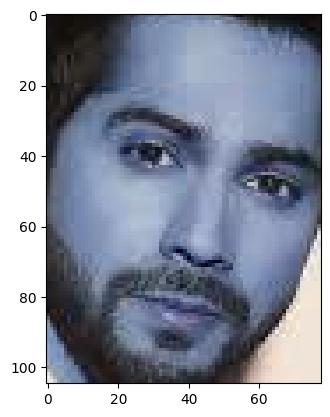

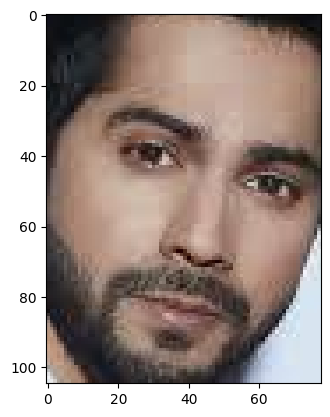

In [54]:
detector = MTCNN()

# loading sample image -> croping the face using opencv and detect the face (since we only need the face)
test_img_path = '/content/gdrive/MyDrive/face-matchmaker-bollywood/test_data/images.jpeg'
sample_img = cv2.imread (test_img_path)
result = detector.detect_faces(sample_img)
if len(result) > 0:
    x,y,width,height = result[0]['box']
    print(x,y,width,height)

    face = sample_img[y:y+height, x:x+width]

    # cv2.imshow('output', face); cv2.waitkey(0)
    # since cv2.imshow() is disabled in google colab we need to use matplotlib to show the image

    plt.imshow (face); plt.show()

    # the img is not as expected since opencv shows BGR instead of RGB so we need to do that manually
    plt.imshow(cv2.cvtColor(face, cv2.COLOR_BGR2RGB)); plt.show()
else:
    face = result
    plt.imshow(cv2.cvtColor(face, cv2.COLOR_BGR2RGB)); plt.show()

FEATURE EXTRACTION FROM SAMPLE IMAGE

In [55]:
image = Image.fromarray(face)
image = image.resize((224,224))
face_arr = np.asarray(image); face_arr.astype('float32')
expanded_img = np.expand_dims(face_arr, axis=0)

preprocessed_img= preprocess_input(expanded_img)

result = model.predict(preprocessed_img).flatten()

print(result, result.shape)

1/1 [==============================] - 0s 43ms/step
[0.01647283 0.32250345 0.         ... 0.12786946 0.00383734 0.        ] (2048,)


COMPARING THE EXTRACTED FEATURES WITH PRE-TRAINED FEATURES DATASET

Top 5 Predictions:
Name:  Varun_Dhawan


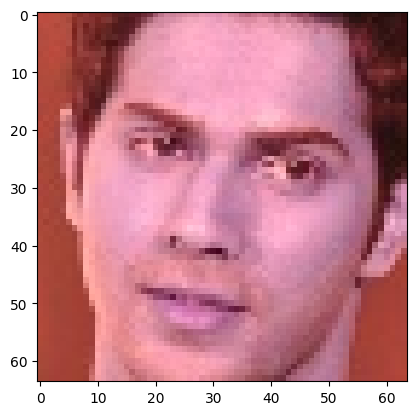

Name:  Varun_Dhawan


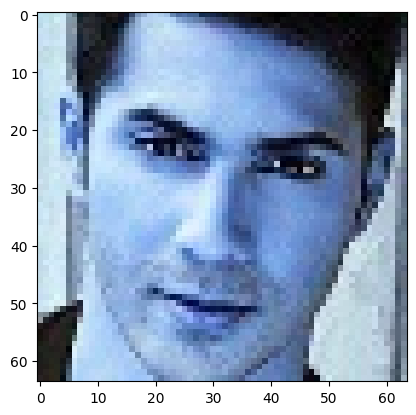

Name:  Varun_Dhawan


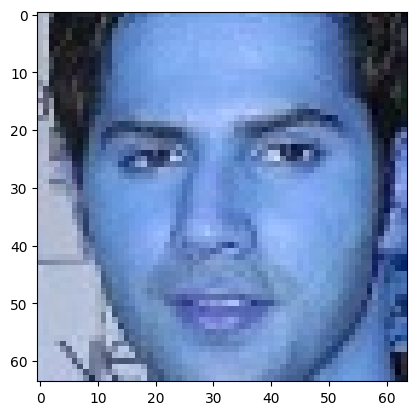

Name:  Varun_Dhawan


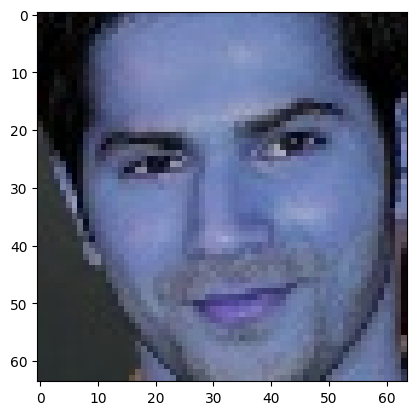

Name:  Arjun_Rampal


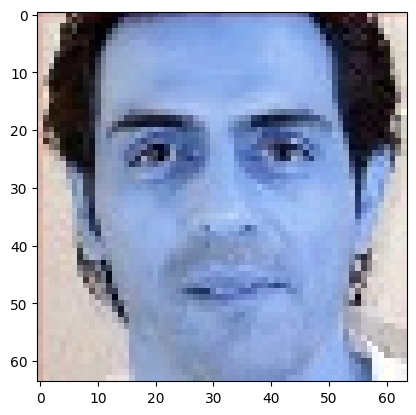

In [56]:
# now this result vector must be compared with vectors in feature_list i.e., we are comparing the features_extracted from the sample image with trained images to find the closest possible prediction

similarity = list()
for i in range(len(feature_list)):
    similarity.append(cosine_similarity(result.reshape(1,-1), feature_list[i].reshape(1,-1))[0][0])

index_pos = sorted(list(enumerate(similarity)), reverse=True, key=lambda x:x[1])
positions = list()
for pos in index_pos:
    positions.append(list(pos)[0])

predicted_imgs = list()
for pos in positions[:5]:
    predicted_imgs.append(cv2.imread(filenames[pos]))
n = 0
print("Top 5 Predictions:")
for img in predicted_imgs:
    print("Name: ", filenames[positions[n]].split('/')[6])
    plt.imshow(img); plt.show()
    n +=1
